In [1]:
import numpy as np


#vmaf_acc = np.asarray([99.272,99.111,99.161,99.162,99.161,99.137,99.172,99.335,99.175,99.187,99.133,99.275,99.014,99.082,99.341,99.248])
vmaf_acc = np.asarray([92.034,92.323,92.15,92.083,92.075,92.252,92.209,92.32,91.922,92.128,92.071,92.962,91.913,92.21,92.488,92.113])

#fps_acc = np.asarray([91.37266667,92.52533333,92.90233333,91.961,93.81033333,92.24533333,93.70666667,91.97433333,93.20533333,93.141,93.24766667,91.60433333,93.054,92.47333333,93.392,92.88866667])
fps_acc = np.asarray([90.701,89.052,93.145,92.652,93.767,93.034,93.175,92.551,92.315,92.052,92.517,93.125,93.394,92.961,92.288,93.294])

patch_acc = np.asarray([95.14925373,97.8358209,98.28358209,97.91044776,97.98507463,97.98507463,98.20895522,97.76119403,98.20895522,97.91044776,97.76119403,97.46268657,98.43283582,97.08955224,97.23880597,97.6119403])


def minmax_normal(arr):
    I=[]
    for x in arr:
        x = 1-float(x - np.min(arr))/(np.max(arr)- np.min(arr))
        if x == 0:
            x = x + 0.01
        I.append(x)
    return I
def mean_normal(arr):
    I=[]
    for x in arr:
        x = 1-float(x - arr.mean())/arr.std()
        I.append(x)
    return I

VMAF = minmax_normal(vmaf_acc)
FPS = minmax_normal(fps_acc)
patch = minmax_normal(patch_acc)
VMAF,FPS,patch

([0.8846520495710118,
  0.6091515729266025,
  0.7740705433746353,
  0.8379408960915151,
  0.8455672068636748,
  0.6768350810295554,
  0.7178265014299289,
  0.612011439466164,
  0.9914204003813153,
  0.7950428979980915,
  0.8493803622497614,
  0.01,
  1.0,
  0.7168732125834174,
  0.4518589132507157,
  0.8093422306958993],
 [0.6502651113467677,
  1.0,
  0.1319194061505835,
  0.23647932131495175,
  0.01,
  0.15546129374337048,
  0.12555673382820787,
  0.25790031813361547,
  0.3079533404029696,
  0.3637327677624588,
  0.2651113467656422,
  0.136161187698833,
  0.07910922587486557,
  0.17094379639448554,
  0.3136797454931076,
  0.10031813361611874],
 [1.0,
  0.18181818015702267,
  0.04545454503925572,
  0.15909090916012336,
  0.13636363511776706,
  0.13636363511776706,
  0.0681818190816077,
  0.20454545419937897,
  0.0681818190816077,
  0.15909090916012336,
  0.20454545419937897,
  0.2954545442778903,
  0.01,
  0.40909090839875806,
  0.36363636335950233,
  0.2499999992386347])

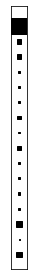

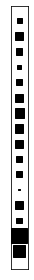

In [60]:
import numpy as np
import matplotlib.pyplot as plt


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()))
        
    ax.patch.set_facecolor('white')#背景颜色
    ax.set_aspect('equal', 'box')#设置轴缩放的角度
    ax.xaxis.set_major_locator(plt.NullLocator())##设置x，y 的主刻度定位器
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'black' if w > 0 else 'white'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()#坐标轴范围是否自动缩放
    ax.invert_yaxis()#反转y轴

if __name__ == '__main__':
    # Fixing random state for reproducibility
    #hinton(np.mat([0.04441, 0.00308, 0.00446, 0.03436, 0.51394, 0.29615, 0.01961, 0.01474, 0.000375, 0.06788, 0.00102]))
    hinton(np.mat(VMAF))
    plt.show()
    hinton(np.mat(FPS))
    plt.show()

In [11]:
#批量处理fps
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from scipy import stats

#scale放里面误差极大，需对3个x训练不同的模型################
ACC=[]
for i in range(16):
    N=[ "frame_SI","frame_TI",'Value','Saturation','Hue7',
       'Hue6','Hue5','Hue4','Hue3','Hue2','Hue1','edgeLength',
       'contrast','brightness','keypoint',"first_frame"]
    del N[i]
    print(N)
    #读数据集
    data = pd.read_csv("F:/video_cut/Bear_size.csv") 
    X = data[N].values
    Y = data.video8.values.reshape(-1, 1)################
    train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=1)  #shuffle=False 就是按照顺序划分的测试集和验证集,默认为true才行
    #print(train_x.size)

    #将数据转换成Tensor LongTensor等价于int64
    train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
    train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
    test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
    test_y = torch.from_numpy(test_y).type(torch.FloatTensor)
    print(test_x.shape)
    points = int(test_x.shape[1])

    #数据只有3805行故batchsize设置8较优

    batch = 8#32 
    no_of_batches = len(data)//batch
    epochs = 3000#3000

    #TensorDataset()可以对tensor进行打包即合并
    train_ds = TensorDataset(train_x,train_y)
    #希望模型不关注训练集数据顺序故用乱序
    train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)
    test_ds = TensorDataset(test_x,test_y)
    #对测试集不需要用乱序避免工作量增加
    test_dl = DataLoader(test_ds,batch_size=batch)
    #print(test_x,test_y)

    #创建模型
    #继承nn.Module这个类并自定义模型
    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.linear1 = nn.Linear(points,points*2)  # 输入是一个点对（x1，x2）,所以我们输入的神经节点是两个
            self.linear2 = nn.Linear(points*2,points*2, bias=True)
            self.linear3 = nn.Linear(points*2,points*2, bias=True)
            self.linear4 = nn.Linear(points*2,points*2, bias=True)
            self.linear5 = nn.Linear(points*2,points, bias=True)
            self.linear6 = nn.Linear(points,1)  # 输出层由于是二分类，所以输出节点是2
        def forward(self, x):
            x = F.relu(self.linear1(x))
            x = F.relu(self.linear2(x))
            x = F.relu(self.linear3(x))
            x = F.relu(self.linear4(x))
            x = F.relu(self.linear5(x))
            c =self.linear6(x)
            #c = F.softmax(self.linear6(x),dim=1)
            return c
    
    model = Model()
    #损失函数
    #loss_fn = nn.CrossEntropyLoss()
    loss_fn = torch.nn.MSELoss()#损失函数采用常用的均方损失函数

    #便于随着训练的进行观察数值的变化
    train_loss=[]
    test_loss=[]
    min_loss=1
    max_acc=1

    def accury(pred,y):
        return 100-(abs(pred - y)/y*100)

    def get_model():
        #获得这个模型
        model = Model()
        #优化函数 优化的是模型所有变量即model.parameters()
        opt = torch.optim.Adam(model.parameters(),lr=0.0005)  #lr=0.001  #选择使用哪种优化器 761个数据集用这个优化器
        #opt = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.3)   # lr=0.01,momentum=0.3
        return model,opt

    model,optim = get_model()

    for epoch in range(epochs):
        for x,y in train_dl:
            y_pred = model(x)
            #print(y_pred,y)
            loss = loss_fn(y_pred, y)
            # 梯度置为0
        
            optim.zero_grad()
            # 反向传播求解梯度
            loss.backward()
            # 优化
            optim.step()
        # 不需要进行梯度计算
        with torch.no_grad():
            epoch_loss = loss_fn(model(train_x), train_y).data
            epoch_acc = accury(model(train_x), train_y).numpy()
            epoch_test_loss = loss_fn(model(test_x), test_y).data
            epoch_test_acc = accury(model(test_x), test_y).numpy()
            #print(epoch_test_acc,sum(epoch_acc),len(epoch_acc),sum(epoch_acc)/len(epoch_acc))
            print('epoch: ',epoch,'train_loss: ',round(epoch_loss.item(),3),'train_acc: ', round(float(sum(epoch_acc)/len(epoch_acc)),3),
                  'test_loss: ',round(epoch_test_loss.item(),3),'test_acc: ',round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3))
            train_loss.append(epoch_loss)
            test_loss.append(epoch_test_loss)
            if epoch_test_loss < min_loss:
                min_loss = epoch_test_loss
                print("min loss:"+str(epoch))
                df = pd.DataFrame({'Actual':list(test_y), 'Predicted':list(model(test_x))})  
            if round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3) > max_acc:
                max_acc = round(float(sum(epoch_test_acc)/len(epoch_test_acc)),3)         
    print("End max acc epoch："+str(epoch)+"        max acc："+str(max_acc)) 
    ACC.append(max_acc)
print(ACC)
# list转dataframe
df = pd.DataFrame(ACC, columns=['acc'])
# 保存到本地excel
df.to_excel("F:/video_cut/psnr_acc.xlsx", index=False)


['frame_TI', 'Value', 'Saturation', 'Hue7', 'Hue6', 'Hue5', 'Hue4', 'Hue3', 'Hue2', 'Hue1', 'edgeLength', 'contrast', 'brightness', 'keypoint', 'first_frame']
torch.Size([18, 15])
epoch:  0 train_loss:  14744.495 train_acc:  -15.164 test_loss:  12140.163 test_acc:  -15.337
epoch:  1 train_loss:  2699.924 train_acc:  28.292 test_loss:  3198.397 test_acc:  23.53
epoch:  2 train_loss:  2143.937 train_acc:  39.594 test_loss:  2691.579 test_acc:  33.2
epoch:  3 train_loss:  1537.924 train_acc:  59.654 test_loss:  1721.199 test_acc:  58.612
epoch:  4 train_loss:  985.917 train_acc:  66.021 test_loss:  1037.545 test_acc:  67.671
epoch:  5 train_loss:  1116.518 train_acc:  54.812 test_loss:  1025.069 test_acc:  57.586
epoch:  6 train_loss:  834.376 train_acc:  55.988 test_loss:  811.147 test_acc:  57.371
epoch:  7 train_loss:  372.448 train_acc:  75.003 test_loss:  301.951 test_acc:  79.042
epoch:  8 train_loss:  1047.504 train_acc:  67.188 test_loss:  790.737 test_acc:  67.174
epoch:  9 train

epoch:  94 train_loss:  307.261 train_acc:  85.112 test_loss:  263.274 test_acc:  85.395
epoch:  95 train_loss:  441.086 train_acc:  83.203 test_loss:  373.644 test_acc:  83.104
epoch:  96 train_loss:  80.658 train_acc:  91.662 test_loss:  83.945 test_acc:  91.197
epoch:  97 train_loss:  248.467 train_acc:  86.937 test_loss:  150.05 test_acc:  86.736
epoch:  98 train_loss:  229.532 train_acc:  85.577 test_loss:  167.549 test_acc:  83.575
epoch:  99 train_loss:  1012.857 train_acc:  71.883 test_loss:  933.099 test_acc:  69.365
epoch:  100 train_loss:  681.986 train_acc:  74.583 test_loss:  569.504 test_acc:  70.564
epoch:  101 train_loss:  122.483 train_acc:  86.33 test_loss:  138.275 test_acc:  84.152
epoch:  102 train_loss:  238.024 train_acc:  86.007 test_loss:  227.883 test_acc:  85.374
epoch:  103 train_loss:  1316.745 train_acc:  66.022 test_loss:  1292.776 test_acc:  61.616
epoch:  104 train_loss:  1475.251 train_acc:  71.791 test_loss:  1009.032 test_acc:  69.619
epoch:  105 tra

epoch:  189 train_loss:  281.175 train_acc:  84.216 test_loss:  273.441 test_acc:  83.143
epoch:  190 train_loss:  295.146 train_acc:  82.815 test_loss:  291.405 test_acc:  82.076
epoch:  191 train_loss:  58.465 train_acc:  92.939 test_loss:  76.122 test_acc:  91.172
epoch:  192 train_loss:  153.42 train_acc:  88.699 test_loss:  136.341 test_acc:  86.721
epoch:  193 train_loss:  263.634 train_acc:  85.445 test_loss:  225.515 test_acc:  82.374
epoch:  194 train_loss:  106.264 train_acc:  89.585 test_loss:  140.205 test_acc:  87.92
epoch:  195 train_loss:  2056.089 train_acc:  62.972 test_loss:  1753.54 test_acc:  60.916
epoch:  196 train_loss:  525.505 train_acc:  80.652 test_loss:  417.086 test_acc:  77.159
epoch:  197 train_loss:  111.333 train_acc:  90.627 test_loss:  99.361 test_acc:  89.394
epoch:  198 train_loss:  955.379 train_acc:  73.308 test_loss:  867.531 test_acc:  71.391
epoch:  199 train_loss:  1226.603 train_acc:  70.704 test_loss:  1082.439 test_acc:  68.636
epoch:  200 

epoch:  293 train_loss:  115.664 train_acc:  90.562 test_loss:  153.681 test_acc:  86.688
epoch:  294 train_loss:  129.136 train_acc:  89.673 test_loss:  182.947 test_acc:  86.183
epoch:  295 train_loss:  78.363 train_acc:  92.237 test_loss:  134.092 test_acc:  88.195
epoch:  296 train_loss:  73.994 train_acc:  91.805 test_loss:  119.883 test_acc:  90.235
epoch:  297 train_loss:  66.344 train_acc:  92.454 test_loss:  135.839 test_acc:  88.337
epoch:  298 train_loss:  113.513 train_acc:  89.99 test_loss:  156.249 test_acc:  87.357
epoch:  299 train_loss:  52.817 train_acc:  93.429 test_loss:  95.502 test_acc:  90.994
epoch:  300 train_loss:  90.174 train_acc:  91.026 test_loss:  149.327 test_acc:  86.729
epoch:  301 train_loss:  52.975 train_acc:  93.752 test_loss:  99.254 test_acc:  91.302
epoch:  302 train_loss:  104.183 train_acc:  90.104 test_loss:  135.29 test_acc:  87.918
epoch:  303 train_loss:  55.346 train_acc:  93.307 test_loss:  115.857 test_acc:  89.202
epoch:  304 train_los

epoch:  396 train_loss:  60.592 train_acc:  91.334 test_loss:  242.909 test_acc:  85.027
epoch:  397 train_loss:  56.423 train_acc:  91.971 test_loss:  227.423 test_acc:  86.206
epoch:  398 train_loss:  75.802 train_acc:  91.209 test_loss:  238.96 test_acc:  84.422
epoch:  399 train_loss:  50.48 train_acc:  93.269 test_loss:  223.414 test_acc:  86.36
epoch:  400 train_loss:  71.198 train_acc:  92.219 test_loss:  239.906 test_acc:  85.744
epoch:  401 train_loss:  64.991 train_acc:  92.376 test_loss:  218.407 test_acc:  86.565
epoch:  402 train_loss:  76.105 train_acc:  92.58 test_loss:  199.86 test_acc:  86.7
epoch:  403 train_loss:  48.828 train_acc:  93.436 test_loss:  218.477 test_acc:  86.94
epoch:  404 train_loss:  50.98 train_acc:  92.731 test_loss:  218.219 test_acc:  86.268
epoch:  405 train_loss:  82.24 train_acc:  90.262 test_loss:  253.232 test_acc:  83.662
epoch:  406 train_loss:  65.918 train_acc:  92.108 test_loss:  217.532 test_acc:  85.705
epoch:  407 train_loss:  49.061

epoch:  497 train_loss:  64.052 train_acc:  92.874 test_loss:  218.614 test_acc:  86.616
epoch:  498 train_loss:  46.199 train_acc:  93.969 test_loss:  210.432 test_acc:  88.064
epoch:  499 train_loss:  48.99 train_acc:  93.879 test_loss:  193.282 test_acc:  87.857
epoch:  500 train_loss:  56.865 train_acc:  93.202 test_loss:  197.469 test_acc:  87.759
epoch:  501 train_loss:  41.288 train_acc:  93.822 test_loss:  183.365 test_acc:  89.338
epoch:  502 train_loss:  43.676 train_acc:  94.079 test_loss:  175.52 test_acc:  89.586
epoch:  503 train_loss:  62.748 train_acc:  93.151 test_loss:  216.771 test_acc:  87.073
epoch:  504 train_loss:  45.106 train_acc:  93.94 test_loss:  167.898 test_acc:  89.501
epoch:  505 train_loss:  45.032 train_acc:  93.675 test_loss:  174.544 test_acc:  88.53
epoch:  506 train_loss:  50.856 train_acc:  92.798 test_loss:  240.091 test_acc:  86.592
epoch:  507 train_loss:  47.674 train_acc:  93.2 test_loss:  212.199 test_acc:  86.478
epoch:  508 train_loss:  39

epoch:  595 train_loss:  58.53 train_acc:  93.554 test_loss:  230.499 test_acc:  86.615
epoch:  596 train_loss:  90.568 train_acc:  91.191 test_loss:  253.687 test_acc:  84.194
epoch:  597 train_loss:  96.274 train_acc:  91.155 test_loss:  246.789 test_acc:  84.801
epoch:  598 train_loss:  59.574 train_acc:  93.278 test_loss:  218.602 test_acc:  86.116
epoch:  599 train_loss:  60.116 train_acc:  93.547 test_loss:  217.604 test_acc:  86.814
epoch:  600 train_loss:  44.609 train_acc:  94.316 test_loss:  230.348 test_acc:  87.306
epoch:  601 train_loss:  51.333 train_acc:  93.658 test_loss:  209.412 test_acc:  87.813
epoch:  602 train_loss:  76.905 train_acc:  92.346 test_loss:  270.532 test_acc:  84.55
epoch:  603 train_loss:  97.153 train_acc:  90.19 test_loss:  273.127 test_acc:  82.77
epoch:  604 train_loss:  39.268 train_acc:  93.779 test_loss:  207.108 test_acc:  87.64
epoch:  605 train_loss:  45.638 train_acc:  94.219 test_loss:  242.251 test_acc:  86.948
epoch:  606 train_loss:  5

epoch:  694 train_loss:  48.384 train_acc:  92.962 test_loss:  179.049 test_acc:  86.455
epoch:  695 train_loss:  37.766 train_acc:  94.901 test_loss:  158.446 test_acc:  89.115
epoch:  696 train_loss:  48.352 train_acc:  92.758 test_loss:  135.339 test_acc:  88.635
epoch:  697 train_loss:  50.685 train_acc:  93.818 test_loss:  144.006 test_acc:  88.664
epoch:  698 train_loss:  127.064 train_acc:  88.482 test_loss:  256.919 test_acc:  81.216
epoch:  699 train_loss:  106.105 train_acc:  90.856 test_loss:  213.18 test_acc:  86.105
epoch:  700 train_loss:  42.838 train_acc:  93.723 test_loss:  163.035 test_acc:  88.017
epoch:  701 train_loss:  30.356 train_acc:  94.894 test_loss:  143.853 test_acc:  88.762
epoch:  702 train_loss:  39.871 train_acc:  93.626 test_loss:  127.139 test_acc:  90.022
epoch:  703 train_loss:  68.984 train_acc:  91.088 test_loss:  207.39 test_acc:  85.417
epoch:  704 train_loss:  54.687 train_acc:  92.556 test_loss:  171.112 test_acc:  87.151
epoch:  705 train_los

epoch:  792 train_loss:  61.377 train_acc:  91.664 test_loss:  214.547 test_acc:  85.585
epoch:  793 train_loss:  62.522 train_acc:  93.546 test_loss:  179.69 test_acc:  86.5
epoch:  794 train_loss:  50.815 train_acc:  90.716 test_loss:  262.605 test_acc:  83.108
epoch:  795 train_loss:  166.616 train_acc:  86.52 test_loss:  335.403 test_acc:  78.379
epoch:  796 train_loss:  195.9 train_acc:  87.409 test_loss:  270.744 test_acc:  82.172
epoch:  797 train_loss:  87.187 train_acc:  90.117 test_loss:  241.859 test_acc:  83.277
epoch:  798 train_loss:  102.591 train_acc:  90.233 test_loss:  185.527 test_acc:  85.504
epoch:  799 train_loss:  78.352 train_acc:  92.055 test_loss:  206.541 test_acc:  85.353
epoch:  800 train_loss:  39.672 train_acc:  94.4 test_loss:  167.366 test_acc:  88.404
epoch:  801 train_loss:  57.682 train_acc:  92.784 test_loss:  156.096 test_acc:  87.866
epoch:  802 train_loss:  79.313 train_acc:  90.624 test_loss:  246.795 test_acc:  84.109
epoch:  803 train_loss:  4

epoch:  891 train_loss:  179.688 train_acc:  87.596 test_loss:  383.716 test_acc:  79.145
epoch:  892 train_loss:  50.86 train_acc:  92.561 test_loss:  312.074 test_acc:  84.321
epoch:  893 train_loss:  57.829 train_acc:  92.515 test_loss:  204.196 test_acc:  88.021
epoch:  894 train_loss:  49.416 train_acc:  92.809 test_loss:  289.408 test_acc:  85.411
epoch:  895 train_loss:  32.314 train_acc:  94.403 test_loss:  234.662 test_acc:  86.632
epoch:  896 train_loss:  57.933 train_acc:  92.691 test_loss:  288.324 test_acc:  84.917
epoch:  897 train_loss:  37.814 train_acc:  93.689 test_loss:  204.127 test_acc:  88.166
epoch:  898 train_loss:  25.901 train_acc:  95.244 test_loss:  213.916 test_acc:  88.56
epoch:  899 train_loss:  26.04 train_acc:  95.813 test_loss:  224.911 test_acc:  88.546
epoch:  900 train_loss:  25.008 train_acc:  95.282 test_loss:  218.838 test_acc:  88.765
epoch:  901 train_loss:  28.181 train_acc:  95.07 test_loss:  228.221 test_acc:  87.519
epoch:  902 train_loss: 

epoch:  986 train_loss:  26.578 train_acc:  95.393 test_loss:  185.777 test_acc:  87.631
epoch:  987 train_loss:  24.79 train_acc:  95.735 test_loss:  169.906 test_acc:  89.226
epoch:  988 train_loss:  25.064 train_acc:  95.74 test_loss:  182.439 test_acc:  88.674
epoch:  989 train_loss:  28.099 train_acc:  95.801 test_loss:  181.32 test_acc:  89.185
epoch:  990 train_loss:  29.996 train_acc:  95.439 test_loss:  199.127 test_acc:  87.378
epoch:  991 train_loss:  40.065 train_acc:  94.352 test_loss:  171.845 test_acc:  88.751
epoch:  992 train_loss:  35.801 train_acc:  94.717 test_loss:  207.754 test_acc:  86.591
epoch:  993 train_loss:  74.745 train_acc:  92.395 test_loss:  187.206 test_acc:  87.002
epoch:  994 train_loss:  39.865 train_acc:  93.467 test_loss:  244.243 test_acc:  85.307
epoch:  995 train_loss:  32.923 train_acc:  95.265 test_loss:  141.292 test_acc:  89.463
epoch:  996 train_loss:  32.062 train_acc:  95.242 test_loss:  194.463 test_acc:  88.319
epoch:  997 train_loss: 

epoch:  1084 train_loss:  28.375 train_acc:  94.614 test_loss:  145.21 test_acc:  88.944
epoch:  1085 train_loss:  73.029 train_acc:  92.156 test_loss:  229.217 test_acc:  84.633
epoch:  1086 train_loss:  26.27 train_acc:  95.439 test_loss:  132.554 test_acc:  90.629
epoch:  1087 train_loss:  27.425 train_acc:  95.504 test_loss:  185.991 test_acc:  87.999
epoch:  1088 train_loss:  27.862 train_acc:  95.826 test_loss:  169.268 test_acc:  88.876
epoch:  1089 train_loss:  26.002 train_acc:  95.245 test_loss:  183.736 test_acc:  88.016
epoch:  1090 train_loss:  23.231 train_acc:  95.556 test_loss:  186.085 test_acc:  87.863
epoch:  1091 train_loss:  22.267 train_acc:  96.099 test_loss:  153.572 test_acc:  89.505
epoch:  1092 train_loss:  23.296 train_acc:  95.774 test_loss:  132.897 test_acc:  89.931
epoch:  1093 train_loss:  28.974 train_acc:  95.567 test_loss:  161.478 test_acc:  89.597
epoch:  1094 train_loss:  25.215 train_acc:  95.339 test_loss:  129.066 test_acc:  90.638
epoch:  1095

epoch:  1179 train_loss:  22.891 train_acc:  95.666 test_loss:  104.112 test_acc:  91.366
epoch:  1180 train_loss:  22.63 train_acc:  95.573 test_loss:  110.456 test_acc:  91.034
epoch:  1181 train_loss:  23.206 train_acc:  95.409 test_loss:  104.264 test_acc:  91.063
epoch:  1182 train_loss:  26.352 train_acc:  95.301 test_loss:  121.364 test_acc:  90.35
epoch:  1183 train_loss:  29.761 train_acc:  94.789 test_loss:  101.12 test_acc:  91.197
epoch:  1184 train_loss:  25.43 train_acc:  95.217 test_loss:  123.015 test_acc:  90.039
epoch:  1185 train_loss:  26.544 train_acc:  95.443 test_loss:  123.448 test_acc:  90.757
epoch:  1186 train_loss:  28.009 train_acc:  94.665 test_loss:  98.261 test_acc:  90.097
epoch:  1187 train_loss:  30.41 train_acc:  94.399 test_loss:  106.743 test_acc:  89.841
epoch:  1188 train_loss:  40.217 train_acc:  93.395 test_loss:  151.553 test_acc:  88.776
epoch:  1189 train_loss:  31.457 train_acc:  94.408 test_loss:  106.676 test_acc:  89.908
epoch:  1190 tra

epoch:  1275 train_loss:  73.745 train_acc:  91.325 test_loss:  125.761 test_acc:  87.377
epoch:  1276 train_loss:  37.067 train_acc:  93.936 test_loss:  119.867 test_acc:  88.981
epoch:  1277 train_loss:  33.749 train_acc:  95.205 test_loss:  100.989 test_acc:  90.471
epoch:  1278 train_loss:  39.21 train_acc:  94.266 test_loss:  100.374 test_acc:  89.863
epoch:  1279 train_loss:  33.842 train_acc:  95.136 test_loss:  95.215 test_acc:  91.002
epoch:  1280 train_loss:  33.47 train_acc:  94.826 test_loss:  93.87 test_acc:  90.278
epoch:  1281 train_loss:  29.618 train_acc:  95.137 test_loss:  78.362 test_acc:  91.55
epoch:  1282 train_loss:  32.666 train_acc:  94.666 test_loss:  86.089 test_acc:  90.523
epoch:  1283 train_loss:  30.261 train_acc:  95.043 test_loss:  84.511 test_acc:  90.834
epoch:  1284 train_loss:  33.106 train_acc:  95.353 test_loss:  93.103 test_acc:  91.049
epoch:  1285 train_loss:  68.202 train_acc:  91.663 test_loss:  141.805 test_acc:  86.548
epoch:  1286 train_l

epoch:  1370 train_loss:  30.76 train_acc:  94.709 test_loss:  117.558 test_acc:  89.723
epoch:  1371 train_loss:  29.176 train_acc:  95.573 test_loss:  150.107 test_acc:  88.347
epoch:  1372 train_loss:  24.857 train_acc:  95.344 test_loss:  119.489 test_acc:  90.203
epoch:  1373 train_loss:  21.912 train_acc:  95.88 test_loss:  127.68 test_acc:  89.285
epoch:  1374 train_loss:  24.15 train_acc:  96.273 test_loss:  123.346 test_acc:  89.628
epoch:  1375 train_loss:  22.386 train_acc:  95.89 test_loss:  118.006 test_acc:  89.397
epoch:  1376 train_loss:  21.363 train_acc:  95.971 test_loss:  117.944 test_acc:  89.65
epoch:  1377 train_loss:  21.409 train_acc:  95.986 test_loss:  118.583 test_acc:  89.571
epoch:  1378 train_loss:  22.167 train_acc:  96.224 test_loss:  117.553 test_acc:  89.879
epoch:  1379 train_loss:  21.955 train_acc:  95.995 test_loss:  125.801 test_acc:  88.912
epoch:  1380 train_loss:  23.05 train_acc:  95.895 test_loss:  118.491 test_acc:  89.275
epoch:  1381 trai

epoch:  1462 train_loss:  22.527 train_acc:  95.804 test_loss:  119.697 test_acc:  89.619
epoch:  1463 train_loss:  28.634 train_acc:  95.69 test_loss:  143.551 test_acc:  88.774
epoch:  1464 train_loss:  19.862 train_acc:  96.443 test_loss:  120.546 test_acc:  89.847
epoch:  1465 train_loss:  20.954 train_acc:  96.293 test_loss:  139.871 test_acc:  88.709
epoch:  1466 train_loss:  23.513 train_acc:  96.497 test_loss:  126.603 test_acc:  89.83
epoch:  1467 train_loss:  22.295 train_acc:  95.732 test_loss:  115.108 test_acc:  89.736
epoch:  1468 train_loss:  25.223 train_acc:  95.988 test_loss:  146.715 test_acc:  88.413
epoch:  1469 train_loss:  40.992 train_acc:  93.933 test_loss:  120.499 test_acc:  88.959
epoch:  1470 train_loss:  56.614 train_acc:  93.541 test_loss:  202.898 test_acc:  86.344
epoch:  1471 train_loss:  24.293 train_acc:  94.697 test_loss:  155.801 test_acc:  87.86
epoch:  1472 train_loss:  30.817 train_acc:  94.868 test_loss:  123.781 test_acc:  88.994
epoch:  1473 

epoch:  1558 train_loss:  52.23 train_acc:  91.953 test_loss:  119.147 test_acc:  88.639
epoch:  1559 train_loss:  30.532 train_acc:  93.376 test_loss:  201.045 test_acc:  86.19
epoch:  1560 train_loss:  23.143 train_acc:  95.356 test_loss:  129.623 test_acc:  90.022
epoch:  1561 train_loss:  24.933 train_acc:  95.331 test_loss:  116.714 test_acc:  90.176
epoch:  1562 train_loss:  32.045 train_acc:  94.384 test_loss:  105.605 test_acc:  90.371
epoch:  1563 train_loss:  63.502 train_acc:  92.223 test_loss:  223.548 test_acc:  85.111
epoch:  1564 train_loss:  29.797 train_acc:  95.224 test_loss:  89.019 test_acc:  91.281
epoch:  1565 train_loss:  23.333 train_acc:  95.235 test_loss:  98.992 test_acc:  90.307
epoch:  1566 train_loss:  28.586 train_acc:  95.065 test_loss:  141.275 test_acc:  87.989
epoch:  1567 train_loss:  21.873 train_acc:  96.301 test_loss:  117.646 test_acc:  89.801
epoch:  1568 train_loss:  24.242 train_acc:  95.667 test_loss:  119.401 test_acc:  89.111
epoch:  1569 t

epoch:  1650 train_loss:  19.595 train_acc:  96.325 test_loss:  126.314 test_acc:  89.072
epoch:  1651 train_loss:  23.315 train_acc:  96.086 test_loss:  120.891 test_acc:  89.864
epoch:  1652 train_loss:  32.876 train_acc:  93.683 test_loss:  81.055 test_acc:  89.664
epoch:  1653 train_loss:  31.406 train_acc:  94.954 test_loss:  144.022 test_acc:  88.409
epoch:  1654 train_loss:  38.403 train_acc:  94.068 test_loss:  155.611 test_acc:  88.381
epoch:  1655 train_loss:  22.195 train_acc:  95.552 test_loss:  109.406 test_acc:  89.879
epoch:  1656 train_loss:  22.53 train_acc:  95.169 test_loss:  97.16 test_acc:  90.411
epoch:  1657 train_loss:  23.776 train_acc:  95.625 test_loss:  135.783 test_acc:  89.053
epoch:  1658 train_loss:  23.57 train_acc:  95.866 test_loss:  110.541 test_acc:  89.396
epoch:  1659 train_loss:  19.014 train_acc:  96.409 test_loss:  108.634 test_acc:  89.906
epoch:  1660 train_loss:  19.88 train_acc:  96.443 test_loss:  102.035 test_acc:  90.401
epoch:  1661 tra

epoch:  1748 train_loss:  45.511 train_acc:  93.497 test_loss:  85.357 test_acc:  90.02
epoch:  1749 train_loss:  62.164 train_acc:  92.972 test_loss:  200.635 test_acc:  85.926
epoch:  1750 train_loss:  51.891 train_acc:  92.574 test_loss:  84.227 test_acc:  90.183
epoch:  1751 train_loss:  33.103 train_acc:  94.193 test_loss:  163.236 test_acc:  87.494
epoch:  1752 train_loss:  40.704 train_acc:  93.727 test_loss:  169.582 test_acc:  86.628
epoch:  1753 train_loss:  31.574 train_acc:  94.746 test_loss:  89.316 test_acc:  91.071
epoch:  1754 train_loss:  29.706 train_acc:  95.218 test_loss:  132.949 test_acc:  88.111
epoch:  1755 train_loss:  21.894 train_acc:  96.053 test_loss:  94.743 test_acc:  90.78
epoch:  1756 train_loss:  19.688 train_acc:  96.323 test_loss:  109.485 test_acc:  89.833
epoch:  1757 train_loss:  30.587 train_acc:  95.207 test_loss:  141.783 test_acc:  88.265
epoch:  1758 train_loss:  23.712 train_acc:  94.827 test_loss:  88.018 test_acc:  90.34
epoch:  1759 train

epoch:  1844 train_loss:  19.906 train_acc:  96.45 test_loss:  119.657 test_acc:  90.031
epoch:  1845 train_loss:  18.896 train_acc:  96.624 test_loss:  118.174 test_acc:  89.483
epoch:  1846 train_loss:  20.571 train_acc:  96.193 test_loss:  132.388 test_acc:  88.969
epoch:  1847 train_loss:  46.807 train_acc:  91.549 test_loss:  94.119 test_acc:  88.482
epoch:  1848 train_loss:  24.36 train_acc:  95.824 test_loss:  115.434 test_acc:  89.442
epoch:  1849 train_loss:  37.085 train_acc:  93.458 test_loss:  186.316 test_acc:  85.993
epoch:  1850 train_loss:  23.185 train_acc:  95.231 test_loss:  85.101 test_acc:  90.264
epoch:  1851 train_loss:  32.017 train_acc:  94.068 test_loss:  76.276 test_acc:  90.819
epoch:  1852 train_loss:  34.238 train_acc:  93.817 test_loss:  169.675 test_acc:  86.697
epoch:  1853 train_loss:  26.649 train_acc:  94.749 test_loss:  75.55 test_acc:  92.03
epoch:  1854 train_loss:  23.77 train_acc:  95.375 test_loss:  131.432 test_acc:  88.297
epoch:  1855 train_

epoch:  1936 train_loss:  23.647 train_acc:  95.033 test_loss:  146.515 test_acc:  88.607
epoch:  1937 train_loss:  21.291 train_acc:  95.988 test_loss:  121.201 test_acc:  89.831
epoch:  1938 train_loss:  24.017 train_acc:  95.886 test_loss:  150.443 test_acc:  88.728
epoch:  1939 train_loss:  21.828 train_acc:  95.303 test_loss:  125.794 test_acc:  90.259
epoch:  1940 train_loss:  21.054 train_acc:  96.358 test_loss:  140.394 test_acc:  89.495
epoch:  1941 train_loss:  21.133 train_acc:  95.836 test_loss:  125.627 test_acc:  89.558
epoch:  1942 train_loss:  21.053 train_acc:  96.093 test_loss:  146.537 test_acc:  88.86
epoch:  1943 train_loss:  19.077 train_acc:  96.318 test_loss:  125.774 test_acc:  89.869
epoch:  1944 train_loss:  19.103 train_acc:  96.605 test_loss:  132.887 test_acc:  89.598
epoch:  1945 train_loss:  18.602 train_acc:  96.733 test_loss:  132.516 test_acc:  89.775
epoch:  1946 train_loss:  18.342 train_acc:  96.709 test_loss:  132.304 test_acc:  89.718
epoch:  194

epoch:  2034 train_loss:  51.894 train_acc:  89.624 test_loss:  488.673 test_acc:  78.442
epoch:  2035 train_loss:  54.956 train_acc:  90.214 test_loss:  494.857 test_acc:  79.867
epoch:  2036 train_loss:  55.585 train_acc:  88.872 test_loss:  469.389 test_acc:  77.831
epoch:  2037 train_loss:  55.097 train_acc:  89.763 test_loss:  499.795 test_acc:  79.846
epoch:  2038 train_loss:  52.091 train_acc:  89.453 test_loss:  496.233 test_acc:  78.634
epoch:  2039 train_loss:  43.916 train_acc:  90.646 test_loss:  451.839 test_acc:  79.789
epoch:  2040 train_loss:  42.032 train_acc:  90.693 test_loss:  418.51 test_acc:  79.883
epoch:  2041 train_loss:  43.66 train_acc:  90.744 test_loss:  434.464 test_acc:  79.862
epoch:  2042 train_loss:  47.36 train_acc:  91.148 test_loss:  392.502 test_acc:  81.613
epoch:  2043 train_loss:  41.156 train_acc:  91.301 test_loss:  407.936 test_acc:  80.997
epoch:  2044 train_loss:  36.543 train_acc:  91.808 test_loss:  355.478 test_acc:  82.402
epoch:  2045 

epoch:  2127 train_loss:  20.268 train_acc:  96.61 test_loss:  137.567 test_acc:  89.553
epoch:  2128 train_loss:  20.468 train_acc:  95.7 test_loss:  117.616 test_acc:  89.738
epoch:  2129 train_loss:  21.601 train_acc:  96.18 test_loss:  147.477 test_acc:  88.709
epoch:  2130 train_loss:  19.201 train_acc:  96.374 test_loss:  124.647 test_acc:  89.845
epoch:  2131 train_loss:  20.457 train_acc:  96.416 test_loss:  138.914 test_acc:  89.538
epoch:  2132 train_loss:  20.797 train_acc:  96.184 test_loss:  121.585 test_acc:  90.54
epoch:  2133 train_loss:  17.904 train_acc:  96.738 test_loss:  131.793 test_acc:  89.784
epoch:  2134 train_loss:  17.942 train_acc:  96.889 test_loss:  131.509 test_acc:  89.892
epoch:  2135 train_loss:  21.208 train_acc:  96.771 test_loss:  127.328 test_acc:  90.337
epoch:  2136 train_loss:  18.186 train_acc:  96.369 test_loss:  122.9 test_acc:  89.744
epoch:  2137 train_loss:  22.81 train_acc:  96.254 test_loss:  146.389 test_acc:  88.694
epoch:  2138 train

epoch:  2220 train_loss:  19.828 train_acc:  96.498 test_loss:  135.873 test_acc:  89.605
epoch:  2221 train_loss:  17.731 train_acc:  96.824 test_loss:  133.778 test_acc:  89.385
epoch:  2222 train_loss:  25.076 train_acc:  96.607 test_loss:  128.296 test_acc:  90.507
epoch:  2223 train_loss:  19.102 train_acc:  95.916 test_loss:  122.394 test_acc:  89.542
epoch:  2224 train_loss:  20.163 train_acc:  95.924 test_loss:  141.197 test_acc:  89.075
epoch:  2225 train_loss:  21.559 train_acc:  95.717 test_loss:  120.233 test_acc:  90.637
epoch:  2226 train_loss:  25.613 train_acc:  95.138 test_loss:  140.841 test_acc:  88.929
epoch:  2227 train_loss:  18.951 train_acc:  96.408 test_loss:  133.628 test_acc:  89.638
epoch:  2228 train_loss:  20.922 train_acc:  96.269 test_loss:  116.394 test_acc:  90.664
epoch:  2229 train_loss:  24.263 train_acc:  95.874 test_loss:  146.649 test_acc:  88.58
epoch:  2230 train_loss:  20.179 train_acc:  96.268 test_loss:  134.817 test_acc:  89.841
epoch:  223

epoch:  2317 train_loss:  18.003 train_acc:  96.571 test_loss:  167.922 test_acc:  88.949
epoch:  2318 train_loss:  19.806 train_acc:  96.031 test_loss:  145.223 test_acc:  89.822
epoch:  2319 train_loss:  18.42 train_acc:  96.484 test_loss:  159.127 test_acc:  88.82
epoch:  2320 train_loss:  18.822 train_acc:  96.959 test_loss:  161.928 test_acc:  89.344
epoch:  2321 train_loss:  18.058 train_acc:  96.695 test_loss:  158.019 test_acc:  89.2
epoch:  2322 train_loss:  23.161 train_acc:  96.497 test_loss:  147.616 test_acc:  90.184
epoch:  2323 train_loss:  30.281 train_acc:  95.116 test_loss:  200.789 test_acc:  86.98
epoch:  2324 train_loss:  21.967 train_acc:  95.831 test_loss:  139.947 test_acc:  90.351
epoch:  2325 train_loss:  19.155 train_acc:  96.581 test_loss:  158.109 test_acc:  89.665
epoch:  2326 train_loss:  26.182 train_acc:  95.705 test_loss:  172.138 test_acc:  88.093
epoch:  2327 train_loss:  29.5 train_acc:  96.107 test_loss:  150.981 test_acc:  89.512
epoch:  2328 trai

epoch:  2410 train_loss:  20.786 train_acc:  96.69 test_loss:  145.535 test_acc:  89.701
epoch:  2411 train_loss:  21.462 train_acc:  96.21 test_loss:  158.428 test_acc:  88.314
epoch:  2412 train_loss:  20.893 train_acc:  96.401 test_loss:  122.929 test_acc:  90.731
epoch:  2413 train_loss:  26.851 train_acc:  95.009 test_loss:  101.614 test_acc:  90.301
epoch:  2414 train_loss:  57.368 train_acc:  91.301 test_loss:  278.636 test_acc:  84.3
epoch:  2415 train_loss:  50.677 train_acc:  91.132 test_loss:  129.463 test_acc:  86.673
epoch:  2416 train_loss:  65.902 train_acc:  91.615 test_loss:  263.51 test_acc:  85.239
epoch:  2417 train_loss:  34.667 train_acc:  92.346 test_loss:  289.832 test_acc:  84.819
epoch:  2418 train_loss:  29.493 train_acc:  93.554 test_loss:  255.296 test_acc:  86.332
epoch:  2419 train_loss:  23.669 train_acc:  94.897 test_loss:  160.973 test_acc:  87.632
epoch:  2420 train_loss:  29.349 train_acc:  94.091 test_loss:  201.785 test_acc:  86.347
epoch:  2421 tr

epoch:  2509 train_loss:  18.221 train_acc:  96.427 test_loss:  142.384 test_acc:  89.997
epoch:  2510 train_loss:  18.84 train_acc:  96.761 test_loss:  146.448 test_acc:  90.118
epoch:  2511 train_loss:  19.053 train_acc:  96.341 test_loss:  162.26 test_acc:  88.752
epoch:  2512 train_loss:  17.72 train_acc:  96.958 test_loss:  148.196 test_acc:  89.476
epoch:  2513 train_loss:  20.498 train_acc:  96.41 test_loss:  137.181 test_acc:  89.45
epoch:  2514 train_loss:  20.3 train_acc:  95.826 test_loss:  138.673 test_acc:  89.399
epoch:  2515 train_loss:  20.04 train_acc:  95.912 test_loss:  177.173 test_acc:  88.302
epoch:  2516 train_loss:  18.582 train_acc:  96.85 test_loss:  148.575 test_acc:  89.904
epoch:  2517 train_loss:  20.017 train_acc:  95.653 test_loss:  123.224 test_acc:  90.122
epoch:  2518 train_loss:  24.5 train_acc:  95.897 test_loss:  169.559 test_acc:  88.96
epoch:  2519 train_loss:  20.551 train_acc:  95.662 test_loss:  123.5 test_acc:  90.872
epoch:  2520 train_loss:

epoch:  2602 train_loss:  20.061 train_acc:  96.172 test_loss:  142.143 test_acc:  89.088
epoch:  2603 train_loss:  18.745 train_acc:  96.583 test_loss:  127.03 test_acc:  90.805
epoch:  2604 train_loss:  19.37 train_acc:  95.677 test_loss:  111.705 test_acc:  90.56
epoch:  2605 train_loss:  18.904 train_acc:  96.335 test_loss:  142.975 test_acc:  89.32
epoch:  2606 train_loss:  27.278 train_acc:  95.405 test_loss:  109.46 test_acc:  90.809
epoch:  2607 train_loss:  23.165 train_acc:  95.762 test_loss:  137.379 test_acc:  88.919
epoch:  2608 train_loss:  19.639 train_acc:  96.966 test_loss:  122.966 test_acc:  90.719
epoch:  2609 train_loss:  18.026 train_acc:  96.705 test_loss:  121.2 test_acc:  90.695
epoch:  2610 train_loss:  17.185 train_acc:  96.891 test_loss:  135.483 test_acc:  89.913
epoch:  2611 train_loss:  18.278 train_acc:  96.798 test_loss:  139.293 test_acc:  89.81
epoch:  2612 train_loss:  17.232 train_acc:  96.45 test_loss:  116.399 test_acc:  90.426
epoch:  2613 train_

epoch:  2694 train_loss:  21.278 train_acc:  96.017 test_loss:  160.88 test_acc:  88.449
epoch:  2695 train_loss:  18.994 train_acc:  96.065 test_loss:  145.128 test_acc:  89.79
epoch:  2696 train_loss:  26.28 train_acc:  94.795 test_loss:  124.293 test_acc:  89.096
epoch:  2697 train_loss:  22.858 train_acc:  95.294 test_loss:  172.681 test_acc:  88.377
epoch:  2698 train_loss:  27.099 train_acc:  95.114 test_loss:  171.553 test_acc:  88.182
epoch:  2699 train_loss:  46.902 train_acc:  90.799 test_loss:  120.565 test_acc:  87.203
epoch:  2700 train_loss:  23.109 train_acc:  95.513 test_loss:  184.269 test_acc:  87.704
epoch:  2701 train_loss:  19.571 train_acc:  96.047 test_loss:  168.468 test_acc:  88.33
epoch:  2702 train_loss:  20.418 train_acc:  95.901 test_loss:  131.858 test_acc:  90.561
epoch:  2703 train_loss:  17.899 train_acc:  96.494 test_loss:  171.095 test_acc:  88.301
epoch:  2704 train_loss:  20.965 train_acc:  95.817 test_loss:  161.128 test_acc:  89.372
epoch:  2705 t

epoch:  2789 train_loss:  18.466 train_acc:  96.324 test_loss:  139.81 test_acc:  89.089
epoch:  2790 train_loss:  20.392 train_acc:  96.103 test_loss:  117.909 test_acc:  90.504
epoch:  2791 train_loss:  17.561 train_acc:  96.6 test_loss:  114.89 test_acc:  90.156
epoch:  2792 train_loss:  22.632 train_acc:  95.331 test_loss:  159.189 test_acc:  87.867
epoch:  2793 train_loss:  18.456 train_acc:  96.422 test_loss:  131.515 test_acc:  89.583
epoch:  2794 train_loss:  20.96 train_acc:  95.407 test_loss:  109.829 test_acc:  89.756
epoch:  2795 train_loss:  17.196 train_acc:  96.896 test_loss:  128.632 test_acc:  89.715
epoch:  2796 train_loss:  18.079 train_acc:  96.643 test_loss:  129.746 test_acc:  89.971
epoch:  2797 train_loss:  19.444 train_acc:  96.243 test_loss:  138.159 test_acc:  89.017
epoch:  2798 train_loss:  20.105 train_acc:  95.723 test_loss:  116.957 test_acc:  90.518
epoch:  2799 train_loss:  19.804 train_acc:  96.209 test_loss:  133.946 test_acc:  89.153
epoch:  2800 tr

epoch:  2881 train_loss:  22.763 train_acc:  96.247 test_loss:  109.235 test_acc:  90.923
epoch:  2882 train_loss:  22.535 train_acc:  96.236 test_loss:  109.975 test_acc:  90.631
epoch:  2883 train_loss:  23.737 train_acc:  96.095 test_loss:  133.171 test_acc:  89.841
epoch:  2884 train_loss:  23.62 train_acc:  96.271 test_loss:  117.198 test_acc:  90.816
epoch:  2885 train_loss:  23.729 train_acc:  95.356 test_loss:  88.555 test_acc:  91.255
epoch:  2886 train_loss:  26.665 train_acc:  95.892 test_loss:  124.478 test_acc:  89.643
epoch:  2887 train_loss:  30.606 train_acc:  95.913 test_loss:  91.174 test_acc:  91.675
epoch:  2888 train_loss:  24.24 train_acc:  95.722 test_loss:  133.56 test_acc:  89.294
epoch:  2889 train_loss:  22.068 train_acc:  96.226 test_loss:  117.217 test_acc:  90.276
epoch:  2890 train_loss:  26.641 train_acc:  96.212 test_loss:  97.704 test_acc:  91.515
epoch:  2891 train_loss:  33.9 train_acc:  94.62 test_loss:  101.074 test_acc:  89.641
epoch:  2892 train_

epoch:  2978 train_loss:  52.713 train_acc:  89.881 test_loss:  496.557 test_acc:  78.632
epoch:  2979 train_loss:  50.849 train_acc:  90.003 test_loss:  480.877 test_acc:  79.209
epoch:  2980 train_loss:  50.582 train_acc:  89.981 test_loss:  486.836 test_acc:  78.837
epoch:  2981 train_loss:  52.478 train_acc:  90.172 test_loss:  481.772 test_acc:  79.529
epoch:  2982 train_loss:  56.368 train_acc:  89.314 test_loss:  490.431 test_acc:  77.916
epoch:  2983 train_loss:  52.411 train_acc:  90.134 test_loss:  482.642 test_acc:  79.516
epoch:  2984 train_loss:  50.418 train_acc:  90.142 test_loss:  485.098 test_acc:  79.092
epoch:  2985 train_loss:  51.155 train_acc:  90.031 test_loss:  489.772 test_acc:  78.869
epoch:  2986 train_loss:  52.101 train_acc:  90.259 test_loss:  476.068 test_acc:  79.493
epoch:  2987 train_loss:  50.931 train_acc:  89.777 test_loss:  485.502 test_acc:  78.249
epoch:  2988 train_loss:  49.999 train_acc:  90.213 test_loss:  461.7 test_acc:  79.485
epoch:  2989

epoch:  69 train_loss:  113.866 train_acc:  88.295 test_loss:  110.88 test_acc:  86.403
epoch:  70 train_loss:  84.025 train_acc:  90.318 test_loss:  94.219 test_acc:  87.66
epoch:  71 train_loss:  84.133 train_acc:  90.659 test_loss:  89.299 test_acc:  88.5
epoch:  72 train_loss:  260.347 train_acc:  83.983 test_loss:  268.372 test_acc:  80.312
epoch:  73 train_loss:  109.692 train_acc:  87.987 test_loss:  122.37 test_acc:  85.873
epoch:  74 train_loss:  117.689 train_acc:  87.92 test_loss:  117.293 test_acc:  85.708
epoch:  75 train_loss:  104.855 train_acc:  89.281 test_loss:  123.991 test_acc:  86.605
epoch:  76 train_loss:  98.044 train_acc:  88.764 test_loss:  127.218 test_acc:  85.461
epoch:  77 train_loss:  227.021 train_acc:  83.371 test_loss:  211.204 test_acc:  80.142
epoch:  78 train_loss:  100.717 train_acc:  88.543 test_loss:  129.584 test_acc:  84.915
epoch:  79 train_loss:  112.27 train_acc:  87.822 test_loss:  150.55 test_acc:  84.148
epoch:  80 train_loss:  92.501 tra

epoch:  164 train_loss:  73.114 train_acc:  90.517 test_loss:  160.583 test_acc:  86.842
epoch:  165 train_loss:  72.736 train_acc:  90.528 test_loss:  157.422 test_acc:  86.674
epoch:  166 train_loss:  82.327 train_acc:  89.78 test_loss:  187.517 test_acc:  85.873
epoch:  167 train_loss:  80.069 train_acc:  89.071 test_loss:  196.473 test_acc:  84.22
epoch:  168 train_loss:  95.414 train_acc:  88.684 test_loss:  180.527 test_acc:  84.187
epoch:  169 train_loss:  68.615 train_acc:  90.564 test_loss:  153.807 test_acc:  86.059
epoch:  170 train_loss:  75.76 train_acc:  90.63 test_loss:  161.582 test_acc:  86.787
epoch:  171 train_loss:  77.856 train_acc:  89.344 test_loss:  182.453 test_acc:  84.956
epoch:  172 train_loss:  540.194 train_acc:  80.063 test_loss:  570.062 test_acc:  74.453
epoch:  173 train_loss:  74.792 train_acc:  89.511 test_loss:  196.263 test_acc:  84.469
epoch:  174 train_loss:  1197.253 train_acc:  66.332 test_loss:  1191.353 test_acc:  57.652
epoch:  175 train_los

epoch:  263 train_loss:  75.93 train_acc:  90.399 test_loss:  129.568 test_acc:  88.64
epoch:  264 train_loss:  67.43 train_acc:  89.757 test_loss:  106.086 test_acc:  87.343
epoch:  265 train_loss:  132.101 train_acc:  87.57 test_loss:  199.298 test_acc:  83.705
epoch:  266 train_loss:  63.243 train_acc:  91.791 test_loss:  123.86 test_acc:  90.365
epoch:  267 train_loss:  74.471 train_acc:  91.703 test_loss:  126.102 test_acc:  89.079
epoch:  268 train_loss:  86.15 train_acc:  89.949 test_loss:  140.308 test_acc:  87.509
epoch:  269 train_loss:  54.013 train_acc:  92.503 test_loss:  116.84 test_acc:  89.662
epoch:  270 train_loss:  83.328 train_acc:  90.95 test_loss:  123.233 test_acc:  89.003
epoch:  271 train_loss:  51.108 train_acc:  92.801 test_loss:  113.85 test_acc:  89.917
epoch:  272 train_loss:  122.067 train_acc:  87.933 test_loss:  173.25 test_acc:  85.598
epoch:  273 train_loss:  201.903 train_acc:  85.911 test_loss:  245.768 test_acc:  82.619
epoch:  274 train_loss:  219

epoch:  360 train_loss:  787.934 train_acc:  73.045 test_loss:  749.987 test_acc:  68.875
epoch:  361 train_loss:  119.108 train_acc:  86.385 test_loss:  271.317 test_acc:  82.651
epoch:  362 train_loss:  108.569 train_acc:  84.997 test_loss:  279.757 test_acc:  79.352
epoch:  363 train_loss:  78.134 train_acc:  87.03 test_loss:  233.404 test_acc:  82.637
epoch:  364 train_loss:  79.715 train_acc:  86.878 test_loss:  230.789 test_acc:  82.566
epoch:  365 train_loss:  86.205 train_acc:  86.088 test_loss:  237.626 test_acc:  81.576
epoch:  366 train_loss:  67.894 train_acc:  89.002 test_loss:  201.929 test_acc:  84.312
epoch:  367 train_loss:  63.411 train_acc:  90.296 test_loss:  184.824 test_acc:  85.817
epoch:  368 train_loss:  73.605 train_acc:  90.64 test_loss:  183.589 test_acc:  86.634
epoch:  369 train_loss:  63.741 train_acc:  89.856 test_loss:  192.17 test_acc:  84.698
epoch:  370 train_loss:  65.494 train_acc:  92.128 test_loss:  168.305 test_acc:  87.785
epoch:  371 train_los

epoch:  457 train_loss:  43.117 train_acc:  93.345 test_loss:  158.816 test_acc:  87.576
epoch:  458 train_loss:  44.659 train_acc:  92.746 test_loss:  167.159 test_acc:  86.848
epoch:  459 train_loss:  60.432 train_acc:  92.34 test_loss:  170.445 test_acc:  86.607
epoch:  460 train_loss:  40.896 train_acc:  93.965 test_loss:  147.876 test_acc:  88.223
epoch:  461 train_loss:  40.695 train_acc:  94.207 test_loss:  142.768 test_acc:  88.552
epoch:  462 train_loss:  50.445 train_acc:  93.669 test_loss:  152.323 test_acc:  88.881
epoch:  463 train_loss:  44.787 train_acc:  93.473 test_loss:  149.003 test_acc:  87.729
epoch:  464 train_loss:  40.52 train_acc:  94.286 test_loss:  142.083 test_acc:  88.706
epoch:  465 train_loss:  81.766 train_acc:  91.129 test_loss:  183.833 test_acc:  86.047
epoch:  466 train_loss:  63.558 train_acc:  92.869 test_loss:  165.988 test_acc:  87.854
epoch:  467 train_loss:  40.916 train_acc:  94.298 test_loss:  142.368 test_acc:  89.106
epoch:  468 train_loss:

epoch:  556 train_loss:  37.944 train_acc:  94.017 test_loss:  114.054 test_acc:  90.946
epoch:  557 train_loss:  36.422 train_acc:  93.946 test_loss:  101.315 test_acc:  90.772
epoch:  558 train_loss:  36.18 train_acc:  94.04 test_loss:  102.19 test_acc:  90.732
epoch:  559 train_loss:  36.394 train_acc:  93.669 test_loss:  100.773 test_acc:  90.691
epoch:  560 train_loss:  37.155 train_acc:  93.719 test_loss:  110.097 test_acc:  90.029
epoch:  561 train_loss:  59.801 train_acc:  92.755 test_loss:  140.708 test_acc:  89.23
epoch:  562 train_loss:  57.714 train_acc:  91.057 test_loss:  118.339 test_acc:  88.726
epoch:  563 train_loss:  56.646 train_acc:  92.417 test_loss:  149.345 test_acc:  88.593
epoch:  564 train_loss:  72.587 train_acc:  88.598 test_loss:  116.081 test_acc:  86.855
epoch:  565 train_loss:  137.121 train_acc:  89.661 test_loss:  181.357 test_acc:  85.953
epoch:  566 train_loss:  74.543 train_acc:  90.814 test_loss:  137.098 test_acc:  87.06
epoch:  567 train_loss:  

epoch:  653 train_loss:  35.27 train_acc:  94.768 test_loss:  129.93 test_acc:  90.639
epoch:  654 train_loss:  40.24 train_acc:  94.602 test_loss:  143.738 test_acc:  89.856
epoch:  655 train_loss:  34.722 train_acc:  94.498 test_loss:  143.498 test_acc:  89.51
epoch:  656 train_loss:  39.615 train_acc:  93.696 test_loss:  133.519 test_acc:  89.29
epoch:  657 train_loss:  53.182 train_acc:  93.87 test_loss:  162.256 test_acc:  88.788
epoch:  658 train_loss:  42.104 train_acc:  93.437 test_loss:  136.698 test_acc:  89.123
epoch:  659 train_loss:  61.109 train_acc:  92.473 test_loss:  166.22 test_acc:  87.918
epoch:  660 train_loss:  44.284 train_acc:  94.105 test_loss:  159.957 test_acc:  89.221
epoch:  661 train_loss:  59.963 train_acc:  92.176 test_loss:  147.633 test_acc:  88.47
epoch:  662 train_loss:  40.91 train_acc:  94.523 test_loss:  155.268 test_acc:  89.348
epoch:  663 train_loss:  38.321 train_acc:  93.706 test_loss:  134.084 test_acc:  89.611
epoch:  664 train_loss:  34.3 

epoch:  754 train_loss:  32.422 train_acc:  94.722 test_loss:  150.146 test_acc:  88.982
epoch:  755 train_loss:  35.224 train_acc:  94.975 test_loss:  157.317 test_acc:  90.264
epoch:  756 train_loss:  41.658 train_acc:  93.499 test_loss:  184.378 test_acc:  87.497
epoch:  757 train_loss:  38.345 train_acc:  93.836 test_loss:  154.967 test_acc:  90.335
epoch:  758 train_loss:  33.037 train_acc:  94.257 test_loss:  131.992 test_acc:  90.05
epoch:  759 train_loss:  37.693 train_acc:  93.393 test_loss:  133.854 test_acc:  89.53
epoch:  760 train_loss:  55.656 train_acc:  92.171 test_loss:  223.695 test_acc:  86.324
epoch:  761 train_loss:  67.362 train_acc:  89.721 test_loss:  159.63 test_acc:  87.186
epoch:  762 train_loss:  54.948 train_acc:  91.473 test_loss:  236.333 test_acc:  85.804
epoch:  763 train_loss:  45.399 train_acc:  92.662 test_loss:  133.394 test_acc:  88.758
epoch:  764 train_loss:  33.649 train_acc:  94.354 test_loss:  174.918 test_acc:  88.628
epoch:  765 train_loss: 

epoch:  853 train_loss:  94.687 train_acc:  86.047 test_loss:  409.415 test_acc:  78.278
epoch:  854 train_loss:  108.706 train_acc:  89.043 test_loss:  257.306 test_acc:  84.229
epoch:  855 train_loss:  141.389 train_acc:  83.919 test_loss:  532.713 test_acc:  75.008
epoch:  856 train_loss:  102.605 train_acc:  86.609 test_loss:  546.971 test_acc:  77.29
epoch:  857 train_loss:  132.235 train_acc:  84.624 test_loss:  544.371 test_acc:  73.391
epoch:  858 train_loss:  107.538 train_acc:  85.809 test_loss:  499.923 test_acc:  77.749
epoch:  859 train_loss:  99.354 train_acc:  86.275 test_loss:  418.172 test_acc:  77.502
epoch:  860 train_loss:  75.719 train_acc:  87.365 test_loss:  444.721 test_acc:  80.234
epoch:  861 train_loss:  69.937 train_acc:  88.08 test_loss:  374.238 test_acc:  79.654
epoch:  862 train_loss:  65.363 train_acc:  88.938 test_loss:  419.624 test_acc:  81.397
epoch:  863 train_loss:  58.442 train_acc:  88.971 test_loss:  396.46 test_acc:  80.395
epoch:  864 train_l

epoch:  953 train_loss:  56.64 train_acc:  91.679 test_loss:  173.107 test_acc:  86.765
epoch:  954 train_loss:  90.186 train_acc:  90.585 test_loss:  183.44 test_acc:  86.623
epoch:  955 train_loss:  66.128 train_acc:  89.907 test_loss:  142.496 test_acc:  86.507
epoch:  956 train_loss:  45.586 train_acc:  93.987 test_loss:  175.538 test_acc:  89.398
epoch:  957 train_loss:  39.247 train_acc:  92.565 test_loss:  127.937 test_acc:  88.877
epoch:  958 train_loss:  34.222 train_acc:  94.72 test_loss:  156.636 test_acc:  89.0
epoch:  959 train_loss:  33.883 train_acc:  93.962 test_loss:  165.111 test_acc:  88.358
epoch:  960 train_loss:  34.383 train_acc:  94.428 test_loss:  180.393 test_acc:  88.025
epoch:  961 train_loss:  32.804 train_acc:  94.526 test_loss:  163.173 test_acc:  89.303
epoch:  962 train_loss:  37.629 train_acc:  93.053 test_loss:  146.523 test_acc:  88.946
epoch:  963 train_loss:  51.348 train_acc:  93.484 test_loss:  220.943 test_acc:  87.337
epoch:  964 train_loss:  6

epoch:  1055 train_loss:  33.002 train_acc:  94.13 test_loss:  151.22 test_acc:  89.522
epoch:  1056 train_loss:  31.312 train_acc:  94.997 test_loss:  165.315 test_acc:  89.598
epoch:  1057 train_loss:  29.285 train_acc:  94.745 test_loss:  156.741 test_acc:  89.961
epoch:  1058 train_loss:  29.973 train_acc:  94.485 test_loss:  162.324 test_acc:  89.688
epoch:  1059 train_loss:  32.073 train_acc:  94.553 test_loss:  175.834 test_acc:  88.858
epoch:  1060 train_loss:  29.574 train_acc:  94.732 test_loss:  153.115 test_acc:  90.328
epoch:  1061 train_loss:  31.017 train_acc:  94.593 test_loss:  174.416 test_acc:  89.175
epoch:  1062 train_loss:  29.014 train_acc:  94.771 test_loss:  149.986 test_acc:  89.933
epoch:  1063 train_loss:  37.384 train_acc:  94.857 test_loss:  167.727 test_acc:  89.727
epoch:  1064 train_loss:  34.884 train_acc:  94.187 test_loss:  162.381 test_acc:  88.881
epoch:  1065 train_loss:  32.563 train_acc:  95.18 test_loss:  152.454 test_acc:  90.163
epoch:  1066 

epoch:  1152 train_loss:  35.287 train_acc:  94.453 test_loss:  206.161 test_acc:  88.366
epoch:  1153 train_loss:  65.881 train_acc:  90.036 test_loss:  223.886 test_acc:  85.238
epoch:  1154 train_loss:  169.417 train_acc:  88.483 test_loss:  280.082 test_acc:  83.085
epoch:  1155 train_loss:  56.041 train_acc:  90.74 test_loss:  215.368 test_acc:  86.251
epoch:  1156 train_loss:  33.266 train_acc:  94.537 test_loss:  207.327 test_acc:  88.418
epoch:  1157 train_loss:  245.418 train_acc:  87.008 test_loss:  339.307 test_acc:  81.061
epoch:  1158 train_loss:  45.134 train_acc:  91.573 test_loss:  220.507 test_acc:  86.902
epoch:  1159 train_loss:  33.733 train_acc:  93.888 test_loss:  211.062 test_acc:  87.866
epoch:  1160 train_loss:  35.463 train_acc:  93.37 test_loss:  213.126 test_acc:  87.66
epoch:  1161 train_loss:  34.197 train_acc:  93.957 test_loss:  230.982 test_acc:  87.451
epoch:  1162 train_loss:  51.593 train_acc:  94.067 test_loss:  215.711 test_acc:  88.255
epoch:  116

epoch:  1247 train_loss:  28.659 train_acc:  95.262 test_loss:  200.956 test_acc:  89.328
epoch:  1248 train_loss:  44.094 train_acc:  93.607 test_loss:  226.822 test_acc:  87.563
epoch:  1249 train_loss:  31.321 train_acc:  95.614 test_loss:  209.426 test_acc:  89.27
epoch:  1250 train_loss:  28.394 train_acc:  95.074 test_loss:  207.944 test_acc:  88.652
epoch:  1251 train_loss:  31.884 train_acc:  95.305 test_loss:  195.025 test_acc:  89.751
epoch:  1252 train_loss:  28.06 train_acc:  95.111 test_loss:  193.145 test_acc:  89.203
epoch:  1253 train_loss:  28.494 train_acc:  94.646 test_loss:  194.609 test_acc:  89.126
epoch:  1254 train_loss:  30.532 train_acc:  95.41 test_loss:  207.786 test_acc:  89.209
epoch:  1255 train_loss:  37.012 train_acc:  95.164 test_loss:  206.806 test_acc:  89.302
epoch:  1256 train_loss:  30.686 train_acc:  94.924 test_loss:  222.845 test_acc:  87.761
epoch:  1257 train_loss:  30.295 train_acc:  94.396 test_loss:  190.226 test_acc:  89.469
epoch:  1258 

epoch:  1341 train_loss:  147.82 train_acc:  89.149 test_loss:  209.433 test_acc:  85.261
epoch:  1342 train_loss:  98.767 train_acc:  90.239 test_loss:  286.904 test_acc:  83.47
epoch:  1343 train_loss:  102.64 train_acc:  89.491 test_loss:  249.249 test_acc:  84.055
epoch:  1344 train_loss:  39.912 train_acc:  92.829 test_loss:  246.79 test_acc:  86.153
epoch:  1345 train_loss:  37.98 train_acc:  93.413 test_loss:  193.418 test_acc:  87.366
epoch:  1346 train_loss:  30.114 train_acc:  94.905 test_loss:  207.525 test_acc:  88.134
epoch:  1347 train_loss:  26.732 train_acc:  95.37 test_loss:  183.956 test_acc:  88.856
epoch:  1348 train_loss:  40.618 train_acc:  95.252 test_loss:  177.929 test_acc:  89.857
epoch:  1349 train_loss:  51.591 train_acc:  92.549 test_loss:  212.406 test_acc:  87.152
epoch:  1350 train_loss:  72.279 train_acc:  93.379 test_loss:  198.491 test_acc:  87.883
epoch:  1351 train_loss:  37.325 train_acc:  93.583 test_loss:  201.783 test_acc:  87.865
epoch:  1352 t

epoch:  1433 train_loss:  56.227 train_acc:  94.1 test_loss:  190.761 test_acc:  88.161
epoch:  1434 train_loss:  33.117 train_acc:  94.595 test_loss:  224.09 test_acc:  87.105
epoch:  1435 train_loss:  29.055 train_acc:  95.642 test_loss:  165.347 test_acc:  90.543
epoch:  1436 train_loss:  34.22 train_acc:  93.668 test_loss:  169.674 test_acc:  88.492
epoch:  1437 train_loss:  31.101 train_acc:  95.31 test_loss:  199.77 test_acc:  88.79
epoch:  1438 train_loss:  28.162 train_acc:  94.426 test_loss:  183.875 test_acc:  89.009
epoch:  1439 train_loss:  44.461 train_acc:  94.535 test_loss:  193.748 test_acc:  88.701
epoch:  1440 train_loss:  69.796 train_acc:  92.291 test_loss:  246.723 test_acc:  86.135
epoch:  1441 train_loss:  32.19 train_acc:  95.644 test_loss:  177.688 test_acc:  89.901
epoch:  1442 train_loss:  45.775 train_acc:  94.815 test_loss:  194.94 test_acc:  88.551
epoch:  1443 train_loss:  41.586 train_acc:  93.639 test_loss:  212.933 test_acc:  88.006
epoch:  1444 train_

epoch:  1525 train_loss:  80.581 train_acc:  91.238 test_loss:  230.272 test_acc:  84.723
epoch:  1526 train_loss:  29.306 train_acc:  94.464 test_loss:  155.25 test_acc:  88.541
epoch:  1527 train_loss:  187.835 train_acc:  84.907 test_loss:  355.225 test_acc:  78.499
epoch:  1528 train_loss:  95.549 train_acc:  88.503 test_loss:  248.595 test_acc:  83.332
epoch:  1529 train_loss:  38.631 train_acc:  93.447 test_loss:  211.704 test_acc:  87.5
epoch:  1530 train_loss:  28.827 train_acc:  94.96 test_loss:  169.432 test_acc:  89.015
epoch:  1531 train_loss:  40.106 train_acc:  94.191 test_loss:  186.917 test_acc:  88.449
epoch:  1532 train_loss:  120.611 train_acc:  87.269 test_loss:  263.065 test_acc:  81.007
epoch:  1533 train_loss:  148.024 train_acc:  85.462 test_loss:  666.108 test_acc:  75.554
epoch:  1534 train_loss:  122.112 train_acc:  84.41 test_loss:  492.641 test_acc:  76.594
epoch:  1535 train_loss:  156.861 train_acc:  83.286 test_loss:  637.198 test_acc:  73.799
epoch:  15

epoch:  1617 train_loss:  39.582 train_acc:  92.98 test_loss:  199.343 test_acc:  88.402
epoch:  1618 train_loss:  26.931 train_acc:  95.287 test_loss:  200.736 test_acc:  89.034
epoch:  1619 train_loss:  25.076 train_acc:  95.011 test_loss:  152.377 test_acc:  90.55
epoch:  1620 train_loss:  30.781 train_acc:  94.568 test_loss:  183.706 test_acc:  89.15
epoch:  1621 train_loss:  78.591 train_acc:  90.844 test_loss:  233.991 test_acc:  84.949
epoch:  1622 train_loss:  35.283 train_acc:  93.528 test_loss:  189.913 test_acc:  88.889
epoch:  1623 train_loss:  46.023 train_acc:  94.775 test_loss:  186.473 test_acc:  88.8
epoch:  1624 train_loss:  25.811 train_acc:  95.314 test_loss:  187.368 test_acc:  89.392
epoch:  1625 train_loss:  25.469 train_acc:  94.917 test_loss:  174.696 test_acc:  89.721
epoch:  1626 train_loss:  23.205 train_acc:  95.684 test_loss:  187.936 test_acc:  89.199
epoch:  1627 train_loss:  25.028 train_acc:  95.743 test_loss:  193.253 test_acc:  89.624
epoch:  1628 tr

epoch:  1709 train_loss:  29.296 train_acc:  93.575 test_loss:  154.379 test_acc:  89.996
epoch:  1710 train_loss:  34.117 train_acc:  94.215 test_loss:  240.699 test_acc:  87.246
epoch:  1711 train_loss:  49.023 train_acc:  90.855 test_loss:  171.999 test_acc:  86.923
epoch:  1712 train_loss:  73.072 train_acc:  90.912 test_loss:  298.471 test_acc:  83.99
epoch:  1713 train_loss:  23.979 train_acc:  95.383 test_loss:  178.599 test_acc:  90.075
epoch:  1714 train_loss:  44.21 train_acc:  93.737 test_loss:  228.626 test_acc:  87.896
epoch:  1715 train_loss:  107.321 train_acc:  91.418 test_loss:  247.309 test_acc:  84.851
epoch:  1716 train_loss:  91.8 train_acc:  91.375 test_loss:  268.306 test_acc:  85.662
epoch:  1717 train_loss:  73.048 train_acc:  93.517 test_loss:  196.783 test_acc:  87.539
epoch:  1718 train_loss:  51.727 train_acc:  93.165 test_loss:  212.058 test_acc:  87.584
epoch:  1719 train_loss:  25.127 train_acc:  95.903 test_loss:  176.003 test_acc:  90.079
epoch:  1720 

epoch:  1810 train_loss:  65.492 train_acc:  88.056 test_loss:  333.777 test_acc:  82.393
epoch:  1811 train_loss:  67.199 train_acc:  92.622 test_loss:  184.541 test_acc:  87.173
epoch:  1812 train_loss:  71.996 train_acc:  91.893 test_loss:  275.706 test_acc:  84.541
epoch:  1813 train_loss:  67.816 train_acc:  93.505 test_loss:  196.393 test_acc:  87.425
epoch:  1814 train_loss:  68.188 train_acc:  92.486 test_loss:  240.253 test_acc:  86.437
epoch:  1815 train_loss:  48.261 train_acc:  94.597 test_loss:  174.315 test_acc:  88.777
epoch:  1816 train_loss:  34.305 train_acc:  94.0 test_loss:  231.994 test_acc:  86.743
epoch:  1817 train_loss:  43.791 train_acc:  92.163 test_loss:  139.415 test_acc:  89.247
epoch:  1818 train_loss:  34.93 train_acc:  94.331 test_loss:  229.362 test_acc:  86.788
epoch:  1819 train_loss:  26.452 train_acc:  94.636 test_loss:  144.723 test_acc:  90.174
epoch:  1820 train_loss:  27.222 train_acc:  94.91 test_loss:  171.246 test_acc:  88.816
epoch:  1821 t

epoch:  1903 train_loss:  24.624 train_acc:  96.143 test_loss:  164.107 test_acc:  90.2
epoch:  1904 train_loss:  40.419 train_acc:  94.539 test_loss:  201.079 test_acc:  87.965
epoch:  1905 train_loss:  36.017 train_acc:  95.134 test_loss:  143.216 test_acc:  90.288
epoch:  1906 train_loss:  32.714 train_acc:  94.853 test_loss:  201.963 test_acc:  88.054
epoch:  1907 train_loss:  26.349 train_acc:  94.408 test_loss:  139.806 test_acc:  90.111
epoch:  1908 train_loss:  21.565 train_acc:  95.889 test_loss:  190.722 test_acc:  88.744
epoch:  1909 train_loss:  24.072 train_acc:  95.18 test_loss:  151.591 test_acc:  90.113
epoch:  1910 train_loss:  26.021 train_acc:  95.681 test_loss:  184.953 test_acc:  89.201
epoch:  1911 train_loss:  25.389 train_acc:  95.294 test_loss:  157.626 test_acc:  89.707
epoch:  1912 train_loss:  25.891 train_acc:  96.012 test_loss:  148.761 test_acc:  90.842
epoch:  1913 train_loss:  24.634 train_acc:  95.582 test_loss:  196.572 test_acc:  89.094
epoch:  1914 

epoch:  2005 train_loss:  27.656 train_acc:  94.06 test_loss:  110.632 test_acc:  91.392
epoch:  2006 train_loss:  30.864 train_acc:  95.355 test_loss:  186.452 test_acc:  89.233
epoch:  2007 train_loss:  31.632 train_acc:  94.963 test_loss:  201.111 test_acc:  88.249
epoch:  2008 train_loss:  23.575 train_acc:  96.089 test_loss:  148.449 test_acc:  90.568
epoch:  2009 train_loss:  22.108 train_acc:  96.287 test_loss:  174.437 test_acc:  89.556
epoch:  2010 train_loss:  35.219 train_acc:  94.986 test_loss:  195.557 test_acc:  87.902
epoch:  2011 train_loss:  26.723 train_acc:  95.471 test_loss:  132.369 test_acc:  91.568
epoch:  2012 train_loss:  47.792 train_acc:  93.531 test_loss:  189.939 test_acc:  87.837
epoch:  2013 train_loss:  40.865 train_acc:  93.736 test_loss:  133.73 test_acc:  90.923
epoch:  2014 train_loss:  40.801 train_acc:  93.629 test_loss:  216.07 test_acc:  86.588
epoch:  2015 train_loss:  29.202 train_acc:  94.875 test_loss:  99.178 test_acc:  91.911
epoch:  2016 t

epoch:  2098 train_loss:  21.239 train_acc:  95.929 test_loss:  221.139 test_acc:  88.475
epoch:  2099 train_loss:  27.532 train_acc:  95.766 test_loss:  230.849 test_acc:  88.655
epoch:  2100 train_loss:  31.975 train_acc:  92.995 test_loss:  290.741 test_acc:  85.037
epoch:  2101 train_loss:  51.027 train_acc:  90.194 test_loss:  429.996 test_acc:  81.539
epoch:  2102 train_loss:  41.038 train_acc:  91.249 test_loss:  381.219 test_acc:  82.414
epoch:  2103 train_loss:  60.107 train_acc:  92.626 test_loss:  318.385 test_acc:  84.924
epoch:  2104 train_loss:  33.668 train_acc:  92.95 test_loss:  230.684 test_acc:  87.228
epoch:  2105 train_loss:  25.131 train_acc:  95.826 test_loss:  251.61 test_acc:  88.506
epoch:  2106 train_loss:  24.682 train_acc:  95.462 test_loss:  267.894 test_acc:  87.596
epoch:  2107 train_loss:  28.898 train_acc:  95.129 test_loss:  254.493 test_acc:  87.06
epoch:  2108 train_loss:  32.085 train_acc:  95.53 test_loss:  263.653 test_acc:  88.134
epoch:  2109 t

epoch:  2191 train_loss:  37.518 train_acc:  93.932 test_loss:  219.474 test_acc:  87.703
epoch:  2192 train_loss:  57.329 train_acc:  92.594 test_loss:  262.224 test_acc:  86.014
epoch:  2193 train_loss:  27.18 train_acc:  94.779 test_loss:  208.258 test_acc:  88.318
epoch:  2194 train_loss:  26.762 train_acc:  95.043 test_loss:  217.094 test_acc:  88.365
epoch:  2195 train_loss:  33.709 train_acc:  95.511 test_loss:  217.139 test_acc:  88.259
epoch:  2196 train_loss:  56.782 train_acc:  92.175 test_loss:  225.729 test_acc:  86.772
epoch:  2197 train_loss:  84.838 train_acc:  90.898 test_loss:  283.948 test_acc:  83.981
epoch:  2198 train_loss:  39.649 train_acc:  92.844 test_loss:  226.423 test_acc:  87.562
epoch:  2199 train_loss:  35.14 train_acc:  94.504 test_loss:  218.058 test_acc:  88.532
epoch:  2200 train_loss:  21.216 train_acc:  95.713 test_loss:  197.116 test_acc:  89.576
epoch:  2201 train_loss:  23.884 train_acc:  95.169 test_loss:  207.828 test_acc:  89.127
epoch:  2202

epoch:  2285 train_loss:  20.563 train_acc:  95.648 test_loss:  166.756 test_acc:  90.505
epoch:  2286 train_loss:  21.964 train_acc:  95.768 test_loss:  211.134 test_acc:  89.102
epoch:  2287 train_loss:  20.448 train_acc:  96.101 test_loss:  190.249 test_acc:  89.797
epoch:  2288 train_loss:  23.706 train_acc:  95.687 test_loss:  199.066 test_acc:  89.375
epoch:  2289 train_loss:  28.143 train_acc:  94.422 test_loss:  167.472 test_acc:  89.579
epoch:  2290 train_loss:  22.9 train_acc:  95.743 test_loss:  201.472 test_acc:  89.214
epoch:  2291 train_loss:  20.361 train_acc:  96.259 test_loss:  191.13 test_acc:  89.451
epoch:  2292 train_loss:  24.528 train_acc:  95.403 test_loss:  152.867 test_acc:  90.835
epoch:  2293 train_loss:  23.998 train_acc:  95.844 test_loss:  208.727 test_acc:  88.657
epoch:  2294 train_loss:  26.016 train_acc:  95.894 test_loss:  167.639 test_acc:  90.778
epoch:  2295 train_loss:  20.349 train_acc:  96.316 test_loss:  195.476 test_acc:  89.086
epoch:  2296 

epoch:  2378 train_loss:  37.547 train_acc:  94.174 test_loss:  190.204 test_acc:  88.161
epoch:  2379 train_loss:  55.733 train_acc:  91.739 test_loss:  140.424 test_acc:  88.262
epoch:  2380 train_loss:  44.943 train_acc:  92.36 test_loss:  280.599 test_acc:  85.366
epoch:  2381 train_loss:  69.364 train_acc:  91.305 test_loss:  158.013 test_acc:  89.457
epoch:  2382 train_loss:  88.409 train_acc:  88.928 test_loss:  334.885 test_acc:  81.368
epoch:  2383 train_loss:  57.615 train_acc:  89.76 test_loss:  141.096 test_acc:  86.888
epoch:  2384 train_loss:  55.885 train_acc:  90.167 test_loss:  340.408 test_acc:  82.457
epoch:  2385 train_loss:  35.531 train_acc:  92.68 test_loss:  194.68 test_acc:  87.051
epoch:  2386 train_loss:  35.006 train_acc:  93.658 test_loss:  118.1 test_acc:  90.154
epoch:  2387 train_loss:  20.149 train_acc:  95.921 test_loss:  128.23 test_acc:  90.447
epoch:  2388 train_loss:  20.153 train_acc:  95.902 test_loss:  135.4 test_acc:  90.162
epoch:  2389 train_

epoch:  2478 train_loss:  21.463 train_acc:  96.085 test_loss:  144.146 test_acc:  90.213
epoch:  2479 train_loss:  22.796 train_acc:  95.803 test_loss:  102.161 test_acc:  92.074
epoch:  2480 train_loss:  22.275 train_acc:  95.893 test_loss:  143.731 test_acc:  89.774
epoch:  2481 train_loss:  23.31 train_acc:  96.435 test_loss:  116.96 test_acc:  91.721
epoch:  2482 train_loss:  20.897 train_acc:  96.191 test_loss:  129.514 test_acc:  90.531
epoch:  2483 train_loss:  20.189 train_acc:  95.922 test_loss:  110.861 test_acc:  91.443
epoch:  2484 train_loss:  35.201 train_acc:  93.613 test_loss:  205.083 test_acc:  87.939
epoch:  2485 train_loss:  46.997 train_acc:  91.511 test_loss:  115.603 test_acc:  89.555
epoch:  2486 train_loss:  37.047 train_acc:  93.163 test_loss:  212.111 test_acc:  86.332
epoch:  2487 train_loss:  21.782 train_acc:  95.793 test_loss:  114.581 test_acc:  91.132
epoch:  2488 train_loss:  20.901 train_acc:  95.746 test_loss:  139.06 test_acc:  90.138
epoch:  2489 

epoch:  2574 train_loss:  47.605 train_acc:  93.918 test_loss:  178.364 test_acc:  87.61
epoch:  2575 train_loss:  44.161 train_acc:  93.952 test_loss:  134.738 test_acc:  89.115
epoch:  2576 train_loss:  37.336 train_acc:  95.361 test_loss:  123.679 test_acc:  89.989
epoch:  2577 train_loss:  21.175 train_acc:  96.086 test_loss:  131.289 test_acc:  89.929
epoch:  2578 train_loss:  23.836 train_acc:  95.438 test_loss:  118.279 test_acc:  91.099
epoch:  2579 train_loss:  25.623 train_acc:  94.795 test_loss:  193.631 test_acc:  88.425
epoch:  2580 train_loss:  24.731 train_acc:  94.47 test_loss:  104.34 test_acc:  90.982
epoch:  2581 train_loss:  30.246 train_acc:  95.142 test_loss:  187.246 test_acc:  88.724
epoch:  2582 train_loss:  19.26 train_acc:  96.205 test_loss:  121.427 test_acc:  90.41
epoch:  2583 train_loss:  19.716 train_acc:  96.533 test_loss:  131.533 test_acc:  90.48
epoch:  2584 train_loss:  19.367 train_acc:  96.384 test_loss:  141.471 test_acc:  89.926
epoch:  2585 tra

epoch:  2676 train_loss:  22.339 train_acc:  96.104 test_loss:  135.654 test_acc:  89.397
epoch:  2677 train_loss:  20.43 train_acc:  96.51 test_loss:  112.948 test_acc:  91.175
epoch:  2678 train_loss:  19.174 train_acc:  96.497 test_loss:  129.579 test_acc:  90.047
epoch:  2679 train_loss:  24.599 train_acc:  95.111 test_loss:  91.888 test_acc:  92.288
epoch:  2680 train_loss:  19.022 train_acc:  96.477 test_loss:  131.547 test_acc:  90.37
epoch:  2681 train_loss:  18.576 train_acc:  96.502 test_loss:  124.837 test_acc:  90.798
epoch:  2682 train_loss:  20.103 train_acc:  96.707 test_loss:  114.285 test_acc:  91.307
epoch:  2683 train_loss:  24.37 train_acc:  94.753 test_loss:  97.351 test_acc:  91.082
epoch:  2684 train_loss:  70.952 train_acc:  90.628 test_loss:  297.026 test_acc:  83.513
epoch:  2685 train_loss:  19.641 train_acc:  96.262 test_loss:  100.397 test_acc:  91.788
epoch:  2686 train_loss:  20.322 train_acc:  96.036 test_loss:  102.957 test_acc:  91.193
epoch:  2687 tra

epoch:  2769 train_loss:  20.802 train_acc:  95.899 test_loss:  175.35 test_acc:  89.406
epoch:  2770 train_loss:  21.362 train_acc:  95.586 test_loss:  164.748 test_acc:  89.761
epoch:  2771 train_loss:  26.796 train_acc:  95.766 test_loss:  176.121 test_acc:  89.469
epoch:  2772 train_loss:  21.508 train_acc:  95.39 test_loss:  152.964 test_acc:  90.065
epoch:  2773 train_loss:  21.912 train_acc:  95.766 test_loss:  184.356 test_acc:  89.188
epoch:  2774 train_loss:  24.039 train_acc:  95.956 test_loss:  167.854 test_acc:  89.85
epoch:  2775 train_loss:  24.38 train_acc:  95.277 test_loss:  161.226 test_acc:  89.345
epoch:  2776 train_loss:  21.258 train_acc:  96.153 test_loss:  161.989 test_acc:  90.149
epoch:  2777 train_loss:  20.992 train_acc:  95.807 test_loss:  164.654 test_acc:  89.348
epoch:  2778 train_loss:  20.062 train_acc:  96.067 test_loss:  173.119 test_acc:  89.492
epoch:  2779 train_loss:  20.842 train_acc:  96.093 test_loss:  165.094 test_acc:  90.122
epoch:  2780 t

epoch:  2869 train_loss:  18.242 train_acc:  96.521 test_loss:  145.485 test_acc:  89.957
epoch:  2870 train_loss:  23.236 train_acc:  96.382 test_loss:  142.737 test_acc:  90.346
epoch:  2871 train_loss:  18.285 train_acc:  96.622 test_loss:  145.731 test_acc:  89.85
epoch:  2872 train_loss:  18.128 train_acc:  96.629 test_loss:  129.32 test_acc:  90.736
epoch:  2873 train_loss:  19.045 train_acc:  96.32 test_loss:  134.68 test_acc:  90.186
epoch:  2874 train_loss:  20.129 train_acc:  96.55 test_loss:  154.658 test_acc:  89.939
epoch:  2875 train_loss:  18.044 train_acc:  96.693 test_loss:  133.076 test_acc:  90.383
epoch:  2876 train_loss:  19.264 train_acc:  96.428 test_loss:  139.669 test_acc:  89.937
epoch:  2877 train_loss:  20.668 train_acc:  96.543 test_loss:  142.577 test_acc:  89.943
epoch:  2878 train_loss:  18.824 train_acc:  96.326 test_loss:  138.28 test_acc:  90.249
epoch:  2879 train_loss:  20.549 train_acc:  96.045 test_loss:  161.386 test_acc:  89.58
epoch:  2880 trai

epoch:  2969 train_loss:  42.627 train_acc:  90.782 test_loss:  340.733 test_acc:  82.711
epoch:  2970 train_loss:  63.519 train_acc:  90.598 test_loss:  321.117 test_acc:  82.321
epoch:  2971 train_loss:  68.017 train_acc:  89.156 test_loss:  365.459 test_acc:  81.051
epoch:  2972 train_loss:  37.757 train_acc:  91.709 test_loss:  295.799 test_acc:  83.099
epoch:  2973 train_loss:  53.833 train_acc:  89.364 test_loss:  454.174 test_acc:  80.339
epoch:  2974 train_loss:  31.97 train_acc:  93.737 test_loss:  221.039 test_acc:  86.552
epoch:  2975 train_loss:  27.294 train_acc:  93.976 test_loss:  197.888 test_acc:  87.499
epoch:  2976 train_loss:  29.109 train_acc:  94.918 test_loss:  199.417 test_acc:  88.818
epoch:  2977 train_loss:  20.347 train_acc:  95.404 test_loss:  182.287 test_acc:  89.108
epoch:  2978 train_loss:  24.064 train_acc:  95.149 test_loss:  230.216 test_acc:  88.056
epoch:  2979 train_loss:  23.523 train_acc:  95.375 test_loss:  186.435 test_acc:  88.896
epoch:  298

epoch:  61 train_loss:  85.311 train_acc:  90.689 test_loss:  63.622 test_acc:  90.807
epoch:  62 train_loss:  83.665 train_acc:  90.234 test_loss:  74.85 test_acc:  89.689
epoch:  63 train_loss:  94.463 train_acc:  90.221 test_loss:  70.906 test_acc:  90.712
epoch:  64 train_loss:  83.961 train_acc:  90.351 test_loss:  76.041 test_acc:  89.889
epoch:  65 train_loss:  88.365 train_acc:  90.634 test_loss:  74.613 test_acc:  90.862
epoch:  66 train_loss:  84.767 train_acc:  90.022 test_loss:  71.735 test_acc:  89.821
epoch:  67 train_loss:  84.447 train_acc:  89.961 test_loss:  76.231 test_acc:  89.478
epoch:  68 train_loss:  98.43 train_acc:  90.492 test_loss:  71.52 test_acc:  90.954
epoch:  69 train_loss:  99.561 train_acc:  89.649 test_loss:  89.637 test_acc:  89.122
epoch:  70 train_loss:  80.754 train_acc:  90.561 test_loss:  68.054 test_acc:  90.666
epoch:  71 train_loss:  93.685 train_acc:  90.176 test_loss:  70.318 test_acc:  90.322
epoch:  72 train_loss:  90.939 train_acc:  90.

epoch:  161 train_loss:  118.265 train_acc:  86.993 test_loss:  254.775 test_acc:  82.819
epoch:  162 train_loss:  125.229 train_acc:  84.571 test_loss:  226.899 test_acc:  79.776
epoch:  163 train_loss:  78.573 train_acc:  89.522 test_loss:  140.55 test_acc:  86.731
epoch:  164 train_loss:  115.751 train_acc:  86.86 test_loss:  159.467 test_acc:  83.482
epoch:  165 train_loss:  85.328 train_acc:  88.899 test_loss:  166.02 test_acc:  85.742
epoch:  166 train_loss:  76.864 train_acc:  90.033 test_loss:  98.485 test_acc:  88.705
epoch:  167 train_loss:  70.856 train_acc:  91.654 test_loss:  77.12 test_acc:  90.08
epoch:  168 train_loss:  69.821 train_acc:  90.948 test_loss:  74.661 test_acc:  89.964
epoch:  169 train_loss:  70.084 train_acc:  91.184 test_loss:  89.785 test_acc:  89.154
epoch:  170 train_loss:  65.26 train_acc:  91.729 test_loss:  70.054 test_acc:  90.608
epoch:  171 train_loss:  65.148 train_acc:  91.808 test_loss:  64.098 test_acc:  90.815
epoch:  172 train_loss:  76.93

epoch:  267 train_loss:  53.219 train_acc:  92.705 test_loss:  70.933 test_acc:  90.961
epoch:  268 train_loss:  53.265 train_acc:  92.99 test_loss:  72.882 test_acc:  91.279
epoch:  269 train_loss:  54.166 train_acc:  92.656 test_loss:  87.699 test_acc:  90.393
epoch:  270 train_loss:  70.297 train_acc:  91.229 test_loss:  88.011 test_acc:  89.745
epoch:  271 train_loss:  56.564 train_acc:  91.952 test_loss:  102.798 test_acc:  89.694
epoch:  272 train_loss:  59.866 train_acc:  92.747 test_loss:  57.04 test_acc:  92.485
epoch:  273 train_loss:  74.032 train_acc:  90.54 test_loss:  90.336 test_acc:  88.896
epoch:  274 train_loss:  66.14 train_acc:  91.395 test_loss:  72.991 test_acc:  91.613
epoch:  275 train_loss:  60.1 train_acc:  92.155 test_loss:  70.816 test_acc:  90.585
epoch:  276 train_loss:  57.635 train_acc:  92.731 test_loss:  56.178 test_acc:  92.538
epoch:  277 train_loss:  56.745 train_acc:  92.482 test_loss:  86.278 test_acc:  90.341
epoch:  278 train_loss:  53.583 train

epoch:  369 train_loss:  54.191 train_acc:  93.253 test_loss:  63.478 test_acc:  91.555
epoch:  370 train_loss:  59.994 train_acc:  92.584 test_loss:  86.659 test_acc:  90.889
epoch:  371 train_loss:  132.621 train_acc:  88.006 test_loss:  145.813 test_acc:  87.445
epoch:  372 train_loss:  70.875 train_acc:  90.537 test_loss:  119.185 test_acc:  87.605
epoch:  373 train_loss:  62.166 train_acc:  92.254 test_loss:  124.446 test_acc:  88.612
epoch:  374 train_loss:  51.373 train_acc:  93.37 test_loss:  105.021 test_acc:  90.446
epoch:  375 train_loss:  106.603 train_acc:  89.117 test_loss:  161.789 test_acc:  85.403
epoch:  376 train_loss:  45.685 train_acc:  93.352 test_loss:  102.162 test_acc:  89.932
epoch:  377 train_loss:  52.71 train_acc:  92.266 test_loss:  98.354 test_acc:  91.09
epoch:  378 train_loss:  54.198 train_acc:  91.584 test_loss:  66.103 test_acc:  90.424
epoch:  379 train_loss:  73.098 train_acc:  91.271 test_loss:  155.843 test_acc:  88.474
epoch:  380 train_loss:  6

epoch:  471 train_loss:  43.51 train_acc:  93.968 test_loss:  153.741 test_acc:  88.841
epoch:  472 train_loss:  63.86 train_acc:  92.291 test_loss:  162.619 test_acc:  87.001
epoch:  473 train_loss:  53.874 train_acc:  91.904 test_loss:  138.408 test_acc:  88.505
epoch:  474 train_loss:  42.212 train_acc:  94.022 test_loss:  128.817 test_acc:  89.595
epoch:  475 train_loss:  89.835 train_acc:  92.262 test_loss:  153.79 test_acc:  87.776
epoch:  476 train_loss:  50.881 train_acc:  91.265 test_loss:  200.418 test_acc:  85.278
epoch:  477 train_loss:  572.802 train_acc:  74.637 test_loss:  639.882 test_acc:  68.107
epoch:  478 train_loss:  348.351 train_acc:  83.864 test_loss:  359.432 test_acc:  81.418
epoch:  479 train_loss:  79.361 train_acc:  88.858 test_loss:  128.993 test_acc:  88.137
epoch:  480 train_loss:  100.639 train_acc:  87.644 test_loss:  252.359 test_acc:  83.603
epoch:  481 train_loss:  58.797 train_acc:  92.828 test_loss:  146.954 test_acc:  88.878
epoch:  482 train_los

epoch:  569 train_loss:  57.331 train_acc:  90.178 test_loss:  266.149 test_acc:  82.506
epoch:  570 train_loss:  53.76 train_acc:  89.573 test_loss:  253.985 test_acc:  83.696
epoch:  571 train_loss:  98.721 train_acc:  87.782 test_loss:  315.952 test_acc:  81.929
epoch:  572 train_loss:  62.465 train_acc:  88.622 test_loss:  270.709 test_acc:  82.388
epoch:  573 train_loss:  73.389 train_acc:  89.841 test_loss:  222.449 test_acc:  84.271
epoch:  574 train_loss:  58.413 train_acc:  89.437 test_loss:  265.19 test_acc:  83.147
epoch:  575 train_loss:  55.687 train_acc:  89.59 test_loss:  271.679 test_acc:  84.243
epoch:  576 train_loss:  52.319 train_acc:  90.082 test_loss:  210.078 test_acc:  84.666
epoch:  577 train_loss:  122.723 train_acc:  89.695 test_loss:  197.07 test_acc:  86.165
epoch:  578 train_loss:  56.004 train_acc:  92.728 test_loss:  181.573 test_acc:  87.443
epoch:  579 train_loss:  93.991 train_acc:  88.615 test_loss:  274.103 test_acc:  82.101
epoch:  580 train_loss: 

epoch:  662 train_loss:  60.773 train_acc:  89.687 test_loss:  315.522 test_acc:  82.499
epoch:  663 train_loss:  100.145 train_acc:  89.057 test_loss:  294.883 test_acc:  82.501
epoch:  664 train_loss:  97.12 train_acc:  89.074 test_loss:  296.525 test_acc:  82.32
epoch:  665 train_loss:  60.096 train_acc:  91.181 test_loss:  264.223 test_acc:  84.295
epoch:  666 train_loss:  76.982 train_acc:  90.908 test_loss:  187.181 test_acc:  86.073
epoch:  667 train_loss:  35.938 train_acc:  94.036 test_loss:  154.68 test_acc:  88.327
epoch:  668 train_loss:  32.828 train_acc:  94.324 test_loss:  157.131 test_acc:  89.124
epoch:  669 train_loss:  30.038 train_acc:  94.887 test_loss:  142.102 test_acc:  89.638
epoch:  670 train_loss:  30.326 train_acc:  94.865 test_loss:  135.413 test_acc:  90.224
epoch:  671 train_loss:  77.903 train_acc:  91.698 test_loss:  202.424 test_acc:  85.553
epoch:  672 train_loss:  30.043 train_acc:  94.996 test_loss:  139.863 test_acc:  89.913
epoch:  673 train_loss:

epoch:  755 train_loss:  79.745 train_acc:  92.109 test_loss:  161.41 test_acc:  86.594
epoch:  756 train_loss:  158.389 train_acc:  89.629 test_loss:  254.914 test_acc:  84.809
epoch:  757 train_loss:  60.432 train_acc:  92.808 test_loss:  127.356 test_acc:  89.255
epoch:  758 train_loss:  90.493 train_acc:  89.694 test_loss:  275.14 test_acc:  83.879
epoch:  759 train_loss:  61.531 train_acc:  90.617 test_loss:  108.653 test_acc:  88.36
epoch:  760 train_loss:  41.603 train_acc:  92.694 test_loss:  193.259 test_acc:  86.689
epoch:  761 train_loss:  32.987 train_acc:  94.26 test_loss:  138.287 test_acc:  89.42
epoch:  762 train_loss:  60.429 train_acc:  91.39 test_loss:  111.539 test_acc:  88.459
epoch:  763 train_loss:  159.717 train_acc:  85.299 test_loss:  337.141 test_acc:  78.63
epoch:  764 train_loss:  69.676 train_acc:  91.923 test_loss:  130.637 test_acc:  88.419
epoch:  765 train_loss:  64.263 train_acc:  93.304 test_loss:  173.963 test_acc:  87.443
epoch:  766 train_loss:  3

epoch:  859 train_loss:  26.952 train_acc:  95.413 test_loss:  117.836 test_acc:  90.39
epoch:  860 train_loss:  25.993 train_acc:  95.835 test_loss:  111.052 test_acc:  91.123
epoch:  861 train_loss:  29.881 train_acc:  94.481 test_loss:  88.269 test_acc:  91.005
epoch:  862 train_loss:  29.299 train_acc:  95.536 test_loss:  109.857 test_acc:  90.807
epoch:  863 train_loss:  26.527 train_acc:  94.861 test_loss:  82.639 test_acc:  91.168
epoch:  864 train_loss:  33.165 train_acc:  95.279 test_loss:  104.15 test_acc:  90.937
epoch:  865 train_loss:  23.654 train_acc:  95.523 test_loss:  94.617 test_acc:  91.461
epoch:  866 train_loss:  28.917 train_acc:  94.523 test_loss:  108.158 test_acc:  89.914
epoch:  867 train_loss:  39.671 train_acc:  92.727 test_loss:  80.143 test_acc:  90.942
epoch:  868 train_loss:  26.481 train_acc:  94.831 test_loss:  75.844 test_acc:  91.764
epoch:  869 train_loss:  37.762 train_acc:  92.94 test_loss:  81.654 test_acc:  90.874
epoch:  870 train_loss:  33.88

epoch:  963 train_loss:  64.369 train_acc:  92.828 test_loss:  177.237 test_acc:  87.093
epoch:  964 train_loss:  47.701 train_acc:  92.495 test_loss:  108.137 test_acc:  88.705
epoch:  965 train_loss:  164.101 train_acc:  83.754 test_loss:  347.421 test_acc:  76.714
epoch:  966 train_loss:  48.514 train_acc:  91.483 test_loss:  64.549 test_acc:  90.519
epoch:  967 train_loss:  33.415 train_acc:  94.396 test_loss:  115.533 test_acc:  90.218
epoch:  968 train_loss:  41.899 train_acc:  92.725 test_loss:  119.705 test_acc:  88.77
epoch:  969 train_loss:  31.768 train_acc:  93.677 test_loss:  97.4 test_acc:  90.692
epoch:  970 train_loss:  25.801 train_acc:  95.11 test_loss:  112.356 test_acc:  90.571
epoch:  971 train_loss:  24.242 train_acc:  95.721 test_loss:  104.621 test_acc:  91.157
epoch:  972 train_loss:  24.532 train_acc:  95.267 test_loss:  104.689 test_acc:  90.859
epoch:  973 train_loss:  25.507 train_acc:  95.734 test_loss:  119.573 test_acc:  90.721
epoch:  974 train_loss:  5

epoch:  1064 train_loss:  56.248 train_acc:  89.192 test_loss:  420.385 test_acc:  80.504
epoch:  1065 train_loss:  56.518 train_acc:  88.785 test_loss:  423.104 test_acc:  79.643
epoch:  1066 train_loss:  56.37 train_acc:  89.352 test_loss:  418.584 test_acc:  80.412
epoch:  1067 train_loss:  76.464 train_acc:  88.793 test_loss:  437.264 test_acc:  80.382
epoch:  1068 train_loss:  57.484 train_acc:  88.747 test_loss:  417.019 test_acc:  79.707
epoch:  1069 train_loss:  58.543 train_acc:  89.663 test_loss:  418.935 test_acc:  81.163
epoch:  1070 train_loss:  55.315 train_acc:  89.014 test_loss:  411.848 test_acc:  79.956
epoch:  1071 train_loss:  54.547 train_acc:  89.13 test_loss:  409.85 test_acc:  80.209
epoch:  1072 train_loss:  61.242 train_acc:  89.685 test_loss:  417.847 test_acc:  81.25
epoch:  1073 train_loss:  75.805 train_acc:  87.726 test_loss:  422.742 test_acc:  78.319
epoch:  1074 train_loss:  109.515 train_acc:  87.175 test_loss:  459.44 test_acc:  78.995
epoch:  1075 t

epoch:  1158 train_loss:  45.949 train_acc:  90.403 test_loss:  349.198 test_acc:  82.339
epoch:  1159 train_loss:  183.591 train_acc:  84.978 test_loss:  469.328 test_acc:  76.097
epoch:  1160 train_loss:  202.37 train_acc:  83.128 test_loss:  493.317 test_acc:  75.014
epoch:  1161 train_loss:  72.893 train_acc:  88.519 test_loss:  383.771 test_acc:  79.497
epoch:  1162 train_loss:  67.994 train_acc:  88.771 test_loss:  351.839 test_acc:  82.074
epoch:  1163 train_loss:  53.218 train_acc:  89.267 test_loss:  334.003 test_acc:  82.217
epoch:  1164 train_loss:  40.562 train_acc:  91.294 test_loss:  309.664 test_acc:  83.915
epoch:  1165 train_loss:  102.721 train_acc:  89.226 test_loss:  366.247 test_acc:  81.75
epoch:  1166 train_loss:  109.456 train_acc:  86.976 test_loss:  446.728 test_acc:  77.287
epoch:  1167 train_loss:  222.979 train_acc:  83.331 test_loss:  540.655 test_acc:  75.274
epoch:  1168 train_loss:  55.236 train_acc:  88.549 test_loss:  405.09 test_acc:  80.067
epoch:  

epoch:  1258 train_loss:  47.856 train_acc:  90.587 test_loss:  322.832 test_acc:  82.17
epoch:  1259 train_loss:  42.678 train_acc:  91.122 test_loss:  340.379 test_acc:  83.867
epoch:  1260 train_loss:  38.429 train_acc:  91.392 test_loss:  332.459 test_acc:  83.185
epoch:  1261 train_loss:  64.352 train_acc:  88.962 test_loss:  336.204 test_acc:  80.858
epoch:  1262 train_loss:  38.255 train_acc:  91.314 test_loss:  334.49 test_acc:  83.109
epoch:  1263 train_loss:  36.954 train_acc:  92.05 test_loss:  335.278 test_acc:  83.813
epoch:  1264 train_loss:  56.527 train_acc:  90.257 test_loss:  336.458 test_acc:  82.166
epoch:  1265 train_loss:  64.778 train_acc:  90.652 test_loss:  354.486 test_acc:  83.184
epoch:  1266 train_loss:  103.31 train_acc:  88.51 test_loss:  339.513 test_acc:  80.197
epoch:  1267 train_loss:  57.498 train_acc:  90.346 test_loss:  346.01 test_acc:  83.097
epoch:  1268 train_loss:  48.137 train_acc:  90.277 test_loss:  339.915 test_acc:  82.332
epoch:  1269 tr

epoch:  1358 train_loss:  37.508 train_acc:  92.49 test_loss:  146.416 test_acc:  88.647
epoch:  1359 train_loss:  34.222 train_acc:  94.724 test_loss:  148.78 test_acc:  89.903
epoch:  1360 train_loss:  32.296 train_acc:  93.581 test_loss:  138.503 test_acc:  89.187
epoch:  1361 train_loss:  26.089 train_acc:  94.913 test_loss:  137.996 test_acc:  90.051
epoch:  1362 train_loss:  29.323 train_acc:  93.614 test_loss:  136.329 test_acc:  89.389
epoch:  1363 train_loss:  31.871 train_acc:  94.349 test_loss:  143.903 test_acc:  90.17
epoch:  1364 train_loss:  33.065 train_acc:  93.274 test_loss:  129.951 test_acc:  89.192
epoch:  1365 train_loss:  31.845 train_acc:  93.944 test_loss:  147.757 test_acc:  89.205
epoch:  1366 train_loss:  28.691 train_acc:  94.644 test_loss:  150.866 test_acc:  90.049
epoch:  1367 train_loss:  28.703 train_acc:  94.483 test_loss:  123.796 test_acc:  90.019
epoch:  1368 train_loss:  30.358 train_acc:  94.304 test_loss:  155.066 test_acc:  89.113
epoch:  1369 

epoch:  1451 train_loss:  29.356 train_acc:  95.081 test_loss:  151.806 test_acc:  89.54
epoch:  1452 train_loss:  23.771 train_acc:  95.524 test_loss:  144.988 test_acc:  89.789
epoch:  1453 train_loss:  31.0 train_acc:  95.239 test_loss:  151.991 test_acc:  90.541
epoch:  1454 train_loss:  26.16 train_acc:  94.776 test_loss:  137.346 test_acc:  89.564
epoch:  1455 train_loss:  27.573 train_acc:  94.267 test_loss:  133.652 test_acc:  90.269
epoch:  1456 train_loss:  25.463 train_acc:  95.467 test_loss:  152.969 test_acc:  89.499
epoch:  1457 train_loss:  49.245 train_acc:  94.07 test_loss:  174.796 test_acc:  88.299
epoch:  1458 train_loss:  27.547 train_acc:  94.398 test_loss:  140.929 test_acc:  89.113
epoch:  1459 train_loss:  30.32 train_acc:  93.109 test_loss:  136.617 test_acc:  90.153
epoch:  1460 train_loss:  37.052 train_acc:  94.712 test_loss:  139.098 test_acc:  90.076
epoch:  1461 train_loss:  33.098 train_acc:  93.452 test_loss:  129.311 test_acc:  89.705
epoch:  1462 tra

epoch:  1549 train_loss:  47.525 train_acc:  91.114 test_loss:  131.721 test_acc:  88.953
epoch:  1550 train_loss:  25.614 train_acc:  94.979 test_loss:  134.397 test_acc:  90.574
epoch:  1551 train_loss:  32.254 train_acc:  94.64 test_loss:  148.257 test_acc:  90.056
epoch:  1552 train_loss:  24.086 train_acc:  95.008 test_loss:  118.376 test_acc:  91.235
epoch:  1553 train_loss:  31.638 train_acc:  94.239 test_loss:  138.492 test_acc:  89.42
epoch:  1554 train_loss:  48.872 train_acc:  94.368 test_loss:  171.226 test_acc:  88.596
epoch:  1555 train_loss:  43.121 train_acc:  93.102 test_loss:  161.279 test_acc:  88.84
epoch:  1556 train_loss:  23.722 train_acc:  95.586 test_loss:  141.359 test_acc:  90.165
epoch:  1557 train_loss:  25.849 train_acc:  94.47 test_loss:  139.543 test_acc:  90.698
epoch:  1558 train_loss:  21.938 train_acc:  95.878 test_loss:  148.982 test_acc:  89.757
epoch:  1559 train_loss:  23.053 train_acc:  95.443 test_loss:  143.433 test_acc:  89.933
epoch:  1560 t

epoch:  1642 train_loss:  29.015 train_acc:  93.901 test_loss:  134.432 test_acc:  89.545
epoch:  1643 train_loss:  22.917 train_acc:  95.609 test_loss:  145.715 test_acc:  89.93
epoch:  1644 train_loss:  22.158 train_acc:  95.558 test_loss:  162.139 test_acc:  88.981
epoch:  1645 train_loss:  20.97 train_acc:  95.88 test_loss:  150.141 test_acc:  89.998
epoch:  1646 train_loss:  25.716 train_acc:  95.366 test_loss:  164.044 test_acc:  88.738
epoch:  1647 train_loss:  27.52 train_acc:  95.105 test_loss:  136.353 test_acc:  91.009
epoch:  1648 train_loss:  22.858 train_acc:  95.493 test_loss:  151.083 test_acc:  89.534
epoch:  1649 train_loss:  25.786 train_acc:  95.032 test_loss:  146.422 test_acc:  89.347
epoch:  1650 train_loss:  35.926 train_acc:  94.373 test_loss:  170.479 test_acc:  88.663
epoch:  1651 train_loss:  46.627 train_acc:  91.688 test_loss:  143.684 test_acc:  89.19
epoch:  1652 train_loss:  47.707 train_acc:  92.944 test_loss:  170.052 test_acc:  88.008
epoch:  1653 tr

epoch:  1734 train_loss:  25.129 train_acc:  95.079 test_loss:  277.093 test_acc:  88.7
epoch:  1735 train_loss:  23.449 train_acc:  95.256 test_loss:  272.492 test_acc:  88.054
epoch:  1736 train_loss:  25.423 train_acc:  95.103 test_loss:  264.829 test_acc:  89.283
epoch:  1737 train_loss:  28.11 train_acc:  94.484 test_loss:  281.98 test_acc:  86.928
epoch:  1738 train_loss:  26.611 train_acc:  94.815 test_loss:  271.182 test_acc:  88.679
epoch:  1739 train_loss:  23.346 train_acc:  95.258 test_loss:  251.904 test_acc:  89.352
epoch:  1740 train_loss:  23.215 train_acc:  95.12 test_loss:  251.122 test_acc:  89.46
epoch:  1741 train_loss:  22.906 train_acc:  95.655 test_loss:  265.54 test_acc:  88.657
epoch:  1742 train_loss:  27.492 train_acc:  94.921 test_loss:  266.937 test_acc:  89.301
epoch:  1743 train_loss:  55.496 train_acc:  93.362 test_loss:  316.982 test_acc:  85.511
epoch:  1744 train_loss:  60.66 train_acc:  90.96 test_loss:  306.01 test_acc:  85.487
epoch:  1745 train_l

epoch:  1831 train_loss:  33.391 train_acc:  94.423 test_loss:  299.714 test_acc:  86.824
epoch:  1832 train_loss:  40.816 train_acc:  90.584 test_loss:  416.145 test_acc:  82.316
epoch:  1833 train_loss:  45.397 train_acc:  90.857 test_loss:  434.396 test_acc:  81.674
epoch:  1834 train_loss:  26.721 train_acc:  94.606 test_loss:  334.216 test_acc:  86.705
epoch:  1835 train_loss:  48.713 train_acc:  92.701 test_loss:  329.176 test_acc:  85.307
epoch:  1836 train_loss:  38.871 train_acc:  93.676 test_loss:  332.738 test_acc:  87.237
epoch:  1837 train_loss:  33.095 train_acc:  93.922 test_loss:  312.24 test_acc:  86.665
epoch:  1838 train_loss:  35.844 train_acc:  94.339 test_loss:  299.21 test_acc:  87.454
epoch:  1839 train_loss:  33.131 train_acc:  94.117 test_loss:  289.161 test_acc:  87.753
epoch:  1840 train_loss:  25.262 train_acc:  95.185 test_loss:  292.309 test_acc:  87.417
epoch:  1841 train_loss:  25.633 train_acc:  95.281 test_loss:  288.279 test_acc:  88.935
epoch:  1842

epoch:  1933 train_loss:  22.19 train_acc:  95.664 test_loss:  271.101 test_acc:  88.627
epoch:  1934 train_loss:  22.641 train_acc:  95.476 test_loss:  269.775 test_acc:  89.316
epoch:  1935 train_loss:  27.081 train_acc:  95.192 test_loss:  273.391 test_acc:  87.171
epoch:  1936 train_loss:  21.724 train_acc:  95.938 test_loss:  269.843 test_acc:  88.997
epoch:  1937 train_loss:  24.318 train_acc:  94.66 test_loss:  252.605 test_acc:  89.107
epoch:  1938 train_loss:  20.884 train_acc:  96.078 test_loss:  260.859 test_acc:  89.877
epoch:  1939 train_loss:  23.216 train_acc:  95.497 test_loss:  270.5 test_acc:  87.539
epoch:  1940 train_loss:  23.11 train_acc:  95.888 test_loss:  266.091 test_acc:  88.65
epoch:  1941 train_loss:  24.114 train_acc:  94.896 test_loss:  259.926 test_acc:  89.161
epoch:  1942 train_loss:  24.905 train_acc:  95.911 test_loss:  270.072 test_acc:  88.933
epoch:  1943 train_loss:  21.773 train_acc:  95.533 test_loss:  267.418 test_acc:  88.556
epoch:  1944 tra

epoch:  2026 train_loss:  65.861 train_acc:  87.642 test_loss:  515.189 test_acc:  76.933
epoch:  2027 train_loss:  68.507 train_acc:  87.684 test_loss:  503.552 test_acc:  79.921
epoch:  2028 train_loss:  66.242 train_acc:  87.36 test_loss:  529.612 test_acc:  76.935
epoch:  2029 train_loss:  69.596 train_acc:  86.595 test_loss:  509.267 test_acc:  77.47
epoch:  2030 train_loss:  66.024 train_acc:  88.186 test_loss:  517.047 test_acc:  78.36
epoch:  2031 train_loss:  66.406 train_acc:  87.746 test_loss:  499.867 test_acc:  78.317
epoch:  2032 train_loss:  58.665 train_acc:  88.795 test_loss:  503.018 test_acc:  78.897
epoch:  2033 train_loss:  55.011 train_acc:  88.754 test_loss:  496.445 test_acc:  79.716
epoch:  2034 train_loss:  54.02 train_acc:  89.241 test_loss:  501.278 test_acc:  78.88
epoch:  2035 train_loss:  53.209 train_acc:  89.311 test_loss:  498.774 test_acc:  78.679
epoch:  2036 train_loss:  53.388 train_acc:  89.167 test_loss:  500.453 test_acc:  78.431
epoch:  2037 tr

epoch:  2126 train_loss:  48.96 train_acc:  89.821 test_loss:  477.312 test_acc:  79.864
epoch:  2127 train_loss:  48.306 train_acc:  89.999 test_loss:  483.936 test_acc:  79.401
epoch:  2128 train_loss:  48.544 train_acc:  89.748 test_loss:  482.197 test_acc:  79.479
epoch:  2129 train_loss:  49.524 train_acc:  89.598 test_loss:  483.831 test_acc:  79.134
epoch:  2130 train_loss:  48.948 train_acc:  89.606 test_loss:  479.59 test_acc:  79.995
epoch:  2131 train_loss:  48.339 train_acc:  90.077 test_loss:  482.285 test_acc:  79.671
epoch:  2132 train_loss:  48.89 train_acc:  89.885 test_loss:  490.585 test_acc:  79.129
epoch:  2133 train_loss:  50.396 train_acc:  89.682 test_loss:  490.684 test_acc:  78.742
epoch:  2134 train_loss:  50.296 train_acc:  89.653 test_loss:  471.488 test_acc:  80.71
epoch:  2135 train_loss:  52.387 train_acc:  89.658 test_loss:  479.926 test_acc:  79.804
epoch:  2136 train_loss:  55.83 train_acc:  89.14 test_loss:  473.416 test_acc:  78.728
epoch:  2137 tra

epoch:  2226 train_loss:  57.717 train_acc:  89.07 test_loss:  331.826 test_acc:  81.932
epoch:  2227 train_loss:  46.921 train_acc:  90.101 test_loss:  401.383 test_acc:  80.846
epoch:  2228 train_loss:  40.806 train_acc:  90.998 test_loss:  326.713 test_acc:  83.327
epoch:  2229 train_loss:  39.428 train_acc:  90.954 test_loss:  345.061 test_acc:  82.272
epoch:  2230 train_loss:  40.356 train_acc:  91.319 test_loss:  364.628 test_acc:  82.441
epoch:  2231 train_loss:  144.166 train_acc:  87.571 test_loss:  361.88 test_acc:  80.257
epoch:  2232 train_loss:  68.769 train_acc:  88.295 test_loss:  395.464 test_acc:  78.918
epoch:  2233 train_loss:  87.313 train_acc:  87.81 test_loss:  468.802 test_acc:  79.528
epoch:  2234 train_loss:  60.92 train_acc:  88.773 test_loss:  316.225 test_acc:  81.71
epoch:  2235 train_loss:  54.687 train_acc:  89.94 test_loss:  438.422 test_acc:  80.806
epoch:  2236 train_loss:  97.173 train_acc:  87.455 test_loss:  365.66 test_acc:  80.566
epoch:  2237 tra

epoch:  2327 train_loss:  37.262 train_acc:  93.613 test_loss:  262.441 test_acc:  86.102
epoch:  2328 train_loss:  34.783 train_acc:  93.495 test_loss:  194.987 test_acc:  87.816
epoch:  2329 train_loss:  26.605 train_acc:  94.801 test_loss:  265.287 test_acc:  86.65
epoch:  2330 train_loss:  23.803 train_acc:  94.864 test_loss:  226.171 test_acc:  86.949
epoch:  2331 train_loss:  29.477 train_acc:  93.933 test_loss:  210.56 test_acc:  87.393
epoch:  2332 train_loss:  33.601 train_acc:  94.1 test_loss:  249.961 test_acc:  86.492
epoch:  2333 train_loss:  22.203 train_acc:  95.433 test_loss:  198.278 test_acc:  88.316
epoch:  2334 train_loss:  42.351 train_acc:  92.409 test_loss:  210.966 test_acc:  86.765
epoch:  2335 train_loss:  29.891 train_acc:  94.219 test_loss:  261.842 test_acc:  86.23
epoch:  2336 train_loss:  24.9 train_acc:  94.209 test_loss:  234.044 test_acc:  86.599
epoch:  2337 train_loss:  23.518 train_acc:  94.662 test_loss:  258.765 test_acc:  86.171
epoch:  2338 trai

epoch:  2427 train_loss:  22.261 train_acc:  95.809 test_loss:  179.672 test_acc:  89.887
epoch:  2428 train_loss:  24.576 train_acc:  95.152 test_loss:  206.332 test_acc:  87.53
epoch:  2429 train_loss:  19.815 train_acc:  95.854 test_loss:  182.496 test_acc:  89.066
epoch:  2430 train_loss:  19.049 train_acc:  96.187 test_loss:  183.856 test_acc:  88.993
epoch:  2431 train_loss:  20.586 train_acc:  95.906 test_loss:  190.423 test_acc:  88.467
epoch:  2432 train_loss:  21.947 train_acc:  95.494 test_loss:  174.762 test_acc:  89.794
epoch:  2433 train_loss:  21.931 train_acc:  95.497 test_loss:  198.064 test_acc:  87.981
epoch:  2434 train_loss:  23.328 train_acc:  94.91 test_loss:  177.156 test_acc:  89.186
epoch:  2435 train_loss:  27.263 train_acc:  95.828 test_loss:  201.956 test_acc:  88.948
epoch:  2436 train_loss:  21.152 train_acc:  95.789 test_loss:  191.909 test_acc:  88.249
epoch:  2437 train_loss:  27.428 train_acc:  94.649 test_loss:  167.973 test_acc:  89.478
epoch:  2438

epoch:  2519 train_loss:  20.213 train_acc:  95.674 test_loss:  171.426 test_acc:  89.236
epoch:  2520 train_loss:  22.833 train_acc:  95.481 test_loss:  159.68 test_acc:  90.065
epoch:  2521 train_loss:  25.854 train_acc:  95.155 test_loss:  183.366 test_acc:  88.358
epoch:  2522 train_loss:  27.766 train_acc:  95.208 test_loss:  147.886 test_acc:  89.994
epoch:  2523 train_loss:  25.401 train_acc:  95.487 test_loss:  201.187 test_acc:  88.144
epoch:  2524 train_loss:  19.791 train_acc:  96.125 test_loss:  179.458 test_acc:  89.016
epoch:  2525 train_loss:  26.753 train_acc:  94.644 test_loss:  154.391 test_acc:  89.787
epoch:  2526 train_loss:  18.881 train_acc:  96.209 test_loss:  165.898 test_acc:  89.606
epoch:  2527 train_loss:  19.222 train_acc:  96.233 test_loss:  167.35 test_acc:  89.379
epoch:  2528 train_loss:  20.133 train_acc:  96.149 test_loss:  167.634 test_acc:  90.05
epoch:  2529 train_loss:  21.584 train_acc:  95.477 test_loss:  155.529 test_acc:  90.027
epoch:  2530 

epoch:  2614 train_loss:  18.523 train_acc:  96.129 test_loss:  141.497 test_acc:  90.359
epoch:  2615 train_loss:  18.827 train_acc:  96.523 test_loss:  155.271 test_acc:  90.126
epoch:  2616 train_loss:  19.4 train_acc:  96.058 test_loss:  147.419 test_acc:  89.705
epoch:  2617 train_loss:  23.673 train_acc:  94.812 test_loss:  134.093 test_acc:  90.568
epoch:  2618 train_loss:  28.735 train_acc:  95.15 test_loss:  173.887 test_acc:  88.73
epoch:  2619 train_loss:  22.85 train_acc:  95.649 test_loss:  172.032 test_acc:  88.585
epoch:  2620 train_loss:  42.145 train_acc:  93.036 test_loss:  148.407 test_acc:  89.573
epoch:  2621 train_loss:  26.926 train_acc:  94.809 test_loss:  180.852 test_acc:  88.488
epoch:  2622 train_loss:  34.946 train_acc:  93.81 test_loss:  179.089 test_acc:  87.811
epoch:  2623 train_loss:  28.97 train_acc:  94.172 test_loss:  129.031 test_acc:  91.007
epoch:  2624 train_loss:  19.627 train_acc:  96.013 test_loss:  151.005 test_acc:  90.087
epoch:  2625 trai

epoch:  2714 train_loss:  19.395 train_acc:  95.945 test_loss:  140.544 test_acc:  90.157
epoch:  2715 train_loss:  23.2 train_acc:  95.191 test_loss:  169.354 test_acc:  88.636
epoch:  2716 train_loss:  19.481 train_acc:  96.207 test_loss:  137.911 test_acc:  90.879
epoch:  2717 train_loss:  19.498 train_acc:  95.915 test_loss:  124.368 test_acc:  91.13
epoch:  2718 train_loss:  19.443 train_acc:  96.098 test_loss:  150.513 test_acc:  89.673
epoch:  2719 train_loss:  18.152 train_acc:  96.286 test_loss:  148.203 test_acc:  89.921
epoch:  2720 train_loss:  20.805 train_acc:  95.813 test_loss:  120.171 test_acc:  91.473
epoch:  2721 train_loss:  17.801 train_acc:  96.523 test_loss:  130.254 test_acc:  90.764
epoch:  2722 train_loss:  18.221 train_acc:  96.469 test_loss:  141.866 test_acc:  90.165
epoch:  2723 train_loss:  18.173 train_acc:  96.651 test_loss:  130.125 test_acc:  90.959
epoch:  2724 train_loss:  19.042 train_acc:  96.456 test_loss:  133.706 test_acc:  90.348
epoch:  2725 

epoch:  2816 train_loss:  19.965 train_acc:  96.018 test_loss:  121.522 test_acc:  91.458
epoch:  2817 train_loss:  18.148 train_acc:  96.395 test_loss:  136.404 test_acc:  90.326
epoch:  2818 train_loss:  22.018 train_acc:  96.535 test_loss:  134.173 test_acc:  90.958
epoch:  2819 train_loss:  28.455 train_acc:  95.448 test_loss:  143.629 test_acc:  89.574
epoch:  2820 train_loss:  18.636 train_acc:  96.541 test_loss:  127.759 test_acc:  91.081
epoch:  2821 train_loss:  19.677 train_acc:  96.535 test_loss:  132.436 test_acc:  91.064
epoch:  2822 train_loss:  18.16 train_acc:  96.391 test_loss:  130.384 test_acc:  90.494
epoch:  2823 train_loss:  20.276 train_acc:  96.279 test_loss:  121.681 test_acc:  91.534
epoch:  2824 train_loss:  20.283 train_acc:  96.032 test_loss:  140.512 test_acc:  89.576
epoch:  2825 train_loss:  19.304 train_acc:  95.886 test_loss:  127.462 test_acc:  90.965
epoch:  2826 train_loss:  18.025 train_acc:  96.7 test_loss:  123.686 test_acc:  91.626
epoch:  2827 

epoch:  2916 train_loss:  21.22 train_acc:  96.217 test_loss:  136.107 test_acc:  91.062
epoch:  2917 train_loss:  19.762 train_acc:  95.789 test_loss:  146.469 test_acc:  90.113
epoch:  2918 train_loss:  22.872 train_acc:  95.715 test_loss:  158.692 test_acc:  89.323
epoch:  2919 train_loss:  28.947 train_acc:  94.224 test_loss:  139.681 test_acc:  89.973
epoch:  2920 train_loss:  21.128 train_acc:  96.16 test_loss:  160.968 test_acc:  89.419
epoch:  2921 train_loss:  19.651 train_acc:  96.055 test_loss:  143.597 test_acc:  89.972
epoch:  2922 train_loss:  19.372 train_acc:  96.097 test_loss:  135.049 test_acc:  90.736
epoch:  2923 train_loss:  19.623 train_acc:  96.244 test_loss:  155.661 test_acc:  89.86
epoch:  2924 train_loss:  18.266 train_acc:  96.459 test_loss:  145.528 test_acc:  89.907
epoch:  2925 train_loss:  18.716 train_acc:  96.295 test_loss:  134.128 test_acc:  90.492
epoch:  2926 train_loss:  22.284 train_acc:  95.728 test_loss:  166.237 test_acc:  88.952
epoch:  2927 

epoch:  7 train_loss:  2954.083 train_acc:  31.761 test_loss:  3896.917 test_acc:  19.918
epoch:  8 train_loss:  3519.945 train_acc:  58.567 test_loss:  2833.209 test_acc:  58.104
epoch:  9 train_loss:  1884.708 train_acc:  46.136 test_loss:  2520.966 test_acc:  36.965
epoch:  10 train_loss:  2215.873 train_acc:  39.434 test_loss:  2838.247 test_acc:  32.101
epoch:  11 train_loss:  1757.992 train_acc:  58.856 test_loss:  1605.822 test_acc:  57.82
epoch:  12 train_loss:  1685.32 train_acc:  45.01 test_loss:  2178.735 test_acc:  38.999
epoch:  13 train_loss:  1311.07 train_acc:  49.397 test_loss:  1605.658 test_acc:  46.111
epoch:  14 train_loss:  1057.385 train_acc:  52.609 test_loss:  1243.417 test_acc:  50.464
epoch:  15 train_loss:  633.416 train_acc:  64.916 test_loss:  670.653 test_acc:  65.897
epoch:  16 train_loss:  896.358 train_acc:  57.232 test_loss:  1023.063 test_acc:  55.54
epoch:  17 train_loss:  843.746 train_acc:  58.537 test_loss:  963.932 test_acc:  56.385
epoch:  18 t

epoch:  101 train_loss:  695.573 train_acc:  76.38 test_loss:  461.764 test_acc:  75.909
epoch:  102 train_loss:  200.371 train_acc:  86.288 test_loss:  111.196 test_acc:  87.091
epoch:  103 train_loss:  136.129 train_acc:  85.979 test_loss:  122.954 test_acc:  86.065
epoch:  104 train_loss:  102.521 train_acc:  89.981 test_loss:  58.33 test_acc:  91.471
epoch:  105 train_loss:  208.958 train_acc:  82.96 test_loss:  201.236 test_acc:  82.343
epoch:  106 train_loss:  161.085 train_acc:  84.759 test_loss:  151.551 test_acc:  84.491
epoch:  107 train_loss:  226.288 train_acc:  82.636 test_loss:  213.105 test_acc:  82.237
epoch:  108 train_loss:  89.89 train_acc:  90.312 test_loss:  55.637 test_acc:  91.045
epoch:  109 train_loss:  89.612 train_acc:  89.506 test_loss:  61.369 test_acc:  90.226
epoch:  110 train_loss:  88.477 train_acc:  90.079 test_loss:  59.367 test_acc:  90.635
epoch:  111 train_loss:  88.31 train_acc:  90.249 test_loss:  56.725 test_acc:  91.054
epoch:  112 train_loss: 

epoch:  202 train_loss:  369.777 train_acc:  81.442 test_loss:  419.963 test_acc:  77.253
epoch:  203 train_loss:  226.432 train_acc:  83.777 test_loss:  261.599 test_acc:  79.78
epoch:  204 train_loss:  838.34 train_acc:  71.464 test_loss:  822.631 test_acc:  67.142
epoch:  205 train_loss:  1814.393 train_acc:  66.14 test_loss:  1255.589 test_acc:  63.618
epoch:  206 train_loss:  126.876 train_acc:  84.547 test_loss:  116.727 test_acc:  84.398
epoch:  207 train_loss:  167.772 train_acc:  81.438 test_loss:  176.377 test_acc:  79.971
epoch:  208 train_loss:  477.881 train_acc:  82.204 test_loss:  273.219 test_acc:  83.422
epoch:  209 train_loss:  153.155 train_acc:  83.125 test_loss:  158.748 test_acc:  81.566
epoch:  210 train_loss:  127.955 train_acc:  84.303 test_loss:  128.82 test_acc:  83.127
epoch:  211 train_loss:  305.558 train_acc:  85.071 test_loss:  170.3 test_acc:  86.45
epoch:  212 train_loss:  345.22 train_acc:  77.678 test_loss:  365.038 test_acc:  75.108
epoch:  213 trai

epoch:  306 train_loss:  479.786 train_acc:  78.397 test_loss:  461.954 test_acc:  76.562
epoch:  307 train_loss:  98.895 train_acc:  88.712 test_loss:  118.651 test_acc:  86.673
epoch:  308 train_loss:  469.405 train_acc:  81.298 test_loss:  349.84 test_acc:  78.747
epoch:  309 train_loss:  61.046 train_acc:  91.877 test_loss:  72.431 test_acc:  90.106
epoch:  310 train_loss:  139.587 train_acc:  87.499 test_loss:  162.869 test_acc:  85.259
epoch:  311 train_loss:  152.473 train_acc:  87.288 test_loss:  169.28 test_acc:  85.127
epoch:  312 train_loss:  81.277 train_acc:  90.982 test_loss:  83.792 test_acc:  89.685
epoch:  313 train_loss:  58.968 train_acc:  92.321 test_loss:  69.388 test_acc:  91.26
epoch:  314 train_loss:  154.658 train_acc:  87.305 test_loss:  165.428 test_acc:  85.365
epoch:  315 train_loss:  84.348 train_acc:  90.778 test_loss:  82.55 test_acc:  89.593
epoch:  316 train_loss:  85.672 train_acc:  90.613 test_loss:  82.878 test_acc:  89.204
epoch:  317 train_loss:  

epoch:  400 train_loss:  143.948 train_acc:  87.785 test_loss:  191.643 test_acc:  85.199
epoch:  401 train_loss:  110.322 train_acc:  89.231 test_loss:  162.082 test_acc:  86.323
epoch:  402 train_loss:  100.181 train_acc:  90.272 test_loss:  135.165 test_acc:  87.43
epoch:  403 train_loss:  185.179 train_acc:  88.155 test_loss:  199.273 test_acc:  85.214
epoch:  404 train_loss:  204.869 train_acc:  87.695 test_loss:  216.639 test_acc:  84.464
epoch:  405 train_loss:  135.158 train_acc:  89.512 test_loss:  156.405 test_acc:  86.379
epoch:  406 train_loss:  100.976 train_acc:  90.788 test_loss:  122.223 test_acc:  88.645
epoch:  407 train_loss:  561.879 train_acc:  77.129 test_loss:  477.043 test_acc:  74.286
epoch:  408 train_loss:  124.334 train_acc:  88.308 test_loss:  130.726 test_acc:  86.434
epoch:  409 train_loss:  187.427 train_acc:  87.208 test_loss:  207.298 test_acc:  83.727
epoch:  410 train_loss:  79.552 train_acc:  90.887 test_loss:  124.101 test_acc:  88.142
epoch:  411 

epoch:  495 train_loss:  142.855 train_acc:  87.682 test_loss:  191.53 test_acc:  83.605
epoch:  496 train_loss:  503.354 train_acc:  80.324 test_loss:  467.124 test_acc:  74.753
epoch:  497 train_loss:  69.675 train_acc:  92.193 test_loss:  122.209 test_acc:  88.87
epoch:  498 train_loss:  234.544 train_acc:  85.691 test_loss:  276.148 test_acc:  82.939
epoch:  499 train_loss:  58.229 train_acc:  93.19 test_loss:  112.432 test_acc:  89.419
epoch:  500 train_loss:  240.413 train_acc:  85.993 test_loss:  241.199 test_acc:  81.321
epoch:  501 train_loss:  81.97 train_acc:  92.06 test_loss:  120.641 test_acc:  88.435
epoch:  502 train_loss:  52.764 train_acc:  93.674 test_loss:  117.749 test_acc:  89.77
epoch:  503 train_loss:  5268.478 train_acc:  38.337 test_loss:  4423.755 test_acc:  26.784
epoch:  504 train_loss:  103.462 train_acc:  87.6 test_loss:  275.035 test_acc:  81.585
epoch:  505 train_loss:  182.95 train_acc:  85.733 test_loss:  312.93 test_acc:  79.532
epoch:  506 train_loss

epoch:  588 train_loss:  116.587 train_acc:  89.686 test_loss:  212.255 test_acc:  83.951
epoch:  589 train_loss:  93.617 train_acc:  89.96 test_loss:  205.384 test_acc:  84.089
epoch:  590 train_loss:  136.791 train_acc:  88.011 test_loss:  227.137 test_acc:  83.268
epoch:  591 train_loss:  48.645 train_acc:  92.612 test_loss:  150.38 test_acc:  87.492
epoch:  592 train_loss:  48.015 train_acc:  92.794 test_loss:  161.27 test_acc:  87.467
epoch:  593 train_loss:  47.011 train_acc:  92.704 test_loss:  159.427 test_acc:  87.344
epoch:  594 train_loss:  47.661 train_acc:  92.989 test_loss:  145.698 test_acc:  87.975
epoch:  595 train_loss:  47.322 train_acc:  93.153 test_loss:  147.264 test_acc:  88.149
epoch:  596 train_loss:  84.53 train_acc:  91.053 test_loss:  182.181 test_acc:  85.321
epoch:  597 train_loss:  224.36 train_acc:  85.762 test_loss:  291.437 test_acc:  80.441
epoch:  598 train_loss:  61.746 train_acc:  91.624 test_loss:  171.876 test_acc:  86.103
epoch:  599 train_loss:

epoch:  690 train_loss:  53.318 train_acc:  93.388 test_loss:  131.261 test_acc:  89.748
epoch:  691 train_loss:  285.548 train_acc:  85.36 test_loss:  328.476 test_acc:  81.386
epoch:  692 train_loss:  54.925 train_acc:  91.275 test_loss:  209.457 test_acc:  85.548
epoch:  693 train_loss:  107.657 train_acc:  88.92 test_loss:  229.819 test_acc:  84.116
epoch:  694 train_loss:  42.677 train_acc:  93.92 test_loss:  154.536 test_acc:  89.077
epoch:  695 train_loss:  127.871 train_acc:  89.681 test_loss:  200.107 test_acc:  85.799
epoch:  696 train_loss:  74.131 train_acc:  92.095 test_loss:  177.533 test_acc:  87.152
epoch:  697 train_loss:  97.892 train_acc:  90.712 test_loss:  201.042 test_acc:  85.625
epoch:  698 train_loss:  160.831 train_acc:  88.926 test_loss:  241.826 test_acc:  84.314
epoch:  699 train_loss:  65.916 train_acc:  92.49 test_loss:  162.702 test_acc:  87.138
epoch:  700 train_loss:  57.334 train_acc:  93.503 test_loss:  163.881 test_acc:  88.871
epoch:  701 train_los

epoch:  794 train_loss:  41.954 train_acc:  93.818 test_loss:  91.269 test_acc:  91.192
epoch:  795 train_loss:  39.619 train_acc:  94.859 test_loss:  79.558 test_acc:  92.228
epoch:  796 train_loss:  61.203 train_acc:  91.654 test_loss:  112.95 test_acc:  89.739
epoch:  797 train_loss:  42.27 train_acc:  94.34 test_loss:  109.308 test_acc:  90.77
epoch:  798 train_loss:  42.185 train_acc:  94.997 test_loss:  92.748 test_acc:  91.859
epoch:  799 train_loss:  152.115 train_acc:  88.312 test_loss:  186.025 test_acc:  85.726
epoch:  800 train_loss:  121.606 train_acc:  90.162 test_loss:  167.922 test_acc:  85.947
epoch:  801 train_loss:  39.702 train_acc:  93.997 test_loss:  96.309 test_acc:  90.083
epoch:  802 train_loss:  38.723 train_acc:  94.423 test_loss:  98.139 test_acc:  90.701
epoch:  803 train_loss:  37.604 train_acc:  94.842 test_loss:  81.802 test_acc:  92.245
epoch:  804 train_loss:  37.045 train_acc:  94.498 test_loss:  79.849 test_acc:  91.643
epoch:  805 train_loss:  67.21

epoch:  896 train_loss:  55.412 train_acc:  89.993 test_loss:  163.051 test_acc:  85.565
epoch:  897 train_loss:  63.509 train_acc:  89.961 test_loss:  116.736 test_acc:  86.979
epoch:  898 train_loss:  67.434 train_acc:  88.0 test_loss:  157.401 test_acc:  85.041
epoch:  899 train_loss:  50.663 train_acc:  91.482 test_loss:  97.879 test_acc:  88.86
epoch:  900 train_loss:  48.19 train_acc:  92.143 test_loss:  70.631 test_acc:  89.216
epoch:  901 train_loss:  70.777 train_acc:  90.779 test_loss:  90.584 test_acc:  89.738
epoch:  902 train_loss:  49.03 train_acc:  92.186 test_loss:  61.858 test_acc:  89.897
epoch:  903 train_loss:  68.341 train_acc:  92.226 test_loss:  63.026 test_acc:  91.455
epoch:  904 train_loss:  190.684 train_acc:  87.222 test_loss:  207.378 test_acc:  83.939
epoch:  905 train_loss:  88.477 train_acc:  88.482 test_loss:  158.503 test_acc:  85.183
epoch:  906 train_loss:  92.345 train_acc:  89.936 test_loss:  92.35 test_acc:  88.819
epoch:  907 train_loss:  65.335 

epoch:  996 train_loss:  44.75 train_acc:  91.367 test_loss:  83.541 test_acc:  89.384
epoch:  997 train_loss:  39.122 train_acc:  93.108 test_loss:  71.285 test_acc:  91.297
epoch:  998 train_loss:  57.188 train_acc:  89.971 test_loss:  140.658 test_acc:  86.772
epoch:  999 train_loss:  93.625 train_acc:  90.073 test_loss:  113.137 test_acc:  88.63
epoch:  1000 train_loss:  64.517 train_acc:  90.351 test_loss:  115.477 test_acc:  87.484
epoch:  1001 train_loss:  115.044 train_acc:  89.469 test_loss:  93.368 test_acc:  89.479
epoch:  1002 train_loss:  46.553 train_acc:  92.114 test_loss:  74.598 test_acc:  90.117
epoch:  1003 train_loss:  40.133 train_acc:  92.99 test_loss:  59.496 test_acc:  91.149
epoch:  1004 train_loss:  36.843 train_acc:  93.431 test_loss:  48.899 test_acc:  92.599
epoch:  1005 train_loss:  38.355 train_acc:  93.177 test_loss:  58.879 test_acc:  91.133
epoch:  1006 train_loss:  37.504 train_acc:  93.963 test_loss:  54.228 test_acc:  92.748
epoch:  1007 train_loss:

epoch:  1089 train_loss:  43.539 train_acc:  93.188 test_loss:  105.8 test_acc:  89.702
epoch:  1090 train_loss:  40.672 train_acc:  93.288 test_loss:  73.835 test_acc:  90.675
epoch:  1091 train_loss:  41.078 train_acc:  94.062 test_loss:  78.871 test_acc:  91.306
epoch:  1092 train_loss:  39.594 train_acc:  93.687 test_loss:  93.415 test_acc:  90.331
epoch:  1093 train_loss:  42.046 train_acc:  93.535 test_loss:  69.832 test_acc:  91.092
epoch:  1094 train_loss:  42.138 train_acc:  93.837 test_loss:  104.99 test_acc:  89.958
epoch:  1095 train_loss:  39.858 train_acc:  93.235 test_loss:  72.899 test_acc:  90.777
epoch:  1096 train_loss:  39.937 train_acc:  93.632 test_loss:  109.769 test_acc:  89.816
epoch:  1097 train_loss:  38.093 train_acc:  94.553 test_loss:  83.8 test_acc:  90.918
epoch:  1098 train_loss:  39.026 train_acc:  93.868 test_loss:  108.935 test_acc:  89.473
epoch:  1099 train_loss:  38.001 train_acc:  94.092 test_loss:  75.704 test_acc:  91.369
epoch:  1100 train_los

epoch:  1184 train_loss:  32.283 train_acc:  94.128 test_loss:  110.615 test_acc:  90.782
epoch:  1185 train_loss:  34.327 train_acc:  95.354 test_loss:  132.917 test_acc:  90.616
epoch:  1186 train_loss:  34.652 train_acc:  94.148 test_loss:  155.838 test_acc:  88.276
epoch:  1187 train_loss:  38.613 train_acc:  93.096 test_loss:  115.765 test_acc:  90.565
epoch:  1188 train_loss:  43.886 train_acc:  93.703 test_loss:  164.32 test_acc:  88.858
epoch:  1189 train_loss:  37.622 train_acc:  93.071 test_loss:  121.673 test_acc:  89.719
epoch:  1190 train_loss:  40.635 train_acc:  94.159 test_loss:  156.72 test_acc:  88.655
epoch:  1191 train_loss:  30.47 train_acc:  94.329 test_loss:  127.227 test_acc:  90.803
epoch:  1192 train_loss:  28.447 train_acc:  95.031 test_loss:  144.356 test_acc:  89.677
epoch:  1193 train_loss:  28.871 train_acc:  95.049 test_loss:  144.88 test_acc:  89.224
epoch:  1194 train_loss:  31.017 train_acc:  95.219 test_loss:  118.792 test_acc:  91.746
epoch:  1195 t

epoch:  1281 train_loss:  78.624 train_acc:  89.72 test_loss:  127.347 test_acc:  86.757
epoch:  1282 train_loss:  141.585 train_acc:  86.95 test_loss:  280.36 test_acc:  82.61
epoch:  1283 train_loss:  100.856 train_acc:  89.015 test_loss:  255.296 test_acc:  83.1
epoch:  1284 train_loss:  52.926 train_acc:  90.946 test_loss:  181.074 test_acc:  86.239
epoch:  1285 train_loss:  45.654 train_acc:  91.839 test_loss:  154.604 test_acc:  88.412
epoch:  1286 train_loss:  54.447 train_acc:  91.289 test_loss:  192.352 test_acc:  86.892
epoch:  1287 train_loss:  46.895 train_acc:  92.475 test_loss:  133.45 test_acc:  89.199
epoch:  1288 train_loss:  39.443 train_acc:  92.832 test_loss:  137.691 test_acc:  89.57
epoch:  1289 train_loss:  41.146 train_acc:  92.491 test_loss:  149.926 test_acc:  89.045
epoch:  1290 train_loss:  47.747 train_acc:  91.586 test_loss:  124.69 test_acc:  88.43
epoch:  1291 train_loss:  71.787 train_acc:  89.163 test_loss:  268.968 test_acc:  84.136
epoch:  1292 train

epoch:  1380 train_loss:  51.855 train_acc:  91.069 test_loss:  196.467 test_acc:  85.862
epoch:  1381 train_loss:  51.261 train_acc:  93.0 test_loss:  216.359 test_acc:  88.102
epoch:  1382 train_loss:  62.494 train_acc:  92.76 test_loss:  176.258 test_acc:  89.702
epoch:  1383 train_loss:  63.095 train_acc:  90.786 test_loss:  234.786 test_acc:  84.994
epoch:  1384 train_loss:  64.797 train_acc:  92.191 test_loss:  164.756 test_acc:  88.368
epoch:  1385 train_loss:  55.494 train_acc:  90.518 test_loss:  292.574 test_acc:  84.124
epoch:  1386 train_loss:  58.626 train_acc:  92.32 test_loss:  156.85 test_acc:  89.319
epoch:  1387 train_loss:  45.726 train_acc:  91.941 test_loss:  219.04 test_acc:  85.868
epoch:  1388 train_loss:  45.038 train_acc:  93.332 test_loss:  155.121 test_acc:  89.903
epoch:  1389 train_loss:  37.37 train_acc:  93.38 test_loss:  195.813 test_acc:  87.6
epoch:  1390 train_loss:  34.605 train_acc:  93.656 test_loss:  196.771 test_acc:  87.891
epoch:  1391 train_l

epoch:  1480 train_loss:  28.043 train_acc:  94.51 test_loss:  165.183 test_acc:  91.163
epoch:  1481 train_loss:  38.575 train_acc:  93.883 test_loss:  224.036 test_acc:  87.176
epoch:  1482 train_loss:  25.162 train_acc:  94.817 test_loss:  152.641 test_acc:  90.66
epoch:  1483 train_loss:  51.731 train_acc:  91.29 test_loss:  158.175 test_acc:  87.823
epoch:  1484 train_loss:  56.77 train_acc:  90.952 test_loss:  273.511 test_acc:  84.538
epoch:  1485 train_loss:  35.599 train_acc:  92.726 test_loss:  151.127 test_acc:  89.28
epoch:  1486 train_loss:  29.76 train_acc:  94.599 test_loss:  186.683 test_acc:  88.75
epoch:  1487 train_loss:  29.088 train_acc:  94.939 test_loss:  197.661 test_acc:  89.352
epoch:  1488 train_loss:  34.199 train_acc:  93.835 test_loss:  168.162 test_acc:  89.563
epoch:  1489 train_loss:  29.922 train_acc:  94.039 test_loss:  208.459 test_acc:  87.718
epoch:  1490 train_loss:  38.063 train_acc:  93.336 test_loss:  239.686 test_acc:  86.861
epoch:  1491 trai

epoch:  1572 train_loss:  50.497 train_acc:  91.526 test_loss:  252.38 test_acc:  85.332
epoch:  1573 train_loss:  56.769 train_acc:  93.379 test_loss:  174.721 test_acc:  88.551
epoch:  1574 train_loss:  36.057 train_acc:  94.37 test_loss:  202.749 test_acc:  88.56
epoch:  1575 train_loss:  43.363 train_acc:  94.613 test_loss:  165.242 test_acc:  89.457
epoch:  1576 train_loss:  31.771 train_acc:  93.89 test_loss:  156.034 test_acc:  89.783
epoch:  1577 train_loss:  33.652 train_acc:  95.155 test_loss:  179.727 test_acc:  89.89
epoch:  1578 train_loss:  35.522 train_acc:  94.415 test_loss:  196.53 test_acc:  88.988
epoch:  1579 train_loss:  39.987 train_acc:  94.288 test_loss:  185.301 test_acc:  89.357
epoch:  1580 train_loss:  29.25 train_acc:  95.172 test_loss:  173.539 test_acc:  90.506
epoch:  1581 train_loss:  63.371 train_acc:  91.535 test_loss:  227.034 test_acc:  85.921
epoch:  1582 train_loss:  79.31 train_acc:  89.145 test_loss:  193.122 test_acc:  85.904
epoch:  1583 train

epoch:  1671 train_loss:  36.625 train_acc:  94.761 test_loss:  167.014 test_acc:  89.553
epoch:  1672 train_loss:  46.898 train_acc:  94.015 test_loss:  182.912 test_acc:  89.138
epoch:  1673 train_loss:  35.223 train_acc:  95.714 test_loss:  140.887 test_acc:  90.826
epoch:  1674 train_loss:  63.135 train_acc:  90.313 test_loss:  292.042 test_acc:  82.579
epoch:  1675 train_loss:  43.55 train_acc:  91.216 test_loss:  323.924 test_acc:  83.204
epoch:  1676 train_loss:  39.38 train_acc:  92.757 test_loss:  132.442 test_acc:  88.109
epoch:  1677 train_loss:  108.981 train_acc:  86.038 test_loss:  179.167 test_acc:  84.338
epoch:  1678 train_loss:  84.297 train_acc:  86.081 test_loss:  550.816 test_acc:  76.436
epoch:  1679 train_loss:  66.256 train_acc:  87.419 test_loss:  506.184 test_acc:  78.266
epoch:  1680 train_loss:  75.358 train_acc:  87.425 test_loss:  334.733 test_acc:  81.758
epoch:  1681 train_loss:  60.787 train_acc:  88.384 test_loss:  437.061 test_acc:  79.409
epoch:  168

epoch:  1765 train_loss:  33.281 train_acc:  95.44 test_loss:  205.997 test_acc:  89.154
epoch:  1766 train_loss:  27.144 train_acc:  94.826 test_loss:  211.759 test_acc:  87.831
epoch:  1767 train_loss:  22.606 train_acc:  96.048 test_loss:  174.453 test_acc:  89.9
epoch:  1768 train_loss:  26.136 train_acc:  95.32 test_loss:  117.275 test_acc:  92.108
epoch:  1769 train_loss:  37.948 train_acc:  93.604 test_loss:  219.896 test_acc:  86.502
epoch:  1770 train_loss:  23.599 train_acc:  95.745 test_loss:  150.172 test_acc:  90.728
epoch:  1771 train_loss:  31.74 train_acc:  94.145 test_loss:  117.971 test_acc:  89.942
epoch:  1772 train_loss:  37.04 train_acc:  95.099 test_loss:  209.779 test_acc:  89.051
epoch:  1773 train_loss:  28.22 train_acc:  95.301 test_loss:  230.966 test_acc:  87.838
epoch:  1774 train_loss:  24.341 train_acc:  95.054 test_loss:  181.786 test_acc:  90.82
epoch:  1775 train_loss:  21.993 train_acc:  95.79 test_loss:  197.092 test_acc:  89.925
epoch:  1776 train_

epoch:  1863 train_loss:  32.07 train_acc:  94.197 test_loss:  144.952 test_acc:  89.686
epoch:  1864 train_loss:  26.714 train_acc:  94.826 test_loss:  117.585 test_acc:  91.748
epoch:  1865 train_loss:  93.515 train_acc:  87.167 test_loss:  468.952 test_acc:  77.694
epoch:  1866 train_loss:  70.037 train_acc:  88.598 test_loss:  343.399 test_acc:  81.906
epoch:  1867 train_loss:  38.497 train_acc:  93.443 test_loss:  185.487 test_acc:  87.346
epoch:  1868 train_loss:  27.661 train_acc:  94.298 test_loss:  140.059 test_acc:  90.454
epoch:  1869 train_loss:  24.542 train_acc:  94.945 test_loss:  179.991 test_acc:  89.167
epoch:  1870 train_loss:  24.88 train_acc:  95.621 test_loss:  176.628 test_acc:  90.617
epoch:  1871 train_loss:  27.18 train_acc:  94.946 test_loss:  196.795 test_acc:  88.514
epoch:  1872 train_loss:  24.894 train_acc:  94.574 test_loss:  132.711 test_acc:  90.517
epoch:  1873 train_loss:  21.066 train_acc:  95.948 test_loss:  173.157 test_acc:  90.139
epoch:  1874 

epoch:  1964 train_loss:  37.368 train_acc:  93.832 test_loss:  242.471 test_acc:  86.158
epoch:  1965 train_loss:  28.551 train_acc:  93.644 test_loss:  122.822 test_acc:  90.114
epoch:  1966 train_loss:  23.676 train_acc:  95.782 test_loss:  180.776 test_acc:  89.726
epoch:  1967 train_loss:  21.621 train_acc:  95.645 test_loss:  185.84 test_acc:  89.037
epoch:  1968 train_loss:  26.281 train_acc:  94.491 test_loss:  145.583 test_acc:  90.359
epoch:  1969 train_loss:  22.546 train_acc:  96.175 test_loss:  171.456 test_acc:  89.916
epoch:  1970 train_loss:  65.527 train_acc:  90.736 test_loss:  311.071 test_acc:  83.78
epoch:  1971 train_loss:  51.935 train_acc:  90.591 test_loss:  105.435 test_acc:  89.785
epoch:  1972 train_loss:  36.746 train_acc:  93.12 test_loss:  217.098 test_acc:  86.379
epoch:  1973 train_loss:  22.871 train_acc:  95.042 test_loss:  165.365 test_acc:  89.288
epoch:  1974 train_loss:  23.423 train_acc:  95.405 test_loss:  152.919 test_acc:  90.368
epoch:  1975 

epoch:  2058 train_loss:  21.072 train_acc:  95.944 test_loss:  145.44 test_acc:  90.96
epoch:  2059 train_loss:  21.667 train_acc:  95.711 test_loss:  170.016 test_acc:  90.184
epoch:  2060 train_loss:  22.648 train_acc:  96.027 test_loss:  184.883 test_acc:  90.088
epoch:  2061 train_loss:  23.915 train_acc:  95.93 test_loss:  204.139 test_acc:  89.135
epoch:  2062 train_loss:  20.781 train_acc:  95.745 test_loss:  151.899 test_acc:  90.413
epoch:  2063 train_loss:  19.875 train_acc:  96.12 test_loss:  164.57 test_acc:  90.482
epoch:  2064 train_loss:  21.511 train_acc:  95.77 test_loss:  188.141 test_acc:  89.113
epoch:  2065 train_loss:  24.008 train_acc:  95.205 test_loss:  151.492 test_acc:  90.359
epoch:  2066 train_loss:  22.92 train_acc:  95.175 test_loss:  122.147 test_acc:  91.101
epoch:  2067 train_loss:  24.757 train_acc:  95.269 test_loss:  222.675 test_acc:  87.39
epoch:  2068 train_loss:  38.365 train_acc:  93.206 test_loss:  261.468 test_acc:  85.189
epoch:  2069 train

epoch:  2155 train_loss:  37.248 train_acc:  94.43 test_loss:  215.343 test_acc:  87.697
epoch:  2156 train_loss:  25.453 train_acc:  96.012 test_loss:  199.821 test_acc:  89.822
epoch:  2157 train_loss:  20.791 train_acc:  96.136 test_loss:  211.492 test_acc:  88.493
epoch:  2158 train_loss:  29.971 train_acc:  93.681 test_loss:  182.297 test_acc:  88.561
epoch:  2159 train_loss:  22.252 train_acc:  96.04 test_loss:  191.266 test_acc:  90.556
epoch:  2160 train_loss:  23.955 train_acc:  95.306 test_loss:  208.947 test_acc:  88.199
epoch:  2161 train_loss:  20.153 train_acc:  96.183 test_loss:  191.673 test_acc:  90.078
epoch:  2162 train_loss:  24.676 train_acc:  95.247 test_loss:  190.944 test_acc:  89.846
epoch:  2163 train_loss:  21.838 train_acc:  95.272 test_loss:  180.601 test_acc:  90.082
epoch:  2164 train_loss:  41.597 train_acc:  93.322 test_loss:  265.079 test_acc:  85.501
epoch:  2165 train_loss:  37.034 train_acc:  94.283 test_loss:  204.783 test_acc:  88.062
epoch:  2166

epoch:  2252 train_loss:  22.336 train_acc:  96.012 test_loss:  160.755 test_acc:  90.062
epoch:  2253 train_loss:  21.752 train_acc:  96.015 test_loss:  164.557 test_acc:  89.44
epoch:  2254 train_loss:  21.714 train_acc:  95.967 test_loss:  145.488 test_acc:  90.603
epoch:  2255 train_loss:  22.359 train_acc:  96.293 test_loss:  146.068 test_acc:  90.702
epoch:  2256 train_loss:  33.627 train_acc:  94.785 test_loss:  178.292 test_acc:  88.628
epoch:  2257 train_loss:  28.348 train_acc:  96.091 test_loss:  143.863 test_acc:  90.956
epoch:  2258 train_loss:  23.009 train_acc:  95.954 test_loss:  160.256 test_acc:  89.604
epoch:  2259 train_loss:  24.241 train_acc:  95.737 test_loss:  134.189 test_acc:  91.067
epoch:  2260 train_loss:  31.713 train_acc:  94.216 test_loss:  180.831 test_acc:  88.085
epoch:  2261 train_loss:  23.709 train_acc:  94.945 test_loss:  131.316 test_acc:  90.509
epoch:  2262 train_loss:  22.784 train_acc:  95.596 test_loss:  167.631 test_acc:  89.807
epoch:  226

epoch:  2349 train_loss:  31.861 train_acc:  93.253 test_loss:  123.841 test_acc:  89.094
epoch:  2350 train_loss:  39.408 train_acc:  91.654 test_loss:  242.935 test_acc:  85.935
epoch:  2351 train_loss:  39.826 train_acc:  93.716 test_loss:  220.284 test_acc:  86.56
epoch:  2352 train_loss:  30.291 train_acc:  94.565 test_loss:  197.673 test_acc:  88.062
epoch:  2353 train_loss:  33.294 train_acc:  94.948 test_loss:  170.699 test_acc:  89.148
epoch:  2354 train_loss:  48.911 train_acc:  92.691 test_loss:  202.238 test_acc:  86.617
epoch:  2355 train_loss:  50.188 train_acc:  92.792 test_loss:  179.927 test_acc:  87.546
epoch:  2356 train_loss:  103.735 train_acc:  87.362 test_loss:  426.548 test_acc:  79.354
epoch:  2357 train_loss:  158.098 train_acc:  84.685 test_loss:  392.697 test_acc:  78.74
epoch:  2358 train_loss:  146.523 train_acc:  82.943 test_loss:  551.281 test_acc:  73.488
epoch:  2359 train_loss:  173.568 train_acc:  80.472 test_loss:  294.783 test_acc:  78.418
epoch:  

epoch:  2444 train_loss:  20.841 train_acc:  96.289 test_loss:  168.829 test_acc:  90.519
epoch:  2445 train_loss:  21.311 train_acc:  95.912 test_loss:  172.275 test_acc:  89.766
epoch:  2446 train_loss:  23.056 train_acc:  95.429 test_loss:  175.654 test_acc:  90.292
epoch:  2447 train_loss:  29.771 train_acc:  93.812 test_loss:  209.451 test_acc:  87.233
epoch:  2448 train_loss:  29.568 train_acc:  95.087 test_loss:  165.417 test_acc:  90.46
epoch:  2449 train_loss:  24.762 train_acc:  95.26 test_loss:  193.918 test_acc:  88.66
epoch:  2450 train_loss:  23.287 train_acc:  95.097 test_loss:  158.361 test_acc:  90.415
epoch:  2451 train_loss:  22.215 train_acc:  95.467 test_loss:  174.591 test_acc:  89.709
epoch:  2452 train_loss:  29.825 train_acc:  95.728 test_loss:  180.633 test_acc:  90.035
epoch:  2453 train_loss:  31.132 train_acc:  94.738 test_loss:  200.819 test_acc:  88.433
epoch:  2454 train_loss:  24.951 train_acc:  95.779 test_loss:  168.038 test_acc:  90.485
epoch:  2455 

epoch:  2539 train_loss:  26.002 train_acc:  94.85 test_loss:  210.151 test_acc:  87.562
epoch:  2540 train_loss:  24.824 train_acc:  95.898 test_loss:  143.667 test_acc:  91.983
epoch:  2541 train_loss:  20.187 train_acc:  96.237 test_loss:  163.063 test_acc:  90.084
epoch:  2542 train_loss:  21.599 train_acc:  95.403 test_loss:  140.614 test_acc:  90.611
epoch:  2543 train_loss:  20.087 train_acc:  96.105 test_loss:  193.028 test_acc:  89.106
epoch:  2544 train_loss:  20.205 train_acc:  96.446 test_loss:  152.53 test_acc:  90.893
epoch:  2545 train_loss:  23.889 train_acc:  94.951 test_loss:  145.379 test_acc:  90.287
epoch:  2546 train_loss:  19.389 train_acc:  96.397 test_loss:  162.033 test_acc:  90.204
epoch:  2547 train_loss:  19.364 train_acc:  96.498 test_loss:  169.57 test_acc:  90.086
epoch:  2548 train_loss:  24.076 train_acc:  95.213 test_loss:  135.701 test_acc:  91.004
epoch:  2549 train_loss:  38.639 train_acc:  93.8 test_loss:  228.75 test_acc:  86.757
epoch:  2550 tra

epoch:  2636 train_loss:  19.39 train_acc:  96.452 test_loss:  169.694 test_acc:  90.073
epoch:  2637 train_loss:  19.742 train_acc:  96.736 test_loss:  158.257 test_acc:  90.775
epoch:  2638 train_loss:  24.007 train_acc:  94.997 test_loss:  130.849 test_acc:  90.387
epoch:  2639 train_loss:  23.378 train_acc:  95.939 test_loss:  185.99 test_acc:  89.307
epoch:  2640 train_loss:  24.404 train_acc:  95.261 test_loss:  150.874 test_acc:  90.478
epoch:  2641 train_loss:  20.662 train_acc:  95.685 test_loss:  149.591 test_acc:  90.183
epoch:  2642 train_loss:  20.664 train_acc:  96.162 test_loss:  148.049 test_acc:  91.071
epoch:  2643 train_loss:  23.085 train_acc:  95.195 test_loss:  137.071 test_acc:  90.311
epoch:  2644 train_loss:  31.595 train_acc:  94.154 test_loss:  210.501 test_acc:  87.749
epoch:  2645 train_loss:  21.076 train_acc:  95.912 test_loss:  149.191 test_acc:  91.264
epoch:  2646 train_loss:  47.579 train_acc:  91.596 test_loss:  115.036 test_acc:  88.251
epoch:  2647

epoch:  2733 train_loss:  27.26 train_acc:  94.842 test_loss:  123.492 test_acc:  90.586
epoch:  2734 train_loss:  21.709 train_acc:  95.94 test_loss:  142.876 test_acc:  90.586
epoch:  2735 train_loss:  20.748 train_acc:  95.994 test_loss:  138.53 test_acc:  90.505
epoch:  2736 train_loss:  20.623 train_acc:  96.048 test_loss:  115.245 test_acc:  91.488
epoch:  2737 train_loss:  19.725 train_acc:  96.638 test_loss:  130.482 test_acc:  91.55
epoch:  2738 train_loss:  20.221 train_acc:  95.861 test_loss:  149.077 test_acc:  89.855
epoch:  2739 train_loss:  18.935 train_acc:  96.419 test_loss:  123.45 test_acc:  91.308
epoch:  2740 train_loss:  19.462 train_acc:  96.51 test_loss:  145.681 test_acc:  90.734
epoch:  2741 train_loss:  22.454 train_acc:  96.364 test_loss:  142.065 test_acc:  90.746
epoch:  2742 train_loss:  20.851 train_acc:  96.257 test_loss:  155.345 test_acc:  89.816
epoch:  2743 train_loss:  20.23 train_acc:  96.176 test_loss:  106.751 test_acc:  92.127
epoch:  2744 trai

epoch:  2828 train_loss:  25.637 train_acc:  95.659 test_loss:  164.609 test_acc:  89.262
epoch:  2829 train_loss:  30.301 train_acc:  94.174 test_loss:  193.683 test_acc:  88.313
epoch:  2830 train_loss:  57.588 train_acc:  89.654 test_loss:  137.621 test_acc:  86.835
epoch:  2831 train_loss:  76.193 train_acc:  90.94 test_loss:  126.247 test_acc:  87.939
epoch:  2832 train_loss:  125.541 train_acc:  85.575 test_loss:  513.773 test_acc:  76.995
epoch:  2833 train_loss:  28.466 train_acc:  94.36 test_loss:  185.954 test_acc:  88.396
epoch:  2834 train_loss:  37.399 train_acc:  93.779 test_loss:  193.099 test_acc:  87.882
epoch:  2835 train_loss:  36.501 train_acc:  94.642 test_loss:  161.478 test_acc:  89.401
epoch:  2836 train_loss:  30.309 train_acc:  93.401 test_loss:  91.45 test_acc:  91.126
epoch:  2837 train_loss:  33.411 train_acc:  93.274 test_loss:  253.787 test_acc:  85.566
epoch:  2838 train_loss:  31.49 train_acc:  95.841 test_loss:  126.212 test_acc:  91.148
epoch:  2839 t

epoch:  2925 train_loss:  18.794 train_acc:  96.685 test_loss:  112.06 test_acc:  91.784
epoch:  2926 train_loss:  19.286 train_acc:  96.143 test_loss:  101.855 test_acc:  92.21
epoch:  2927 train_loss:  18.923 train_acc:  96.652 test_loss:  109.691 test_acc:  92.171
epoch:  2928 train_loss:  19.417 train_acc:  96.755 test_loss:  105.432 test_acc:  92.28
epoch:  2929 train_loss:  19.764 train_acc:  96.813 test_loss:  104.177 test_acc:  92.205
epoch:  2930 train_loss:  20.322 train_acc:  95.941 test_loss:  105.869 test_acc:  91.957
epoch:  2931 train_loss:  18.664 train_acc:  96.607 test_loss:  108.759 test_acc:  91.701
epoch:  2932 train_loss:  20.087 train_acc:  96.012 test_loss:  100.996 test_acc:  91.972
epoch:  2933 train_loss:  20.917 train_acc:  95.93 test_loss:  141.318 test_acc:  89.996
epoch:  2934 train_loss:  27.966 train_acc:  94.936 test_loss:  86.702 test_acc:  92.029
epoch:  2935 train_loss:  28.192 train_acc:  95.339 test_loss:  156.013 test_acc:  89.217
epoch:  2936 tr

epoch:  18 train_loss:  1123.217 train_acc:  57.421 test_loss:  1074.413 test_acc:  55.753
epoch:  19 train_loss:  431.715 train_acc:  72.522 test_loss:  329.379 test_acc:  78.394
epoch:  20 train_loss:  371.117 train_acc:  71.914 test_loss:  274.739 test_acc:  78.459
epoch:  21 train_loss:  316.218 train_acc:  76.729 test_loss:  215.618 test_acc:  83.541
epoch:  22 train_loss:  285.602 train_acc:  77.003 test_loss:  192.086 test_acc:  83.522
epoch:  23 train_loss:  240.2 train_acc:  78.688 test_loss:  150.701 test_acc:  84.878
epoch:  24 train_loss:  220.796 train_acc:  78.276 test_loss:  148.717 test_acc:  83.09
epoch:  25 train_loss:  222.519 train_acc:  76.345 test_loss:  184.115 test_acc:  79.418
epoch:  26 train_loss:  245.004 train_acc:  78.999 test_loss:  135.602 test_acc:  83.922
epoch:  27 train_loss:  238.332 train_acc:  79.722 test_loss:  134.097 test_acc:  84.126
epoch:  28 train_loss:  162.676 train_acc:  82.879 test_loss:  104.855 test_acc:  86.403
epoch:  29 train_loss:

epoch:  112 train_loss:  79.888 train_acc:  90.857 test_loss:  73.732 test_acc:  90.086
epoch:  113 train_loss:  80.11 train_acc:  90.75 test_loss:  74.429 test_acc:  90.142
epoch:  114 train_loss:  110.094 train_acc:  88.886 test_loss:  85.312 test_acc:  88.215
epoch:  115 train_loss:  79.233 train_acc:  90.889 test_loss:  73.797 test_acc:  89.977
epoch:  116 train_loss:  92.893 train_acc:  90.203 test_loss:  76.348 test_acc:  89.766
epoch:  117 train_loss:  87.039 train_acc:  90.009 test_loss:  87.279 test_acc:  89.0
epoch:  118 train_loss:  92.452 train_acc:  90.232 test_loss:  77.565 test_acc:  89.892
epoch:  119 train_loss:  92.828 train_acc:  89.397 test_loss:  94.655 test_acc:  88.153
epoch:  120 train_loss:  78.919 train_acc:  90.734 test_loss:  75.799 test_acc:  89.596
epoch:  121 train_loss:  78.131 train_acc:  90.854 test_loss:  74.988 test_acc:  89.771
epoch:  122 train_loss:  101.885 train_acc:  89.436 test_loss:  83.156 test_acc:  88.718
epoch:  123 train_loss:  97.966 tr

epoch:  211 train_loss:  66.2 train_acc:  91.677 test_loss:  79.977 test_acc:  90.097
epoch:  212 train_loss:  76.884 train_acc:  90.533 test_loss:  93.737 test_acc:  89.242
epoch:  213 train_loss:  122.698 train_acc:  88.377 test_loss:  133.544 test_acc:  87.326
epoch:  214 train_loss:  91.302 train_acc:  89.858 test_loss:  93.459 test_acc:  88.189
epoch:  215 train_loss:  274.751 train_acc:  83.043 test_loss:  239.704 test_acc:  80.179
epoch:  216 train_loss:  129.449 train_acc:  88.307 test_loss:  142.248 test_acc:  87.089
epoch:  217 train_loss:  438.36 train_acc:  81.994 test_loss:  411.228 test_acc:  79.394
epoch:  218 train_loss:  203.45 train_acc:  82.995 test_loss:  202.157 test_acc:  80.136
epoch:  219 train_loss:  512.968 train_acc:  74.256 test_loss:  506.159 test_acc:  69.601
epoch:  220 train_loss:  250.343 train_acc:  83.54 test_loss:  304.037 test_acc:  79.507
epoch:  221 train_loss:  644.695 train_acc:  77.9 test_loss:  608.05 test_acc:  74.256
epoch:  222 train_loss: 

epoch:  309 train_loss:  48.087 train_acc:  92.539 test_loss:  46.825 test_acc:  92.493
epoch:  310 train_loss:  57.802 train_acc:  92.027 test_loss:  51.34 test_acc:  91.997
epoch:  311 train_loss:  124.407 train_acc:  88.756 test_loss:  92.672 test_acc:  87.8
epoch:  312 train_loss:  128.425 train_acc:  88.228 test_loss:  123.146 test_acc:  87.574
epoch:  313 train_loss:  74.159 train_acc:  91.07 test_loss:  64.872 test_acc:  90.161
epoch:  314 train_loss:  82.537 train_acc:  90.232 test_loss:  76.262 test_acc:  89.121
epoch:  315 train_loss:  47.217 train_acc:  92.741 test_loss:  48.775 test_acc:  92.32
epoch:  316 train_loss:  47.562 train_acc:  92.75 test_loss:  46.849 test_acc:  92.444
epoch:  317 train_loss:  235.01 train_acc:  84.829 test_loss:  187.376 test_acc:  82.839
epoch:  318 train_loss:  50.105 train_acc:  92.227 test_loss:  52.237 test_acc:  92.245
epoch:  319 train_loss:  47.869 train_acc:  92.577 test_loss:  48.128 test_acc:  92.267
epoch:  320 train_loss:  67.985 tr

epoch:  403 train_loss:  75.347 train_acc:  86.541 test_loss:  356.748 test_acc:  78.87
epoch:  404 train_loss:  74.716 train_acc:  87.227 test_loss:  342.285 test_acc:  79.933
epoch:  405 train_loss:  96.532 train_acc:  85.345 test_loss:  367.925 test_acc:  77.427
epoch:  406 train_loss:  77.702 train_acc:  87.234 test_loss:  354.974 test_acc:  79.993
epoch:  407 train_loss:  76.589 train_acc:  86.588 test_loss:  354.991 test_acc:  78.894
epoch:  408 train_loss:  75.4 train_acc:  86.405 test_loss:  339.541 test_acc:  79.441
epoch:  409 train_loss:  72.857 train_acc:  87.233 test_loss:  349.199 test_acc:  79.616
epoch:  410 train_loss:  72.565 train_acc:  86.917 test_loss:  347.311 test_acc:  79.533
epoch:  411 train_loss:  78.926 train_acc:  86.243 test_loss:  350.595 test_acc:  78.795
epoch:  412 train_loss:  88.805 train_acc:  87.099 test_loss:  361.794 test_acc:  80.221
epoch:  413 train_loss:  149.764 train_acc:  83.911 test_loss:  410.415 test_acc:  75.352
epoch:  414 train_loss:

epoch:  500 train_loss:  78.329 train_acc:  88.304 test_loss:  323.158 test_acc:  82.796
epoch:  501 train_loss:  53.688 train_acc:  89.856 test_loss:  276.959 test_acc:  82.351
epoch:  502 train_loss:  57.731 train_acc:  89.267 test_loss:  257.661 test_acc:  82.003
epoch:  503 train_loss:  55.048 train_acc:  90.26 test_loss:  246.411 test_acc:  84.074
epoch:  504 train_loss:  51.431 train_acc:  90.559 test_loss:  225.393 test_acc:  84.354
epoch:  505 train_loss:  73.247 train_acc:  90.598 test_loss:  177.336 test_acc:  86.67
epoch:  506 train_loss:  72.82 train_acc:  89.942 test_loss:  127.107 test_acc:  86.376
epoch:  507 train_loss:  64.271 train_acc:  92.791 test_loss:  120.156 test_acc:  89.592
epoch:  508 train_loss:  38.658 train_acc:  93.386 test_loss:  128.703 test_acc:  89.275
epoch:  509 train_loss:  72.129 train_acc:  90.753 test_loss:  134.058 test_acc:  87.451
epoch:  510 train_loss:  38.542 train_acc:  93.196 test_loss:  102.825 test_acc:  89.648
epoch:  511 train_loss: 

epoch:  593 train_loss:  9296.41 train_acc:  25.987 test_loss:  8381.616 test_acc:  10.641
epoch:  594 train_loss:  513.1 train_acc:  71.812 test_loss:  1112.335 test_acc:  61.94
epoch:  595 train_loss:  592.942 train_acc:  70.789 test_loss:  606.99 test_acc:  67.801
epoch:  596 train_loss:  189.393 train_acc:  80.126 test_loss:  403.718 test_acc:  75.022
epoch:  597 train_loss:  187.19 train_acc:  83.252 test_loss:  578.347 test_acc:  75.251
epoch:  598 train_loss:  138.456 train_acc:  81.571 test_loss:  563.945 test_acc:  72.688
epoch:  599 train_loss:  87.336 train_acc:  86.571 test_loss:  423.256 test_acc:  79.393
epoch:  600 train_loss:  88.423 train_acc:  87.834 test_loss:  274.597 test_acc:  82.155
epoch:  601 train_loss:  95.213 train_acc:  86.486 test_loss:  335.631 test_acc:  80.112
epoch:  602 train_loss:  71.086 train_acc:  88.186 test_loss:  330.26 test_acc:  81.239
epoch:  603 train_loss:  71.507 train_acc:  89.079 test_loss:  282.812 test_acc:  81.799
epoch:  604 train_l

epoch:  689 train_loss:  42.302 train_acc:  93.584 test_loss:  219.527 test_acc:  86.749
epoch:  690 train_loss:  53.467 train_acc:  91.814 test_loss:  275.332 test_acc:  84.387
epoch:  691 train_loss:  36.282 train_acc:  93.616 test_loss:  248.561 test_acc:  86.444
epoch:  692 train_loss:  34.409 train_acc:  93.589 test_loss:  242.522 test_acc:  87.056
epoch:  693 train_loss:  33.955 train_acc:  94.485 test_loss:  220.422 test_acc:  87.824
epoch:  694 train_loss:  35.579 train_acc:  94.447 test_loss:  213.945 test_acc:  87.288
epoch:  695 train_loss:  39.186 train_acc:  94.117 test_loss:  222.201 test_acc:  87.993
epoch:  696 train_loss:  51.767 train_acc:  93.409 test_loss:  225.92 test_acc:  86.834
epoch:  697 train_loss:  80.2 train_acc:  89.875 test_loss:  234.769 test_acc:  84.118
epoch:  698 train_loss:  50.454 train_acc:  91.504 test_loss:  302.537 test_acc:  84.578
epoch:  699 train_loss:  93.186 train_acc:  91.694 test_loss:  273.799 test_acc:  84.398
epoch:  700 train_loss: 

epoch:  787 train_loss:  37.535 train_acc:  94.01 test_loss:  205.021 test_acc:  87.794
epoch:  788 train_loss:  36.488 train_acc:  94.647 test_loss:  186.448 test_acc:  89.115
epoch:  789 train_loss:  112.421 train_acc:  90.25 test_loss:  245.629 test_acc:  85.047
epoch:  790 train_loss:  87.717 train_acc:  91.859 test_loss:  220.581 test_acc:  85.921
epoch:  791 train_loss:  38.021 train_acc:  93.997 test_loss:  176.576 test_acc:  88.555
epoch:  792 train_loss:  27.953 train_acc:  95.364 test_loss:  163.083 test_acc:  89.483
epoch:  793 train_loss:  30.118 train_acc:  95.351 test_loss:  170.164 test_acc:  89.752
epoch:  794 train_loss:  35.598 train_acc:  94.362 test_loss:  188.435 test_acc:  88.506
epoch:  795 train_loss:  35.978 train_acc:  94.879 test_loss:  180.844 test_acc:  89.77
epoch:  796 train_loss:  31.31 train_acc:  94.479 test_loss:  184.65 test_acc:  89.066
epoch:  797 train_loss:  30.175 train_acc:  94.737 test_loss:  175.725 test_acc:  88.933
epoch:  798 train_loss:  

epoch:  886 train_loss:  29.43 train_acc:  94.95 test_loss:  105.887 test_acc:  90.028
epoch:  887 train_loss:  36.626 train_acc:  94.435 test_loss:  134.779 test_acc:  89.12
epoch:  888 train_loss:  90.557 train_acc:  90.889 test_loss:  168.949 test_acc:  86.444
epoch:  889 train_loss:  39.647 train_acc:  93.98 test_loss:  144.017 test_acc:  88.542
epoch:  890 train_loss:  28.366 train_acc:  94.395 test_loss:  142.343 test_acc:  88.981
epoch:  891 train_loss:  27.617 train_acc:  94.898 test_loss:  121.3 test_acc:  89.747
epoch:  892 train_loss:  30.207 train_acc:  95.382 test_loss:  97.821 test_acc:  91.277
epoch:  893 train_loss:  54.44 train_acc:  93.333 test_loss:  120.964 test_acc:  89.664
epoch:  894 train_loss:  42.123 train_acc:  93.931 test_loss:  134.631 test_acc:  89.169
epoch:  895 train_loss:  38.596 train_acc:  93.111 test_loss:  110.684 test_acc:  88.52
epoch:  896 train_loss:  40.136 train_acc:  92.136 test_loss:  187.401 test_acc:  87.209
epoch:  897 train_loss:  64.18

epoch:  985 train_loss:  103.279 train_acc:  89.607 test_loss:  163.318 test_acc:  85.636
epoch:  986 train_loss:  76.643 train_acc:  91.447 test_loss:  130.047 test_acc:  88.235
epoch:  987 train_loss:  27.066 train_acc:  94.565 test_loss:  77.209 test_acc:  91.37
epoch:  988 train_loss:  33.643 train_acc:  93.866 test_loss:  98.813 test_acc:  89.909
epoch:  989 train_loss:  46.609 train_acc:  92.833 test_loss:  112.317 test_acc:  90.344
epoch:  990 train_loss:  56.256 train_acc:  92.318 test_loss:  131.927 test_acc:  88.444
epoch:  991 train_loss:  34.382 train_acc:  94.31 test_loss:  88.06 test_acc:  91.733
epoch:  992 train_loss:  29.466 train_acc:  94.846 test_loss:  93.097 test_acc:  91.545
epoch:  993 train_loss:  27.749 train_acc:  94.685 test_loss:  98.757 test_acc:  90.545
epoch:  994 train_loss:  51.24 train_acc:  93.246 test_loss:  107.47 test_acc:  90.043
epoch:  995 train_loss:  34.171 train_acc:  93.996 test_loss:  97.15 test_acc:  89.804
epoch:  996 train_loss:  39.364 

epoch:  1080 train_loss:  27.943 train_acc:  95.18 test_loss:  201.901 test_acc:  88.068
epoch:  1081 train_loss:  34.238 train_acc:  94.261 test_loss:  212.635 test_acc:  88.289
epoch:  1082 train_loss:  28.33 train_acc:  94.876 test_loss:  181.584 test_acc:  89.058
epoch:  1083 train_loss:  27.192 train_acc:  95.15 test_loss:  194.53 test_acc:  88.9
epoch:  1084 train_loss:  25.221 train_acc:  95.651 test_loss:  177.919 test_acc:  89.233
epoch:  1085 train_loss:  26.84 train_acc:  95.447 test_loss:  171.959 test_acc:  89.864
epoch:  1086 train_loss:  27.433 train_acc:  95.25 test_loss:  183.504 test_acc:  88.64
epoch:  1087 train_loss:  26.469 train_acc:  95.523 test_loss:  184.54 test_acc:  88.938
epoch:  1088 train_loss:  25.323 train_acc:  95.574 test_loss:  181.62 test_acc:  88.895
epoch:  1089 train_loss:  25.738 train_acc:  95.669 test_loss:  176.748 test_acc:  89.719
epoch:  1090 train_loss:  25.469 train_acc:  95.708 test_loss:  175.275 test_acc:  89.951
epoch:  1091 train_lo

epoch:  1172 train_loss:  33.017 train_acc:  94.31 test_loss:  184.021 test_acc:  88.668
epoch:  1173 train_loss:  27.881 train_acc:  95.395 test_loss:  189.56 test_acc:  89.194
epoch:  1174 train_loss:  34.114 train_acc:  94.729 test_loss:  186.979 test_acc:  88.736
epoch:  1175 train_loss:  24.31 train_acc:  95.394 test_loss:  187.56 test_acc:  89.698
epoch:  1176 train_loss:  25.661 train_acc:  94.951 test_loss:  183.354 test_acc:  88.818
epoch:  1177 train_loss:  24.208 train_acc:  95.607 test_loss:  197.129 test_acc:  88.773
epoch:  1178 train_loss:  30.127 train_acc:  94.711 test_loss:  215.922 test_acc:  88.678
epoch:  1179 train_loss:  34.553 train_acc:  93.089 test_loss:  183.478 test_acc:  88.223
epoch:  1180 train_loss:  37.076 train_acc:  93.721 test_loss:  209.901 test_acc:  87.941
epoch:  1181 train_loss:  32.103 train_acc:  93.884 test_loss:  176.741 test_acc:  88.522
epoch:  1182 train_loss:  26.945 train_acc:  95.442 test_loss:  184.839 test_acc:  89.521
epoch:  1183 t

epoch:  1270 train_loss:  26.368 train_acc:  94.77 test_loss:  182.28 test_acc:  88.886
epoch:  1271 train_loss:  23.795 train_acc:  95.27 test_loss:  180.254 test_acc:  89.6
epoch:  1272 train_loss:  28.235 train_acc:  94.864 test_loss:  185.046 test_acc:  89.494
epoch:  1273 train_loss:  23.837 train_acc:  95.105 test_loss:  160.631 test_acc:  89.64
epoch:  1274 train_loss:  25.398 train_acc:  95.329 test_loss:  192.859 test_acc:  88.938
epoch:  1275 train_loss:  28.844 train_acc:  94.18 test_loss:  209.072 test_acc:  88.815
epoch:  1276 train_loss:  24.897 train_acc:  95.165 test_loss:  162.021 test_acc:  90.397
epoch:  1277 train_loss:  29.621 train_acc:  94.73 test_loss:  194.724 test_acc:  89.056
epoch:  1278 train_loss:  39.359 train_acc:  94.073 test_loss:  164.276 test_acc:  89.201
epoch:  1279 train_loss:  27.781 train_acc:  94.841 test_loss:  175.017 test_acc:  89.156
epoch:  1280 train_loss:  35.789 train_acc:  93.773 test_loss:  242.124 test_acc:  87.721
epoch:  1281 train

epoch:  1368 train_loss:  24.374 train_acc:  95.303 test_loss:  155.14 test_acc:  90.358
epoch:  1369 train_loss:  25.026 train_acc:  94.904 test_loss:  155.845 test_acc:  89.292
epoch:  1370 train_loss:  23.247 train_acc:  95.534 test_loss:  171.35 test_acc:  89.371
epoch:  1371 train_loss:  23.02 train_acc:  95.63 test_loss:  178.24 test_acc:  88.968
epoch:  1372 train_loss:  28.505 train_acc:  94.896 test_loss:  172.68 test_acc:  88.717
epoch:  1373 train_loss:  27.336 train_acc:  95.264 test_loss:  191.88 test_acc:  89.011
epoch:  1374 train_loss:  28.858 train_acc:  95.294 test_loss:  168.277 test_acc:  89.759
epoch:  1375 train_loss:  23.576 train_acc:  95.52 test_loss:  201.23 test_acc:  88.217
epoch:  1376 train_loss:  23.274 train_acc:  95.644 test_loss:  190.048 test_acc:  89.059
epoch:  1377 train_loss:  25.992 train_acc:  94.896 test_loss:  177.134 test_acc:  89.826
epoch:  1378 train_loss:  25.353 train_acc:  95.407 test_loss:  209.276 test_acc:  88.576
epoch:  1379 train_

epoch:  1465 train_loss:  40.567 train_acc:  91.894 test_loss:  205.792 test_acc:  86.543
epoch:  1466 train_loss:  57.317 train_acc:  93.274 test_loss:  239.986 test_acc:  87.476
epoch:  1467 train_loss:  48.46 train_acc:  92.934 test_loss:  221.162 test_acc:  86.589
epoch:  1468 train_loss:  28.153 train_acc:  94.307 test_loss:  241.023 test_acc:  87.246
epoch:  1469 train_loss:  25.833 train_acc:  95.324 test_loss:  171.953 test_acc:  89.829
epoch:  1470 train_loss:  26.419 train_acc:  94.566 test_loss:  160.187 test_acc:  89.325
epoch:  1471 train_loss:  27.208 train_acc:  94.846 test_loss:  183.664 test_acc:  89.219
epoch:  1472 train_loss:  29.9 train_acc:  94.27 test_loss:  221.058 test_acc:  88.361
epoch:  1473 train_loss:  31.965 train_acc:  93.649 test_loss:  182.387 test_acc:  88.565
epoch:  1474 train_loss:  30.833 train_acc:  94.697 test_loss:  210.243 test_acc:  88.657
epoch:  1475 train_loss:  27.593 train_acc:  94.963 test_loss:  197.788 test_acc:  88.056
epoch:  1476 t

epoch:  1562 train_loss:  66.882 train_acc:  88.676 test_loss:  426.376 test_acc:  79.449
epoch:  1563 train_loss:  65.873 train_acc:  89.981 test_loss:  266.919 test_acc:  83.004
epoch:  1564 train_loss:  73.776 train_acc:  88.723 test_loss:  289.114 test_acc:  82.654
epoch:  1565 train_loss:  56.279 train_acc:  90.779 test_loss:  246.99 test_acc:  85.431
epoch:  1566 train_loss:  47.703 train_acc:  91.719 test_loss:  243.433 test_acc:  85.572
epoch:  1567 train_loss:  32.947 train_acc:  94.621 test_loss:  209.454 test_acc:  88.392
epoch:  1568 train_loss:  43.597 train_acc:  91.05 test_loss:  305.581 test_acc:  83.274
epoch:  1569 train_loss:  40.218 train_acc:  93.996 test_loss:  197.54 test_acc:  87.205
epoch:  1570 train_loss:  48.016 train_acc:  91.142 test_loss:  236.36 test_acc:  84.738
epoch:  1571 train_loss:  96.757 train_acc:  89.244 test_loss:  185.587 test_acc:  86.98
epoch:  1572 train_loss:  66.618 train_acc:  89.218 test_loss:  298.44 test_acc:  83.268
epoch:  1573 tra

epoch:  1658 train_loss:  22.885 train_acc:  95.688 test_loss:  182.762 test_acc:  89.349
epoch:  1659 train_loss:  22.838 train_acc:  95.803 test_loss:  174.161 test_acc:  89.317
epoch:  1660 train_loss:  44.265 train_acc:  94.018 test_loss:  213.384 test_acc:  88.404
epoch:  1661 train_loss:  35.437 train_acc:  93.178 test_loss:  159.542 test_acc:  88.948
epoch:  1662 train_loss:  24.575 train_acc:  95.101 test_loss:  191.669 test_acc:  89.12
epoch:  1663 train_loss:  21.807 train_acc:  95.699 test_loss:  148.067 test_acc:  90.076
epoch:  1664 train_loss:  26.335 train_acc:  94.36 test_loss:  130.146 test_acc:  89.229
epoch:  1665 train_loss:  22.927 train_acc:  95.383 test_loss:  174.278 test_acc:  88.776
epoch:  1666 train_loss:  22.229 train_acc:  95.688 test_loss:  159.211 test_acc:  89.824
epoch:  1667 train_loss:  23.581 train_acc:  95.802 test_loss:  173.834 test_acc:  90.088
epoch:  1668 train_loss:  22.69 train_acc:  95.334 test_loss:  166.652 test_acc:  89.887
epoch:  1669 

epoch:  1753 train_loss:  31.038 train_acc:  95.149 test_loss:  175.239 test_acc:  88.849
epoch:  1754 train_loss:  23.551 train_acc:  95.427 test_loss:  164.367 test_acc:  89.546
epoch:  1755 train_loss:  21.841 train_acc:  96.034 test_loss:  161.215 test_acc:  90.156
epoch:  1756 train_loss:  20.765 train_acc:  95.773 test_loss:  139.605 test_acc:  90.876
epoch:  1757 train_loss:  21.559 train_acc:  95.715 test_loss:  140.051 test_acc:  90.589
epoch:  1758 train_loss:  21.528 train_acc:  95.824 test_loss:  157.729 test_acc:  90.096
epoch:  1759 train_loss:  22.659 train_acc:  95.703 test_loss:  167.832 test_acc:  90.174
epoch:  1760 train_loss:  21.936 train_acc:  95.875 test_loss:  160.526 test_acc:  90.412
epoch:  1761 train_loss:  25.626 train_acc:  95.494 test_loss:  161.312 test_acc:  89.826
epoch:  1762 train_loss:  22.715 train_acc:  95.531 test_loss:  147.706 test_acc:  90.046
epoch:  1763 train_loss:  22.459 train_acc:  95.475 test_loss:  153.195 test_acc:  90.086
epoch:  17

epoch:  1848 train_loss:  26.086 train_acc:  94.806 test_loss:  137.55 test_acc:  91.015
epoch:  1849 train_loss:  37.765 train_acc:  94.133 test_loss:  197.171 test_acc:  88.513
epoch:  1850 train_loss:  50.073 train_acc:  92.216 test_loss:  212.115 test_acc:  87.846
epoch:  1851 train_loss:  36.524 train_acc:  92.93 test_loss:  234.414 test_acc:  86.121
epoch:  1852 train_loss:  54.127 train_acc:  90.525 test_loss:  228.719 test_acc:  85.628
epoch:  1853 train_loss:  38.383 train_acc:  93.282 test_loss:  154.063 test_acc:  88.773
epoch:  1854 train_loss:  24.659 train_acc:  95.449 test_loss:  142.168 test_acc:  90.744
epoch:  1855 train_loss:  24.031 train_acc:  94.686 test_loss:  140.494 test_acc:  90.116
epoch:  1856 train_loss:  28.824 train_acc:  94.816 test_loss:  166.798 test_acc:  89.421
epoch:  1857 train_loss:  21.621 train_acc:  95.717 test_loss:  176.484 test_acc:  89.636
epoch:  1858 train_loss:  22.064 train_acc:  95.608 test_loss:  193.78 test_acc:  89.576
epoch:  1859 

epoch:  1941 train_loss:  31.568 train_acc:  95.027 test_loss:  187.08 test_acc:  89.805
epoch:  1942 train_loss:  37.623 train_acc:  93.424 test_loss:  185.915 test_acc:  88.706
epoch:  1943 train_loss:  38.402 train_acc:  94.841 test_loss:  192.558 test_acc:  89.382
epoch:  1944 train_loss:  45.263 train_acc:  92.95 test_loss:  208.751 test_acc:  87.825
epoch:  1945 train_loss:  115.967 train_acc:  88.731 test_loss:  285.604 test_acc:  83.026
epoch:  1946 train_loss:  34.874 train_acc:  93.781 test_loss:  196.179 test_acc:  88.055
epoch:  1947 train_loss:  44.387 train_acc:  93.549 test_loss:  215.712 test_acc:  88.566
epoch:  1948 train_loss:  83.064 train_acc:  90.107 test_loss:  299.116 test_acc:  84.753
epoch:  1949 train_loss:  40.493 train_acc:  93.99 test_loss:  228.273 test_acc:  89.103
epoch:  1950 train_loss:  34.379 train_acc:  93.838 test_loss:  205.91 test_acc:  88.038
epoch:  1951 train_loss:  30.964 train_acc:  94.269 test_loss:  189.782 test_acc:  88.995
epoch:  1952 

epoch:  2036 train_loss:  59.975 train_acc:  92.82 test_loss:  247.718 test_acc:  88.185
epoch:  2037 train_loss:  40.082 train_acc:  92.24 test_loss:  226.307 test_acc:  86.193
epoch:  2038 train_loss:  32.385 train_acc:  93.437 test_loss:  214.877 test_acc:  87.707
epoch:  2039 train_loss:  29.855 train_acc:  94.216 test_loss:  208.665 test_acc:  88.255
epoch:  2040 train_loss:  34.206 train_acc:  94.73 test_loss:  211.669 test_acc:  89.032
epoch:  2041 train_loss:  31.877 train_acc:  94.865 test_loss:  200.641 test_acc:  88.995
epoch:  2042 train_loss:  29.855 train_acc:  94.204 test_loss:  204.675 test_acc:  87.831
epoch:  2043 train_loss:  46.16 train_acc:  94.195 test_loss:  220.568 test_acc:  88.777
epoch:  2044 train_loss:  52.333 train_acc:  92.132 test_loss:  219.061 test_acc:  86.544
epoch:  2045 train_loss:  61.214 train_acc:  93.058 test_loss:  239.33 test_acc:  86.956
epoch:  2046 train_loss:  34.115 train_acc:  93.751 test_loss:  197.475 test_acc:  87.87
epoch:  2047 tra

epoch:  2133 train_loss:  24.651 train_acc:  95.661 test_loss:  185.153 test_acc:  90.072
epoch:  2134 train_loss:  25.049 train_acc:  95.584 test_loss:  183.844 test_acc:  89.944
epoch:  2135 train_loss:  24.653 train_acc:  95.578 test_loss:  170.363 test_acc:  90.356
epoch:  2136 train_loss:  24.554 train_acc:  95.705 test_loss:  176.826 test_acc:  90.229
epoch:  2137 train_loss:  24.603 train_acc:  95.596 test_loss:  182.218 test_acc:  90.072
epoch:  2138 train_loss:  24.425 train_acc:  95.547 test_loss:  175.195 test_acc:  90.113
epoch:  2139 train_loss:  24.492 train_acc:  95.694 test_loss:  183.202 test_acc:  89.943
epoch:  2140 train_loss:  25.009 train_acc:  95.375 test_loss:  177.469 test_acc:  89.869
epoch:  2141 train_loss:  24.435 train_acc:  95.737 test_loss:  181.614 test_acc:  90.023
epoch:  2142 train_loss:  24.138 train_acc:  95.661 test_loss:  181.113 test_acc:  90.111
epoch:  2143 train_loss:  24.464 train_acc:  95.639 test_loss:  181.008 test_acc:  89.842
epoch:  21

epoch:  2227 train_loss:  22.373 train_acc:  96.069 test_loss:  167.199 test_acc:  90.628
epoch:  2228 train_loss:  21.584 train_acc:  95.996 test_loss:  169.263 test_acc:  90.331
epoch:  2229 train_loss:  22.124 train_acc:  95.805 test_loss:  172.837 test_acc:  90.111
epoch:  2230 train_loss:  25.109 train_acc:  96.134 test_loss:  169.122 test_acc:  90.736
epoch:  2231 train_loss:  23.072 train_acc:  95.787 test_loss:  169.473 test_acc:  89.972
epoch:  2232 train_loss:  22.932 train_acc:  96.035 test_loss:  173.818 test_acc:  90.172
epoch:  2233 train_loss:  23.632 train_acc:  95.88 test_loss:  173.112 test_acc:  90.553
epoch:  2234 train_loss:  21.722 train_acc:  95.855 test_loss:  166.059 test_acc:  90.917
epoch:  2235 train_loss:  22.058 train_acc:  95.667 test_loss:  168.668 test_acc:  89.99
epoch:  2236 train_loss:  25.184 train_acc:  95.919 test_loss:  165.022 test_acc:  90.635
epoch:  2237 train_loss:  28.484 train_acc:  94.863 test_loss:  185.062 test_acc:  89.499
epoch:  2238

epoch:  2321 train_loss:  39.25 train_acc:  92.839 test_loss:  208.168 test_acc:  87.239
epoch:  2322 train_loss:  38.322 train_acc:  94.179 test_loss:  190.201 test_acc:  88.154
epoch:  2323 train_loss:  27.5 train_acc:  94.725 test_loss:  173.593 test_acc:  89.231
epoch:  2324 train_loss:  24.168 train_acc:  96.001 test_loss:  159.396 test_acc:  90.581
epoch:  2325 train_loss:  28.318 train_acc:  95.324 test_loss:  189.152 test_acc:  88.536
epoch:  2326 train_loss:  20.751 train_acc:  96.242 test_loss:  170.211 test_acc:  90.171
epoch:  2327 train_loss:  20.183 train_acc:  95.962 test_loss:  162.075 test_acc:  90.841
epoch:  2328 train_loss:  20.176 train_acc:  96.161 test_loss:  167.564 test_acc:  90.223
epoch:  2329 train_loss:  21.983 train_acc:  95.373 test_loss:  160.228 test_acc:  90.579
epoch:  2330 train_loss:  22.399 train_acc:  96.233 test_loss:  169.498 test_acc:  90.273
epoch:  2331 train_loss:  26.604 train_acc:  95.468 test_loss:  193.061 test_acc:  88.483
epoch:  2332 

epoch:  2419 train_loss:  23.488 train_acc:  95.81 test_loss:  118.471 test_acc:  90.827
epoch:  2420 train_loss:  23.807 train_acc:  95.585 test_loss:  117.956 test_acc:  90.45
epoch:  2421 train_loss:  25.529 train_acc:  95.965 test_loss:  129.794 test_acc:  90.43
epoch:  2422 train_loss:  24.15 train_acc:  95.647 test_loss:  116.337 test_acc:  90.534
epoch:  2423 train_loss:  23.41 train_acc:  95.79 test_loss:  114.662 test_acc:  90.631
epoch:  2424 train_loss:  25.414 train_acc:  95.709 test_loss:  118.522 test_acc:  91.054
epoch:  2425 train_loss:  23.245 train_acc:  95.686 test_loss:  119.934 test_acc:  90.33
epoch:  2426 train_loss:  28.79 train_acc:  95.768 test_loss:  115.023 test_acc:  91.347
epoch:  2427 train_loss:  27.599 train_acc:  95.189 test_loss:  123.049 test_acc:  90.031
epoch:  2428 train_loss:  22.794 train_acc:  96.153 test_loss:  114.082 test_acc:  91.014
epoch:  2429 train_loss:  23.05 train_acc:  96.23 test_loss:  114.064 test_acc:  91.337
epoch:  2430 train_l

epoch:  2511 train_loss:  20.849 train_acc:  96.221 test_loss:  107.3 test_acc:  91.075
epoch:  2512 train_loss:  20.308 train_acc:  96.218 test_loss:  100.943 test_acc:  91.452
epoch:  2513 train_loss:  21.222 train_acc:  95.945 test_loss:  108.496 test_acc:  91.317
epoch:  2514 train_loss:  20.813 train_acc:  96.163 test_loss:  95.717 test_acc:  91.708
epoch:  2515 train_loss:  23.76 train_acc:  95.442 test_loss:  112.697 test_acc:  90.882
epoch:  2516 train_loss:  30.609 train_acc:  94.849 test_loss:  131.777 test_acc:  89.855
epoch:  2517 train_loss:  26.432 train_acc:  94.683 test_loss:  117.105 test_acc:  90.896
epoch:  2518 train_loss:  27.267 train_acc:  95.729 test_loss:  108.666 test_acc:  91.218
epoch:  2519 train_loss:  21.836 train_acc:  95.743 test_loss:  104.822 test_acc:  91.544
epoch:  2520 train_loss:  22.175 train_acc:  95.809 test_loss:  113.404 test_acc:  91.008
epoch:  2521 train_loss:  66.264 train_acc:  92.502 test_loss:  140.001 test_acc:  88.255
epoch:  2522 t

epoch:  2603 train_loss:  19.469 train_acc:  96.422 test_loss:  103.429 test_acc:  91.457
epoch:  2604 train_loss:  19.496 train_acc:  96.411 test_loss:  105.176 test_acc:  91.309
epoch:  2605 train_loss:  25.815 train_acc:  95.53 test_loss:  108.272 test_acc:  91.105
epoch:  2606 train_loss:  20.924 train_acc:  96.053 test_loss:  96.821 test_acc:  91.503
epoch:  2607 train_loss:  21.22 train_acc:  95.952 test_loss:  94.846 test_acc:  91.433
epoch:  2608 train_loss:  21.317 train_acc:  95.932 test_loss:  95.137 test_acc:  92.349
epoch:  2609 train_loss:  22.418 train_acc:  95.595 test_loss:  124.096 test_acc:  89.95
epoch:  2610 train_loss:  21.358 train_acc:  95.42 test_loss:  88.06 test_acc:  92.157
epoch:  2611 train_loss:  20.56 train_acc:  96.221 test_loss:  114.704 test_acc:  90.635
epoch:  2612 train_loss:  20.332 train_acc:  96.144 test_loss:  108.637 test_acc:  91.118
epoch:  2613 train_loss:  19.428 train_acc:  96.362 test_loss:  98.007 test_acc:  91.535
epoch:  2614 train_lo

epoch:  2699 train_loss:  27.184 train_acc:  94.381 test_loss:  128.171 test_acc:  90.424
epoch:  2700 train_loss:  23.466 train_acc:  95.801 test_loss:  127.697 test_acc:  90.643
epoch:  2701 train_loss:  28.921 train_acc:  94.229 test_loss:  116.703 test_acc:  90.562
epoch:  2702 train_loss:  21.155 train_acc:  95.857 test_loss:  130.671 test_acc:  90.411
epoch:  2703 train_loss:  23.158 train_acc:  95.482 test_loss:  114.546 test_acc:  91.013
epoch:  2704 train_loss:  29.368 train_acc:  95.292 test_loss:  138.865 test_acc:  90.464
epoch:  2705 train_loss:  35.922 train_acc:  94.046 test_loss:  128.596 test_acc:  90.093
epoch:  2706 train_loss:  35.386 train_acc:  94.913 test_loss:  140.635 test_acc:  90.03
epoch:  2707 train_loss:  39.122 train_acc:  93.96 test_loss:  134.01 test_acc:  89.608
epoch:  2708 train_loss:  48.773 train_acc:  94.657 test_loss:  137.437 test_acc:  89.549
epoch:  2709 train_loss:  28.122 train_acc:  94.695 test_loss:  125.794 test_acc:  90.038
epoch:  2710 

epoch:  2795 train_loss:  25.901 train_acc:  95.21 test_loss:  120.181 test_acc:  90.807
epoch:  2796 train_loss:  26.534 train_acc:  96.02 test_loss:  114.789 test_acc:  91.221
epoch:  2797 train_loss:  24.359 train_acc:  95.679 test_loss:  131.67 test_acc:  90.682
epoch:  2798 train_loss:  38.452 train_acc:  95.202 test_loss:  117.171 test_acc:  90.456
epoch:  2799 train_loss:  19.617 train_acc:  96.375 test_loss:  96.302 test_acc:  92.114
epoch:  2800 train_loss:  20.387 train_acc:  95.911 test_loss:  82.197 test_acc:  92.061
epoch:  2801 train_loss:  33.574 train_acc:  95.975 test_loss:  88.542 test_acc:  92.493
epoch:  2802 train_loss:  21.165 train_acc:  95.976 test_loss:  108.524 test_acc:  90.951
epoch:  2803 train_loss:  20.601 train_acc:  95.902 test_loss:  95.321 test_acc:  92.365
epoch:  2804 train_loss:  27.086 train_acc:  95.401 test_loss:  140.069 test_acc:  89.519
epoch:  2805 train_loss:  19.402 train_acc:  96.074 test_loss:  100.248 test_acc:  91.755
epoch:  2806 trai

epoch:  2892 train_loss:  17.784 train_acc:  96.637 test_loss:  100.142 test_acc:  91.984
epoch:  2893 train_loss:  18.105 train_acc:  96.677 test_loss:  102.026 test_acc:  91.795
epoch:  2894 train_loss:  19.178 train_acc:  96.344 test_loss:  107.507 test_acc:  91.563
epoch:  2895 train_loss:  19.524 train_acc:  96.398 test_loss:  110.165 test_acc:  91.201
epoch:  2896 train_loss:  18.245 train_acc:  96.572 test_loss:  111.055 test_acc:  91.931
epoch:  2897 train_loss:  18.443 train_acc:  96.637 test_loss:  94.559 test_acc:  92.486
epoch:  2898 train_loss:  18.785 train_acc:  96.514 test_loss:  111.803 test_acc:  91.554
epoch:  2899 train_loss:  18.833 train_acc:  96.618 test_loss:  103.896 test_acc:  91.846
epoch:  2900 train_loss:  24.466 train_acc:  95.182 test_loss:  89.956 test_acc:  92.544
epoch:  2901 train_loss:  21.065 train_acc:  95.948 test_loss:  129.457 test_acc:  90.567
epoch:  2902 train_loss:  26.264 train_acc:  95.841 test_loss:  107.622 test_acc:  91.203
epoch:  2903

epoch:  2987 train_loss:  19.081 train_acc:  96.402 test_loss:  115.08 test_acc:  91.751
epoch:  2988 train_loss:  19.167 train_acc:  96.403 test_loss:  107.938 test_acc:  91.857
epoch:  2989 train_loss:  19.698 train_acc:  95.986 test_loss:  99.035 test_acc:  92.638
epoch:  2990 train_loss:  19.854 train_acc:  95.766 test_loss:  92.346 test_acc:  92.145
epoch:  2991 train_loss:  19.415 train_acc:  96.118 test_loss:  110.877 test_acc:  91.247
epoch:  2992 train_loss:  20.303 train_acc:  96.069 test_loss:  117.541 test_acc:  91.368
epoch:  2993 train_loss:  19.426 train_acc:  95.752 test_loss:  95.697 test_acc:  92.175
epoch:  2994 train_loss:  21.325 train_acc:  95.804 test_loss:  95.869 test_acc:  91.912
epoch:  2995 train_loss:  18.818 train_acc:  96.569 test_loss:  112.001 test_acc:  91.76
epoch:  2996 train_loss:  23.28 train_acc:  96.71 test_loss:  111.504 test_acc:  92.3
epoch:  2997 train_loss:  18.999 train_acc:  96.269 test_loss:  98.788 test_acc:  92.372
epoch:  2998 train_lo

epoch:  82 train_loss:  79.015 train_acc:  89.818 test_loss:  104.84 test_acc:  87.754
epoch:  83 train_loss:  152.483 train_acc:  84.619 test_loss:  181.566 test_acc:  83.309
epoch:  84 train_loss:  91.045 train_acc:  88.818 test_loss:  131.663 test_acc:  87.342
epoch:  85 train_loss:  76.125 train_acc:  90.158 test_loss:  116.954 test_acc:  87.909
epoch:  86 train_loss:  129.211 train_acc:  86.05 test_loss:  182.848 test_acc:  83.583
epoch:  87 train_loss:  91.71 train_acc:  89.112 test_loss:  117.364 test_acc:  87.121
epoch:  88 train_loss:  129.91 train_acc:  85.712 test_loss:  153.732 test_acc:  84.696
epoch:  89 train_loss:  115.725 train_acc:  87.119 test_loss:  192.7 test_acc:  84.634
epoch:  90 train_loss:  78.202 train_acc:  89.934 test_loss:  115.932 test_acc:  88.261
epoch:  91 train_loss:  163.749 train_acc:  84.399 test_loss:  205.852 test_acc:  82.336
epoch:  92 train_loss:  185.62 train_acc:  83.921 test_loss:  215.017 test_acc:  82.164
epoch:  93 train_loss:  122.932 t

epoch:  180 train_loss:  117.147 train_acc:  87.724 test_loss:  222.084 test_acc:  82.965
epoch:  181 train_loss:  100.076 train_acc:  88.837 test_loss:  207.606 test_acc:  84.966
epoch:  182 train_loss:  72.296 train_acc:  90.424 test_loss:  146.754 test_acc:  87.099
epoch:  183 train_loss:  83.415 train_acc:  90.894 test_loss:  153.071 test_acc:  88.819
epoch:  184 train_loss:  73.309 train_acc:  90.98 test_loss:  169.435 test_acc:  87.708
epoch:  185 train_loss:  65.478 train_acc:  91.648 test_loss:  143.543 test_acc:  89.323
epoch:  186 train_loss:  62.808 train_acc:  92.036 test_loss:  148.726 test_acc:  88.428
epoch:  187 train_loss:  72.521 train_acc:  89.786 test_loss:  218.91 test_acc:  85.514
epoch:  188 train_loss:  75.259 train_acc:  91.085 test_loss:  129.022 test_acc:  88.686
epoch:  189 train_loss:  72.047 train_acc:  90.616 test_loss:  135.678 test_acc:  88.346
epoch:  190 train_loss:  72.458 train_acc:  91.586 test_loss:  147.823 test_acc:  88.668
epoch:  191 train_los

epoch:  275 train_loss:  56.576 train_acc:  91.536 test_loss:  117.516 test_acc:  89.247
epoch:  276 train_loss:  81.497 train_acc:  89.715 test_loss:  245.469 test_acc:  85.166
epoch:  277 train_loss:  87.246 train_acc:  88.976 test_loss:  170.01 test_acc:  86.666
epoch:  278 train_loss:  88.162 train_acc:  90.07 test_loss:  174.6 test_acc:  86.928
epoch:  279 train_loss:  62.726 train_acc:  90.921 test_loss:  144.25 test_acc:  88.586
epoch:  280 train_loss:  55.578 train_acc:  92.888 test_loss:  147.159 test_acc:  90.17
epoch:  281 train_loss:  53.562 train_acc:  92.077 test_loss:  118.74 test_acc:  88.881
epoch:  282 train_loss:  58.81 train_acc:  91.761 test_loss:  131.641 test_acc:  90.025
epoch:  283 train_loss:  62.656 train_acc:  91.757 test_loss:  196.147 test_acc:  87.111
epoch:  284 train_loss:  71.375 train_acc:  89.612 test_loss:  284.891 test_acc:  83.736
epoch:  285 train_loss:  83.091 train_acc:  88.128 test_loss:  312.47 test_acc:  80.718
epoch:  286 train_loss:  106.2

epoch:  370 train_loss:  47.85 train_acc:  92.22 test_loss:  119.071 test_acc:  88.677
epoch:  371 train_loss:  57.766 train_acc:  92.411 test_loss:  217.444 test_acc:  87.01
epoch:  372 train_loss:  51.546 train_acc:  92.057 test_loss:  127.189 test_acc:  88.339
epoch:  373 train_loss:  45.022 train_acc:  93.59 test_loss:  167.56 test_acc:  89.528
epoch:  374 train_loss:  78.6 train_acc:  90.84 test_loss:  225.521 test_acc:  86.092
epoch:  375 train_loss:  53.596 train_acc:  91.064 test_loss:  133.515 test_acc:  87.891
epoch:  376 train_loss:  46.267 train_acc:  93.233 test_loss:  167.369 test_acc:  88.852
epoch:  377 train_loss:  44.032 train_acc:  93.384 test_loss:  167.373 test_acc:  89.175
epoch:  378 train_loss:  43.326 train_acc:  93.281 test_loss:  132.433 test_acc:  90.287
epoch:  379 train_loss:  46.361 train_acc:  93.385 test_loss:  181.594 test_acc:  89.126
epoch:  380 train_loss:  44.917 train_acc:  93.222 test_loss:  159.909 test_acc:  88.593
epoch:  381 train_loss:  50.6

epoch:  465 train_loss:  51.856 train_acc:  92.696 test_loss:  125.336 test_acc:  90.785
epoch:  466 train_loss:  51.98 train_acc:  92.83 test_loss:  149.277 test_acc:  88.762
epoch:  467 train_loss:  56.059 train_acc:  93.041 test_loss:  142.112 test_acc:  89.497
epoch:  468 train_loss:  51.996 train_acc:  91.708 test_loss:  112.852 test_acc:  89.299
epoch:  469 train_loss:  45.475 train_acc:  93.632 test_loss:  147.808 test_acc:  89.375
epoch:  470 train_loss:  49.063 train_acc:  93.119 test_loss:  170.993 test_acc:  88.544
epoch:  471 train_loss:  46.022 train_acc:  93.389 test_loss:  166.369 test_acc:  88.392
epoch:  472 train_loss:  54.977 train_acc:  91.26 test_loss:  114.104 test_acc:  89.333
epoch:  473 train_loss:  62.306 train_acc:  90.653 test_loss:  231.487 test_acc:  85.068
epoch:  474 train_loss:  47.652 train_acc:  93.373 test_loss:  133.595 test_acc:  89.684
epoch:  475 train_loss:  45.209 train_acc:  93.395 test_loss:  162.045 test_acc:  88.704
epoch:  476 train_loss: 

epoch:  563 train_loss:  91.214 train_acc:  88.099 test_loss:  257.031 test_acc:  82.398
epoch:  564 train_loss:  191.502 train_acc:  83.467 test_loss:  344.878 test_acc:  77.321
epoch:  565 train_loss:  135.007 train_acc:  85.904 test_loss:  291.469 test_acc:  80.169
epoch:  566 train_loss:  82.915 train_acc:  88.613 test_loss:  248.278 test_acc:  82.717
epoch:  567 train_loss:  71.197 train_acc:  88.691 test_loss:  296.556 test_acc:  82.202
epoch:  568 train_loss:  139.018 train_acc:  85.428 test_loss:  353.221 test_acc:  78.656
epoch:  569 train_loss:  97.626 train_acc:  86.584 test_loss:  320.614 test_acc:  79.753
epoch:  570 train_loss:  66.097 train_acc:  89.063 test_loss:  259.23 test_acc:  82.64
epoch:  571 train_loss:  114.738 train_acc:  86.915 test_loss:  281.922 test_acc:  81.314
epoch:  572 train_loss:  154.326 train_acc:  84.611 test_loss:  335.198 test_acc:  78.077
epoch:  573 train_loss:  73.06 train_acc:  88.542 test_loss:  245.887 test_acc:  84.074
epoch:  574 train_l

epoch:  656 train_loss:  44.783 train_acc:  93.225 test_loss:  93.3 test_acc:  89.699
epoch:  657 train_loss:  53.704 train_acc:  93.0 test_loss:  105.121 test_acc:  89.993
epoch:  658 train_loss:  42.957 train_acc:  93.241 test_loss:  84.548 test_acc:  90.225
epoch:  659 train_loss:  45.999 train_acc:  93.332 test_loss:  88.42 test_acc:  90.989
epoch:  660 train_loss:  43.458 train_acc:  93.359 test_loss:  71.233 test_acc:  90.698
epoch:  661 train_loss:  42.279 train_acc:  93.476 test_loss:  81.426 test_acc:  90.58
epoch:  662 train_loss:  47.144 train_acc:  92.971 test_loss:  87.329 test_acc:  89.678
epoch:  663 train_loss:  49.076 train_acc:  93.189 test_loss:  105.722 test_acc:  89.863
epoch:  664 train_loss:  63.367 train_acc:  91.357 test_loss:  104.596 test_acc:  88.946
epoch:  665 train_loss:  58.524 train_acc:  92.048 test_loss:  115.119 test_acc:  88.975
epoch:  666 train_loss:  42.967 train_acc:  93.505 test_loss:  90.195 test_acc:  90.059
epoch:  667 train_loss:  42.986 tr

epoch:  755 train_loss:  91.377 train_acc:  90.426 test_loss:  139.702 test_acc:  86.785
epoch:  756 train_loss:  56.601 train_acc:  91.283 test_loss:  149.313 test_acc:  88.447
epoch:  757 train_loss:  69.562 train_acc:  88.822 test_loss:  139.19 test_acc:  86.273
epoch:  758 train_loss:  66.887 train_acc:  89.462 test_loss:  116.613 test_acc:  87.667
epoch:  759 train_loss:  52.484 train_acc:  92.347 test_loss:  84.137 test_acc:  90.137
epoch:  760 train_loss:  46.665 train_acc:  93.323 test_loss:  81.019 test_acc:  90.611
epoch:  761 train_loss:  51.364 train_acc:  92.359 test_loss:  86.975 test_acc:  90.623
epoch:  762 train_loss:  51.552 train_acc:  92.286 test_loss:  114.704 test_acc:  88.667
epoch:  763 train_loss:  50.918 train_acc:  92.941 test_loss:  72.905 test_acc:  91.828
epoch:  764 train_loss:  53.887 train_acc:  91.61 test_loss:  108.744 test_acc:  88.198
epoch:  765 train_loss:  46.263 train_acc:  92.468 test_loss:  73.743 test_acc:  90.753
epoch:  766 train_loss:  42.

epoch:  854 train_loss:  47.166 train_acc:  92.584 test_loss:  79.195 test_acc:  90.321
epoch:  855 train_loss:  46.921 train_acc:  92.675 test_loss:  89.769 test_acc:  89.258
epoch:  856 train_loss:  43.45 train_acc:  92.774 test_loss:  73.133 test_acc:  90.649
epoch:  857 train_loss:  74.232 train_acc:  90.703 test_loss:  123.963 test_acc:  87.999
epoch:  858 train_loss:  40.261 train_acc:  93.96 test_loss:  91.685 test_acc:  89.852
epoch:  859 train_loss:  46.624 train_acc:  92.663 test_loss:  111.186 test_acc:  88.748
epoch:  860 train_loss:  58.142 train_acc:  92.381 test_loss:  91.493 test_acc:  90.379
epoch:  861 train_loss:  57.05 train_acc:  91.895 test_loss:  95.519 test_acc:  89.13
epoch:  862 train_loss:  41.438 train_acc:  92.776 test_loss:  117.487 test_acc:  89.327
epoch:  863 train_loss:  46.247 train_acc:  92.191 test_loss:  97.49 test_acc:  89.343
epoch:  864 train_loss:  45.757 train_acc:  92.409 test_loss:  84.738 test_acc:  89.985
epoch:  865 train_loss:  54.579 tr

epoch:  949 train_loss:  40.349 train_acc:  93.94 test_loss:  126.88 test_acc:  89.359
epoch:  950 train_loss:  39.856 train_acc:  94.422 test_loss:  114.065 test_acc:  89.969
epoch:  951 train_loss:  37.406 train_acc:  95.117 test_loss:  102.285 test_acc:  91.226
epoch:  952 train_loss:  59.993 train_acc:  92.92 test_loss:  155.002 test_acc:  87.937
epoch:  953 train_loss:  39.299 train_acc:  94.13 test_loss:  84.065 test_acc:  90.799
epoch:  954 train_loss:  35.878 train_acc:  94.48 test_loss:  127.975 test_acc:  89.224
epoch:  955 train_loss:  34.715 train_acc:  94.687 test_loss:  110.033 test_acc:  90.766
epoch:  956 train_loss:  37.542 train_acc:  94.629 test_loss:  105.723 test_acc:  90.671
epoch:  957 train_loss:  40.536 train_acc:  93.947 test_loss:  124.656 test_acc:  89.611
epoch:  958 train_loss:  34.898 train_acc:  94.92 test_loss:  102.403 test_acc:  90.471
epoch:  959 train_loss:  33.328 train_acc:  95.288 test_loss:  108.204 test_acc:  90.754
epoch:  960 train_loss:  34.

epoch:  1044 train_loss:  51.483 train_acc:  93.867 test_loss:  127.694 test_acc:  90.526
epoch:  1045 train_loss:  33.385 train_acc:  94.72 test_loss:  107.573 test_acc:  90.347
epoch:  1046 train_loss:  39.743 train_acc:  94.388 test_loss:  138.802 test_acc:  89.01
epoch:  1047 train_loss:  44.941 train_acc:  94.299 test_loss:  86.444 test_acc:  91.435
epoch:  1048 train_loss:  49.359 train_acc:  91.36 test_loss:  94.246 test_acc:  89.604
epoch:  1049 train_loss:  32.586 train_acc:  94.635 test_loss:  141.345 test_acc:  88.672
epoch:  1050 train_loss:  33.602 train_acc:  94.597 test_loss:  141.068 test_acc:  88.964
epoch:  1051 train_loss:  36.834 train_acc:  94.387 test_loss:  114.973 test_acc:  90.002
epoch:  1052 train_loss:  57.198 train_acc:  92.975 test_loss:  168.53 test_acc:  87.429
epoch:  1053 train_loss:  51.684 train_acc:  92.036 test_loss:  144.304 test_acc:  88.728
epoch:  1054 train_loss:  49.338 train_acc:  93.103 test_loss:  149.07 test_acc:  88.182
epoch:  1055 trai

epoch:  1140 train_loss:  36.713 train_acc:  94.14 test_loss:  148.018 test_acc:  88.514
epoch:  1141 train_loss:  34.358 train_acc:  94.87 test_loss:  126.352 test_acc:  89.68
epoch:  1142 train_loss:  36.978 train_acc:  94.506 test_loss:  135.613 test_acc:  89.882
epoch:  1143 train_loss:  47.837 train_acc:  91.451 test_loss:  147.73 test_acc:  87.677
epoch:  1144 train_loss:  46.006 train_acc:  93.121 test_loss:  118.481 test_acc:  88.908
epoch:  1145 train_loss:  38.83 train_acc:  93.148 test_loss:  133.7 test_acc:  88.101
epoch:  1146 train_loss:  41.714 train_acc:  93.558 test_loss:  132.554 test_acc:  88.882
epoch:  1147 train_loss:  42.869 train_acc:  93.186 test_loss:  107.748 test_acc:  90.258
epoch:  1148 train_loss:  42.276 train_acc:  93.051 test_loss:  111.696 test_acc:  88.959
epoch:  1149 train_loss:  55.16 train_acc:  91.582 test_loss:  73.964 test_acc:  90.954
epoch:  1150 train_loss:  51.987 train_acc:  92.2 test_loss:  164.493 test_acc:  86.454
epoch:  1151 train_lo

epoch:  1232 train_loss:  31.874 train_acc:  94.935 test_loss:  118.559 test_acc:  90.186
epoch:  1233 train_loss:  36.182 train_acc:  94.013 test_loss:  111.16 test_acc:  90.501
epoch:  1234 train_loss:  35.658 train_acc:  94.563 test_loss:  131.762 test_acc:  89.164
epoch:  1235 train_loss:  29.72 train_acc:  94.95 test_loss:  103.728 test_acc:  91.321
epoch:  1236 train_loss:  29.831 train_acc:  95.163 test_loss:  125.635 test_acc:  89.671
epoch:  1237 train_loss:  33.036 train_acc:  94.338 test_loss:  101.995 test_acc:  91.308
epoch:  1238 train_loss:  55.629 train_acc:  93.103 test_loss:  169.394 test_acc:  87.793
epoch:  1239 train_loss:  66.19 train_acc:  90.812 test_loss:  128.666 test_acc:  88.341
epoch:  1240 train_loss:  34.39 train_acc:  93.69 test_loss:  154.065 test_acc:  88.209
epoch:  1241 train_loss:  51.982 train_acc:  93.098 test_loss:  182.959 test_acc:  86.978
epoch:  1242 train_loss:  41.503 train_acc:  92.46 test_loss:  98.403 test_acc:  90.403
epoch:  1243 train

epoch:  1330 train_loss:  29.397 train_acc:  95.144 test_loss:  128.164 test_acc:  90.433
epoch:  1331 train_loss:  30.867 train_acc:  95.187 test_loss:  140.175 test_acc:  89.413
epoch:  1332 train_loss:  34.361 train_acc:  94.941 test_loss:  147.826 test_acc:  89.665
epoch:  1333 train_loss:  32.388 train_acc:  94.664 test_loss:  117.928 test_acc:  90.35
epoch:  1334 train_loss:  29.462 train_acc:  95.187 test_loss:  114.073 test_acc:  90.985
epoch:  1335 train_loss:  31.134 train_acc:  94.69 test_loss:  137.117 test_acc:  89.528
epoch:  1336 train_loss:  28.368 train_acc:  95.397 test_loss:  138.945 test_acc:  90.077
epoch:  1337 train_loss:  28.571 train_acc:  95.31 test_loss:  123.438 test_acc:  90.58
epoch:  1338 train_loss:  32.392 train_acc:  94.542 test_loss:  112.808 test_acc:  90.801
epoch:  1339 train_loss:  52.498 train_acc:  92.449 test_loss:  195.279 test_acc:  86.902
epoch:  1340 train_loss:  42.209 train_acc:  92.58 test_loss:  147.213 test_acc:  88.587
epoch:  1341 tr

epoch:  1424 train_loss:  34.81 train_acc:  93.178 test_loss:  254.476 test_acc:  85.458
epoch:  1425 train_loss:  32.319 train_acc:  94.567 test_loss:  189.419 test_acc:  89.036
epoch:  1426 train_loss:  26.792 train_acc:  95.343 test_loss:  183.029 test_acc:  89.475
epoch:  1427 train_loss:  47.638 train_acc:  92.703 test_loss:  260.963 test_acc:  86.296
epoch:  1428 train_loss:  31.577 train_acc:  94.327 test_loss:  213.448 test_acc:  87.539
epoch:  1429 train_loss:  30.074 train_acc:  94.959 test_loss:  217.494 test_acc:  88.233
epoch:  1430 train_loss:  30.786 train_acc:  95.035 test_loss:  226.729 test_acc:  88.576
epoch:  1431 train_loss:  26.602 train_acc:  95.107 test_loss:  209.954 test_acc:  88.342
epoch:  1432 train_loss:  25.683 train_acc:  95.262 test_loss:  187.997 test_acc:  89.667
epoch:  1433 train_loss:  31.247 train_acc:  94.954 test_loss:  216.745 test_acc:  88.059
epoch:  1434 train_loss:  29.613 train_acc:  94.978 test_loss:  243.162 test_acc:  88.373
epoch:  143

epoch:  1517 train_loss:  46.407 train_acc:  92.747 test_loss:  246.776 test_acc:  86.319
epoch:  1518 train_loss:  26.701 train_acc:  94.989 test_loss:  202.995 test_acc:  88.678
epoch:  1519 train_loss:  38.446 train_acc:  93.469 test_loss:  218.566 test_acc:  87.445
epoch:  1520 train_loss:  35.094 train_acc:  94.118 test_loss:  217.499 test_acc:  87.723
epoch:  1521 train_loss:  26.06 train_acc:  95.261 test_loss:  198.052 test_acc:  89.134
epoch:  1522 train_loss:  24.931 train_acc:  95.133 test_loss:  179.782 test_acc:  89.78
epoch:  1523 train_loss:  24.308 train_acc:  95.696 test_loss:  187.933 test_acc:  89.501
epoch:  1524 train_loss:  27.131 train_acc:  95.223 test_loss:  184.279 test_acc:  89.681
epoch:  1525 train_loss:  27.194 train_acc:  94.68 test_loss:  189.239 test_acc:  89.18
epoch:  1526 train_loss:  28.871 train_acc:  94.384 test_loss:  158.082 test_acc:  89.544
epoch:  1527 train_loss:  27.779 train_acc:  95.386 test_loss:  209.588 test_acc:  88.297
epoch:  1528 t

epoch:  1612 train_loss:  25.341 train_acc:  95.551 test_loss:  158.764 test_acc:  90.021
epoch:  1613 train_loss:  26.292 train_acc:  95.228 test_loss:  162.888 test_acc:  89.861
epoch:  1614 train_loss:  30.129 train_acc:  95.448 test_loss:  146.49 test_acc:  91.153
epoch:  1615 train_loss:  23.919 train_acc:  95.491 test_loss:  159.481 test_acc:  89.945
epoch:  1616 train_loss:  25.314 train_acc:  95.036 test_loss:  155.12 test_acc:  90.235
epoch:  1617 train_loss:  27.109 train_acc:  95.823 test_loss:  159.665 test_acc:  90.443
epoch:  1618 train_loss:  24.553 train_acc:  95.521 test_loss:  167.305 test_acc:  89.385
epoch:  1619 train_loss:  24.271 train_acc:  95.863 test_loss:  157.356 test_acc:  90.381
epoch:  1620 train_loss:  27.388 train_acc:  95.327 test_loss:  181.818 test_acc:  88.777
epoch:  1621 train_loss:  40.418 train_acc:  92.881 test_loss:  132.455 test_acc:  89.723
epoch:  1622 train_loss:  27.683 train_acc:  95.582 test_loss:  167.341 test_acc:  89.541
epoch:  1623

epoch:  1705 train_loss:  23.412 train_acc:  95.629 test_loss:  155.874 test_acc:  90.638
epoch:  1706 train_loss:  22.01 train_acc:  95.833 test_loss:  163.874 test_acc:  90.445
epoch:  1707 train_loss:  23.404 train_acc:  95.991 test_loss:  168.369 test_acc:  90.472
epoch:  1708 train_loss:  22.466 train_acc:  95.628 test_loss:  159.245 test_acc:  90.28
epoch:  1709 train_loss:  25.34 train_acc:  95.24 test_loss:  190.683 test_acc:  88.549
epoch:  1710 train_loss:  34.968 train_acc:  94.288 test_loss:  158.409 test_acc:  89.504
epoch:  1711 train_loss:  26.613 train_acc:  94.977 test_loss:  171.806 test_acc:  89.31
epoch:  1712 train_loss:  26.242 train_acc:  95.119 test_loss:  167.116 test_acc:  89.895
epoch:  1713 train_loss:  48.725 train_acc:  92.71 test_loss:  139.663 test_acc:  88.812
epoch:  1714 train_loss:  91.512 train_acc:  90.03 test_loss:  309.948 test_acc:  83.925
epoch:  1715 train_loss:  30.763 train_acc:  94.098 test_loss:  131.19 test_acc:  91.045
epoch:  1716 train

epoch:  1806 train_loss:  26.772 train_acc:  95.302 test_loss:  191.09 test_acc:  89.432
epoch:  1807 train_loss:  32.052 train_acc:  94.471 test_loss:  193.334 test_acc:  88.824
epoch:  1808 train_loss:  34.161 train_acc:  94.376 test_loss:  207.261 test_acc:  88.359
epoch:  1809 train_loss:  22.946 train_acc:  95.697 test_loss:  161.638 test_acc:  90.108
epoch:  1810 train_loss:  22.832 train_acc:  95.768 test_loss:  153.18 test_acc:  90.324
epoch:  1811 train_loss:  24.581 train_acc:  95.816 test_loss:  158.501 test_acc:  90.146
epoch:  1812 train_loss:  23.718 train_acc:  95.527 test_loss:  157.575 test_acc:  89.703
epoch:  1813 train_loss:  21.377 train_acc:  96.021 test_loss:  164.723 test_acc:  90.119
epoch:  1814 train_loss:  24.965 train_acc:  95.906 test_loss:  165.555 test_acc:  90.38
epoch:  1815 train_loss:  29.879 train_acc:  94.285 test_loss:  174.396 test_acc:  89.189
epoch:  1816 train_loss:  26.53 train_acc:  94.803 test_loss:  203.438 test_acc:  88.784
epoch:  1817 t

epoch:  1901 train_loss:  26.657 train_acc:  94.405 test_loss:  199.43 test_acc:  87.828
epoch:  1902 train_loss:  117.67 train_acc:  87.566 test_loss:  142.122 test_acc:  86.553
epoch:  1903 train_loss:  185.709 train_acc:  81.627 test_loss:  587.048 test_acc:  73.722
epoch:  1904 train_loss:  119.642 train_acc:  84.415 test_loss:  352.98 test_acc:  78.689
epoch:  1905 train_loss:  83.395 train_acc:  89.624 test_loss:  257.504 test_acc:  85.163
epoch:  1906 train_loss:  46.076 train_acc:  91.784 test_loss:  135.462 test_acc:  88.332
epoch:  1907 train_loss:  38.764 train_acc:  91.662 test_loss:  216.788 test_acc:  85.093
epoch:  1908 train_loss:  33.256 train_acc:  93.722 test_loss:  192.088 test_acc:  87.949
epoch:  1909 train_loss:  52.538 train_acc:  91.942 test_loss:  197.509 test_acc:  86.645
epoch:  1910 train_loss:  40.225 train_acc:  92.429 test_loss:  292.638 test_acc:  84.638
epoch:  1911 train_loss:  27.452 train_acc:  94.484 test_loss:  184.8 test_acc:  88.765
epoch:  1912

epoch:  1993 train_loss:  21.544 train_acc:  95.685 test_loss:  163.265 test_acc:  90.122
epoch:  1994 train_loss:  23.124 train_acc:  95.194 test_loss:  159.919 test_acc:  89.89
epoch:  1995 train_loss:  21.237 train_acc:  96.187 test_loss:  167.252 test_acc:  90.475
epoch:  1996 train_loss:  21.895 train_acc:  96.027 test_loss:  185.514 test_acc:  89.491
epoch:  1997 train_loss:  20.473 train_acc:  95.917 test_loss:  169.192 test_acc:  90.185
epoch:  1998 train_loss:  24.238 train_acc:  95.952 test_loss:  182.012 test_acc:  89.836
epoch:  1999 train_loss:  25.514 train_acc:  95.196 test_loss:  170.051 test_acc:  89.666
epoch:  2000 train_loss:  28.693 train_acc:  94.881 test_loss:  180.65 test_acc:  89.665
epoch:  2001 train_loss:  23.77 train_acc:  95.564 test_loss:  188.681 test_acc:  89.476
epoch:  2002 train_loss:  41.313 train_acc:  93.273 test_loss:  172.641 test_acc:  88.159
epoch:  2003 train_loss:  28.184 train_acc:  95.201 test_loss:  171.212 test_acc:  89.33
epoch:  2004 t

epoch:  2092 train_loss:  28.001 train_acc:  94.4 test_loss:  101.229 test_acc:  91.164
epoch:  2093 train_loss:  26.173 train_acc:  94.761 test_loss:  130.144 test_acc:  89.715
epoch:  2094 train_loss:  26.546 train_acc:  94.607 test_loss:  154.836 test_acc:  89.357
epoch:  2095 train_loss:  22.406 train_acc:  95.778 test_loss:  173.902 test_acc:  89.287
epoch:  2096 train_loss:  22.747 train_acc:  94.866 test_loss:  128.982 test_acc:  91.1
epoch:  2097 train_loss:  23.212 train_acc:  95.039 test_loss:  203.25 test_acc:  87.716
epoch:  2098 train_loss:  23.82 train_acc:  95.207 test_loss:  179.706 test_acc:  89.639
epoch:  2099 train_loss:  29.692 train_acc:  94.614 test_loss:  200.272 test_acc:  87.964
epoch:  2100 train_loss:  23.655 train_acc:  95.654 test_loss:  165.21 test_acc:  89.951
epoch:  2101 train_loss:  29.169 train_acc:  93.928 test_loss:  143.206 test_acc:  89.903
epoch:  2102 train_loss:  30.561 train_acc:  94.596 test_loss:  185.995 test_acc:  88.352
epoch:  2103 trai

epoch:  2186 train_loss:  31.159 train_acc:  94.085 test_loss:  86.386 test_acc:  91.673
epoch:  2187 train_loss:  27.323 train_acc:  95.363 test_loss:  83.68 test_acc:  90.955
epoch:  2188 train_loss:  25.305 train_acc:  94.982 test_loss:  88.986 test_acc:  90.54
epoch:  2189 train_loss:  33.422 train_acc:  94.953 test_loss:  116.887 test_acc:  90.545
epoch:  2190 train_loss:  35.854 train_acc:  94.07 test_loss:  101.041 test_acc:  90.056
epoch:  2191 train_loss:  24.231 train_acc:  95.44 test_loss:  112.693 test_acc:  89.963
epoch:  2192 train_loss:  24.658 train_acc:  95.01 test_loss:  144.632 test_acc:  88.992
epoch:  2193 train_loss:  25.961 train_acc:  95.364 test_loss:  135.932 test_acc:  89.743
epoch:  2194 train_loss:  37.008 train_acc:  92.493 test_loss:  96.921 test_acc:  89.908
epoch:  2195 train_loss:  55.136 train_acc:  91.968 test_loss:  218.725 test_acc:  86.461
epoch:  2196 train_loss:  43.544 train_acc:  92.778 test_loss:  127.173 test_acc:  89.575
epoch:  2197 train_

epoch:  2278 train_loss:  37.554 train_acc:  93.6 test_loss:  190.312 test_acc:  88.07
epoch:  2279 train_loss:  25.743 train_acc:  94.781 test_loss:  129.917 test_acc:  90.292
epoch:  2280 train_loss:  21.505 train_acc:  95.942 test_loss:  144.268 test_acc:  90.616
epoch:  2281 train_loss:  23.044 train_acc:  95.431 test_loss:  136.051 test_acc:  90.563
epoch:  2282 train_loss:  20.113 train_acc:  96.166 test_loss:  167.237 test_acc:  89.934
epoch:  2283 train_loss:  20.693 train_acc:  96.262 test_loss:  144.989 test_acc:  90.463
epoch:  2284 train_loss:  23.5 train_acc:  95.601 test_loss:  149.663 test_acc:  90.299
epoch:  2285 train_loss:  40.221 train_acc:  93.9 test_loss:  200.94 test_acc:  87.884
epoch:  2286 train_loss:  24.712 train_acc:  95.426 test_loss:  127.432 test_acc:  91.285
epoch:  2287 train_loss:  29.946 train_acc:  94.328 test_loss:  146.311 test_acc:  89.445
epoch:  2288 train_loss:  22.161 train_acc:  95.502 test_loss:  180.863 test_acc:  88.849
epoch:  2289 train

epoch:  2377 train_loss:  23.328 train_acc:  95.354 test_loss:  211.602 test_acc:  87.182
epoch:  2378 train_loss:  20.086 train_acc:  96.206 test_loss:  170.209 test_acc:  89.187
epoch:  2379 train_loss:  22.898 train_acc:  95.403 test_loss:  131.054 test_acc:  91.25
epoch:  2380 train_loss:  31.75 train_acc:  94.494 test_loss:  215.891 test_acc:  87.403
epoch:  2381 train_loss:  24.809 train_acc:  95.201 test_loss:  167.082 test_acc:  88.408
epoch:  2382 train_loss:  33.363 train_acc:  94.288 test_loss:  105.539 test_acc:  91.885
epoch:  2383 train_loss:  22.148 train_acc:  95.888 test_loss:  116.04 test_acc:  91.241
epoch:  2384 train_loss:  23.436 train_acc:  95.136 test_loss:  106.425 test_acc:  91.562
epoch:  2385 train_loss:  77.087 train_acc:  90.435 test_loss:  125.512 test_acc:  88.463
epoch:  2386 train_loss:  43.569 train_acc:  93.143 test_loss:  239.605 test_acc:  85.782
epoch:  2387 train_loss:  31.499 train_acc:  93.293 test_loss:  46.337 test_acc:  91.976
epoch:  2388 t

epoch:  2472 train_loss:  31.373 train_acc:  94.115 test_loss:  130.204 test_acc:  89.403
epoch:  2473 train_loss:  28.262 train_acc:  95.269 test_loss:  163.779 test_acc:  89.419
epoch:  2474 train_loss:  43.055 train_acc:  91.768 test_loss:  142.184 test_acc:  88.346
epoch:  2475 train_loss:  28.198 train_acc:  94.493 test_loss:  158.716 test_acc:  89.767
epoch:  2476 train_loss:  32.068 train_acc:  92.75 test_loss:  224.609 test_acc:  85.768
epoch:  2477 train_loss:  33.275 train_acc:  94.729 test_loss:  120.36 test_acc:  89.869
epoch:  2478 train_loss:  28.235 train_acc:  95.137 test_loss:  176.613 test_acc:  88.424
epoch:  2479 train_loss:  20.777 train_acc:  95.823 test_loss:  145.72 test_acc:  90.152
epoch:  2480 train_loss:  20.316 train_acc:  95.856 test_loss:  150.206 test_acc:  90.121
epoch:  2481 train_loss:  20.696 train_acc:  95.827 test_loss:  161.022 test_acc:  89.233
epoch:  2482 train_loss:  21.048 train_acc:  96.103 test_loss:  131.327 test_acc:  90.767
epoch:  2483 

epoch:  2566 train_loss:  19.433 train_acc:  96.418 test_loss:  130.167 test_acc:  91.156
epoch:  2567 train_loss:  19.864 train_acc:  96.321 test_loss:  133.397 test_acc:  90.997
epoch:  2568 train_loss:  19.129 train_acc:  96.424 test_loss:  140.229 test_acc:  90.341
epoch:  2569 train_loss:  19.587 train_acc:  96.415 test_loss:  141.434 test_acc:  90.537
epoch:  2570 train_loss:  19.515 train_acc:  96.244 test_loss:  138.806 test_acc:  90.092
epoch:  2571 train_loss:  28.903 train_acc:  94.055 test_loss:  107.954 test_acc:  91.091
epoch:  2572 train_loss:  22.496 train_acc:  96.025 test_loss:  142.218 test_acc:  90.196
epoch:  2573 train_loss:  21.611 train_acc:  95.788 test_loss:  161.573 test_acc:  89.94
epoch:  2574 train_loss:  20.32 train_acc:  95.644 test_loss:  124.001 test_acc:  90.697
epoch:  2575 train_loss:  20.284 train_acc:  95.93 test_loss:  134.872 test_acc:  90.516
epoch:  2576 train_loss:  21.658 train_acc:  95.771 test_loss:  158.388 test_acc:  89.289
epoch:  2577 

epoch:  2659 train_loss:  19.291 train_acc:  96.199 test_loss:  127.439 test_acc:  91.272
epoch:  2660 train_loss:  19.498 train_acc:  96.222 test_loss:  152.548 test_acc:  90.101
epoch:  2661 train_loss:  20.955 train_acc:  95.82 test_loss:  119.543 test_acc:  91.048
epoch:  2662 train_loss:  24.529 train_acc:  96.161 test_loss:  129.304 test_acc:  91.066
epoch:  2663 train_loss:  21.561 train_acc:  95.885 test_loss:  168.041 test_acc:  89.28
epoch:  2664 train_loss:  21.158 train_acc:  96.071 test_loss:  116.738 test_acc:  91.536
epoch:  2665 train_loss:  21.724 train_acc:  95.366 test_loss:  112.791 test_acc:  90.73
epoch:  2666 train_loss:  23.647 train_acc:  95.63 test_loss:  154.284 test_acc:  89.345
epoch:  2667 train_loss:  21.97 train_acc:  96.131 test_loss:  138.361 test_acc:  90.3
epoch:  2668 train_loss:  25.799 train_acc:  94.525 test_loss:  113.865 test_acc:  90.426
epoch:  2669 train_loss:  20.226 train_acc:  95.755 test_loss:  111.17 test_acc:  91.25
epoch:  2670 train_

epoch:  2753 train_loss:  59.19 train_acc:  88.555 test_loss:  548.671 test_acc:  77.827
epoch:  2754 train_loss:  61.0 train_acc:  87.964 test_loss:  524.076 test_acc:  77.786
epoch:  2755 train_loss:  57.595 train_acc:  88.848 test_loss:  525.435 test_acc:  78.722
epoch:  2756 train_loss:  56.768 train_acc:  88.881 test_loss:  537.085 test_acc:  78.205
epoch:  2757 train_loss:  64.254 train_acc:  87.775 test_loss:  501.182 test_acc:  78.256
epoch:  2758 train_loss:  67.392 train_acc:  88.526 test_loss:  539.667 test_acc:  78.391
epoch:  2759 train_loss:  61.729 train_acc:  88.471 test_loss:  531.993 test_acc:  77.28
epoch:  2760 train_loss:  66.726 train_acc:  88.181 test_loss:  511.555 test_acc:  79.344
epoch:  2761 train_loss:  61.712 train_acc:  87.718 test_loss:  555.914 test_acc:  76.672
epoch:  2762 train_loss:  58.759 train_acc:  88.198 test_loss:  506.27 test_acc:  78.842
epoch:  2763 train_loss:  56.455 train_acc:  88.709 test_loss:  534.278 test_acc:  77.98
epoch:  2764 tra

epoch:  2845 train_loss:  46.443 train_acc:  90.104 test_loss:  482.409 test_acc:  78.896
epoch:  2846 train_loss:  40.294 train_acc:  90.581 test_loss:  401.873 test_acc:  81.872
epoch:  2847 train_loss:  40.219 train_acc:  91.124 test_loss:  455.253 test_acc:  80.126
epoch:  2848 train_loss:  35.694 train_acc:  91.561 test_loss:  405.424 test_acc:  81.698
epoch:  2849 train_loss:  40.195 train_acc:  91.251 test_loss:  451.272 test_acc:  80.858
epoch:  2850 train_loss:  37.474 train_acc:  91.529 test_loss:  443.873 test_acc:  80.58
epoch:  2851 train_loss:  34.383 train_acc:  91.998 test_loss:  380.189 test_acc:  82.131
epoch:  2852 train_loss:  34.905 train_acc:  91.792 test_loss:  391.333 test_acc:  81.425
epoch:  2853 train_loss:  38.746 train_acc:  91.822 test_loss:  444.529 test_acc:  81.01
epoch:  2854 train_loss:  37.432 train_acc:  91.254 test_loss:  442.83 test_acc:  80.131
epoch:  2855 train_loss:  64.013 train_acc:  88.066 test_loss:  470.692 test_acc:  79.708
epoch:  2856 

epoch:  2942 train_loss:  19.334 train_acc:  95.968 test_loss:  265.228 test_acc:  87.982
epoch:  2943 train_loss:  21.297 train_acc:  95.59 test_loss:  307.589 test_acc:  86.346
epoch:  2944 train_loss:  21.783 train_acc:  95.562 test_loss:  251.009 test_acc:  88.075
epoch:  2945 train_loss:  23.345 train_acc:  95.645 test_loss:  232.781 test_acc:  89.15
epoch:  2946 train_loss:  21.659 train_acc:  95.655 test_loss:  285.448 test_acc:  86.581
epoch:  2947 train_loss:  19.363 train_acc:  96.246 test_loss:  275.821 test_acc:  87.671
epoch:  2948 train_loss:  20.837 train_acc:  95.958 test_loss:  283.11 test_acc:  87.465
epoch:  2949 train_loss:  24.589 train_acc:  94.581 test_loss:  245.252 test_acc:  87.682
epoch:  2950 train_loss:  28.833 train_acc:  94.714 test_loss:  292.727 test_acc:  86.327
epoch:  2951 train_loss:  20.159 train_acc:  95.902 test_loss:  277.111 test_acc:  87.294
epoch:  2952 train_loss:  23.529 train_acc:  94.75 test_loss:  224.225 test_acc:  88.347
epoch:  2953 t

epoch:  37 train_loss:  113.17 train_acc:  87.544 test_loss:  122.604 test_acc:  85.242
epoch:  38 train_loss:  150.691 train_acc:  84.926 test_loss:  163.955 test_acc:  82.126
epoch:  39 train_loss:  178.751 train_acc:  84.081 test_loss:  182.871 test_acc:  81.01
epoch:  40 train_loss:  127.978 train_acc:  87.157 test_loss:  127.783 test_acc:  85.642
epoch:  41 train_loss:  123.818 train_acc:  86.44 test_loss:  144.087 test_acc:  84.392
epoch:  42 train_loss:  119.122 train_acc:  87.111 test_loss:  128.014 test_acc:  85.356
epoch:  43 train_loss:  143.341 train_acc:  86.094 test_loss:  141.877 test_acc:  83.9
epoch:  44 train_loss:  191.607 train_acc:  83.849 test_loss:  187.164 test_acc:  80.914
epoch:  45 train_loss:  115.873 train_acc:  87.495 test_loss:  126.48 test_acc:  85.696
epoch:  46 train_loss:  186.848 train_acc:  85.013 test_loss:  160.983 test_acc:  83.11
epoch:  47 train_loss:  251.122 train_acc:  78.614 test_loss:  320.407 test_acc:  73.641
epoch:  48 train_loss:  161.

epoch:  135 train_loss:  118.577 train_acc:  87.794 test_loss:  144.288 test_acc:  84.557
epoch:  136 train_loss:  191.918 train_acc:  84.736 test_loss:  207.434 test_acc:  81.099
epoch:  137 train_loss:  78.212 train_acc:  90.584 test_loss:  104.214 test_acc:  88.905
epoch:  138 train_loss:  155.809 train_acc:  89.199 test_loss:  163.275 test_acc:  88.129
epoch:  139 train_loss:  133.122 train_acc:  89.746 test_loss:  148.136 test_acc:  88.332
epoch:  140 train_loss:  213.836 train_acc:  86.511 test_loss:  214.265 test_acc:  85.98
epoch:  141 train_loss:  214.878 train_acc:  83.752 test_loss:  227.553 test_acc:  80.235
epoch:  142 train_loss:  138.144 train_acc:  86.725 test_loss:  161.438 test_acc:  83.42
epoch:  143 train_loss:  111.865 train_acc:  90.684 test_loss:  132.758 test_acc:  89.178
epoch:  144 train_loss:  145.534 train_acc:  86.832 test_loss:  165.929 test_acc:  83.308
epoch:  145 train_loss:  82.87 train_acc:  89.989 test_loss:  109.996 test_acc:  87.626
epoch:  146 tra

epoch:  231 train_loss:  103.282 train_acc:  89.81 test_loss:  141.86 test_acc:  86.688
epoch:  232 train_loss:  91.464 train_acc:  90.579 test_loss:  143.748 test_acc:  88.15
epoch:  233 train_loss:  64.929 train_acc:  92.299 test_loss:  114.978 test_acc:  89.226
epoch:  234 train_loss:  60.309 train_acc:  92.349 test_loss:  106.018 test_acc:  90.651
epoch:  235 train_loss:  247.131 train_acc:  85.055 test_loss:  253.762 test_acc:  81.129
epoch:  236 train_loss:  73.585 train_acc:  91.413 test_loss:  121.643 test_acc:  88.87
epoch:  237 train_loss:  60.613 train_acc:  92.538 test_loss:  111.279 test_acc:  89.689
epoch:  238 train_loss:  91.47 train_acc:  90.65 test_loss:  131.283 test_acc:  87.427
epoch:  239 train_loss:  63.725 train_acc:  92.194 test_loss:  107.147 test_acc:  90.459
epoch:  240 train_loss:  532.562 train_acc:  79.547 test_loss:  518.16 test_acc:  76.142
epoch:  241 train_loss:  135.33 train_acc:  88.606 test_loss:  182.631 test_acc:  86.277
epoch:  242 train_loss:  

epoch:  334 train_loss:  122.699 train_acc:  86.797 test_loss:  237.552 test_acc:  80.98
epoch:  335 train_loss:  136.537 train_acc:  86.726 test_loss:  226.091 test_acc:  81.81
epoch:  336 train_loss:  212.009 train_acc:  87.781 test_loss:  263.563 test_acc:  84.709
epoch:  337 train_loss:  58.188 train_acc:  92.1 test_loss:  142.387 test_acc:  88.501
epoch:  338 train_loss:  56.143 train_acc:  92.249 test_loss:  129.77 test_acc:  89.7
epoch:  339 train_loss:  63.494 train_acc:  91.758 test_loss:  139.059 test_acc:  88.174
epoch:  340 train_loss:  54.407 train_acc:  92.586 test_loss:  132.097 test_acc:  89.53
epoch:  341 train_loss:  55.37 train_acc:  92.467 test_loss:  130.804 test_acc:  89.817
epoch:  342 train_loss:  66.071 train_acc:  92.678 test_loss:  142.517 test_acc:  89.053
epoch:  343 train_loss:  54.621 train_acc:  92.597 test_loss:  130.281 test_acc:  89.454
epoch:  344 train_loss:  107.454 train_acc:  89.509 test_loss:  176.775 test_acc:  85.39
epoch:  345 train_loss:  11

epoch:  525 train_loss:  91.865 train_acc:  89.218 test_loss:  206.105 test_acc:  84.706
epoch:  526 train_loss:  61.826 train_acc:  91.456 test_loss:  184.105 test_acc:  86.442
epoch:  527 train_loss:  47.324 train_acc:  92.587 test_loss:  187.99 test_acc:  88.363
epoch:  528 train_loss:  48.106 train_acc:  92.923 test_loss:  194.535 test_acc:  88.679
epoch:  529 train_loss:  54.021 train_acc:  92.082 test_loss:  183.764 test_acc:  87.329
epoch:  530 train_loss:  45.217 train_acc:  93.099 test_loss:  179.289 test_acc:  88.716
epoch:  531 train_loss:  45.696 train_acc:  93.128 test_loss:  177.082 test_acc:  88.683
epoch:  532 train_loss:  51.095 train_acc:  92.55 test_loss:  184.753 test_acc:  87.36
epoch:  533 train_loss:  62.409 train_acc:  91.973 test_loss:  206.519 test_acc:  87.261
epoch:  534 train_loss:  44.585 train_acc:  93.048 test_loss:  175.046 test_acc:  88.343
epoch:  535 train_loss:  72.356 train_acc:  91.29 test_loss:  208.51 test_acc:  86.3
epoch:  536 train_loss:  51.

epoch:  625 train_loss:  59.781 train_acc:  90.787 test_loss:  213.911 test_acc:  85.818
epoch:  626 train_loss:  54.771 train_acc:  91.1 test_loss:  172.869 test_acc:  86.678
epoch:  627 train_loss:  54.928 train_acc:  91.784 test_loss:  195.238 test_acc:  86.354
epoch:  628 train_loss:  49.186 train_acc:  91.826 test_loss:  161.191 test_acc:  87.075
epoch:  629 train_loss:  151.781 train_acc:  85.687 test_loss:  333.184 test_acc:  80.027
epoch:  630 train_loss:  64.755 train_acc:  91.132 test_loss:  226.416 test_acc:  86.508
epoch:  631 train_loss:  93.903 train_acc:  89.035 test_loss:  235.5 test_acc:  83.598
epoch:  632 train_loss:  111.515 train_acc:  87.583 test_loss:  224.107 test_acc:  82.719
epoch:  633 train_loss:  78.802 train_acc:  90.52 test_loss:  247.14 test_acc:  85.946
epoch:  634 train_loss:  52.632 train_acc:  92.371 test_loss:  163.196 test_acc:  89.042
epoch:  635 train_loss:  65.736 train_acc:  91.721 test_loss:  194.694 test_acc:  87.975
epoch:  636 train_loss:  

epoch:  720 train_loss:  61.765 train_acc:  89.818 test_loss:  138.823 test_acc:  86.299
epoch:  721 train_loss:  51.209 train_acc:  92.649 test_loss:  155.027 test_acc:  89.838
epoch:  722 train_loss:  52.222 train_acc:  91.213 test_loss:  197.994 test_acc:  87.215
epoch:  723 train_loss:  584.756 train_acc:  77.659 test_loss:  616.475 test_acc:  72.418
epoch:  724 train_loss:  81.617 train_acc:  90.765 test_loss:  147.507 test_acc:  88.523
epoch:  725 train_loss:  46.48 train_acc:  92.081 test_loss:  160.485 test_acc:  88.318
epoch:  726 train_loss:  71.07 train_acc:  93.299 test_loss:  159.193 test_acc:  89.319
epoch:  727 train_loss:  39.213 train_acc:  93.448 test_loss:  148.182 test_acc:  88.623
epoch:  728 train_loss:  153.406 train_acc:  86.853 test_loss:  297.092 test_acc:  80.939
epoch:  729 train_loss:  73.495 train_acc:  89.777 test_loss:  118.07 test_acc:  87.698
epoch:  730 train_loss:  313.002 train_acc:  81.58 test_loss:  301.426 test_acc:  79.916
epoch:  731 train_loss

epoch:  819 train_loss:  47.649 train_acc:  93.687 test_loss:  130.035 test_acc:  90.712
epoch:  820 train_loss:  47.868 train_acc:  92.117 test_loss:  195.778 test_acc:  87.464
epoch:  821 train_loss:  51.273 train_acc:  92.707 test_loss:  155.516 test_acc:  88.022
epoch:  822 train_loss:  36.722 train_acc:  93.943 test_loss:  137.393 test_acc:  90.136
epoch:  823 train_loss:  41.99 train_acc:  93.133 test_loss:  129.61 test_acc:  89.486
epoch:  824 train_loss:  44.72 train_acc:  93.923 test_loss:  139.819 test_acc:  90.478
epoch:  825 train_loss:  38.661 train_acc:  93.601 test_loss:  132.49 test_acc:  89.643
epoch:  826 train_loss:  42.876 train_acc:  92.849 test_loss:  185.251 test_acc:  88.349
epoch:  827 train_loss:  38.951 train_acc:  94.109 test_loss:  135.095 test_acc:  91.151
epoch:  828 train_loss:  36.961 train_acc:  93.754 test_loss:  118.305 test_acc:  90.801
epoch:  829 train_loss:  46.333 train_acc:  94.089 test_loss:  137.568 test_acc:  90.676
epoch:  830 train_loss:  

epoch:  917 train_loss:  34.22 train_acc:  94.314 test_loss:  164.932 test_acc:  89.533
epoch:  918 train_loss:  35.938 train_acc:  94.528 test_loss:  159.696 test_acc:  90.42
epoch:  919 train_loss:  47.552 train_acc:  92.265 test_loss:  136.722 test_acc:  89.357
epoch:  920 train_loss:  32.903 train_acc:  94.114 test_loss:  133.353 test_acc:  91.529
epoch:  921 train_loss:  46.819 train_acc:  93.302 test_loss:  191.771 test_acc:  87.514
epoch:  922 train_loss:  43.533 train_acc:  92.237 test_loss:  128.312 test_acc:  89.388
epoch:  923 train_loss:  40.3 train_acc:  93.921 test_loss:  178.86 test_acc:  88.612
epoch:  924 train_loss:  38.109 train_acc:  93.583 test_loss:  140.98 test_acc:  89.853
epoch:  925 train_loss:  34.796 train_acc:  94.537 test_loss:  164.878 test_acc:  89.788
epoch:  926 train_loss:  37.253 train_acc:  94.565 test_loss:  140.558 test_acc:  91.552
epoch:  927 train_loss:  41.25 train_acc:  93.537 test_loss:  161.588 test_acc:  89.373
epoch:  928 train_loss:  103

epoch:  1010 train_loss:  43.601 train_acc:  92.643 test_loss:  161.595 test_acc:  88.73
epoch:  1011 train_loss:  41.64 train_acc:  94.235 test_loss:  160.629 test_acc:  90.414
epoch:  1012 train_loss:  33.092 train_acc:  94.253 test_loss:  173.208 test_acc:  89.235
epoch:  1013 train_loss:  249.044 train_acc:  84.38 test_loss:  346.708 test_acc:  79.321
epoch:  1014 train_loss:  485.282 train_acc:  80.146 test_loss:  542.207 test_acc:  74.241
epoch:  1015 train_loss:  218.084 train_acc:  85.571 test_loss:  311.781 test_acc:  80.821
epoch:  1016 train_loss:  104.179 train_acc:  90.768 test_loss:  190.832 test_acc:  86.868
epoch:  1017 train_loss:  68.331 train_acc:  91.994 test_loss:  217.503 test_acc:  86.799
epoch:  1018 train_loss:  60.178 train_acc:  92.213 test_loss:  179.98 test_acc:  88.652
epoch:  1019 train_loss:  41.897 train_acc:  93.36 test_loss:  193.358 test_acc:  88.586
epoch:  1020 train_loss:  53.203 train_acc:  93.357 test_loss:  191.224 test_acc:  89.089
epoch:  102

epoch:  1104 train_loss:  29.73 train_acc:  94.706 test_loss:  163.745 test_acc:  89.812
epoch:  1105 train_loss:  39.419 train_acc:  92.628 test_loss:  139.849 test_acc:  89.155
epoch:  1106 train_loss:  65.875 train_acc:  89.959 test_loss:  264.46 test_acc:  84.884
epoch:  1107 train_loss:  50.364 train_acc:  91.844 test_loss:  149.156 test_acc:  88.003
epoch:  1108 train_loss:  31.094 train_acc:  94.694 test_loss:  134.813 test_acc:  91.42
epoch:  1109 train_loss:  29.251 train_acc:  94.738 test_loss:  128.742 test_acc:  91.528
epoch:  1110 train_loss:  35.537 train_acc:  93.799 test_loss:  164.615 test_acc:  89.239
epoch:  1111 train_loss:  48.296 train_acc:  93.922 test_loss:  139.28 test_acc:  90.703
epoch:  1112 train_loss:  44.019 train_acc:  92.488 test_loss:  157.043 test_acc:  88.475
epoch:  1113 train_loss:  68.194 train_acc:  91.729 test_loss:  188.449 test_acc:  87.384
epoch:  1114 train_loss:  41.955 train_acc:  91.992 test_loss:  142.77 test_acc:  88.486
epoch:  1115 tr

epoch:  1206 train_loss:  31.727 train_acc:  93.935 test_loss:  112.343 test_acc:  91.752
epoch:  1207 train_loss:  32.381 train_acc:  94.147 test_loss:  128.817 test_acc:  91.102
epoch:  1208 train_loss:  84.071 train_acc:  88.743 test_loss:  322.032 test_acc:  81.754
epoch:  1209 train_loss:  52.027 train_acc:  92.409 test_loss:  117.971 test_acc:  89.922
epoch:  1210 train_loss:  40.734 train_acc:  94.007 test_loss:  193.672 test_acc:  87.715
epoch:  1211 train_loss:  30.152 train_acc:  94.27 test_loss:  163.095 test_acc:  90.258
epoch:  1212 train_loss:  33.234 train_acc:  94.497 test_loss:  171.011 test_acc:  89.466
epoch:  1213 train_loss:  73.309 train_acc:  88.811 test_loss:  165.794 test_acc:  84.902
epoch:  1214 train_loss:  51.38 train_acc:  90.56 test_loss:  296.135 test_acc:  84.001
epoch:  1215 train_loss:  32.489 train_acc:  94.704 test_loss:  141.982 test_acc:  90.586
epoch:  1216 train_loss:  32.37 train_acc:  94.343 test_loss:  158.686 test_acc:  89.322
epoch:  1217 t

epoch:  1307 train_loss:  52.218 train_acc:  93.993 test_loss:  150.225 test_acc:  89.96
epoch:  1308 train_loss:  37.083 train_acc:  93.929 test_loss:  146.133 test_acc:  89.367
epoch:  1309 train_loss:  55.307 train_acc:  93.196 test_loss:  133.82 test_acc:  89.196
epoch:  1310 train_loss:  35.902 train_acc:  93.745 test_loss:  166.332 test_acc:  89.084
epoch:  1311 train_loss:  33.864 train_acc:  95.081 test_loss:  141.349 test_acc:  91.243
epoch:  1312 train_loss:  38.428 train_acc:  93.047 test_loss:  225.753 test_acc:  86.501
epoch:  1313 train_loss:  32.047 train_acc:  93.125 test_loss:  126.09 test_acc:  89.936
epoch:  1314 train_loss:  27.125 train_acc:  94.862 test_loss:  182.42 test_acc:  88.799
epoch:  1315 train_loss:  31.722 train_acc:  94.257 test_loss:  190.363 test_acc:  88.504
epoch:  1316 train_loss:  27.666 train_acc:  93.815 test_loss:  139.984 test_acc:  89.973
epoch:  1317 train_loss:  29.483 train_acc:  95.359 test_loss:  165.177 test_acc:  90.262
epoch:  1318 t

epoch:  1399 train_loss:  31.175 train_acc:  94.092 test_loss:  203.802 test_acc:  88.394
epoch:  1400 train_loss:  66.102 train_acc:  90.543 test_loss:  154.031 test_acc:  86.844
epoch:  1401 train_loss:  43.183 train_acc:  93.194 test_loss:  178.272 test_acc:  88.943
epoch:  1402 train_loss:  43.544 train_acc:  93.03 test_loss:  184.086 test_acc:  87.692
epoch:  1403 train_loss:  39.252 train_acc:  92.771 test_loss:  112.677 test_acc:  89.878
epoch:  1404 train_loss:  33.646 train_acc:  93.214 test_loss:  199.645 test_acc:  87.517
epoch:  1405 train_loss:  38.56 train_acc:  94.616 test_loss:  142.786 test_acc:  90.803
epoch:  1406 train_loss:  34.011 train_acc:  94.068 test_loss:  157.093 test_acc:  89.141
epoch:  1407 train_loss:  36.342 train_acc:  94.493 test_loss:  140.761 test_acc:  91.383
epoch:  1408 train_loss:  62.272 train_acc:  90.304 test_loss:  134.13 test_acc:  87.598
epoch:  1409 train_loss:  56.469 train_acc:  91.053 test_loss:  238.636 test_acc:  85.846
epoch:  1410 

epoch:  1495 train_loss:  72.721 train_acc:  87.713 test_loss:  224.581 test_acc:  83.101
epoch:  1496 train_loss:  64.467 train_acc:  91.204 test_loss:  93.775 test_acc:  89.187
epoch:  1497 train_loss:  51.657 train_acc:  91.244 test_loss:  177.013 test_acc:  86.786
epoch:  1498 train_loss:  57.254 train_acc:  90.74 test_loss:  165.551 test_acc:  87.317
epoch:  1499 train_loss:  48.017 train_acc:  92.392 test_loss:  142.392 test_acc:  88.57
epoch:  1500 train_loss:  99.771 train_acc:  91.791 test_loss:  165.745 test_acc:  88.024
epoch:  1501 train_loss:  80.701 train_acc:  89.476 test_loss:  166.615 test_acc:  85.742
epoch:  1502 train_loss:  67.266 train_acc:  92.597 test_loss:  154.541 test_acc:  89.659
epoch:  1503 train_loss:  49.566 train_acc:  93.204 test_loss:  151.707 test_acc:  88.407
epoch:  1504 train_loss:  47.962 train_acc:  91.478 test_loss:  126.824 test_acc:  88.457
epoch:  1505 train_loss:  39.369 train_acc:  93.455 test_loss:  130.122 test_acc:  89.537
epoch:  1506 

epoch:  1592 train_loss:  31.498 train_acc:  94.614 test_loss:  148.819 test_acc:  89.189
epoch:  1593 train_loss:  30.459 train_acc:  95.095 test_loss:  133.453 test_acc:  89.969
epoch:  1594 train_loss:  29.622 train_acc:  94.722 test_loss:  154.503 test_acc:  88.756
epoch:  1595 train_loss:  28.696 train_acc:  94.889 test_loss:  126.501 test_acc:  90.039
epoch:  1596 train_loss:  28.882 train_acc:  95.01 test_loss:  145.687 test_acc:  89.113
epoch:  1597 train_loss:  28.237 train_acc:  95.106 test_loss:  125.5 test_acc:  90.563
epoch:  1598 train_loss:  28.805 train_acc:  95.272 test_loss:  137.489 test_acc:  89.73
epoch:  1599 train_loss:  28.275 train_acc:  95.099 test_loss:  143.27 test_acc:  89.545
epoch:  1600 train_loss:  34.414 train_acc:  93.888 test_loss:  157.024 test_acc:  88.526
epoch:  1601 train_loss:  47.402 train_acc:  91.961 test_loss:  131.281 test_acc:  88.233
epoch:  1602 train_loss:  29.994 train_acc:  95.079 test_loss:  134.166 test_acc:  90.716
epoch:  1603 tr

epoch:  1693 train_loss:  29.78 train_acc:  94.614 test_loss:  184.572 test_acc:  87.976
epoch:  1694 train_loss:  24.352 train_acc:  95.305 test_loss:  156.47 test_acc:  89.928
epoch:  1695 train_loss:  24.693 train_acc:  95.274 test_loss:  168.288 test_acc:  88.884
epoch:  1696 train_loss:  26.667 train_acc:  95.063 test_loss:  134.867 test_acc:  91.032
epoch:  1697 train_loss:  26.505 train_acc:  95.038 test_loss:  172.992 test_acc:  88.881
epoch:  1698 train_loss:  31.682 train_acc:  94.182 test_loss:  157.107 test_acc:  89.606
epoch:  1699 train_loss:  29.025 train_acc:  95.202 test_loss:  154.058 test_acc:  89.935
epoch:  1700 train_loss:  23.799 train_acc:  95.229 test_loss:  143.968 test_acc:  90.385
epoch:  1701 train_loss:  23.498 train_acc:  95.55 test_loss:  145.627 test_acc:  90.28
epoch:  1702 train_loss:  25.199 train_acc:  95.106 test_loss:  161.613 test_acc:  89.343
epoch:  1703 train_loss:  25.417 train_acc:  95.452 test_loss:  170.371 test_acc:  89.071
epoch:  1704 t

epoch:  1793 train_loss:  71.801 train_acc:  89.685 test_loss:  353.889 test_acc:  82.548
epoch:  1794 train_loss:  46.476 train_acc:  91.453 test_loss:  205.446 test_acc:  87.507
epoch:  1795 train_loss:  28.687 train_acc:  94.289 test_loss:  237.305 test_acc:  87.345
epoch:  1796 train_loss:  48.244 train_acc:  90.343 test_loss:  312.189 test_acc:  83.859
epoch:  1797 train_loss:  35.007 train_acc:  93.891 test_loss:  192.224 test_acc:  88.763
epoch:  1798 train_loss:  48.145 train_acc:  93.125 test_loss:  250.005 test_acc:  86.148
epoch:  1799 train_loss:  160.775 train_acc:  83.445 test_loss:  643.148 test_acc:  74.238
epoch:  1800 train_loss:  254.16 train_acc:  79.312 test_loss:  619.179 test_acc:  72.224
epoch:  1801 train_loss:  163.758 train_acc:  81.442 test_loss:  450.418 test_acc:  76.728
epoch:  1802 train_loss:  597.455 train_acc:  74.397 test_loss:  1259.486 test_acc:  62.529
epoch:  1803 train_loss:  217.933 train_acc:  77.447 test_loss:  644.938 test_acc:  71.084
epoch

epoch:  1893 train_loss:  53.978 train_acc:  90.388 test_loss:  389.016 test_acc:  82.618
epoch:  1894 train_loss:  75.086 train_acc:  88.648 test_loss:  424.637 test_acc:  79.668
epoch:  1895 train_loss:  63.052 train_acc:  89.239 test_loss:  461.928 test_acc:  81.799
epoch:  1896 train_loss:  56.675 train_acc:  89.083 test_loss:  425.981 test_acc:  80.23
epoch:  1897 train_loss:  47.583 train_acc:  90.224 test_loss:  359.187 test_acc:  82.8
epoch:  1898 train_loss:  42.54 train_acc:  91.08 test_loss:  365.589 test_acc:  83.435
epoch:  1899 train_loss:  40.908 train_acc:  91.36 test_loss:  366.988 test_acc:  83.361
epoch:  1900 train_loss:  40.001 train_acc:  91.58 test_loss:  355.84 test_acc:  83.601
epoch:  1901 train_loss:  41.43 train_acc:  91.16 test_loss:  345.941 test_acc:  82.991
epoch:  1902 train_loss:  44.398 train_acc:  91.853 test_loss:  334.24 test_acc:  84.542
epoch:  1903 train_loss:  43.533 train_acc:  91.089 test_loss:  329.17 test_acc:  83.332
epoch:  1904 train_los

epoch:  1994 train_loss:  24.277 train_acc:  95.713 test_loss:  207.836 test_acc:  88.645
epoch:  1995 train_loss:  24.591 train_acc:  96.118 test_loss:  209.933 test_acc:  89.172
epoch:  1996 train_loss:  22.425 train_acc:  95.882 test_loss:  208.841 test_acc:  88.878
epoch:  1997 train_loss:  25.109 train_acc:  95.816 test_loss:  211.012 test_acc:  89.265
epoch:  1998 train_loss:  27.788 train_acc:  94.865 test_loss:  198.693 test_acc:  88.635
epoch:  1999 train_loss:  24.299 train_acc:  95.464 test_loss:  199.685 test_acc:  88.955
epoch:  2000 train_loss:  28.774 train_acc:  95.584 test_loss:  207.868 test_acc:  89.396
epoch:  2001 train_loss:  34.099 train_acc:  94.722 test_loss:  215.384 test_acc:  88.254
epoch:  2002 train_loss:  33.434 train_acc:  95.158 test_loss:  200.003 test_acc:  89.016
epoch:  2003 train_loss:  43.619 train_acc:  93.281 test_loss:  254.077 test_acc:  87.366
epoch:  2004 train_loss:  71.961 train_acc:  88.744 test_loss:  250.767 test_acc:  82.757
epoch:  20

epoch:  2186 train_loss:  33.084 train_acc:  94.858 test_loss:  215.171 test_acc:  88.717
epoch:  2187 train_loss:  26.4 train_acc:  95.523 test_loss:  213.875 test_acc:  88.405
epoch:  2188 train_loss:  50.444 train_acc:  92.21 test_loss:  223.007 test_acc:  86.3
epoch:  2189 train_loss:  53.469 train_acc:  90.937 test_loss:  252.356 test_acc:  85.847
epoch:  2190 train_loss:  24.527 train_acc:  95.042 test_loss:  181.623 test_acc:  89.621
epoch:  2191 train_loss:  42.108 train_acc:  92.319 test_loss:  171.989 test_acc:  88.267
epoch:  2192 train_loss:  51.301 train_acc:  90.464 test_loss:  261.251 test_acc:  84.969
epoch:  2193 train_loss:  42.651 train_acc:  91.772 test_loss:  180.51 test_acc:  87.245
epoch:  2194 train_loss:  25.005 train_acc:  95.206 test_loss:  185.865 test_acc:  89.613
epoch:  2195 train_loss:  34.559 train_acc:  95.28 test_loss:  173.128 test_acc:  89.4
epoch:  2196 train_loss:  33.387 train_acc:  94.383 test_loss:  220.164 test_acc:  87.791
epoch:  2197 train_

epoch:  2280 train_loss:  24.327 train_acc:  96.291 test_loss:  179.6 test_acc:  89.974
epoch:  2281 train_loss:  20.42 train_acc:  96.228 test_loss:  195.48 test_acc:  89.037
epoch:  2282 train_loss:  22.222 train_acc:  96.279 test_loss:  194.36 test_acc:  89.38
epoch:  2283 train_loss:  24.492 train_acc:  95.401 test_loss:  183.112 test_acc:  89.28
epoch:  2284 train_loss:  20.497 train_acc:  96.321 test_loss:  181.083 test_acc:  89.841
epoch:  2285 train_loss:  21.026 train_acc:  95.696 test_loss:  173.461 test_acc:  89.949
epoch:  2286 train_loss:  23.757 train_acc:  95.715 test_loss:  215.35 test_acc:  88.778
epoch:  2287 train_loss:  24.357 train_acc:  95.36 test_loss:  165.825 test_acc:  89.511
epoch:  2288 train_loss:  37.751 train_acc:  94.782 test_loss:  203.827 test_acc:  88.341
epoch:  2289 train_loss:  33.516 train_acc:  94.256 test_loss:  191.686 test_acc:  88.398
epoch:  2290 train_loss:  31.62 train_acc:  95.146 test_loss:  207.97 test_acc:  88.731
epoch:  2291 train_lo

epoch:  2376 train_loss:  29.867 train_acc:  94.238 test_loss:  156.897 test_acc:  90.367
epoch:  2377 train_loss:  20.16 train_acc:  95.704 test_loss:  157.862 test_acc:  90.814
epoch:  2378 train_loss:  24.87 train_acc:  96.024 test_loss:  207.699 test_acc:  88.915
epoch:  2379 train_loss:  20.535 train_acc:  95.596 test_loss:  157.192 test_acc:  90.037
epoch:  2380 train_loss:  23.814 train_acc:  95.57 test_loss:  167.969 test_acc:  89.526
epoch:  2381 train_loss:  20.954 train_acc:  96.126 test_loss:  182.326 test_acc:  89.187
epoch:  2382 train_loss:  19.713 train_acc:  96.543 test_loss:  160.838 test_acc:  90.362
epoch:  2383 train_loss:  18.88 train_acc:  96.417 test_loss:  174.079 test_acc:  89.672
epoch:  2384 train_loss:  21.874 train_acc:  95.8 test_loss:  166.385 test_acc:  89.773
epoch:  2385 train_loss:  49.936 train_acc:  93.862 test_loss:  202.214 test_acc:  87.494
epoch:  2386 train_loss:  37.381 train_acc:  94.388 test_loss:  215.872 test_acc:  87.621
epoch:  2387 tra

epoch:  2477 train_loss:  23.833 train_acc:  96.075 test_loss:  190.591 test_acc:  90.099
epoch:  2478 train_loss:  34.252 train_acc:  94.581 test_loss:  254.436 test_acc:  86.415
epoch:  2479 train_loss:  26.01 train_acc:  94.791 test_loss:  170.556 test_acc:  90.003
epoch:  2480 train_loss:  20.787 train_acc:  96.001 test_loss:  174.898 test_acc:  90.399
epoch:  2481 train_loss:  21.539 train_acc:  95.881 test_loss:  202.06 test_acc:  88.497
epoch:  2482 train_loss:  21.909 train_acc:  95.185 test_loss:  152.187 test_acc:  90.738
epoch:  2483 train_loss:  19.837 train_acc:  96.016 test_loss:  164.754 test_acc:  90.103
epoch:  2484 train_loss:  35.747 train_acc:  95.323 test_loss:  187.148 test_acc:  89.021
epoch:  2485 train_loss:  26.382 train_acc:  94.876 test_loss:  174.042 test_acc:  89.658
epoch:  2486 train_loss:  21.227 train_acc:  95.719 test_loss:  212.78 test_acc:  88.218
epoch:  2487 train_loss:  19.803 train_acc:  95.815 test_loss:  156.894 test_acc:  90.987
epoch:  2488 

epoch:  2576 train_loss:  18.743 train_acc:  96.22 test_loss:  155.937 test_acc:  90.525
epoch:  2577 train_loss:  18.515 train_acc:  96.302 test_loss:  157.151 test_acc:  90.605
epoch:  2578 train_loss:  21.082 train_acc:  96.133 test_loss:  167.084 test_acc:  89.664
epoch:  2579 train_loss:  27.804 train_acc:  95.461 test_loss:  137.887 test_acc:  91.03
epoch:  2580 train_loss:  26.167 train_acc:  94.95 test_loss:  209.81 test_acc:  87.405
epoch:  2581 train_loss:  21.834 train_acc:  96.107 test_loss:  130.41 test_acc:  91.286
epoch:  2582 train_loss:  31.97 train_acc:  94.113 test_loss:  167.621 test_acc:  88.846
epoch:  2583 train_loss:  28.241 train_acc:  95.954 test_loss:  164.087 test_acc:  90.0
epoch:  2584 train_loss:  22.567 train_acc:  95.804 test_loss:  197.084 test_acc:  88.715
epoch:  2585 train_loss:  19.447 train_acc:  95.712 test_loss:  141.376 test_acc:  91.093
epoch:  2586 train_loss:  19.428 train_acc:  96.014 test_loss:  139.582 test_acc:  90.873
epoch:  2587 train

epoch:  2672 train_loss:  19.115 train_acc:  96.319 test_loss:  187.814 test_acc:  89.794
epoch:  2673 train_loss:  20.32 train_acc:  96.151 test_loss:  189.934 test_acc:  89.423
epoch:  2674 train_loss:  19.821 train_acc:  96.344 test_loss:  181.765 test_acc:  90.087
epoch:  2675 train_loss:  19.497 train_acc:  96.212 test_loss:  181.814 test_acc:  89.78
epoch:  2676 train_loss:  19.513 train_acc:  96.091 test_loss:  173.518 test_acc:  90.105
epoch:  2677 train_loss:  17.778 train_acc:  96.696 test_loss:  188.362 test_acc:  89.778
epoch:  2678 train_loss:  18.352 train_acc:  96.709 test_loss:  184.136 test_acc:  90.036
epoch:  2679 train_loss:  18.304 train_acc:  96.599 test_loss:  185.26 test_acc:  89.538
epoch:  2680 train_loss:  18.615 train_acc:  96.271 test_loss:  170.43 test_acc:  90.589
epoch:  2681 train_loss:  20.395 train_acc:  96.467 test_loss:  193.895 test_acc:  89.671
epoch:  2682 train_loss:  21.483 train_acc:  95.735 test_loss:  202.048 test_acc:  88.688
epoch:  2683 t

epoch:  2766 train_loss:  22.518 train_acc:  96.315 test_loss:  190.928 test_acc:  89.922
epoch:  2767 train_loss:  23.359 train_acc:  95.315 test_loss:  182.342 test_acc:  89.755
epoch:  2768 train_loss:  20.159 train_acc:  96.179 test_loss:  196.386 test_acc:  89.013
epoch:  2769 train_loss:  20.609 train_acc:  96.504 test_loss:  195.562 test_acc:  89.396
epoch:  2770 train_loss:  21.759 train_acc:  95.315 test_loss:  177.064 test_acc:  89.995
epoch:  2771 train_loss:  24.162 train_acc:  95.84 test_loss:  209.781 test_acc:  87.934
epoch:  2772 train_loss:  18.563 train_acc:  96.076 test_loss:  182.864 test_acc:  90.381
epoch:  2773 train_loss:  20.285 train_acc:  96.153 test_loss:  188.636 test_acc:  89.324
epoch:  2774 train_loss:  17.956 train_acc:  96.621 test_loss:  181.533 test_acc:  90.318
epoch:  2775 train_loss:  19.113 train_acc:  96.352 test_loss:  199.135 test_acc:  88.895
epoch:  2776 train_loss:  27.233 train_acc:  94.937 test_loss:  175.992 test_acc:  90.06
epoch:  2777

epoch:  2862 train_loss:  27.136 train_acc:  95.251 test_loss:  216.478 test_acc:  87.768
epoch:  2863 train_loss:  25.736 train_acc:  95.801 test_loss:  187.686 test_acc:  90.057
epoch:  2864 train_loss:  20.78 train_acc:  95.967 test_loss:  193.586 test_acc:  89.472
epoch:  2865 train_loss:  30.779 train_acc:  94.818 test_loss:  180.705 test_acc:  89.8
epoch:  2866 train_loss:  26.393 train_acc:  94.651 test_loss:  216.903 test_acc:  87.888
epoch:  2867 train_loss:  51.661 train_acc:  93.56 test_loss:  268.767 test_acc:  86.38
epoch:  2868 train_loss:  49.457 train_acc:  91.596 test_loss:  319.447 test_acc:  82.803
epoch:  2869 train_loss:  42.526 train_acc:  92.884 test_loss:  291.635 test_acc:  84.894
epoch:  2870 train_loss:  26.66 train_acc:  94.78 test_loss:  168.942 test_acc:  90.055
epoch:  2871 train_loss:  30.384 train_acc:  93.935 test_loss:  127.409 test_acc:  91.333
epoch:  2872 train_loss:  59.354 train_acc:  91.709 test_loss:  193.944 test_acc:  86.742
epoch:  2873 trai

epoch:  2964 train_loss:  18.304 train_acc:  96.679 test_loss:  185.723 test_acc:  90.012
epoch:  2965 train_loss:  18.486 train_acc:  96.575 test_loss:  206.702 test_acc:  88.901
epoch:  2966 train_loss:  17.559 train_acc:  96.421 test_loss:  185.338 test_acc:  89.892
epoch:  2967 train_loss:  18.447 train_acc:  96.269 test_loss:  205.145 test_acc:  88.835
epoch:  2968 train_loss:  18.694 train_acc:  96.366 test_loss:  194.454 test_acc:  89.473
epoch:  2969 train_loss:  21.857 train_acc:  96.262 test_loss:  213.627 test_acc:  89.036
epoch:  2970 train_loss:  19.555 train_acc:  95.637 test_loss:  150.072 test_acc:  91.144
epoch:  2971 train_loss:  20.391 train_acc:  96.257 test_loss:  213.814 test_acc:  88.37
epoch:  2972 train_loss:  22.398 train_acc:  96.304 test_loss:  201.552 test_acc:  89.636
epoch:  2973 train_loss:  24.806 train_acc:  95.451 test_loss:  198.567 test_acc:  89.037
epoch:  2974 train_loss:  18.008 train_acc:  96.442 test_loss:  193.35 test_acc:  89.602
epoch:  2975

epoch:  65 train_loss:  136.69 train_acc:  86.024 test_loss:  222.177 test_acc:  82.431
epoch:  66 train_loss:  137.447 train_acc:  86.387 test_loss:  241.891 test_acc:  82.844
epoch:  67 train_loss:  106.302 train_acc:  87.495 test_loss:  203.968 test_acc:  84.126
epoch:  68 train_loss:  92.946 train_acc:  89.155 test_loss:  203.078 test_acc:  85.535
epoch:  69 train_loss:  171.617 train_acc:  85.313 test_loss:  247.411 test_acc:  81.598
epoch:  70 train_loss:  145.438 train_acc:  84.954 test_loss:  233.934 test_acc:  81.43
epoch:  71 train_loss:  92.79 train_acc:  89.247 test_loss:  176.247 test_acc:  86.597
epoch:  72 train_loss:  104.066 train_acc:  88.828 test_loss:  199.033 test_acc:  86.082
epoch:  73 train_loss:  100.027 train_acc:  87.386 test_loss:  193.925 test_acc:  83.959
epoch:  74 train_loss:  87.025 train_acc:  89.384 test_loss:  180.829 test_acc:  85.842
epoch:  75 train_loss:  92.03 train_acc:  89.495 test_loss:  178.076 test_acc:  86.677
epoch:  76 train_loss:  86.52

epoch:  159 train_loss:  61.809 train_acc:  91.708 test_loss:  151.603 test_acc:  89.161
epoch:  160 train_loss:  61.818 train_acc:  91.29 test_loss:  149.903 test_acc:  88.213
epoch:  161 train_loss:  71.75 train_acc:  90.279 test_loss:  163.085 test_acc:  87.168
epoch:  162 train_loss:  109.506 train_acc:  88.755 test_loss:  197.963 test_acc:  85.574
epoch:  163 train_loss:  77.195 train_acc:  90.532 test_loss:  172.309 test_acc:  86.976
epoch:  164 train_loss:  202.682 train_acc:  85.705 test_loss:  278.609 test_acc:  82.275
epoch:  165 train_loss:  250.837 train_acc:  84.237 test_loss:  290.77 test_acc:  80.37
epoch:  166 train_loss:  107.445 train_acc:  86.054 test_loss:  292.501 test_acc:  81.797
epoch:  167 train_loss:  108.24 train_acc:  86.662 test_loss:  283.103 test_acc:  82.003
epoch:  168 train_loss:  140.764 train_acc:  83.09 test_loss:  230.322 test_acc:  81.194
epoch:  169 train_loss:  93.429 train_acc:  88.48 test_loss:  200.914 test_acc:  84.754
epoch:  170 train_loss

epoch:  257 train_loss:  56.292 train_acc:  91.663 test_loss:  65.315 test_acc:  90.243
epoch:  258 train_loss:  62.522 train_acc:  91.089 test_loss:  107.193 test_acc:  89.897
epoch:  259 train_loss:  52.951 train_acc:  92.583 test_loss:  93.498 test_acc:  89.768
epoch:  260 train_loss:  56.848 train_acc:  92.285 test_loss:  109.262 test_acc:  89.687
epoch:  261 train_loss:  49.82 train_acc:  92.291 test_loss:  117.042 test_acc:  89.413
epoch:  262 train_loss:  47.457 train_acc:  92.763 test_loss:  77.069 test_acc:  91.535
epoch:  263 train_loss:  47.549 train_acc:  92.641 test_loss:  88.683 test_acc:  90.643
epoch:  264 train_loss:  49.302 train_acc:  92.324 test_loss:  88.387 test_acc:  89.945
epoch:  265 train_loss:  67.972 train_acc:  91.458 test_loss:  103.367 test_acc:  89.69
epoch:  266 train_loss:  100.006 train_acc:  90.766 test_loss:  137.261 test_acc:  89.053
epoch:  267 train_loss:  315.311 train_acc:  84.878 test_loss:  299.77 test_acc:  83.508
epoch:  268 train_loss:  86

epoch:  361 train_loss:  39.055 train_acc:  94.145 test_loss:  113.386 test_acc:  90.647
epoch:  362 train_loss:  40.162 train_acc:  93.831 test_loss:  116.097 test_acc:  90.313
epoch:  363 train_loss:  41.952 train_acc:  94.167 test_loss:  111.592 test_acc:  91.75
epoch:  364 train_loss:  38.681 train_acc:  94.257 test_loss:  119.029 test_acc:  90.553
epoch:  365 train_loss:  38.72 train_acc:  94.178 test_loss:  100.247 test_acc:  91.266
epoch:  366 train_loss:  43.003 train_acc:  93.941 test_loss:  104.77 test_acc:  92.3
epoch:  367 train_loss:  44.244 train_acc:  93.367 test_loss:  117.937 test_acc:  89.533
epoch:  368 train_loss:  42.949 train_acc:  93.535 test_loss:  93.55 test_acc:  92.272
epoch:  369 train_loss:  61.779 train_acc:  90.241 test_loss:  198.531 test_acc:  85.193
epoch:  370 train_loss:  66.052 train_acc:  90.814 test_loss:  148.208 test_acc:  87.694
epoch:  371 train_loss:  72.434 train_acc:  88.749 test_loss:  143.021 test_acc:  85.996
epoch:  372 train_loss:  67.

epoch:  454 train_loss:  41.376 train_acc:  93.163 test_loss:  118.527 test_acc:  89.866
epoch:  455 train_loss:  64.462 train_acc:  91.122 test_loss:  107.402 test_acc:  87.305
epoch:  456 train_loss:  78.362 train_acc:  89.513 test_loss:  211.113 test_acc:  85.814
epoch:  457 train_loss:  80.611 train_acc:  88.823 test_loss:  131.51 test_acc:  87.618
epoch:  458 train_loss:  73.928 train_acc:  90.801 test_loss:  99.866 test_acc:  89.435
epoch:  459 train_loss:  137.676 train_acc:  87.228 test_loss:  164.876 test_acc:  85.136
epoch:  460 train_loss:  68.734 train_acc:  91.928 test_loss:  53.561 test_acc:  92.257
epoch:  461 train_loss:  127.707 train_acc:  87.758 test_loss:  258.76 test_acc:  83.041
epoch:  462 train_loss:  61.247 train_acc:  91.889 test_loss:  161.903 test_acc:  88.374
epoch:  463 train_loss:  66.39 train_acc:  90.618 test_loss:  127.573 test_acc:  88.718
epoch:  464 train_loss:  63.938 train_acc:  92.003 test_loss:  172.334 test_acc:  87.587
epoch:  465 train_loss: 

epoch:  556 train_loss:  37.523 train_acc:  94.235 test_loss:  209.833 test_acc:  87.857
epoch:  557 train_loss:  37.451 train_acc:  94.032 test_loss:  205.827 test_acc:  88.987
epoch:  558 train_loss:  36.868 train_acc:  94.166 test_loss:  189.249 test_acc:  88.531
epoch:  559 train_loss:  43.495 train_acc:  93.713 test_loss:  216.284 test_acc:  88.131
epoch:  560 train_loss:  38.397 train_acc:  93.666 test_loss:  224.646 test_acc:  88.331
epoch:  561 train_loss:  49.256 train_acc:  92.705 test_loss:  209.571 test_acc:  87.367
epoch:  562 train_loss:  72.446 train_acc:  91.317 test_loss:  205.475 test_acc:  87.862
epoch:  563 train_loss:  60.043 train_acc:  91.497 test_loss:  202.002 test_acc:  86.905
epoch:  564 train_loss:  71.45 train_acc:  92.125 test_loss:  231.12 test_acc:  85.826
epoch:  565 train_loss:  47.905 train_acc:  93.158 test_loss:  212.012 test_acc:  87.19
epoch:  566 train_loss:  40.531 train_acc:  94.469 test_loss:  204.056 test_acc:  88.812
epoch:  567 train_loss: 

epoch:  657 train_loss:  41.509 train_acc:  93.16 test_loss:  196.482 test_acc:  87.697
epoch:  658 train_loss:  42.368 train_acc:  93.729 test_loss:  133.495 test_acc:  90.537
epoch:  659 train_loss:  39.297 train_acc:  93.1 test_loss:  156.354 test_acc:  87.986
epoch:  660 train_loss:  33.142 train_acc:  94.735 test_loss:  159.333 test_acc:  89.557
epoch:  661 train_loss:  38.06 train_acc:  93.572 test_loss:  149.054 test_acc:  89.664
epoch:  662 train_loss:  40.904 train_acc:  93.216 test_loss:  203.022 test_acc:  87.409
epoch:  663 train_loss:  39.34 train_acc:  92.425 test_loss:  144.378 test_acc:  88.646
epoch:  664 train_loss:  34.452 train_acc:  94.366 test_loss:  168.308 test_acc:  88.98
epoch:  665 train_loss:  55.507 train_acc:  93.351 test_loss:  147.991 test_acc:  88.763
epoch:  666 train_loss:  60.968 train_acc:  91.882 test_loss:  218.194 test_acc:  85.642
epoch:  667 train_loss:  67.719 train_acc:  92.94 test_loss:  150.487 test_acc:  88.391
epoch:  668 train_loss:  40.

epoch:  756 train_loss:  57.258 train_acc:  90.802 test_loss:  218.516 test_acc:  86.266
epoch:  757 train_loss:  42.383 train_acc:  92.63 test_loss:  211.366 test_acc:  88.374
epoch:  758 train_loss:  48.614 train_acc:  91.711 test_loss:  213.434 test_acc:  86.522
epoch:  759 train_loss:  54.19 train_acc:  92.192 test_loss:  196.68 test_acc:  88.503
epoch:  760 train_loss:  42.553 train_acc:  92.283 test_loss:  199.932 test_acc:  87.609
epoch:  761 train_loss:  40.303 train_acc:  92.988 test_loss:  215.641 test_acc:  87.732
epoch:  762 train_loss:  38.814 train_acc:  92.87 test_loss:  185.833 test_acc:  88.122
epoch:  763 train_loss:  63.362 train_acc:  92.105 test_loss:  222.04 test_acc:  87.174
epoch:  764 train_loss:  64.357 train_acc:  90.913 test_loss:  275.76 test_acc:  85.255
epoch:  765 train_loss:  44.678 train_acc:  93.081 test_loss:  213.536 test_acc:  88.688
epoch:  766 train_loss:  37.093 train_acc:  93.281 test_loss:  234.97 test_acc:  87.629
epoch:  767 train_loss:  39.

epoch:  856 train_loss:  33.096 train_acc:  94.02 test_loss:  181.038 test_acc:  88.736
epoch:  857 train_loss:  29.438 train_acc:  94.913 test_loss:  180.703 test_acc:  89.909
epoch:  858 train_loss:  30.52 train_acc:  95.006 test_loss:  190.533 test_acc:  89.608
epoch:  859 train_loss:  34.635 train_acc:  94.606 test_loss:  173.374 test_acc:  89.508
epoch:  860 train_loss:  28.881 train_acc:  94.677 test_loss:  166.811 test_acc:  89.699
epoch:  861 train_loss:  30.313 train_acc:  94.781 test_loss:  198.599 test_acc:  88.568
epoch:  862 train_loss:  29.659 train_acc:  95.044 test_loss:  188.478 test_acc:  89.232
epoch:  863 train_loss:  27.709 train_acc:  95.022 test_loss:  172.758 test_acc:  89.591
epoch:  864 train_loss:  28.689 train_acc:  94.825 test_loss:  157.895 test_acc:  89.359
epoch:  865 train_loss:  29.306 train_acc:  94.85 test_loss:  183.37 test_acc:  89.258
epoch:  866 train_loss:  28.479 train_acc:  94.666 test_loss:  162.804 test_acc:  89.43
epoch:  867 train_loss:  2

epoch:  954 train_loss:  28.914 train_acc:  94.848 test_loss:  167.606 test_acc:  89.835
epoch:  955 train_loss:  26.824 train_acc:  94.492 test_loss:  159.123 test_acc:  89.82
epoch:  956 train_loss:  34.073 train_acc:  93.611 test_loss:  208.093 test_acc:  87.879
epoch:  957 train_loss:  32.775 train_acc:  93.393 test_loss:  182.701 test_acc:  88.406
epoch:  958 train_loss:  35.123 train_acc:  93.787 test_loss:  158.565 test_acc:  89.504
epoch:  959 train_loss:  43.338 train_acc:  91.621 test_loss:  170.408 test_acc:  87.735
epoch:  960 train_loss:  33.251 train_acc:  93.882 test_loss:  186.258 test_acc:  88.535
epoch:  961 train_loss:  27.315 train_acc:  94.521 test_loss:  151.925 test_acc:  89.177
epoch:  962 train_loss:  26.375 train_acc:  94.843 test_loss:  179.515 test_acc:  89.026
epoch:  963 train_loss:  27.46 train_acc:  94.856 test_loss:  155.535 test_acc:  89.964
epoch:  964 train_loss:  25.826 train_acc:  95.137 test_loss:  149.16 test_acc:  90.344
epoch:  965 train_loss: 

epoch:  1048 train_loss:  35.96 train_acc:  94.124 test_loss:  182.588 test_acc:  88.768
epoch:  1049 train_loss:  26.167 train_acc:  94.891 test_loss:  182.201 test_acc:  88.936
epoch:  1050 train_loss:  26.394 train_acc:  95.046 test_loss:  199.514 test_acc:  88.642
epoch:  1051 train_loss:  33.084 train_acc:  94.081 test_loss:  191.499 test_acc:  88.461
epoch:  1052 train_loss:  39.029 train_acc:  93.434 test_loss:  198.512 test_acc:  87.574
epoch:  1053 train_loss:  31.165 train_acc:  93.83 test_loss:  137.277 test_acc:  89.232
epoch:  1054 train_loss:  27.418 train_acc:  94.902 test_loss:  174.171 test_acc:  89.019
epoch:  1055 train_loss:  27.416 train_acc:  94.342 test_loss:  212.681 test_acc:  87.686
epoch:  1056 train_loss:  25.271 train_acc:  95.146 test_loss:  185.616 test_acc:  88.59
epoch:  1057 train_loss:  33.114 train_acc:  93.189 test_loss:  166.373 test_acc:  88.887
epoch:  1058 train_loss:  37.288 train_acc:  93.347 test_loss:  216.139 test_acc:  86.426
epoch:  1059 

epoch:  1145 train_loss:  31.03 train_acc:  93.729 test_loss:  213.52 test_acc:  87.735
epoch:  1146 train_loss:  32.63 train_acc:  93.308 test_loss:  229.76 test_acc:  87.066
epoch:  1147 train_loss:  32.867 train_acc:  94.201 test_loss:  175.765 test_acc:  89.42
epoch:  1148 train_loss:  29.793 train_acc:  93.893 test_loss:  196.383 test_acc:  87.928
epoch:  1149 train_loss:  28.492 train_acc:  94.093 test_loss:  196.996 test_acc:  88.298
epoch:  1150 train_loss:  26.939 train_acc:  94.298 test_loss:  194.775 test_acc:  88.483
epoch:  1151 train_loss:  40.705 train_acc:  93.043 test_loss:  167.006 test_acc:  88.152
epoch:  1152 train_loss:  39.287 train_acc:  92.321 test_loss:  243.455 test_acc:  86.102
epoch:  1153 train_loss:  27.794 train_acc:  94.203 test_loss:  163.449 test_acc:  89.523
epoch:  1154 train_loss:  34.194 train_acc:  93.155 test_loss:  158.506 test_acc:  88.152
epoch:  1155 train_loss:  40.963 train_acc:  92.717 test_loss:  239.221 test_acc:  86.404
epoch:  1156 tr

epoch:  1244 train_loss:  24.961 train_acc:  95.629 test_loss:  157.24 test_acc:  89.994
epoch:  1245 train_loss:  24.888 train_acc:  95.335 test_loss:  171.515 test_acc:  88.85
epoch:  1246 train_loss:  24.822 train_acc:  94.794 test_loss:  145.339 test_acc:  89.892
epoch:  1247 train_loss:  25.755 train_acc:  95.407 test_loss:  149.583 test_acc:  90.534
epoch:  1248 train_loss:  23.936 train_acc:  95.469 test_loss:  169.175 test_acc:  89.216
epoch:  1249 train_loss:  23.495 train_acc:  95.155 test_loss:  157.154 test_acc:  89.773
epoch:  1250 train_loss:  22.04 train_acc:  95.568 test_loss:  158.315 test_acc:  89.924
epoch:  1251 train_loss:  21.304 train_acc:  95.63 test_loss:  155.643 test_acc:  90.056
epoch:  1252 train_loss:  27.955 train_acc:  95.05 test_loss:  165.764 test_acc:  89.219
epoch:  1253 train_loss:  47.687 train_acc:  91.932 test_loss:  143.251 test_acc:  87.871
epoch:  1254 train_loss:  28.242 train_acc:  93.436 test_loss:  220.461 test_acc:  86.874
epoch:  1255 tr

epoch:  1342 train_loss:  23.393 train_acc:  95.249 test_loss:  159.204 test_acc:  89.884
epoch:  1343 train_loss:  35.835 train_acc:  94.398 test_loss:  176.248 test_acc:  89.155
epoch:  1344 train_loss:  26.595 train_acc:  94.762 test_loss:  169.291 test_acc:  89.96
epoch:  1345 train_loss:  22.006 train_acc:  95.398 test_loss:  174.773 test_acc:  89.517
epoch:  1346 train_loss:  23.109 train_acc:  95.302 test_loss:  174.768 test_acc:  89.186
epoch:  1347 train_loss:  23.038 train_acc:  94.815 test_loss:  153.251 test_acc:  90.269
epoch:  1348 train_loss:  21.545 train_acc:  95.613 test_loss:  152.466 test_acc:  90.329
epoch:  1349 train_loss:  24.629 train_acc:  95.086 test_loss:  191.04 test_acc:  88.672
epoch:  1350 train_loss:  21.072 train_acc:  95.373 test_loss:  153.328 test_acc:  90.44
epoch:  1351 train_loss:  21.631 train_acc:  95.613 test_loss:  165.44 test_acc:  89.611
epoch:  1352 train_loss:  40.42 train_acc:  94.166 test_loss:  191.307 test_acc:  88.092
epoch:  1353 tr

epoch:  1443 train_loss:  24.341 train_acc:  94.725 test_loss:  172.986 test_acc:  88.004
epoch:  1444 train_loss:  20.17 train_acc:  95.937 test_loss:  147.503 test_acc:  89.935
epoch:  1445 train_loss:  24.789 train_acc:  95.706 test_loss:  133.733 test_acc:  90.913
epoch:  1446 train_loss:  23.594 train_acc:  95.301 test_loss:  159.315 test_acc:  89.188
epoch:  1447 train_loss:  22.021 train_acc:  95.631 test_loss:  146.309 test_acc:  90.247
epoch:  1448 train_loss:  22.22 train_acc:  96.099 test_loss:  152.956 test_acc:  89.964
epoch:  1449 train_loss:  20.108 train_acc:  95.866 test_loss:  155.559 test_acc:  89.601
epoch:  1450 train_loss:  27.76 train_acc:  95.144 test_loss:  135.446 test_acc:  90.828
epoch:  1451 train_loss:  23.809 train_acc:  95.43 test_loss:  171.627 test_acc:  88.274
epoch:  1452 train_loss:  22.91 train_acc:  95.074 test_loss:  170.8 test_acc:  88.559
epoch:  1453 train_loss:  21.883 train_acc:  95.183 test_loss:  136.748 test_acc:  89.732
epoch:  1454 trai

epoch:  1544 train_loss:  25.844 train_acc:  95.526 test_loss:  165.132 test_acc:  89.677
epoch:  1545 train_loss:  26.577 train_acc:  95.128 test_loss:  172.703 test_acc:  89.222
epoch:  1546 train_loss:  26.009 train_acc:  94.92 test_loss:  197.198 test_acc:  88.254
epoch:  1547 train_loss:  59.646 train_acc:  92.003 test_loss:  159.749 test_acc:  88.979
epoch:  1548 train_loss:  102.779 train_acc:  90.265 test_loss:  285.585 test_acc:  84.046
epoch:  1549 train_loss:  66.361 train_acc:  87.739 test_loss:  425.075 test_acc:  80.989
epoch:  1550 train_loss:  112.55 train_acc:  85.669 test_loss:  467.521 test_acc:  77.577
epoch:  1551 train_loss:  59.74 train_acc:  88.452 test_loss:  384.439 test_acc:  80.773
epoch:  1552 train_loss:  40.213 train_acc:  92.398 test_loss:  243.362 test_acc:  84.687
epoch:  1553 train_loss:  69.057 train_acc:  89.996 test_loss:  146.196 test_acc:  87.533
epoch:  1554 train_loss:  36.228 train_acc:  91.993 test_loss:  266.584 test_acc:  85.097
epoch:  155

epoch:  1644 train_loss:  26.053 train_acc:  94.941 test_loss:  162.01 test_acc:  89.293
epoch:  1645 train_loss:  28.098 train_acc:  94.316 test_loss:  128.199 test_acc:  89.794
epoch:  1646 train_loss:  31.108 train_acc:  94.747 test_loss:  150.79 test_acc:  90.292
epoch:  1647 train_loss:  27.337 train_acc:  95.1 test_loss:  174.969 test_acc:  88.678
epoch:  1648 train_loss:  33.414 train_acc:  93.619 test_loss:  203.665 test_acc:  87.254
epoch:  1649 train_loss:  54.12 train_acc:  92.28 test_loss:  167.008 test_acc:  88.922
epoch:  1650 train_loss:  76.834 train_acc:  89.073 test_loss:  279.972 test_acc:  83.439
epoch:  1651 train_loss:  26.422 train_acc:  94.208 test_loss:  153.098 test_acc:  90.09
epoch:  1652 train_loss:  33.449 train_acc:  93.393 test_loss:  166.885 test_acc:  88.163
epoch:  1653 train_loss:  53.68 train_acc:  90.588 test_loss:  269.065 test_acc:  85.28
epoch:  1654 train_loss:  58.334 train_acc:  92.005 test_loss:  177.981 test_acc:  88.178
epoch:  1655 train_

epoch:  1743 train_loss:  22.632 train_acc:  95.148 test_loss:  158.58 test_acc:  89.679
epoch:  1744 train_loss:  23.915 train_acc:  94.964 test_loss:  198.394 test_acc:  87.44
epoch:  1745 train_loss:  23.497 train_acc:  95.454 test_loss:  182.672 test_acc:  88.321
epoch:  1746 train_loss:  23.802 train_acc:  95.645 test_loss:  145.985 test_acc:  90.472
epoch:  1747 train_loss:  24.123 train_acc:  94.944 test_loss:  160.074 test_acc:  88.917
epoch:  1748 train_loss:  27.755 train_acc:  94.431 test_loss:  173.353 test_acc:  88.34
epoch:  1749 train_loss:  20.158 train_acc:  95.598 test_loss:  151.176 test_acc:  89.629
epoch:  1750 train_loss:  19.248 train_acc:  96.106 test_loss:  149.873 test_acc:  89.69
epoch:  1751 train_loss:  21.237 train_acc:  95.65 test_loss:  163.748 test_acc:  88.891
epoch:  1752 train_loss:  22.642 train_acc:  95.965 test_loss:  151.86 test_acc:  90.144
epoch:  1753 train_loss:  30.411 train_acc:  94.684 test_loss:  179.422 test_acc:  87.781
epoch:  1754 tra

epoch:  1844 train_loss:  40.836 train_acc:  92.852 test_loss:  132.847 test_acc:  88.292
epoch:  1845 train_loss:  24.46 train_acc:  95.399 test_loss:  170.658 test_acc:  88.438
epoch:  1846 train_loss:  36.211 train_acc:  93.503 test_loss:  177.16 test_acc:  87.145
epoch:  1847 train_loss:  31.038 train_acc:  95.473 test_loss:  82.858 test_acc:  92.055
epoch:  1848 train_loss:  25.238 train_acc:  95.11 test_loss:  94.473 test_acc:  91.596
epoch:  1849 train_loss:  28.874 train_acc:  94.615 test_loss:  133.249 test_acc:  89.008
epoch:  1850 train_loss:  23.861 train_acc:  95.366 test_loss:  126.641 test_acc:  89.723
epoch:  1851 train_loss:  24.475 train_acc:  95.397 test_loss:  114.86 test_acc:  90.177
epoch:  1852 train_loss:  23.588 train_acc:  95.403 test_loss:  87.454 test_acc:  91.531
epoch:  1853 train_loss:  32.298 train_acc:  93.57 test_loss:  159.7 test_acc:  88.283
epoch:  1854 train_loss:  32.234 train_acc:  93.707 test_loss:  172.345 test_acc:  87.385
epoch:  1855 train_l

epoch:  1944 train_loss:  20.475 train_acc:  95.751 test_loss:  117.495 test_acc:  90.7
epoch:  1945 train_loss:  23.079 train_acc:  95.734 test_loss:  136.278 test_acc:  89.329
epoch:  1946 train_loss:  19.61 train_acc:  96.177 test_loss:  130.707 test_acc:  90.205
epoch:  1947 train_loss:  23.55 train_acc:  94.683 test_loss:  156.712 test_acc:  88.409
epoch:  1948 train_loss:  21.558 train_acc:  95.575 test_loss:  104.496 test_acc:  91.215
epoch:  1949 train_loss:  19.966 train_acc:  95.756 test_loss:  120.837 test_acc:  90.343
epoch:  1950 train_loss:  21.431 train_acc:  95.957 test_loss:  130.756 test_acc:  90.126
epoch:  1951 train_loss:  21.714 train_acc:  95.736 test_loss:  136.751 test_acc:  89.552
epoch:  1952 train_loss:  21.442 train_acc:  95.778 test_loss:  117.747 test_acc:  90.58
epoch:  1953 train_loss:  18.887 train_acc:  96.209 test_loss:  134.52 test_acc:  90.105
epoch:  1954 train_loss:  25.922 train_acc:  95.195 test_loss:  152.791 test_acc:  89.101
epoch:  1955 tra

epoch:  2043 train_loss:  24.485 train_acc:  95.53 test_loss:  118.34 test_acc:  90.702
epoch:  2044 train_loss:  20.873 train_acc:  95.617 test_loss:  130.849 test_acc:  90.076
epoch:  2045 train_loss:  19.331 train_acc:  95.807 test_loss:  118.821 test_acc:  90.256
epoch:  2046 train_loss:  19.49 train_acc:  96.174 test_loss:  148.103 test_acc:  89.61
epoch:  2047 train_loss:  18.71 train_acc:  96.255 test_loss:  137.908 test_acc:  90.064
epoch:  2048 train_loss:  18.784 train_acc:  96.345 test_loss:  132.905 test_acc:  89.989
epoch:  2049 train_loss:  18.741 train_acc:  96.361 test_loss:  132.487 test_acc:  90.327
epoch:  2050 train_loss:  20.993 train_acc:  95.822 test_loss:  152.474 test_acc:  89.163
epoch:  2051 train_loss:  18.412 train_acc:  96.414 test_loss:  147.313 test_acc:  89.935
epoch:  2052 train_loss:  18.572 train_acc:  96.368 test_loss:  151.999 test_acc:  89.767
epoch:  2053 train_loss:  20.944 train_acc:  95.327 test_loss:  116.783 test_acc:  90.438
epoch:  2054 tr

epoch:  2143 train_loss:  19.991 train_acc:  95.953 test_loss:  174.253 test_acc:  89.611
epoch:  2144 train_loss:  20.513 train_acc:  95.957 test_loss:  180.018 test_acc:  89.557
epoch:  2145 train_loss:  19.098 train_acc:  96.234 test_loss:  175.371 test_acc:  89.914
epoch:  2146 train_loss:  20.111 train_acc:  95.966 test_loss:  167.304 test_acc:  90.263
epoch:  2147 train_loss:  24.223 train_acc:  95.82 test_loss:  175.61 test_acc:  89.941
epoch:  2148 train_loss:  21.738 train_acc:  95.85 test_loss:  191.188 test_acc:  89.049
epoch:  2149 train_loss:  25.074 train_acc:  95.718 test_loss:  182.081 test_acc:  89.873
epoch:  2150 train_loss:  24.098 train_acc:  95.307 test_loss:  177.918 test_acc:  89.133
epoch:  2151 train_loss:  19.182 train_acc:  96.136 test_loss:  173.361 test_acc:  89.72
epoch:  2152 train_loss:  19.629 train_acc:  96.402 test_loss:  171.58 test_acc:  90.15
epoch:  2153 train_loss:  18.868 train_acc:  96.209 test_loss:  162.565 test_acc:  90.15
epoch:  2154 trai

epoch:  2238 train_loss:  24.155 train_acc:  95.093 test_loss:  199.957 test_acc:  88.223
epoch:  2239 train_loss:  19.159 train_acc:  95.976 test_loss:  160.493 test_acc:  90.385
epoch:  2240 train_loss:  23.35 train_acc:  94.683 test_loss:  142.405 test_acc:  89.906
epoch:  2241 train_loss:  20.027 train_acc:  96.161 test_loss:  160.299 test_acc:  90.22
epoch:  2242 train_loss:  20.442 train_acc:  96.132 test_loss:  149.456 test_acc:  91.009
epoch:  2243 train_loss:  19.58 train_acc:  96.054 test_loss:  149.106 test_acc:  90.394
epoch:  2244 train_loss:  18.639 train_acc:  96.213 test_loss:  162.658 test_acc:  89.737
epoch:  2245 train_loss:  18.85 train_acc:  96.311 test_loss:  166.065 test_acc:  89.924
epoch:  2246 train_loss:  18.679 train_acc:  96.481 test_loss:  157.1 test_acc:  90.578
epoch:  2247 train_loss:  19.419 train_acc:  96.186 test_loss:  147.708 test_acc:  90.375
epoch:  2248 train_loss:  20.626 train_acc:  96.331 test_loss:  166.991 test_acc:  90.012
epoch:  2249 tra

epoch:  2335 train_loss:  21.008 train_acc:  96.264 test_loss:  116.768 test_acc:  91.503
epoch:  2336 train_loss:  24.504 train_acc:  95.026 test_loss:  123.297 test_acc:  90.865
epoch:  2337 train_loss:  23.274 train_acc:  95.2 test_loss:  147.602 test_acc:  89.529
epoch:  2338 train_loss:  20.45 train_acc:  95.772 test_loss:  154.438 test_acc:  89.548
epoch:  2339 train_loss:  19.761 train_acc:  95.843 test_loss:  116.872 test_acc:  91.0
epoch:  2340 train_loss:  18.743 train_acc:  96.532 test_loss:  141.112 test_acc:  90.6
epoch:  2341 train_loss:  26.633 train_acc:  95.218 test_loss:  172.297 test_acc:  88.138
epoch:  2342 train_loss:  18.844 train_acc:  96.096 test_loss:  116.915 test_acc:  91.332
epoch:  2343 train_loss:  18.539 train_acc:  96.331 test_loss:  143.033 test_acc:  90.184
epoch:  2344 train_loss:  31.622 train_acc:  94.436 test_loss:  122.907 test_acc:  89.653
epoch:  2345 train_loss:  28.832 train_acc:  94.274 test_loss:  185.433 test_acc:  88.096
epoch:  2346 trai

epoch:  2431 train_loss:  20.779 train_acc:  96.479 test_loss:  131.26 test_acc:  91.369
epoch:  2432 train_loss:  21.637 train_acc:  96.005 test_loss:  161.984 test_acc:  89.154
epoch:  2433 train_loss:  21.218 train_acc:  95.98 test_loss:  147.547 test_acc:  89.669
epoch:  2434 train_loss:  18.632 train_acc:  96.204 test_loss:  148.335 test_acc:  89.58
epoch:  2435 train_loss:  21.07 train_acc:  95.719 test_loss:  135.973 test_acc:  89.392
epoch:  2436 train_loss:  23.099 train_acc:  95.814 test_loss:  134.954 test_acc:  90.301
epoch:  2437 train_loss:  23.321 train_acc:  95.476 test_loss:  138.856 test_acc:  89.856
epoch:  2438 train_loss:  18.428 train_acc:  96.241 test_loss:  123.831 test_acc:  90.717
epoch:  2439 train_loss:  18.306 train_acc:  96.393 test_loss:  116.901 test_acc:  91.327
epoch:  2440 train_loss:  18.061 train_acc:  96.451 test_loss:  118.344 test_acc:  91.236
epoch:  2441 train_loss:  17.538 train_acc:  96.509 test_loss:  129.291 test_acc:  90.501
epoch:  2442 t

epoch:  2531 train_loss:  20.895 train_acc:  96.227 test_loss:  146.067 test_acc:  89.755
epoch:  2532 train_loss:  17.818 train_acc:  96.396 test_loss:  115.877 test_acc:  91.119
epoch:  2533 train_loss:  18.697 train_acc:  96.67 test_loss:  113.389 test_acc:  91.54
epoch:  2534 train_loss:  18.889 train_acc:  96.105 test_loss:  114.469 test_acc:  91.137
epoch:  2535 train_loss:  17.863 train_acc:  96.614 test_loss:  117.439 test_acc:  90.918
epoch:  2536 train_loss:  17.815 train_acc:  96.622 test_loss:  120.322 test_acc:  90.872
epoch:  2537 train_loss:  18.096 train_acc:  96.476 test_loss:  128.785 test_acc:  90.126
epoch:  2538 train_loss:  18.604 train_acc:  96.366 test_loss:  130.635 test_acc:  89.949
epoch:  2539 train_loss:  18.541 train_acc:  96.541 test_loss:  99.967 test_acc:  91.689
epoch:  2540 train_loss:  21.212 train_acc:  96.208 test_loss:  106.676 test_acc:  91.52
epoch:  2541 train_loss:  23.239 train_acc:  95.028 test_loss:  87.321 test_acc:  90.733
epoch:  2542 tr

epoch:  2630 train_loss:  20.468 train_acc:  96.245 test_loss:  146.618 test_acc:  89.456
epoch:  2631 train_loss:  21.082 train_acc:  96.502 test_loss:  141.76 test_acc:  90.102
epoch:  2632 train_loss:  18.377 train_acc:  96.441 test_loss:  140.754 test_acc:  89.817
epoch:  2633 train_loss:  20.102 train_acc:  96.128 test_loss:  157.846 test_acc:  88.961
epoch:  2634 train_loss:  21.088 train_acc:  96.618 test_loss:  145.288 test_acc:  90.118
epoch:  2635 train_loss:  21.987 train_acc:  95.609 test_loss:  135.843 test_acc:  89.667
epoch:  2636 train_loss:  18.704 train_acc:  96.724 test_loss:  140.811 test_acc:  90.375
epoch:  2637 train_loss:  19.164 train_acc:  96.308 test_loss:  144.582 test_acc:  89.574
epoch:  2638 train_loss:  21.221 train_acc:  96.351 test_loss:  139.174 test_acc:  90.405
epoch:  2639 train_loss:  22.01 train_acc:  95.51 test_loss:  159.098 test_acc:  88.727
epoch:  2640 train_loss:  18.787 train_acc:  96.077 test_loss:  125.789 test_acc:  90.014
epoch:  2641 

epoch:  2731 train_loss:  19.149 train_acc:  96.044 test_loss:  116.128 test_acc:  90.524
epoch:  2732 train_loss:  19.023 train_acc:  96.281 test_loss:  121.104 test_acc:  90.296
epoch:  2733 train_loss:  21.764 train_acc:  95.503 test_loss:  155.231 test_acc:  89.278
epoch:  2734 train_loss:  19.953 train_acc:  96.002 test_loss:  123.206 test_acc:  90.37
epoch:  2735 train_loss:  20.06 train_acc:  95.967 test_loss:  130.659 test_acc:  90.012
epoch:  2736 train_loss:  27.447 train_acc:  95.578 test_loss:  143.439 test_acc:  89.928
epoch:  2737 train_loss:  29.999 train_acc:  93.828 test_loss:  118.975 test_acc:  89.349
epoch:  2738 train_loss:  19.855 train_acc:  96.327 test_loss:  142.865 test_acc:  89.665
epoch:  2739 train_loss:  22.13 train_acc:  95.139 test_loss:  141.916 test_acc:  89.351
epoch:  2740 train_loss:  28.421 train_acc:  94.558 test_loss:  106.019 test_acc:  90.339
epoch:  2741 train_loss:  31.976 train_acc:  94.917 test_loss:  153.742 test_acc:  89.616
epoch:  2742 

epoch:  2830 train_loss:  18.349 train_acc:  96.874 test_loss:  113.581 test_acc:  91.119
epoch:  2831 train_loss:  19.278 train_acc:  96.337 test_loss:  112.324 test_acc:  90.651
epoch:  2832 train_loss:  18.754 train_acc:  96.702 test_loss:  108.307 test_acc:  90.938
epoch:  2833 train_loss:  19.998 train_acc:  96.788 test_loss:  110.878 test_acc:  91.046
epoch:  2834 train_loss:  20.736 train_acc:  95.847 test_loss:  100.383 test_acc:  90.458
epoch:  2835 train_loss:  19.526 train_acc:  96.744 test_loss:  112.85 test_acc:  90.535
epoch:  2836 train_loss:  17.79 train_acc:  96.492 test_loss:  109.538 test_acc:  90.679
epoch:  2837 train_loss:  17.401 train_acc:  96.885 test_loss:  102.57 test_acc:  91.223
epoch:  2838 train_loss:  18.636 train_acc:  96.274 test_loss:  94.208 test_acc:  91.042
epoch:  2839 train_loss:  19.194 train_acc:  96.692 test_loss:  107.647 test_acc:  90.979
epoch:  2840 train_loss:  22.095 train_acc:  95.665 test_loss:  143.805 test_acc:  89.261
epoch:  2841 t

epoch:  2930 train_loss:  21.952 train_acc:  96.028 test_loss:  170.443 test_acc:  89.024
epoch:  2931 train_loss:  20.614 train_acc:  96.508 test_loss:  151.266 test_acc:  90.47
epoch:  2932 train_loss:  19.405 train_acc:  96.31 test_loss:  159.755 test_acc:  89.739
epoch:  2933 train_loss:  18.766 train_acc:  96.584 test_loss:  168.348 test_acc:  89.664
epoch:  2934 train_loss:  19.688 train_acc:  96.783 test_loss:  160.037 test_acc:  90.164
epoch:  2935 train_loss:  19.029 train_acc:  96.52 test_loss:  162.842 test_acc:  89.699
epoch:  2936 train_loss:  18.817 train_acc:  96.629 test_loss:  156.238 test_acc:  90.094
epoch:  2937 train_loss:  20.25 train_acc:  96.611 test_loss:  161.129 test_acc:  90.11
epoch:  2938 train_loss:  21.097 train_acc:  96.149 test_loss:  172.573 test_acc:  89.138
epoch:  2939 train_loss:  25.356 train_acc:  95.226 test_loss:  180.675 test_acc:  88.621
epoch:  2940 train_loss:  27.136 train_acc:  94.156 test_loss:  121.003 test_acc:  90.298
epoch:  2941 tr

epoch:  24 train_loss:  273.341 train_acc:  76.802 test_loss:  234.177 test_acc:  78.934
epoch:  25 train_loss:  234.506 train_acc:  80.026 test_loss:  196.038 test_acc:  82.59
epoch:  26 train_loss:  212.691 train_acc:  81.564 test_loss:  180.38 test_acc:  84.272
epoch:  27 train_loss:  189.24 train_acc:  81.294 test_loss:  157.105 test_acc:  83.197
epoch:  28 train_loss:  187.597 train_acc:  82.501 test_loss:  168.802 test_acc:  84.707
epoch:  29 train_loss:  177.909 train_acc:  81.898 test_loss:  171.924 test_acc:  82.306
epoch:  30 train_loss:  182.518 train_acc:  82.617 test_loss:  166.182 test_acc:  83.164
epoch:  31 train_loss:  160.136 train_acc:  83.885 test_loss:  166.236 test_acc:  83.877
epoch:  32 train_loss:  148.064 train_acc:  84.606 test_loss:  140.233 test_acc:  85.155
epoch:  33 train_loss:  139.373 train_acc:  86.007 test_loss:  185.076 test_acc:  83.879
epoch:  34 train_loss:  118.707 train_acc:  86.065 test_loss:  128.711 test_acc:  85.126
epoch:  35 train_loss:  

epoch:  123 train_loss:  71.831 train_acc:  91.958 test_loss:  95.066 test_acc:  90.656
epoch:  124 train_loss:  66.705 train_acc:  92.02 test_loss:  101.501 test_acc:  89.857
epoch:  125 train_loss:  76.591 train_acc:  91.005 test_loss:  120.426 test_acc:  88.09
epoch:  126 train_loss:  75.218 train_acc:  91.629 test_loss:  103.072 test_acc:  89.783
epoch:  127 train_loss:  65.995 train_acc:  92.033 test_loss:  111.063 test_acc:  89.577
epoch:  128 train_loss:  66.937 train_acc:  92.183 test_loss:  99.476 test_acc:  90.177
epoch:  129 train_loss:  70.975 train_acc:  91.249 test_loss:  106.601 test_acc:  88.884
epoch:  130 train_loss:  65.834 train_acc:  91.687 test_loss:  98.973 test_acc:  89.947
epoch:  131 train_loss:  69.803 train_acc:  91.204 test_loss:  103.631 test_acc:  89.018
epoch:  132 train_loss:  65.645 train_acc:  92.198 test_loss:  104.435 test_acc:  89.876
epoch:  133 train_loss:  72.429 train_acc:  91.287 test_loss:  115.93 test_acc:  88.587
epoch:  134 train_loss:  69

epoch:  223 train_loss:  63.099 train_acc:  91.919 test_loss:  194.24 test_acc:  87.048
epoch:  224 train_loss:  59.189 train_acc:  91.731 test_loss:  190.624 test_acc:  87.205
epoch:  225 train_loss:  54.967 train_acc:  92.522 test_loss:  161.674 test_acc:  89.346
epoch:  226 train_loss:  58.528 train_acc:  92.716 test_loss:  158.073 test_acc:  89.266
epoch:  227 train_loss:  85.361 train_acc:  90.8 test_loss:  184.576 test_acc:  87.277
epoch:  228 train_loss:  93.363 train_acc:  88.406 test_loss:  186.235 test_acc:  84.901
epoch:  229 train_loss:  59.62 train_acc:  91.802 test_loss:  187.491 test_acc:  87.778
epoch:  230 train_loss:  53.938 train_acc:  92.433 test_loss:  163.404 test_acc:  88.427
epoch:  231 train_loss:  53.483 train_acc:  92.839 test_loss:  165.682 test_acc:  88.505
epoch:  232 train_loss:  64.402 train_acc:  91.693 test_loss:  185.603 test_acc:  87.777
epoch:  233 train_loss:  150.788 train_acc:  87.819 test_loss:  244.933 test_acc:  84.332
epoch:  234 train_loss: 

epoch:  321 train_loss:  52.535 train_acc:  92.68 test_loss:  164.85 test_acc:  87.817
epoch:  322 train_loss:  53.022 train_acc:  92.933 test_loss:  162.957 test_acc:  88.727
epoch:  323 train_loss:  48.483 train_acc:  92.97 test_loss:  162.316 test_acc:  88.378
epoch:  324 train_loss:  66.708 train_acc:  91.235 test_loss:  163.85 test_acc:  86.877
epoch:  325 train_loss:  127.37 train_acc:  88.087 test_loss:  214.106 test_acc:  83.517
epoch:  326 train_loss:  55.491 train_acc:  92.352 test_loss:  146.561 test_acc:  88.629
epoch:  327 train_loss:  53.685 train_acc:  92.875 test_loss:  138.414 test_acc:  89.527
epoch:  328 train_loss:  62.012 train_acc:  92.51 test_loss:  129.693 test_acc:  89.242
epoch:  329 train_loss:  48.042 train_acc:  92.972 test_loss:  131.359 test_acc:  89.152
epoch:  330 train_loss:  98.132 train_acc:  88.939 test_loss:  164.763 test_acc:  85.945
epoch:  331 train_loss:  50.721 train_acc:  92.84 test_loss:  128.297 test_acc:  88.977
epoch:  332 train_loss:  67

epoch:  423 train_loss:  41.916 train_acc:  93.389 test_loss:  93.42 test_acc:  90.752
epoch:  424 train_loss:  44.996 train_acc:  93.026 test_loss:  97.327 test_acc:  89.585
epoch:  425 train_loss:  69.966 train_acc:  92.06 test_loss:  117.309 test_acc:  88.665
epoch:  426 train_loss:  50.109 train_acc:  93.964 test_loss:  97.969 test_acc:  91.033
epoch:  427 train_loss:  40.79 train_acc:  94.342 test_loss:  99.941 test_acc:  90.463
epoch:  428 train_loss:  83.841 train_acc:  90.514 test_loss:  137.466 test_acc:  87.031
epoch:  429 train_loss:  42.828 train_acc:  93.726 test_loss:  100.454 test_acc:  90.185
epoch:  430 train_loss:  40.953 train_acc:  94.046 test_loss:  91.359 test_acc:  90.939
epoch:  431 train_loss:  42.72 train_acc:  94.397 test_loss:  96.093 test_acc:  91.011
epoch:  432 train_loss:  48.061 train_acc:  93.112 test_loss:  102.979 test_acc:  89.7
epoch:  433 train_loss:  48.205 train_acc:  93.851 test_loss:  92.766 test_acc:  91.187
epoch:  434 train_loss:  40.992 tr

epoch:  517 train_loss:  1066.613 train_acc:  75.502 test_loss:  997.947 test_acc:  67.389
epoch:  518 train_loss:  113.634 train_acc:  88.186 test_loss:  335.256 test_acc:  81.835
epoch:  519 train_loss:  1631.401 train_acc:  66.254 test_loss:  1655.592 test_acc:  58.695
epoch:  520 train_loss:  159.52 train_acc:  89.648 test_loss:  364.166 test_acc:  82.375
epoch:  521 train_loss:  90.294 train_acc:  92.194 test_loss:  329.112 test_acc:  85.31
epoch:  522 train_loss:  60.534 train_acc:  90.918 test_loss:  330.888 test_acc:  83.682
epoch:  523 train_loss:  66.829 train_acc:  93.063 test_loss:  319.481 test_acc:  85.875
epoch:  524 train_loss:  50.489 train_acc:  92.924 test_loss:  312.699 test_acc:  85.424
epoch:  525 train_loss:  52.101 train_acc:  91.997 test_loss:  319.64 test_acc:  84.585
epoch:  526 train_loss:  53.873 train_acc:  91.882 test_loss:  318.262 test_acc:  84.515
epoch:  527 train_loss:  98.109 train_acc:  91.507 test_loss:  332.806 test_acc:  84.49
epoch:  528 train_

epoch:  613 train_loss:  47.3 train_acc:  93.632 test_loss:  301.239 test_acc:  86.578
epoch:  614 train_loss:  39.078 train_acc:  94.057 test_loss:  298.807 test_acc:  86.395
epoch:  615 train_loss:  49.412 train_acc:  93.162 test_loss:  308.249 test_acc:  85.321
epoch:  616 train_loss:  47.221 train_acc:  93.719 test_loss:  297.853 test_acc:  86.362
epoch:  617 train_loss:  37.634 train_acc:  94.196 test_loss:  289.423 test_acc:  86.684
epoch:  618 train_loss:  62.943 train_acc:  92.121 test_loss:  312.729 test_acc:  85.161
epoch:  619 train_loss:  41.695 train_acc:  93.461 test_loss:  288.684 test_acc:  86.104
epoch:  620 train_loss:  38.568 train_acc:  94.429 test_loss:  285.758 test_acc:  87.464
epoch:  621 train_loss:  234.23 train_acc:  86.651 test_loss:  434.24 test_acc:  78.325
epoch:  622 train_loss:  46.001 train_acc:  94.03 test_loss:  287.427 test_acc:  87.157
epoch:  623 train_loss:  89.808 train_acc:  90.921 test_loss:  336.243 test_acc:  83.744
epoch:  624 train_loss:  

epoch:  708 train_loss:  57.356 train_acc:  93.109 test_loss:  248.833 test_acc:  86.992
epoch:  709 train_loss:  35.476 train_acc:  93.712 test_loss:  227.843 test_acc:  88.4
epoch:  710 train_loss:  35.903 train_acc:  93.993 test_loss:  234.157 test_acc:  87.462
epoch:  711 train_loss:  37.611 train_acc:  93.929 test_loss:  239.69 test_acc:  87.55
epoch:  712 train_loss:  67.23 train_acc:  92.095 test_loss:  263.659 test_acc:  86.007
epoch:  713 train_loss:  63.2 train_acc:  93.169 test_loss:  246.904 test_acc:  86.988
epoch:  714 train_loss:  68.877 train_acc:  92.789 test_loss:  252.286 test_acc:  86.539
epoch:  715 train_loss:  97.192 train_acc:  90.948 test_loss:  298.32 test_acc:  83.987
epoch:  716 train_loss:  55.684 train_acc:  92.599 test_loss:  258.049 test_acc:  86.312
epoch:  717 train_loss:  149.287 train_acc:  89.599 test_loss:  318.455 test_acc:  82.656
epoch:  718 train_loss:  39.05 train_acc:  93.987 test_loss:  248.985 test_acc:  87.035
epoch:  719 train_loss:  66.9

epoch:  804 train_loss:  79.104 train_acc:  90.842 test_loss:  293.782 test_acc:  84.745
epoch:  805 train_loss:  32.943 train_acc:  94.732 test_loss:  266.648 test_acc:  86.615
epoch:  806 train_loss:  36.785 train_acc:  94.891 test_loss:  272.391 test_acc:  87.27
epoch:  807 train_loss:  111.164 train_acc:  91.078 test_loss:  323.307 test_acc:  83.036
epoch:  808 train_loss:  40.933 train_acc:  93.394 test_loss:  259.413 test_acc:  86.647
epoch:  809 train_loss:  36.178 train_acc:  93.813 test_loss:  257.297 test_acc:  86.462
epoch:  810 train_loss:  34.636 train_acc:  94.122 test_loss:  260.194 test_acc:  86.778
epoch:  811 train_loss:  33.583 train_acc:  94.111 test_loss:  255.386 test_acc:  87.516
epoch:  812 train_loss:  50.785 train_acc:  93.019 test_loss:  270.299 test_acc:  86.565
epoch:  813 train_loss:  125.435 train_acc:  89.063 test_loss:  347.37 test_acc:  82.249
epoch:  814 train_loss:  529.118 train_acc:  80.607 test_loss:  656.597 test_acc:  71.986
epoch:  815 train_lo

epoch:  902 train_loss:  40.153 train_acc:  94.429 test_loss:  288.062 test_acc:  87.079
epoch:  903 train_loss:  38.255 train_acc:  94.806 test_loss:  283.421 test_acc:  87.165
epoch:  904 train_loss:  69.306 train_acc:  91.917 test_loss:  312.25 test_acc:  84.143
epoch:  905 train_loss:  98.711 train_acc:  91.389 test_loss:  314.623 test_acc:  83.984
epoch:  906 train_loss:  98.761 train_acc:  90.671 test_loss:  337.454 test_acc:  82.7
epoch:  907 train_loss:  29.812 train_acc:  94.774 test_loss:  279.253 test_acc:  87.093
epoch:  908 train_loss:  37.393 train_acc:  93.458 test_loss:  288.345 test_acc:  85.71
epoch:  909 train_loss:  35.05 train_acc:  93.47 test_loss:  284.685 test_acc:  86.195
epoch:  910 train_loss:  46.766 train_acc:  93.308 test_loss:  280.752 test_acc:  86.616
epoch:  911 train_loss:  36.375 train_acc:  93.861 test_loss:  284.282 test_acc:  87.833
epoch:  912 train_loss:  105.319 train_acc:  89.469 test_loss:  342.754 test_acc:  82.61
epoch:  913 train_loss:  77

epoch:  996 train_loss:  48.289 train_acc:  94.394 test_loss:  171.631 test_acc:  88.924
epoch:  997 train_loss:  57.124 train_acc:  93.403 test_loss:  187.831 test_acc:  87.74
epoch:  998 train_loss:  139.337 train_acc:  88.685 test_loss:  257.455 test_acc:  83.753
epoch:  999 train_loss:  52.136 train_acc:  94.131 test_loss:  175.971 test_acc:  88.818
epoch:  1000 train_loss:  35.664 train_acc:  94.436 test_loss:  164.878 test_acc:  89.505
epoch:  1001 train_loss:  50.716 train_acc:  93.075 test_loss:  174.892 test_acc:  88.052
epoch:  1002 train_loss:  43.595 train_acc:  94.196 test_loss:  170.853 test_acc:  89.236
epoch:  1003 train_loss:  39.213 train_acc:  94.259 test_loss:  170.595 test_acc:  88.647
epoch:  1004 train_loss:  59.313 train_acc:  92.153 test_loss:  186.62 test_acc:  86.817
epoch:  1005 train_loss:  81.603 train_acc:  92.348 test_loss:  198.874 test_acc:  86.737
epoch:  1006 train_loss:  39.555 train_acc:  93.661 test_loss:  165.078 test_acc:  88.432
epoch:  1007 tr

epoch:  1182 train_loss:  42.141 train_acc:  91.806 test_loss:  249.232 test_acc:  84.435
epoch:  1183 train_loss:  41.02 train_acc:  92.498 test_loss:  248.058 test_acc:  85.964
epoch:  1184 train_loss:  126.028 train_acc:  87.844 test_loss:  334.257 test_acc:  80.844
epoch:  1185 train_loss:  75.429 train_acc:  90.327 test_loss:  257.981 test_acc:  82.356
epoch:  1186 train_loss:  37.651 train_acc:  92.417 test_loss:  229.607 test_acc:  85.646
epoch:  1187 train_loss:  42.005 train_acc:  92.169 test_loss:  239.108 test_acc:  85.77
epoch:  1188 train_loss:  40.421 train_acc:  91.945 test_loss:  232.819 test_acc:  86.106
epoch:  1189 train_loss:  59.111 train_acc:  90.664 test_loss:  243.222 test_acc:  83.515
epoch:  1190 train_loss:  38.505 train_acc:  92.729 test_loss:  239.753 test_acc:  86.531
epoch:  1191 train_loss:  35.158 train_acc:  92.879 test_loss:  228.785 test_acc:  85.59
epoch:  1192 train_loss:  129.429 train_acc:  87.463 test_loss:  364.009 test_acc:  80.432
epoch:  119

epoch:  1279 train_loss:  119.581 train_acc:  87.807 test_loss:  187.158 test_acc:  84.123
epoch:  1280 train_loss:  49.73 train_acc:  91.239 test_loss:  228.333 test_acc:  86.98
epoch:  1281 train_loss:  41.981 train_acc:  92.003 test_loss:  163.511 test_acc:  86.618
epoch:  1282 train_loss:  34.871 train_acc:  92.651 test_loss:  142.558 test_acc:  88.505
epoch:  1283 train_loss:  35.601 train_acc:  93.436 test_loss:  174.515 test_acc:  88.874
epoch:  1284 train_loss:  40.945 train_acc:  91.685 test_loss:  121.098 test_acc:  88.045
epoch:  1285 train_loss:  60.156 train_acc:  91.09 test_loss:  217.727 test_acc:  86.933
epoch:  1286 train_loss:  38.737 train_acc:  92.976 test_loss:  170.292 test_acc:  87.625
epoch:  1287 train_loss:  68.538 train_acc:  91.164 test_loss:  215.454 test_acc:  86.153
epoch:  1288 train_loss:  103.347 train_acc:  89.027 test_loss:  246.172 test_acc:  84.523
epoch:  1289 train_loss:  57.12 train_acc:  90.191 test_loss:  120.687 test_acc:  87.333
epoch:  1290

epoch:  1379 train_loss:  28.254 train_acc:  95.462 test_loss:  203.006 test_acc:  89.416
epoch:  1380 train_loss:  28.279 train_acc:  94.897 test_loss:  228.811 test_acc:  88.637
epoch:  1381 train_loss:  41.894 train_acc:  93.442 test_loss:  205.791 test_acc:  88.459
epoch:  1382 train_loss:  26.466 train_acc:  95.376 test_loss:  197.303 test_acc:  89.954
epoch:  1383 train_loss:  30.409 train_acc:  94.754 test_loss:  229.392 test_acc:  88.693
epoch:  1384 train_loss:  56.819 train_acc:  91.065 test_loss:  185.858 test_acc:  87.074
epoch:  1385 train_loss:  43.006 train_acc:  92.313 test_loss:  265.402 test_acc:  86.703
epoch:  1386 train_loss:  49.194 train_acc:  90.388 test_loss:  185.443 test_acc:  86.575
epoch:  1387 train_loss:  34.912 train_acc:  93.866 test_loss:  237.006 test_acc:  88.45
epoch:  1388 train_loss:  30.602 train_acc:  93.661 test_loss:  181.222 test_acc:  89.146
epoch:  1389 train_loss:  36.892 train_acc:  94.255 test_loss:  244.197 test_acc:  88.05
epoch:  1390

epoch:  1480 train_loss:  31.01 train_acc:  93.253 test_loss:  75.458 test_acc:  90.901
epoch:  1481 train_loss:  28.794 train_acc:  93.511 test_loss:  84.356 test_acc:  90.631
epoch:  1482 train_loss:  27.464 train_acc:  93.805 test_loss:  61.842 test_acc:  91.05
epoch:  1483 train_loss:  28.53 train_acc:  93.549 test_loss:  68.447 test_acc:  91.464
epoch:  1484 train_loss:  50.75 train_acc:  91.704 test_loss:  81.715 test_acc:  88.673
epoch:  1485 train_loss:  88.99 train_acc:  88.379 test_loss:  227.416 test_acc:  83.713
epoch:  1486 train_loss:  48.058 train_acc:  91.668 test_loss:  78.645 test_acc:  88.502
epoch:  1487 train_loss:  38.438 train_acc:  93.251 test_loss:  113.045 test_acc:  90.218
epoch:  1488 train_loss:  28.845 train_acc:  93.905 test_loss:  64.361 test_acc:  91.929
epoch:  1489 train_loss:  31.383 train_acc:  93.404 test_loss:  77.617 test_acc:  90.593
epoch:  1490 train_loss:  45.828 train_acc:  92.801 test_loss:  84.807 test_acc:  90.877
epoch:  1491 train_loss:

epoch:  1581 train_loss:  71.848 train_acc:  90.273 test_loss:  263.785 test_acc:  84.627
epoch:  1582 train_loss:  55.413 train_acc:  91.064 test_loss:  245.532 test_acc:  85.818
epoch:  1583 train_loss:  48.772 train_acc:  91.204 test_loss:  254.343 test_acc:  86.517
epoch:  1584 train_loss:  44.148 train_acc:  91.808 test_loss:  237.171 test_acc:  87.019
epoch:  1585 train_loss:  43.693 train_acc:  91.927 test_loss:  224.286 test_acc:  86.702
epoch:  1586 train_loss:  66.066 train_acc:  90.665 test_loss:  253.123 test_acc:  85.755
epoch:  1587 train_loss:  119.867 train_acc:  88.907 test_loss:  305.588 test_acc:  83.216
epoch:  1588 train_loss:  110.173 train_acc:  87.91 test_loss:  254.595 test_acc:  82.056
epoch:  1589 train_loss:  59.189 train_acc:  90.033 test_loss:  280.402 test_acc:  85.0
epoch:  1590 train_loss:  50.986 train_acc:  91.44 test_loss:  244.909 test_acc:  86.154
epoch:  1591 train_loss:  52.231 train_acc:  90.447 test_loss:  255.27 test_acc:  85.891
epoch:  1592 

epoch:  1683 train_loss:  35.164 train_acc:  93.927 test_loss:  214.679 test_acc:  87.967
epoch:  1684 train_loss:  34.189 train_acc:  94.661 test_loss:  204.666 test_acc:  89.559
epoch:  1685 train_loss:  32.403 train_acc:  94.367 test_loss:  201.724 test_acc:  88.564
epoch:  1686 train_loss:  31.234 train_acc:  94.753 test_loss:  219.15 test_acc:  88.718
epoch:  1687 train_loss:  34.403 train_acc:  94.457 test_loss:  220.597 test_acc:  88.195
epoch:  1688 train_loss:  38.305 train_acc:  92.971 test_loss:  190.316 test_acc:  88.076
epoch:  1689 train_loss:  34.348 train_acc:  94.158 test_loss:  227.809 test_acc:  87.735
epoch:  1690 train_loss:  39.41 train_acc:  92.638 test_loss:  204.329 test_acc:  87.725
epoch:  1691 train_loss:  33.688 train_acc:  93.93 test_loss:  227.055 test_acc:  87.473
epoch:  1692 train_loss:  29.952 train_acc:  94.95 test_loss:  210.078 test_acc:  89.157
epoch:  1693 train_loss:  30.154 train_acc:  94.766 test_loss:  203.588 test_acc:  88.897
epoch:  1694 t

epoch:  1782 train_loss:  29.611 train_acc:  94.801 test_loss:  192.041 test_acc:  88.821
epoch:  1783 train_loss:  29.855 train_acc:  94.549 test_loss:  199.437 test_acc:  88.785
epoch:  1784 train_loss:  31.769 train_acc:  95.276 test_loss:  203.343 test_acc:  89.217
epoch:  1785 train_loss:  33.041 train_acc:  94.177 test_loss:  180.257 test_acc:  88.702
epoch:  1786 train_loss:  30.707 train_acc:  94.941 test_loss:  217.163 test_acc:  87.912
epoch:  1787 train_loss:  29.292 train_acc:  95.287 test_loss:  195.555 test_acc:  89.35
epoch:  1788 train_loss:  28.719 train_acc:  95.181 test_loss:  214.116 test_acc:  88.142
epoch:  1789 train_loss:  29.5 train_acc:  95.356 test_loss:  201.182 test_acc:  89.323
epoch:  1790 train_loss:  28.482 train_acc:  94.962 test_loss:  203.02 test_acc:  88.497
epoch:  1791 train_loss:  29.13 train_acc:  94.853 test_loss:  199.079 test_acc:  88.898
epoch:  1792 train_loss:  28.277 train_acc:  95.344 test_loss:  190.108 test_acc:  89.589
epoch:  1793 tr

epoch:  1882 train_loss:  34.853 train_acc:  94.562 test_loss:  213.534 test_acc:  88.674
epoch:  1883 train_loss:  32.215 train_acc:  94.208 test_loss:  183.254 test_acc:  89.085
epoch:  1884 train_loss:  41.974 train_acc:  93.5 test_loss:  274.344 test_acc:  86.145
epoch:  1885 train_loss:  34.544 train_acc:  93.797 test_loss:  181.401 test_acc:  89.122
epoch:  1886 train_loss:  29.337 train_acc:  95.086 test_loss:  212.764 test_acc:  88.218
epoch:  1887 train_loss:  30.945 train_acc:  94.458 test_loss:  185.909 test_acc:  88.769
epoch:  1888 train_loss:  32.61 train_acc:  95.515 test_loss:  206.728 test_acc:  89.051
epoch:  1889 train_loss:  29.98 train_acc:  94.949 test_loss:  199.939 test_acc:  88.585
epoch:  1890 train_loss:  29.268 train_acc:  95.394 test_loss:  181.264 test_acc:  89.823
epoch:  1891 train_loss:  29.989 train_acc:  95.056 test_loss:  211.022 test_acc:  87.762
epoch:  1892 train_loss:  30.04 train_acc:  94.348 test_loss:  164.967 test_acc:  89.924
epoch:  1893 tr

epoch:  1982 train_loss:  34.674 train_acc:  93.606 test_loss:  169.383 test_acc:  89.369
epoch:  1983 train_loss:  34.485 train_acc:  93.91 test_loss:  236.831 test_acc:  86.61
epoch:  1984 train_loss:  48.398 train_acc:  93.838 test_loss:  213.245 test_acc:  87.701
epoch:  1985 train_loss:  29.249 train_acc:  94.807 test_loss:  201.835 test_acc:  88.838
epoch:  1986 train_loss:  33.177 train_acc:  93.482 test_loss:  266.695 test_acc:  86.999
epoch:  1987 train_loss:  83.835 train_acc:  89.846 test_loss:  298.273 test_acc:  83.492
epoch:  1988 train_loss:  43.96 train_acc:  92.145 test_loss:  177.934 test_acc:  87.129
epoch:  1989 train_loss:  53.124 train_acc:  93.358 test_loss:  193.097 test_acc:  88.471
epoch:  1990 train_loss:  34.936 train_acc:  93.653 test_loss:  219.428 test_acc:  86.885
epoch:  1991 train_loss:  28.2 train_acc:  94.998 test_loss:  174.617 test_acc:  90.234
epoch:  1992 train_loss:  27.068 train_acc:  95.192 test_loss:  194.977 test_acc:  89.197
epoch:  1993 tr

epoch:  2075 train_loss:  40.527 train_acc:  91.706 test_loss:  148.751 test_acc:  88.294
epoch:  2076 train_loss:  40.432 train_acc:  91.967 test_loss:  132.084 test_acc:  88.869
epoch:  2077 train_loss:  38.691 train_acc:  91.971 test_loss:  159.717 test_acc:  87.801
epoch:  2078 train_loss:  35.724 train_acc:  92.548 test_loss:  159.57 test_acc:  88.001
epoch:  2079 train_loss:  35.296 train_acc:  92.74 test_loss:  155.789 test_acc:  88.71
epoch:  2080 train_loss:  34.204 train_acc:  92.734 test_loss:  150.219 test_acc:  88.608
epoch:  2081 train_loss:  33.353 train_acc:  93.062 test_loss:  158.142 test_acc:  88.562
epoch:  2082 train_loss:  34.048 train_acc:  93.224 test_loss:  158.984 test_acc:  89.266
epoch:  2083 train_loss:  34.238 train_acc:  93.028 test_loss:  131.498 test_acc:  88.513
epoch:  2084 train_loss:  37.481 train_acc:  92.639 test_loss:  184.02 test_acc:  87.834
epoch:  2085 train_loss:  35.498 train_acc:  93.07 test_loss:  169.916 test_acc:  89.09
epoch:  2086 tra

epoch:  2175 train_loss:  26.837 train_acc:  95.283 test_loss:  154.924 test_acc:  90.994
epoch:  2176 train_loss:  24.574 train_acc:  94.722 test_loss:  144.269 test_acc:  89.851
epoch:  2177 train_loss:  27.228 train_acc:  94.934 test_loss:  172.45 test_acc:  88.906
epoch:  2178 train_loss:  26.744 train_acc:  95.18 test_loss:  145.606 test_acc:  90.39
epoch:  2179 train_loss:  26.178 train_acc:  95.073 test_loss:  163.359 test_acc:  89.934
epoch:  2180 train_loss:  25.488 train_acc:  94.912 test_loss:  162.751 test_acc:  89.861
epoch:  2181 train_loss:  23.647 train_acc:  95.314 test_loss:  156.619 test_acc:  89.837
epoch:  2182 train_loss:  27.208 train_acc:  95.572 test_loss:  144.415 test_acc:  91.267
epoch:  2183 train_loss:  23.072 train_acc:  95.536 test_loss:  151.799 test_acc:  90.115
epoch:  2184 train_loss:  22.709 train_acc:  95.689 test_loss:  155.467 test_acc:  90.112
epoch:  2185 train_loss:  40.312 train_acc:  92.898 test_loss:  225.343 test_acc:  87.377
epoch:  2186 

epoch:  2275 train_loss:  21.683 train_acc:  95.889 test_loss:  177.372 test_acc:  89.958
epoch:  2276 train_loss:  23.885 train_acc:  95.981 test_loss:  157.278 test_acc:  90.924
epoch:  2277 train_loss:  27.941 train_acc:  94.444 test_loss:  146.698 test_acc:  89.255
epoch:  2278 train_loss:  26.955 train_acc:  95.631 test_loss:  161.936 test_acc:  90.807
epoch:  2279 train_loss:  27.638 train_acc:  94.835 test_loss:  165.967 test_acc:  88.737
epoch:  2280 train_loss:  23.548 train_acc:  95.342 test_loss:  184.172 test_acc:  89.279
epoch:  2281 train_loss:  21.453 train_acc:  95.709 test_loss:  165.051 test_acc:  90.062
epoch:  2282 train_loss:  21.903 train_acc:  95.6 test_loss:  148.891 test_acc:  90.705
epoch:  2283 train_loss:  23.922 train_acc:  95.518 test_loss:  173.689 test_acc:  89.461
epoch:  2284 train_loss:  23.02 train_acc:  95.876 test_loss:  179.073 test_acc:  90.233
epoch:  2285 train_loss:  22.527 train_acc:  95.633 test_loss:  164.824 test_acc:  89.847
epoch:  2286 

epoch:  2367 train_loss:  23.026 train_acc:  96.175 test_loss:  181.134 test_acc:  90.037
epoch:  2368 train_loss:  22.59 train_acc:  95.733 test_loss:  172.212 test_acc:  89.574
epoch:  2369 train_loss:  22.152 train_acc:  95.951 test_loss:  155.999 test_acc:  90.904
epoch:  2370 train_loss:  24.514 train_acc:  95.557 test_loss:  178.97 test_acc:  89.742
epoch:  2371 train_loss:  30.813 train_acc:  93.298 test_loss:  145.752 test_acc:  89.218
epoch:  2372 train_loss:  31.393 train_acc:  93.575 test_loss:  228.722 test_acc:  87.252
epoch:  2373 train_loss:  29.355 train_acc:  94.648 test_loss:  148.273 test_acc:  89.876
epoch:  2374 train_loss:  25.466 train_acc:  95.242 test_loss:  119.023 test_acc:  91.665
epoch:  2375 train_loss:  30.197 train_acc:  94.722 test_loss:  190.304 test_acc:  88.059
epoch:  2376 train_loss:  20.32 train_acc:  96.133 test_loss:  160.217 test_acc:  90.209
epoch:  2377 train_loss:  23.235 train_acc:  95.748 test_loss:  150.217 test_acc:  90.739
epoch:  2378 

epoch:  2469 train_loss:  24.704 train_acc:  96.185 test_loss:  156.087 test_acc:  91.026
epoch:  2470 train_loss:  19.527 train_acc:  96.141 test_loss:  164.266 test_acc:  90.004
epoch:  2471 train_loss:  22.463 train_acc:  95.765 test_loss:  161.462 test_acc:  89.653
epoch:  2472 train_loss:  31.322 train_acc:  95.931 test_loss:  161.753 test_acc:  90.484
epoch:  2473 train_loss:  32.264 train_acc:  94.017 test_loss:  150.181 test_acc:  89.417
epoch:  2474 train_loss:  38.693 train_acc:  94.05 test_loss:  215.23 test_acc:  87.621
epoch:  2475 train_loss:  26.7 train_acc:  94.448 test_loss:  158.201 test_acc:  88.806
epoch:  2476 train_loss:  29.965 train_acc:  94.588 test_loss:  142.669 test_acc:  89.786
epoch:  2477 train_loss:  25.783 train_acc:  95.1 test_loss:  207.131 test_acc:  88.451
epoch:  2478 train_loss:  20.725 train_acc:  95.568 test_loss:  160.652 test_acc:  89.819
epoch:  2479 train_loss:  23.244 train_acc:  95.634 test_loss:  145.203 test_acc:  90.85
epoch:  2480 trai

epoch:  2571 train_loss:  21.388 train_acc:  96.061 test_loss:  161.17 test_acc:  89.857
epoch:  2572 train_loss:  21.903 train_acc:  95.83 test_loss:  182.889 test_acc:  88.951
epoch:  2573 train_loss:  18.929 train_acc:  96.478 test_loss:  162.544 test_acc:  90.124
epoch:  2574 train_loss:  22.029 train_acc:  95.469 test_loss:  142.383 test_acc:  90.285
epoch:  2575 train_loss:  19.682 train_acc:  96.312 test_loss:  167.175 test_acc:  89.724
epoch:  2576 train_loss:  20.045 train_acc:  96.094 test_loss:  165.215 test_acc:  90.031
epoch:  2577 train_loss:  42.44 train_acc:  92.219 test_loss:  142.767 test_acc:  87.938
epoch:  2578 train_loss:  30.659 train_acc:  93.992 test_loss:  120.709 test_acc:  90.637
epoch:  2579 train_loss:  58.502 train_acc:  89.424 test_loss:  371.219 test_acc:  82.296
epoch:  2580 train_loss:  43.65 train_acc:  90.62 test_loss:  284.092 test_acc:  84.336
epoch:  2581 train_loss:  29.244 train_acc:  93.465 test_loss:  188.703 test_acc:  88.123
epoch:  2582 tr

epoch:  2669 train_loss:  18.884 train_acc:  96.391 test_loss:  170.256 test_acc:  89.999
epoch:  2670 train_loss:  29.054 train_acc:  96.024 test_loss:  161.537 test_acc:  90.673
epoch:  2671 train_loss:  24.451 train_acc:  95.498 test_loss:  174.0 test_acc:  89.131
epoch:  2672 train_loss:  21.383 train_acc:  96.32 test_loss:  182.653 test_acc:  89.875
epoch:  2673 train_loss:  19.456 train_acc:  96.485 test_loss:  170.952 test_acc:  90.297
epoch:  2674 train_loss:  19.878 train_acc:  96.307 test_loss:  175.489 test_acc:  89.578
epoch:  2675 train_loss:  18.694 train_acc:  96.494 test_loss:  169.062 test_acc:  90.261
epoch:  2676 train_loss:  18.833 train_acc:  96.612 test_loss:  170.516 test_acc:  90.417
epoch:  2677 train_loss:  20.506 train_acc:  96.747 test_loss:  172.206 test_acc:  90.425
epoch:  2678 train_loss:  18.75 train_acc:  96.756 test_loss:  166.606 test_acc:  90.647
epoch:  2679 train_loss:  19.757 train_acc:  96.173 test_loss:  167.87 test_acc:  89.867
epoch:  2680 tr

epoch:  2770 train_loss:  22.729 train_acc:  95.703 test_loss:  172.83 test_acc:  89.387
epoch:  2771 train_loss:  23.461 train_acc:  96.378 test_loss:  178.752 test_acc:  89.763
epoch:  2772 train_loss:  24.162 train_acc:  95.246 test_loss:  162.405 test_acc:  89.343
epoch:  2773 train_loss:  20.219 train_acc:  96.695 test_loss:  169.998 test_acc:  90.276
epoch:  2774 train_loss:  18.823 train_acc:  96.527 test_loss:  173.395 test_acc:  89.906
epoch:  2775 train_loss:  18.996 train_acc:  96.626 test_loss:  170.888 test_acc:  90.037
epoch:  2776 train_loss:  19.162 train_acc:  96.306 test_loss:  158.46 test_acc:  90.753
epoch:  2777 train_loss:  19.801 train_acc:  96.144 test_loss:  163.783 test_acc:  90.193
epoch:  2778 train_loss:  19.64 train_acc:  96.24 test_loss:  164.252 test_acc:  90.343
epoch:  2779 train_loss:  18.355 train_acc:  96.489 test_loss:  168.491 test_acc:  90.081
epoch:  2780 train_loss:  18.501 train_acc:  96.655 test_loss:  170.022 test_acc:  90.321
epoch:  2781 t

epoch:  2868 train_loss:  23.69 train_acc:  95.337 test_loss:  252.439 test_acc:  88.96
epoch:  2869 train_loss:  23.723 train_acc:  95.548 test_loss:  267.241 test_acc:  88.411
epoch:  2870 train_loss:  25.687 train_acc:  95.748 test_loss:  282.262 test_acc:  88.512
epoch:  2871 train_loss:  23.753 train_acc:  95.671 test_loss:  276.612 test_acc:  88.349
epoch:  2872 train_loss:  42.774 train_acc:  91.924 test_loss:  271.69 test_acc:  85.078
epoch:  2873 train_loss:  50.954 train_acc:  90.765 test_loss:  436.579 test_acc:  82.683
epoch:  2874 train_loss:  55.189 train_acc:  93.339 test_loss:  330.801 test_acc:  85.432
epoch:  2875 train_loss:  34.395 train_acc:  94.299 test_loss:  284.758 test_acc:  87.626
epoch:  2876 train_loss:  33.07 train_acc:  93.868 test_loss:  323.532 test_acc:  86.901
epoch:  2877 train_loss:  46.095 train_acc:  92.931 test_loss:  315.871 test_acc:  84.998
epoch:  2878 train_loss:  49.058 train_acc:  92.823 test_loss:  315.862 test_acc:  86.674
epoch:  2879 t

epoch:  2961 train_loss:  22.799 train_acc:  95.038 test_loss:  295.948 test_acc:  86.635
epoch:  2962 train_loss:  22.993 train_acc:  95.504 test_loss:  248.946 test_acc:  89.089
epoch:  2963 train_loss:  22.544 train_acc:  96.107 test_loss:  257.156 test_acc:  89.773
epoch:  2964 train_loss:  20.495 train_acc:  96.151 test_loss:  264.515 test_acc:  89.024
epoch:  2965 train_loss:  20.863 train_acc:  95.626 test_loss:  243.174 test_acc:  89.233
epoch:  2966 train_loss:  20.599 train_acc:  96.218 test_loss:  264.404 test_acc:  89.074
epoch:  2967 train_loss:  26.652 train_acc:  95.039 test_loss:  294.155 test_acc:  87.222
epoch:  2968 train_loss:  30.664 train_acc:  93.709 test_loss:  236.803 test_acc:  88.118
epoch:  2969 train_loss:  22.042 train_acc:  95.291 test_loss:  286.665 test_acc:  87.603
epoch:  2970 train_loss:  24.125 train_acc:  96.298 test_loss:  258.141 test_acc:  89.774
epoch:  2971 train_loss:  21.797 train_acc:  95.709 test_loss:  261.287 test_acc:  88.867
epoch:  29

epoch:  59 train_loss:  83.527 train_acc:  89.535 test_loss:  88.962 test_acc:  87.871
epoch:  60 train_loss:  85.154 train_acc:  89.382 test_loss:  100.479 test_acc:  87.764
epoch:  61 train_loss:  127.028 train_acc:  87.738 test_loss:  135.835 test_acc:  85.353
epoch:  62 train_loss:  133.958 train_acc:  87.504 test_loss:  144.03 test_acc:  85.079
epoch:  63 train_loss:  87.504 train_acc:  89.443 test_loss:  95.373 test_acc:  87.482
epoch:  64 train_loss:  202.69 train_acc:  84.108 test_loss:  167.249 test_acc:  82.711
epoch:  65 train_loss:  238.027 train_acc:  82.982 test_loss:  199.831 test_acc:  81.184
epoch:  66 train_loss:  137.413 train_acc:  86.466 test_loss:  142.229 test_acc:  84.675
epoch:  67 train_loss:  222.685 train_acc:  84.927 test_loss:  228.777 test_acc:  82.704
epoch:  68 train_loss:  91.443 train_acc:  89.677 test_loss:  89.838 test_acc:  88.946
epoch:  69 train_loss:  140.223 train_acc:  86.425 test_loss:  138.047 test_acc:  84.822
epoch:  70 train_loss:  127.83

epoch:  152 train_loss:  87.608 train_acc:  90.691 test_loss:  78.862 test_acc:  90.339
epoch:  153 train_loss:  81.06 train_acc:  88.992 test_loss:  90.264 test_acc:  88.421
epoch:  154 train_loss:  69.848 train_acc:  90.397 test_loss:  75.505 test_acc:  89.264
epoch:  155 train_loss:  86.126 train_acc:  90.767 test_loss:  78.69 test_acc:  90.594
epoch:  156 train_loss:  90.745 train_acc:  88.542 test_loss:  100.769 test_acc:  87.576
epoch:  157 train_loss:  69.519 train_acc:  90.802 test_loss:  69.955 test_acc:  90.558
epoch:  158 train_loss:  92.113 train_acc:  90.311 test_loss:  86.224 test_acc:  89.996
epoch:  159 train_loss:  78.866 train_acc:  89.438 test_loss:  85.557 test_acc:  88.52
epoch:  160 train_loss:  81.053 train_acc:  89.056 test_loss:  99.127 test_acc:  88.008
epoch:  161 train_loss:  73.033 train_acc:  89.76 test_loss:  86.356 test_acc:  89.32
epoch:  162 train_loss:  83.748 train_acc:  90.908 test_loss:  78.117 test_acc:  90.525
epoch:  163 train_loss:  69.056 trai

epoch:  254 train_loss:  62.68 train_acc:  91.52 test_loss:  87.102 test_acc:  89.628
epoch:  255 train_loss:  62.519 train_acc:  91.966 test_loss:  78.536 test_acc:  89.79
epoch:  256 train_loss:  62.249 train_acc:  91.73 test_loss:  88.834 test_acc:  89.6
epoch:  257 train_loss:  62.6 train_acc:  91.63 test_loss:  92.844 test_acc:  89.64
epoch:  258 train_loss:  65.738 train_acc:  91.97 test_loss:  82.19 test_acc:  89.856
epoch:  259 train_loss:  79.357 train_acc:  90.213 test_loss:  114.317 test_acc:  88.415
epoch:  260 train_loss:  63.645 train_acc:  92.191 test_loss:  81.617 test_acc:  90.448
epoch:  261 train_loss:  59.997 train_acc:  92.163 test_loss:  80.705 test_acc:  89.8
epoch:  262 train_loss:  61.148 train_acc:  91.93 test_loss:  90.767 test_acc:  89.506
epoch:  263 train_loss:  65.559 train_acc:  92.102 test_loss:  85.675 test_acc:  90.356
epoch:  264 train_loss:  61.39 train_acc:  91.731 test_loss:  94.439 test_acc:  90.242
epoch:  265 train_loss:  60.57 train_acc:  92.0

epoch:  357 train_loss:  107.075 train_acc:  90.186 test_loss:  131.765 test_acc:  87.485
epoch:  358 train_loss:  70.912 train_acc:  90.899 test_loss:  105.997 test_acc:  88.583
epoch:  359 train_loss:  49.787 train_acc:  92.886 test_loss:  113.571 test_acc:  90.576
epoch:  360 train_loss:  52.169 train_acc:  92.654 test_loss:  113.41 test_acc:  89.87
epoch:  361 train_loss:  79.331 train_acc:  91.647 test_loss:  118.444 test_acc:  88.902
epoch:  362 train_loss:  201.816 train_acc:  85.487 test_loss:  225.389 test_acc:  82.817
epoch:  363 train_loss:  53.77 train_acc:  93.013 test_loss:  112.187 test_acc:  90.442
epoch:  364 train_loss:  124.599 train_acc:  89.053 test_loss:  170.15 test_acc:  85.373
epoch:  365 train_loss:  99.375 train_acc:  89.336 test_loss:  140.862 test_acc:  86.686
epoch:  366 train_loss:  48.083 train_acc:  92.942 test_loss:  94.378 test_acc:  90.997
epoch:  367 train_loss:  142.364 train_acc:  88.464 test_loss:  168.69 test_acc:  85.1
epoch:  368 train_loss:  

epoch:  461 train_loss:  47.273 train_acc:  92.883 test_loss:  151.92 test_acc:  87.935
epoch:  462 train_loss:  52.262 train_acc:  93.214 test_loss:  152.675 test_acc:  89.186
epoch:  463 train_loss:  63.047 train_acc:  91.24 test_loss:  146.532 test_acc:  87.884
epoch:  464 train_loss:  49.59 train_acc:  92.606 test_loss:  145.403 test_acc:  88.283
epoch:  465 train_loss:  53.35 train_acc:  93.511 test_loss:  137.747 test_acc:  89.484
epoch:  466 train_loss:  61.373 train_acc:  92.717 test_loss:  154.84 test_acc:  89.012
epoch:  467 train_loss:  46.36 train_acc:  93.668 test_loss:  142.936 test_acc:  89.257
epoch:  468 train_loss:  51.777 train_acc:  92.018 test_loss:  178.001 test_acc:  86.662
epoch:  469 train_loss:  50.058 train_acc:  92.465 test_loss:  147.158 test_acc:  87.989
epoch:  470 train_loss:  67.195 train_acc:  92.432 test_loss:  153.403 test_acc:  88.413
epoch:  471 train_loss:  43.215 train_acc:  93.726 test_loss:  134.159 test_acc:  89.435
epoch:  472 train_loss:  45

epoch:  557 train_loss:  91.747 train_acc:  90.534 test_loss:  211.108 test_acc:  85.47
epoch:  558 train_loss:  114.636 train_acc:  90.278 test_loss:  234.669 test_acc:  85.009
epoch:  559 train_loss:  84.44 train_acc:  90.351 test_loss:  194.887 test_acc:  86.223
epoch:  560 train_loss:  49.763 train_acc:  93.275 test_loss:  183.81 test_acc:  89.112
epoch:  561 train_loss:  42.081 train_acc:  93.759 test_loss:  175.615 test_acc:  88.568
epoch:  562 train_loss:  47.385 train_acc:  92.704 test_loss:  152.591 test_acc:  88.273
epoch:  563 train_loss:  45.785 train_acc:  93.562 test_loss:  186.303 test_acc:  88.839
epoch:  564 train_loss:  74.221 train_acc:  90.514 test_loss:  189.068 test_acc:  86.372
epoch:  565 train_loss:  56.894 train_acc:  93.399 test_loss:  173.285 test_acc:  89.483
epoch:  566 train_loss:  52.39 train_acc:  93.187 test_loss:  179.617 test_acc:  89.149
epoch:  567 train_loss:  49.156 train_acc:  92.989 test_loss:  173.913 test_acc:  88.352
epoch:  568 train_loss: 

epoch:  660 train_loss:  40.455 train_acc:  93.621 test_loss:  145.398 test_acc:  89.503
epoch:  661 train_loss:  44.441 train_acc:  93.664 test_loss:  198.173 test_acc:  87.807
epoch:  662 train_loss:  45.252 train_acc:  94.295 test_loss:  180.215 test_acc:  89.536
epoch:  663 train_loss:  38.227 train_acc:  94.429 test_loss:  175.273 test_acc:  88.777
epoch:  664 train_loss:  43.518 train_acc:  93.259 test_loss:  168.105 test_acc:  88.659
epoch:  665 train_loss:  40.519 train_acc:  94.72 test_loss:  170.485 test_acc:  90.124
epoch:  666 train_loss:  39.227 train_acc:  94.383 test_loss:  188.117 test_acc:  88.692
epoch:  667 train_loss:  38.452 train_acc:  93.299 test_loss:  149.248 test_acc:  89.793
epoch:  668 train_loss:  44.535 train_acc:  92.841 test_loss:  244.432 test_acc:  86.733
epoch:  669 train_loss:  43.385 train_acc:  93.629 test_loss:  188.05 test_acc:  87.769
epoch:  670 train_loss:  47.505 train_acc:  93.635 test_loss:  193.75 test_acc:  89.063
epoch:  671 train_loss: 

epoch:  762 train_loss:  44.968 train_acc:  92.891 test_loss:  284.521 test_acc:  86.447
epoch:  763 train_loss:  44.285 train_acc:  92.209 test_loss:  203.426 test_acc:  86.883
epoch:  764 train_loss:  34.755 train_acc:  93.107 test_loss:  182.028 test_acc:  87.629
epoch:  765 train_loss:  35.579 train_acc:  93.567 test_loss:  221.026 test_acc:  88.992
epoch:  766 train_loss:  59.754 train_acc:  90.966 test_loss:  213.928 test_acc:  86.171
epoch:  767 train_loss:  90.442 train_acc:  90.477 test_loss:  273.841 test_acc:  86.192
epoch:  768 train_loss:  46.509 train_acc:  92.644 test_loss:  182.411 test_acc:  88.331
epoch:  769 train_loss:  44.24 train_acc:  92.872 test_loss:  231.045 test_acc:  86.69
epoch:  770 train_loss:  34.555 train_acc:  93.473 test_loss:  234.709 test_acc:  87.165
epoch:  771 train_loss:  48.744 train_acc:  92.972 test_loss:  238.826 test_acc:  88.298
epoch:  772 train_loss:  33.581 train_acc:  93.824 test_loss:  211.392 test_acc:  89.172
epoch:  773 train_loss:

epoch:  855 train_loss:  35.322 train_acc:  94.779 test_loss:  182.64 test_acc:  89.319
epoch:  856 train_loss:  37.212 train_acc:  93.75 test_loss:  163.671 test_acc:  88.911
epoch:  857 train_loss:  47.641 train_acc:  94.005 test_loss:  193.532 test_acc:  88.446
epoch:  858 train_loss:  30.148 train_acc:  94.857 test_loss:  171.631 test_acc:  88.97
epoch:  859 train_loss:  34.133 train_acc:  94.002 test_loss:  177.356 test_acc:  88.238
epoch:  860 train_loss:  35.826 train_acc:  93.118 test_loss:  150.928 test_acc:  88.647
epoch:  861 train_loss:  31.354 train_acc:  94.059 test_loss:  175.77 test_acc:  88.807
epoch:  862 train_loss:  31.951 train_acc:  94.711 test_loss:  168.585 test_acc:  88.849
epoch:  863 train_loss:  48.459 train_acc:  94.128 test_loss:  169.48 test_acc:  88.905
epoch:  864 train_loss:  68.764 train_acc:  91.834 test_loss:  193.952 test_acc:  87.316
epoch:  865 train_loss:  52.578 train_acc:  92.404 test_loss:  172.592 test_acc:  88.119
epoch:  866 train_loss:  6

epoch:  948 train_loss:  35.503 train_acc:  94.148 test_loss:  120.092 test_acc:  89.688
epoch:  949 train_loss:  51.024 train_acc:  92.995 test_loss:  185.235 test_acc:  87.905
epoch:  950 train_loss:  40.09 train_acc:  93.1 test_loss:  131.01 test_acc:  89.622
epoch:  951 train_loss:  33.935 train_acc:  94.442 test_loss:  118.258 test_acc:  90.398
epoch:  952 train_loss:  32.711 train_acc:  94.874 test_loss:  151.508 test_acc:  89.165
epoch:  953 train_loss:  33.691 train_acc:  94.883 test_loss:  138.06 test_acc:  89.224
epoch:  954 train_loss:  54.819 train_acc:  92.524 test_loss:  195.388 test_acc:  87.555
epoch:  955 train_loss:  43.744 train_acc:  92.406 test_loss:  119.957 test_acc:  88.64
epoch:  956 train_loss:  36.084 train_acc:  94.384 test_loss:  152.543 test_acc:  88.893
epoch:  957 train_loss:  37.354 train_acc:  93.826 test_loss:  122.842 test_acc:  90.279
epoch:  958 train_loss:  33.076 train_acc:  94.747 test_loss:  127.043 test_acc:  89.124
epoch:  959 train_loss:  31

epoch:  1051 train_loss:  62.193 train_acc:  90.579 test_loss:  185.194 test_acc:  86.924
epoch:  1052 train_loss:  36.46 train_acc:  93.696 test_loss:  128.516 test_acc:  89.273
epoch:  1053 train_loss:  34.231 train_acc:  93.917 test_loss:  100.081 test_acc:  90.574
epoch:  1054 train_loss:  53.059 train_acc:  92.141 test_loss:  177.441 test_acc:  87.919
epoch:  1055 train_loss:  40.616 train_acc:  93.487 test_loss:  115.039 test_acc:  89.877
epoch:  1056 train_loss:  30.963 train_acc:  94.656 test_loss:  107.745 test_acc:  90.352
epoch:  1057 train_loss:  40.408 train_acc:  94.736 test_loss:  109.806 test_acc:  90.979
epoch:  1058 train_loss:  32.972 train_acc:  94.473 test_loss:  114.25 test_acc:  89.59
epoch:  1059 train_loss:  39.788 train_acc:  93.989 test_loss:  150.782 test_acc:  89.457
epoch:  1060 train_loss:  29.757 train_acc:  95.17 test_loss:  116.555 test_acc:  90.378
epoch:  1061 train_loss:  34.074 train_acc:  93.964 test_loss:  115.218 test_acc:  89.645
epoch:  1062 t

epoch:  1149 train_loss:  36.992 train_acc:  92.813 test_loss:  167.842 test_acc:  87.659
epoch:  1150 train_loss:  39.158 train_acc:  92.601 test_loss:  113.395 test_acc:  88.684
epoch:  1151 train_loss:  33.873 train_acc:  93.881 test_loss:  140.409 test_acc:  88.821
epoch:  1152 train_loss:  28.895 train_acc:  94.436 test_loss:  107.131 test_acc:  90.424
epoch:  1153 train_loss:  30.888 train_acc:  94.375 test_loss:  114.258 test_acc:  90.54
epoch:  1154 train_loss:  37.217 train_acc:  94.611 test_loss:  124.205 test_acc:  90.541
epoch:  1155 train_loss:  41.236 train_acc:  92.256 test_loss:  99.004 test_acc:  89.128
epoch:  1156 train_loss:  35.603 train_acc:  94.057 test_loss:  146.041 test_acc:  89.808
epoch:  1157 train_loss:  29.998 train_acc:  94.709 test_loss:  129.386 test_acc:  89.399
epoch:  1158 train_loss:  27.665 train_acc:  94.895 test_loss:  91.459 test_acc:  91.351
epoch:  1159 train_loss:  30.524 train_acc:  95.061 test_loss:  127.662 test_acc:  90.066
epoch:  1160 

epoch:  1248 train_loss:  87.382 train_acc:  86.302 test_loss:  500.592 test_acc:  77.912
epoch:  1249 train_loss:  99.774 train_acc:  84.772 test_loss:  495.262 test_acc:  75.105
epoch:  1250 train_loss:  226.356 train_acc:  80.891 test_loss:  598.985 test_acc:  72.356
epoch:  1251 train_loss:  113.151 train_acc:  84.527 test_loss:  502.678 test_acc:  74.684
epoch:  1252 train_loss:  134.027 train_acc:  84.044 test_loss:  537.458 test_acc:  75.848
epoch:  1253 train_loss:  114.665 train_acc:  84.661 test_loss:  435.599 test_acc:  75.847
epoch:  1254 train_loss:  77.447 train_acc:  87.511 test_loss:  457.066 test_acc:  79.311
epoch:  1255 train_loss:  69.32 train_acc:  87.092 test_loss:  453.826 test_acc:  78.001
epoch:  1256 train_loss:  95.872 train_acc:  86.337 test_loss:  478.044 test_acc:  78.307
epoch:  1257 train_loss:  73.141 train_acc:  87.116 test_loss:  422.327 test_acc:  78.406
epoch:  1258 train_loss:  63.304 train_acc:  87.929 test_loss:  441.952 test_acc:  78.965
epoch: 

epoch:  1349 train_loss:  38.292 train_acc:  92.805 test_loss:  169.049 test_acc:  87.995
epoch:  1350 train_loss:  33.869 train_acc:  93.793 test_loss:  144.819 test_acc:  89.393
epoch:  1351 train_loss:  40.805 train_acc:  93.792 test_loss:  116.983 test_acc:  89.382
epoch:  1352 train_loss:  55.377 train_acc:  88.649 test_loss:  270.456 test_acc:  83.135
epoch:  1353 train_loss:  48.581 train_acc:  91.454 test_loss:  182.325 test_acc:  87.131
epoch:  1354 train_loss:  40.493 train_acc:  92.679 test_loss:  134.506 test_acc:  88.537
epoch:  1355 train_loss:  40.966 train_acc:  92.481 test_loss:  166.918 test_acc:  87.813
epoch:  1356 train_loss:  45.422 train_acc:  92.179 test_loss:  97.769 test_acc:  89.331
epoch:  1357 train_loss:  68.615 train_acc:  88.455 test_loss:  350.911 test_acc:  81.264
epoch:  1358 train_loss:  43.852 train_acc:  91.25 test_loss:  204.808 test_acc:  86.388
epoch:  1359 train_loss:  43.365 train_acc:  91.812 test_loss:  155.519 test_acc:  87.809
epoch:  1360

epoch:  1446 train_loss:  32.086 train_acc:  94.766 test_loss:  141.399 test_acc:  90.341
epoch:  1447 train_loss:  31.615 train_acc:  93.826 test_loss:  99.401 test_acc:  90.629
epoch:  1448 train_loss:  28.741 train_acc:  94.624 test_loss:  137.091 test_acc:  89.739
epoch:  1449 train_loss:  27.651 train_acc:  94.984 test_loss:  99.634 test_acc:  91.569
epoch:  1450 train_loss:  27.814 train_acc:  94.944 test_loss:  112.84 test_acc:  90.656
epoch:  1451 train_loss:  28.955 train_acc:  94.682 test_loss:  106.895 test_acc:  91.379
epoch:  1452 train_loss:  26.849 train_acc:  94.895 test_loss:  94.684 test_acc:  91.267
epoch:  1453 train_loss:  30.684 train_acc:  93.956 test_loss:  98.951 test_acc:  91.165
epoch:  1454 train_loss:  26.048 train_acc:  95.259 test_loss:  109.231 test_acc:  90.948
epoch:  1455 train_loss:  30.824 train_acc:  95.481 test_loss:  114.256 test_acc:  91.38
epoch:  1456 train_loss:  27.466 train_acc:  94.739 test_loss:  108.846 test_acc:  90.98
epoch:  1457 trai

epoch:  1547 train_loss:  33.646 train_acc:  94.104 test_loss:  139.465 test_acc:  89.602
epoch:  1548 train_loss:  32.176 train_acc:  93.414 test_loss:  182.758 test_acc:  87.749
epoch:  1549 train_loss:  38.148 train_acc:  93.638 test_loss:  157.741 test_acc:  88.809
epoch:  1550 train_loss:  34.628 train_acc:  93.928 test_loss:  155.868 test_acc:  89.565
epoch:  1551 train_loss:  27.968 train_acc:  94.85 test_loss:  153.68 test_acc:  90.195
epoch:  1552 train_loss:  36.187 train_acc:  93.159 test_loss:  114.319 test_acc:  89.351
epoch:  1553 train_loss:  29.978 train_acc:  94.602 test_loss:  132.398 test_acc:  90.193
epoch:  1554 train_loss:  28.959 train_acc:  94.538 test_loss:  99.349 test_acc:  90.945
epoch:  1555 train_loss:  28.666 train_acc:  94.473 test_loss:  118.956 test_acc:  90.491
epoch:  1556 train_loss:  24.152 train_acc:  95.698 test_loss:  106.781 test_acc:  91.633
epoch:  1557 train_loss:  24.106 train_acc:  95.575 test_loss:  96.687 test_acc:  91.854
epoch:  1558 t

epoch:  1640 train_loss:  32.779 train_acc:  94.281 test_loss:  130.654 test_acc:  89.734
epoch:  1641 train_loss:  26.733 train_acc:  94.271 test_loss:  92.864 test_acc:  91.073
epoch:  1642 train_loss:  27.52 train_acc:  95.07 test_loss:  121.478 test_acc:  90.235
epoch:  1643 train_loss:  25.335 train_acc:  94.504 test_loss:  161.984 test_acc:  88.92
epoch:  1644 train_loss:  27.245 train_acc:  95.46 test_loss:  117.315 test_acc:  91.121
epoch:  1645 train_loss:  23.838 train_acc:  95.218 test_loss:  101.505 test_acc:  91.116
epoch:  1646 train_loss:  23.396 train_acc:  95.539 test_loss:  105.291 test_acc:  91.445
epoch:  1647 train_loss:  23.722 train_acc:  95.689 test_loss:  103.233 test_acc:  91.523
epoch:  1648 train_loss:  22.598 train_acc:  95.636 test_loss:  93.557 test_acc:  92.109
epoch:  1649 train_loss:  25.779 train_acc:  95.335 test_loss:  103.001 test_acc:  91.342
epoch:  1650 train_loss:  23.963 train_acc:  95.491 test_loss:  96.975 test_acc:  91.413
epoch:  1651 trai

epoch:  1742 train_loss:  61.035 train_acc:  90.762 test_loss:  325.115 test_acc:  82.843
epoch:  1743 train_loss:  41.019 train_acc:  92.292 test_loss:  222.077 test_acc:  87.059
epoch:  1744 train_loss:  33.325 train_acc:  93.828 test_loss:  187.931 test_acc:  89.05
epoch:  1745 train_loss:  41.737 train_acc:  94.197 test_loss:  210.578 test_acc:  87.706
epoch:  1746 train_loss:  43.537 train_acc:  93.62 test_loss:  216.427 test_acc:  87.903
epoch:  1747 train_loss:  46.68 train_acc:  92.171 test_loss:  183.789 test_acc:  87.556
epoch:  1748 train_loss:  60.054 train_acc:  92.42 test_loss:  192.709 test_acc:  88.078
epoch:  1749 train_loss:  30.407 train_acc:  94.188 test_loss:  199.344 test_acc:  88.156
epoch:  1750 train_loss:  42.571 train_acc:  92.606 test_loss:  244.017 test_acc:  85.745
epoch:  1751 train_loss:  50.483 train_acc:  92.412 test_loss:  236.053 test_acc:  86.792
epoch:  1752 train_loss:  35.108 train_acc:  92.892 test_loss:  176.328 test_acc:  88.235
epoch:  1753 t

epoch:  1842 train_loss:  24.286 train_acc:  94.981 test_loss:  132.215 test_acc:  89.843
epoch:  1843 train_loss:  24.763 train_acc:  95.428 test_loss:  152.555 test_acc:  89.735
epoch:  1844 train_loss:  22.316 train_acc:  95.737 test_loss:  136.185 test_acc:  90.182
epoch:  1845 train_loss:  22.869 train_acc:  95.423 test_loss:  128.419 test_acc:  90.309
epoch:  1846 train_loss:  28.41 train_acc:  94.933 test_loss:  162.34 test_acc:  89.019
epoch:  1847 train_loss:  24.916 train_acc:  95.414 test_loss:  157.559 test_acc:  89.009
epoch:  1848 train_loss:  26.621 train_acc:  95.031 test_loss:  113.572 test_acc:  91.03
epoch:  1849 train_loss:  22.439 train_acc:  95.573 test_loss:  130.198 test_acc:  90.011
epoch:  1850 train_loss:  30.058 train_acc:  94.257 test_loss:  172.202 test_acc:  88.286
epoch:  1851 train_loss:  26.697 train_acc:  94.442 test_loss:  126.489 test_acc:  89.917
epoch:  1852 train_loss:  22.475 train_acc:  95.388 test_loss:  179.109 test_acc:  88.302
epoch:  1853 

epoch:  1937 train_loss:  23.803 train_acc:  95.18 test_loss:  162.647 test_acc:  88.777
epoch:  1938 train_loss:  25.64 train_acc:  94.925 test_loss:  127.262 test_acc:  90.829
epoch:  1939 train_loss:  23.943 train_acc:  95.125 test_loss:  143.151 test_acc:  89.555
epoch:  1940 train_loss:  21.879 train_acc:  96.125 test_loss:  155.093 test_acc:  90.028
epoch:  1941 train_loss:  21.533 train_acc:  95.817 test_loss:  145.298 test_acc:  90.113
epoch:  1942 train_loss:  21.927 train_acc:  96.368 test_loss:  147.496 test_acc:  90.191
epoch:  1943 train_loss:  22.679 train_acc:  95.785 test_loss:  158.497 test_acc:  89.523
epoch:  1944 train_loss:  21.412 train_acc:  96.091 test_loss:  145.702 test_acc:  90.147
epoch:  1945 train_loss:  22.194 train_acc:  95.9 test_loss:  171.229 test_acc:  88.832
epoch:  1946 train_loss:  24.694 train_acc:  94.789 test_loss:  134.104 test_acc:  89.551
epoch:  1947 train_loss:  20.564 train_acc:  96.098 test_loss:  159.959 test_acc:  89.187
epoch:  1948 t

epoch:  2037 train_loss:  45.644 train_acc:  91.743 test_loss:  158.927 test_acc:  87.909
epoch:  2038 train_loss:  47.032 train_acc:  91.696 test_loss:  133.2 test_acc:  88.012
epoch:  2039 train_loss:  31.553 train_acc:  93.19 test_loss:  243.527 test_acc:  86.456
epoch:  2040 train_loss:  24.268 train_acc:  94.995 test_loss:  172.076 test_acc:  89.46
epoch:  2041 train_loss:  22.452 train_acc:  95.396 test_loss:  174.491 test_acc:  89.525
epoch:  2042 train_loss:  21.894 train_acc:  95.66 test_loss:  146.876 test_acc:  90.32
epoch:  2043 train_loss:  23.998 train_acc:  95.262 test_loss:  179.093 test_acc:  88.235
epoch:  2044 train_loss:  24.657 train_acc:  95.674 test_loss:  178.121 test_acc:  89.318
epoch:  2045 train_loss:  27.695 train_acc:  94.279 test_loss:  157.288 test_acc:  89.033
epoch:  2046 train_loss:  23.98 train_acc:  95.148 test_loss:  180.094 test_acc:  89.488
epoch:  2047 train_loss:  35.728 train_acc:  93.757 test_loss:  194.803 test_acc:  87.903
epoch:  2048 trai

epoch:  2130 train_loss:  24.907 train_acc:  94.936 test_loss:  171.754 test_acc:  89.289
epoch:  2131 train_loss:  24.858 train_acc:  94.55 test_loss:  161.75 test_acc:  90.172
epoch:  2132 train_loss:  34.568 train_acc:  94.228 test_loss:  203.598 test_acc:  88.296
epoch:  2133 train_loss:  24.917 train_acc:  94.339 test_loss:  154.752 test_acc:  89.089
epoch:  2134 train_loss:  21.928 train_acc:  95.833 test_loss:  168.749 test_acc:  89.694
epoch:  2135 train_loss:  23.155 train_acc:  95.582 test_loss:  166.277 test_acc:  89.824
epoch:  2136 train_loss:  22.291 train_acc:  95.308 test_loss:  154.397 test_acc:  89.682
epoch:  2137 train_loss:  22.327 train_acc:  95.934 test_loss:  169.137 test_acc:  89.822
epoch:  2138 train_loss:  21.637 train_acc:  95.676 test_loss:  153.451 test_acc:  90.086
epoch:  2139 train_loss:  26.983 train_acc:  94.024 test_loss:  149.116 test_acc:  89.65
epoch:  2140 train_loss:  29.748 train_acc:  94.135 test_loss:  180.358 test_acc:  87.832
epoch:  2141 

epoch:  2229 train_loss:  26.412 train_acc:  94.711 test_loss:  201.806 test_acc:  87.176
epoch:  2230 train_loss:  31.514 train_acc:  95.508 test_loss:  169.587 test_acc:  89.024
epoch:  2231 train_loss:  33.472 train_acc:  93.124 test_loss:  170.784 test_acc:  87.926
epoch:  2232 train_loss:  25.078 train_acc:  95.326 test_loss:  184.1 test_acc:  88.294
epoch:  2233 train_loss:  24.213 train_acc:  94.957 test_loss:  190.1 test_acc:  88.523
epoch:  2234 train_loss:  42.206 train_acc:  91.58 test_loss:  157.363 test_acc:  87.451
epoch:  2235 train_loss:  21.477 train_acc:  95.933 test_loss:  180.954 test_acc:  88.925
epoch:  2236 train_loss:  79.406 train_acc:  89.069 test_loss:  337.746 test_acc:  81.877
epoch:  2237 train_loss:  74.737 train_acc:  88.316 test_loss:  325.1 test_acc:  82.412
epoch:  2238 train_loss:  86.227 train_acc:  88.351 test_loss:  195.266 test_acc:  85.098
epoch:  2239 train_loss:  69.456 train_acc:  88.771 test_loss:  184.078 test_acc:  86.197
epoch:  2240 trai

epoch:  2330 train_loss:  25.958 train_acc:  94.713 test_loss:  145.2 test_acc:  89.03
epoch:  2331 train_loss:  28.003 train_acc:  94.651 test_loss:  100.398 test_acc:  90.365
epoch:  2332 train_loss:  23.47 train_acc:  95.223 test_loss:  90.729 test_acc:  91.72
epoch:  2333 train_loss:  23.068 train_acc:  95.352 test_loss:  120.466 test_acc:  89.973
epoch:  2334 train_loss:  21.069 train_acc:  96.066 test_loss:  106.393 test_acc:  90.464
epoch:  2335 train_loss:  22.917 train_acc:  96.05 test_loss:  97.155 test_acc:  91.442
epoch:  2336 train_loss:  20.222 train_acc:  96.033 test_loss:  105.147 test_acc:  90.72
epoch:  2337 train_loss:  20.728 train_acc:  95.961 test_loss:  103.085 test_acc:  90.754
epoch:  2338 train_loss:  22.974 train_acc:  96.346 test_loss:  109.208 test_acc:  91.107
epoch:  2339 train_loss:  24.317 train_acc:  95.332 test_loss:  101.488 test_acc:  90.49
epoch:  2340 train_loss:  24.127 train_acc:  94.983 test_loss:  93.85 test_acc:  90.687
epoch:  2341 train_los

epoch:  2424 train_loss:  28.184 train_acc:  93.717 test_loss:  113.438 test_acc:  90.454
epoch:  2425 train_loss:  25.515 train_acc:  95.356 test_loss:  150.814 test_acc:  88.919
epoch:  2426 train_loss:  23.765 train_acc:  95.664 test_loss:  120.854 test_acc:  91.135
epoch:  2427 train_loss:  24.652 train_acc:  95.925 test_loss:  120.553 test_acc:  91.164
epoch:  2428 train_loss:  22.359 train_acc:  95.527 test_loss:  149.31 test_acc:  89.149
epoch:  2429 train_loss:  28.719 train_acc:  94.712 test_loss:  112.687 test_acc:  91.022
epoch:  2430 train_loss:  21.75 train_acc:  95.733 test_loss:  138.151 test_acc:  89.721
epoch:  2431 train_loss:  19.841 train_acc:  96.131 test_loss:  122.164 test_acc:  90.924
epoch:  2432 train_loss:  20.939 train_acc:  96.097 test_loss:  144.381 test_acc:  89.483
epoch:  2433 train_loss:  30.413 train_acc:  95.971 test_loss:  122.607 test_acc:  91.023
epoch:  2434 train_loss:  30.698 train_acc:  95.218 test_loss:  151.033 test_acc:  89.08
epoch:  2435 

epoch:  2516 train_loss:  19.602 train_acc:  96.254 test_loss:  116.681 test_acc:  90.585
epoch:  2517 train_loss:  22.367 train_acc:  95.705 test_loss:  135.634 test_acc:  89.821
epoch:  2518 train_loss:  19.529 train_acc:  96.089 test_loss:  122.602 test_acc:  90.581
epoch:  2519 train_loss:  19.231 train_acc:  96.471 test_loss:  112.249 test_acc:  90.921
epoch:  2520 train_loss:  26.559 train_acc:  94.944 test_loss:  162.85 test_acc:  87.898
epoch:  2521 train_loss:  22.206 train_acc:  95.34 test_loss:  109.312 test_acc:  90.764
epoch:  2522 train_loss:  20.614 train_acc:  96.259 test_loss:  119.018 test_acc:  90.511
epoch:  2523 train_loss:  25.751 train_acc:  95.321 test_loss:  162.315 test_acc:  88.029
epoch:  2524 train_loss:  19.862 train_acc:  96.537 test_loss:  121.832 test_acc:  90.498
epoch:  2525 train_loss:  24.966 train_acc:  95.172 test_loss:  112.645 test_acc:  89.957
epoch:  2526 train_loss:  21.265 train_acc:  95.908 test_loss:  112.176 test_acc:  90.738
epoch:  2527

epoch:  2615 train_loss:  30.63 train_acc:  93.31 test_loss:  99.61 test_acc:  89.892
epoch:  2616 train_loss:  30.456 train_acc:  94.316 test_loss:  170.303 test_acc:  88.458
epoch:  2617 train_loss:  35.31 train_acc:  92.905 test_loss:  220.644 test_acc:  85.937
epoch:  2618 train_loss:  30.961 train_acc:  93.708 test_loss:  105.669 test_acc:  89.948
epoch:  2619 train_loss:  42.87 train_acc:  93.749 test_loss:  168.576 test_acc:  88.655
epoch:  2620 train_loss:  30.916 train_acc:  93.441 test_loss:  116.006 test_acc:  90.112
epoch:  2621 train_loss:  23.117 train_acc:  95.428 test_loss:  153.821 test_acc:  90.263
epoch:  2622 train_loss:  33.459 train_acc:  93.623 test_loss:  193.255 test_acc:  87.691
epoch:  2623 train_loss:  36.63 train_acc:  92.634 test_loss:  105.415 test_acc:  89.784
epoch:  2624 train_loss:  40.752 train_acc:  92.797 test_loss:  197.389 test_acc:  87.503
epoch:  2625 train_loss:  33.367 train_acc:  93.724 test_loss:  99.485 test_acc:  90.941
epoch:  2626 train

epoch:  2708 train_loss:  20.944 train_acc:  95.755 test_loss:  112.6 test_acc:  90.339
epoch:  2709 train_loss:  19.594 train_acc:  96.301 test_loss:  117.452 test_acc:  90.368
epoch:  2710 train_loss:  20.132 train_acc:  95.778 test_loss:  102.754 test_acc:  90.807
epoch:  2711 train_loss:  21.741 train_acc:  95.694 test_loss:  88.567 test_acc:  91.856
epoch:  2712 train_loss:  25.517 train_acc:  94.766 test_loss:  180.589 test_acc:  87.668
epoch:  2713 train_loss:  57.227 train_acc:  92.094 test_loss:  211.837 test_acc:  85.442
epoch:  2714 train_loss:  28.727 train_acc:  95.505 test_loss:  107.507 test_acc:  91.033
epoch:  2715 train_loss:  20.991 train_acc:  95.679 test_loss:  116.128 test_acc:  90.675
epoch:  2716 train_loss:  21.515 train_acc:  96.296 test_loss:  105.77 test_acc:  91.497
epoch:  2717 train_loss:  23.71 train_acc:  95.454 test_loss:  154.222 test_acc:  88.209
epoch:  2718 train_loss:  21.346 train_acc:  95.744 test_loss:  102.562 test_acc:  91.167
epoch:  2719 tr

epoch:  2800 train_loss:  28.303 train_acc:  94.416 test_loss:  89.745 test_acc:  91.004
epoch:  2801 train_loss:  23.195 train_acc:  95.354 test_loss:  137.728 test_acc:  88.266
epoch:  2802 train_loss:  19.491 train_acc:  96.21 test_loss:  97.492 test_acc:  91.524
epoch:  2803 train_loss:  19.424 train_acc:  96.125 test_loss:  115.107 test_acc:  90.136
epoch:  2804 train_loss:  20.624 train_acc:  96.388 test_loss:  107.012 test_acc:  90.941
epoch:  2805 train_loss:  19.282 train_acc:  96.29 test_loss:  98.424 test_acc:  91.561
epoch:  2806 train_loss:  21.275 train_acc:  96.058 test_loss:  111.509 test_acc:  89.69
epoch:  2807 train_loss:  19.062 train_acc:  96.156 test_loss:  97.887 test_acc:  91.133
epoch:  2808 train_loss:  21.499 train_acc:  95.692 test_loss:  125.308 test_acc:  89.168
epoch:  2809 train_loss:  23.389 train_acc:  94.934 test_loss:  83.506 test_acc:  91.518
epoch:  2810 train_loss:  19.866 train_acc:  95.955 test_loss:  116.652 test_acc:  89.964
epoch:  2811 train

epoch:  2900 train_loss:  27.344 train_acc:  94.531 test_loss:  134.084 test_acc:  88.34
epoch:  2901 train_loss:  22.999 train_acc:  95.349 test_loss:  84.907 test_acc:  91.884
epoch:  2902 train_loss:  19.877 train_acc:  96.19 test_loss:  102.699 test_acc:  90.74
epoch:  2903 train_loss:  23.268 train_acc:  95.772 test_loss:  96.308 test_acc:  91.917
epoch:  2904 train_loss:  22.243 train_acc:  95.422 test_loss:  132.805 test_acc:  89.176
epoch:  2905 train_loss:  21.064 train_acc:  95.97 test_loss:  91.598 test_acc:  91.798
epoch:  2906 train_loss:  21.818 train_acc:  95.034 test_loss:  81.099 test_acc:  91.426
epoch:  2907 train_loss:  23.22 train_acc:  95.339 test_loss:  119.544 test_acc:  89.076
epoch:  2908 train_loss:  31.485 train_acc:  95.795 test_loss:  110.37 test_acc:  90.393
epoch:  2909 train_loss:  22.459 train_acc:  95.807 test_loss:  126.871 test_acc:  88.787
epoch:  2910 train_loss:  25.076 train_acc:  95.309 test_loss:  76.669 test_acc:  92.831
epoch:  2911 train_lo

epoch:  0 train_loss:  13429.915 train_acc:  -31.221 test_loss:  12463.809 test_acc:  -32.425
epoch:  1 train_loss:  3804.746 train_acc:  17.64 test_loss:  3979.913 test_acc:  16.666
epoch:  2 train_loss:  23636.771 train_acc:  -41.295 test_loss:  18241.391 test_acc:  -47.123
epoch:  3 train_loss:  2047.666 train_acc:  39.756 test_loss:  2148.811 test_acc:  41.086
epoch:  4 train_loss:  5553.536 train_acc:  -1.655 test_loss:  6708.495 test_acc:  -9.233
epoch:  5 train_loss:  3242.034 train_acc:  22.449 test_loss:  3942.022 test_acc:  16.186
epoch:  6 train_loss:  5644.152 train_acc:  38.367 test_loss:  4513.855 test_acc:  43.431
epoch:  7 train_loss:  2533.725 train_acc:  36.166 test_loss:  2887.705 test_acc:  33.196
epoch:  8 train_loss:  2492.465 train_acc:  38.798 test_loss:  2808.834 test_acc:  35.891
epoch:  9 train_loss:  2437.004 train_acc:  41.744 test_loss:  2751.048 test_acc:  38.274
epoch:  10 train_loss:  6003.934 train_acc:  38.947 test_loss:  4833.328 test_acc:  39.679
ep

epoch:  93 train_loss:  1211.618 train_acc:  73.236 test_loss:  1723.118 test_acc:  61.825
epoch:  94 train_loss:  1349.075 train_acc:  73.28 test_loss:  1795.432 test_acc:  64.87
epoch:  95 train_loss:  1192.676 train_acc:  73.297 test_loss:  1683.581 test_acc:  62.295
epoch:  96 train_loss:  1155.433 train_acc:  75.0 test_loss:  1635.588 test_acc:  64.519
epoch:  97 train_loss:  1189.541 train_acc:  76.119 test_loss:  1636.0 test_acc:  67.116
epoch:  98 train_loss:  1309.251 train_acc:  74.195 test_loss:  1706.88 test_acc:  66.361
epoch:  99 train_loss:  1153.311 train_acc:  76.595 test_loss:  1581.451 test_acc:  67.737
epoch:  100 train_loss:  1186.811 train_acc:  71.135 test_loss:  1628.948 test_acc:  61.619
epoch:  101 train_loss:  1098.978 train_acc:  74.597 test_loss:  1533.323 test_acc:  65.171
epoch:  102 train_loss:  1101.913 train_acc:  73.672 test_loss:  1529.817 test_acc:  64.489
epoch:  103 train_loss:  1211.653 train_acc:  76.358 test_loss:  1567.862 test_acc:  69.179
ep

epoch:  188 train_loss:  1525.625 train_acc:  62.122 test_loss:  1439.453 test_acc:  57.764
epoch:  189 train_loss:  568.603 train_acc:  73.816 test_loss:  570.15 test_acc:  71.725
epoch:  190 train_loss:  377.217 train_acc:  77.249 test_loss:  398.617 test_acc:  75.41
epoch:  191 train_loss:  86.624 train_acc:  87.759 test_loss:  103.898 test_acc:  86.965
epoch:  192 train_loss:  301.411 train_acc:  84.307 test_loss:  213.674 test_acc:  83.339
epoch:  193 train_loss:  1069.377 train_acc:  75.028 test_loss:  772.478 test_acc:  71.424
epoch:  194 train_loss:  4094.527 train_acc:  51.91 test_loss:  3116.073 test_acc:  45.718
epoch:  195 train_loss:  51817.168 train_acc:  -67.375 test_loss:  41303.953 test_acc:  -91.17
epoch:  196 train_loss:  2414.917 train_acc:  53.243 test_loss:  2261.724 test_acc:  47.03
epoch:  197 train_loss:  3490.121 train_acc:  47.274 test_loss:  3131.003 test_acc:  42.132
epoch:  198 train_loss:  194.164 train_acc:  81.943 test_loss:  223.41 test_acc:  79.961
ep

epoch:  281 train_loss:  146.792 train_acc:  87.598 test_loss:  170.586 test_acc:  84.101
epoch:  282 train_loss:  101.069 train_acc:  89.401 test_loss:  129.321 test_acc:  86.606
epoch:  283 train_loss:  180.076 train_acc:  87.368 test_loss:  219.197 test_acc:  85.894
epoch:  284 train_loss:  94.086 train_acc:  90.561 test_loss:  141.513 test_acc:  88.655
epoch:  285 train_loss:  57.357 train_acc:  92.838 test_loss:  102.91 test_acc:  90.042
epoch:  286 train_loss:  81.141 train_acc:  90.764 test_loss:  117.012 test_acc:  87.952
epoch:  287 train_loss:  99.9 train_acc:  89.519 test_loss:  130.109 test_acc:  86.809
epoch:  288 train_loss:  190.666 train_acc:  86.894 test_loss:  228.169 test_acc:  85.328
epoch:  289 train_loss:  142.1 train_acc:  88.388 test_loss:  193.485 test_acc:  86.853
epoch:  290 train_loss:  105.39 train_acc:  89.419 test_loss:  127.523 test_acc:  86.366
epoch:  291 train_loss:  118.111 train_acc:  88.858 test_loss:  142.428 test_acc:  85.477
epoch:  292 train_lo

epoch:  375 train_loss:  101.04 train_acc:  90.106 test_loss:  173.591 test_acc:  86.291
epoch:  376 train_loss:  1396.658 train_acc:  67.072 test_loss:  1152.245 test_acc:  62.221
epoch:  377 train_loss:  795.239 train_acc:  73.554 test_loss:  686.595 test_acc:  69.486
epoch:  378 train_loss:  790.802 train_acc:  77.081 test_loss:  741.6 test_acc:  74.31
epoch:  379 train_loss:  54.571 train_acc:  91.714 test_loss:  122.596 test_acc:  88.382
epoch:  380 train_loss:  106.148 train_acc:  88.083 test_loss:  150.397 test_acc:  85.307
epoch:  381 train_loss:  67.644 train_acc:  91.389 test_loss:  125.903 test_acc:  88.144
epoch:  382 train_loss:  142.274 train_acc:  88.615 test_loss:  200.673 test_acc:  84.796
epoch:  383 train_loss:  78.091 train_acc:  89.838 test_loss:  134.236 test_acc:  87.178
epoch:  384 train_loss:  55.185 train_acc:  91.74 test_loss:  122.872 test_acc:  88.48
epoch:  385 train_loss:  101.563 train_acc:  90.041 test_loss:  160.835 test_acc:  86.527
epoch:  386 train_

epoch:  478 train_loss:  65.638 train_acc:  91.559 test_loss:  60.421 test_acc:  92.2
epoch:  479 train_loss:  83.019 train_acc:  89.787 test_loss:  101.609 test_acc:  89.061
epoch:  480 train_loss:  57.296 train_acc:  90.692 test_loss:  71.005 test_acc:  89.29
epoch:  481 train_loss:  47.668 train_acc:  91.635 test_loss:  57.11 test_acc:  90.053
epoch:  482 train_loss:  93.475 train_acc:  90.41 test_loss:  69.493 test_acc:  90.508
epoch:  483 train_loss:  44.81 train_acc:  91.908 test_loss:  52.498 test_acc:  91.393
epoch:  484 train_loss:  50.233 train_acc:  92.667 test_loss:  44.339 test_acc:  91.998
epoch:  485 train_loss:  41.569 train_acc:  92.339 test_loss:  45.838 test_acc:  91.203
epoch:  486 train_loss:  55.327 train_acc:  92.488 test_loss:  46.687 test_acc:  92.751
epoch:  487 train_loss:  44.836 train_acc:  92.354 test_loss:  40.082 test_acc:  91.504
epoch:  488 train_loss:  126.752 train_acc:  88.324 test_loss:  139.573 test_acc:  86.194
epoch:  489 train_loss:  51.885 tra

epoch:  581 train_loss:  48.122 train_acc:  92.255 test_loss:  59.268 test_acc:  92.129
epoch:  582 train_loss:  39.425 train_acc:  92.314 test_loss:  64.503 test_acc:  90.399
epoch:  583 train_loss:  36.511 train_acc:  93.225 test_loss:  43.852 test_acc:  92.461
epoch:  584 train_loss:  159.632 train_acc:  87.461 test_loss:  178.499 test_acc:  85.383
epoch:  585 train_loss:  382.96 train_acc:  83.346 test_loss:  305.47 test_acc:  80.594
epoch:  586 train_loss:  161.389 train_acc:  88.011 test_loss:  142.058 test_acc:  86.122
epoch:  587 train_loss:  489.796 train_acc:  79.131 test_loss:  460.934 test_acc:  76.838
epoch:  588 train_loss:  73.272 train_acc:  90.897 test_loss:  105.958 test_acc:  88.09
epoch:  589 train_loss:  50.053 train_acc:  92.656 test_loss:  76.536 test_acc:  91.514
epoch:  590 train_loss:  85.129 train_acc:  89.246 test_loss:  106.246 test_acc:  87.537
epoch:  591 train_loss:  66.298 train_acc:  91.361 test_loss:  67.062 test_acc:  90.82
epoch:  592 train_loss:  3

epoch:  677 train_loss:  33.938 train_acc:  93.232 test_loss:  81.884 test_acc:  91.079
epoch:  678 train_loss:  61.19 train_acc:  91.16 test_loss:  105.234 test_acc:  87.975
epoch:  679 train_loss:  38.859 train_acc:  92.804 test_loss:  81.88 test_acc:  90.393
epoch:  680 train_loss:  52.073 train_acc:  93.421 test_loss:  92.454 test_acc:  90.935
epoch:  681 train_loss:  42.537 train_acc:  91.558 test_loss:  71.648 test_acc:  88.887
epoch:  682 train_loss:  39.22 train_acc:  93.271 test_loss:  108.276 test_acc:  90.588
epoch:  683 train_loss:  32.566 train_acc:  93.422 test_loss:  78.922 test_acc:  90.284
epoch:  684 train_loss:  40.809 train_acc:  93.758 test_loss:  70.9 test_acc:  92.483
epoch:  685 train_loss:  37.074 train_acc:  93.025 test_loss:  91.879 test_acc:  89.663
epoch:  686 train_loss:  61.189 train_acc:  90.796 test_loss:  111.835 test_acc:  89.192
epoch:  687 train_loss:  49.352 train_acc:  92.276 test_loss:  103.251 test_acc:  89.313
epoch:  688 train_loss:  79.438 tr

epoch:  770 train_loss:  246.493 train_acc:  73.647 test_loss:  756.415 test_acc:  65.352
epoch:  771 train_loss:  131.961 train_acc:  81.745 test_loss:  502.05 test_acc:  73.116
epoch:  772 train_loss:  142.873 train_acc:  84.073 test_loss:  458.558 test_acc:  77.223
epoch:  773 train_loss:  126.592 train_acc:  84.345 test_loss:  463.408 test_acc:  73.7
epoch:  774 train_loss:  220.303 train_acc:  85.469 test_loss:  496.098 test_acc:  77.671
epoch:  775 train_loss:  166.662 train_acc:  85.822 test_loss:  453.777 test_acc:  77.842
epoch:  776 train_loss:  1358.48 train_acc:  68.049 test_loss:  1457.186 test_acc:  57.856
epoch:  777 train_loss:  395.816 train_acc:  76.751 test_loss:  550.385 test_acc:  69.509
epoch:  778 train_loss:  313.195 train_acc:  81.314 test_loss:  517.206 test_acc:  75.185
epoch:  779 train_loss:  1043.022 train_acc:  71.657 test_loss:  1106.87 test_acc:  63.434
epoch:  780 train_loss:  466.453 train_acc:  80.206 test_loss:  538.21 test_acc:  72.986
epoch:  781 

epoch:  874 train_loss:  31.227 train_acc:  93.881 test_loss:  171.899 test_acc:  88.457
epoch:  875 train_loss:  38.28 train_acc:  93.848 test_loss:  180.404 test_acc:  89.038
epoch:  876 train_loss:  38.099 train_acc:  93.747 test_loss:  167.016 test_acc:  89.078
epoch:  877 train_loss:  30.556 train_acc:  93.889 test_loss:  171.119 test_acc:  88.377
epoch:  878 train_loss:  40.063 train_acc:  93.905 test_loss:  175.244 test_acc:  89.359
epoch:  879 train_loss:  31.496 train_acc:  93.686 test_loss:  171.897 test_acc:  88.177
epoch:  880 train_loss:  31.78 train_acc:  94.192 test_loss:  180.123 test_acc:  89.337
epoch:  881 train_loss:  29.252 train_acc:  94.41 test_loss:  176.2 test_acc:  88.663
epoch:  882 train_loss:  34.304 train_acc:  94.568 test_loss:  181.033 test_acc:  89.298
epoch:  883 train_loss:  39.636 train_acc:  92.822 test_loss:  178.329 test_acc:  87.935
epoch:  884 train_loss:  39.009 train_acc:  93.926 test_loss:  172.104 test_acc:  89.352
epoch:  885 train_loss:  3

epoch:  978 train_loss:  36.773 train_acc:  93.7 test_loss:  208.633 test_acc:  87.09
epoch:  979 train_loss:  39.042 train_acc:  94.947 test_loss:  213.797 test_acc:  87.94
epoch:  980 train_loss:  47.214 train_acc:  92.837 test_loss:  216.479 test_acc:  86.444
epoch:  981 train_loss:  41.148 train_acc:  94.932 test_loss:  208.087 test_acc:  88.108
epoch:  982 train_loss:  42.478 train_acc:  93.332 test_loss:  219.739 test_acc:  86.353
epoch:  983 train_loss:  27.885 train_acc:  94.886 test_loss:  194.841 test_acc:  88.437
epoch:  984 train_loss:  28.164 train_acc:  94.467 test_loss:  216.029 test_acc:  86.876
epoch:  985 train_loss:  29.984 train_acc:  94.196 test_loss:  185.908 test_acc:  88.964
epoch:  986 train_loss:  34.818 train_acc:  95.005 test_loss:  213.322 test_acc:  88.101
epoch:  987 train_loss:  39.418 train_acc:  93.715 test_loss:  166.121 test_acc:  88.763
epoch:  988 train_loss:  38.858 train_acc:  94.512 test_loss:  232.613 test_acc:  88.126
epoch:  989 train_loss:  

epoch:  1071 train_loss:  682.526 train_acc:  81.144 test_loss:  629.171 test_acc:  76.128
epoch:  1072 train_loss:  3431.301 train_acc:  53.822 test_loss:  2926.577 test_acc:  42.899
epoch:  1073 train_loss:  3552.87 train_acc:  51.392 test_loss:  3196.773 test_acc:  40.256
epoch:  1074 train_loss:  2532.722 train_acc:  55.509 test_loss:  2549.815 test_acc:  44.828
epoch:  1075 train_loss:  233.965 train_acc:  79.971 test_loss:  627.836 test_acc:  73.787
epoch:  1076 train_loss:  179.421 train_acc:  83.695 test_loss:  469.895 test_acc:  79.766
epoch:  1077 train_loss:  127.779 train_acc:  86.218 test_loss:  392.439 test_acc:  79.061
epoch:  1078 train_loss:  127.61 train_acc:  85.708 test_loss:  415.309 test_acc:  79.84
epoch:  1079 train_loss:  101.055 train_acc:  87.016 test_loss:  361.117 test_acc:  80.338
epoch:  1080 train_loss:  98.386 train_acc:  89.264 test_loss:  360.446 test_acc:  81.971
epoch:  1081 train_loss:  82.26 train_acc:  89.412 test_loss:  332.109 test_acc:  82.435

epoch:  1166 train_loss:  35.579 train_acc:  94.549 test_loss:  190.458 test_acc:  88.622
epoch:  1167 train_loss:  34.552 train_acc:  93.816 test_loss:  202.921 test_acc:  87.34
epoch:  1168 train_loss:  34.861 train_acc:  94.365 test_loss:  191.75 test_acc:  88.333
epoch:  1169 train_loss:  34.038 train_acc:  93.95 test_loss:  198.679 test_acc:  87.82
epoch:  1170 train_loss:  35.129 train_acc:  94.37 test_loss:  198.949 test_acc:  88.237
epoch:  1171 train_loss:  40.212 train_acc:  92.784 test_loss:  197.942 test_acc:  87.094
epoch:  1172 train_loss:  40.556 train_acc:  94.678 test_loss:  200.891 test_acc:  88.478
epoch:  1173 train_loss:  33.714 train_acc:  93.858 test_loss:  197.626 test_acc:  87.447
epoch:  1174 train_loss:  39.454 train_acc:  93.277 test_loss:  226.288 test_acc:  86.674
epoch:  1175 train_loss:  35.428 train_acc:  93.107 test_loss:  192.522 test_acc:  87.687
epoch:  1176 train_loss:  33.769 train_acc:  93.846 test_loss:  202.652 test_acc:  87.419
epoch:  1177 tr

epoch:  1267 train_loss:  29.532 train_acc:  94.57 test_loss:  189.858 test_acc:  87.38
epoch:  1268 train_loss:  31.494 train_acc:  94.126 test_loss:  170.586 test_acc:  88.472
epoch:  1269 train_loss:  28.495 train_acc:  95.176 test_loss:  169.769 test_acc:  88.961
epoch:  1270 train_loss:  30.323 train_acc:  94.385 test_loss:  187.741 test_acc:  87.926
epoch:  1271 train_loss:  29.256 train_acc:  94.946 test_loss:  170.124 test_acc:  88.816
epoch:  1272 train_loss:  28.187 train_acc:  94.455 test_loss:  166.961 test_acc:  89.06
epoch:  1273 train_loss:  27.896 train_acc:  94.748 test_loss:  168.291 test_acc:  88.933
epoch:  1274 train_loss:  28.59 train_acc:  95.209 test_loss:  174.458 test_acc:  88.797
epoch:  1275 train_loss:  28.328 train_acc:  94.661 test_loss:  178.42 test_acc:  88.63
epoch:  1276 train_loss:  29.201 train_acc:  94.712 test_loss:  168.737 test_acc:  88.712
epoch:  1277 train_loss:  30.904 train_acc:  94.316 test_loss:  181.648 test_acc:  88.09
epoch:  1278 trai

epoch:  1369 train_loss:  26.657 train_acc:  94.471 test_loss:  166.128 test_acc:  89.381
epoch:  1370 train_loss:  25.598 train_acc:  95.105 test_loss:  177.289 test_acc:  88.639
epoch:  1371 train_loss:  42.285 train_acc:  93.47 test_loss:  180.043 test_acc:  88.13
epoch:  1372 train_loss:  49.978 train_acc:  92.666 test_loss:  264.278 test_acc:  85.518
epoch:  1373 train_loss:  29.146 train_acc:  94.374 test_loss:  173.772 test_acc:  89.31
epoch:  1374 train_loss:  26.219 train_acc:  94.803 test_loss:  191.222 test_acc:  88.464
epoch:  1375 train_loss:  42.598 train_acc:  93.133 test_loss:  243.543 test_acc:  85.887
epoch:  1376 train_loss:  35.077 train_acc:  93.512 test_loss:  190.162 test_acc:  88.51
epoch:  1377 train_loss:  29.542 train_acc:  93.997 test_loss:  231.33 test_acc:  86.799
epoch:  1378 train_loss:  26.83 train_acc:  95.321 test_loss:  181.15 test_acc:  89.319
epoch:  1379 train_loss:  25.3 train_acc:  95.404 test_loss:  173.204 test_acc:  89.296
epoch:  1380 train_

epoch:  1463 train_loss:  38.459 train_acc:  93.92 test_loss:  159.732 test_acc:  88.795
epoch:  1464 train_loss:  23.523 train_acc:  95.322 test_loss:  194.221 test_acc:  88.347
epoch:  1465 train_loss:  23.581 train_acc:  95.509 test_loss:  178.923 test_acc:  88.951
epoch:  1466 train_loss:  24.197 train_acc:  95.381 test_loss:  184.155 test_acc:  88.654
epoch:  1467 train_loss:  26.133 train_acc:  94.477 test_loss:  145.505 test_acc:  88.779
epoch:  1468 train_loss:  25.003 train_acc:  95.135 test_loss:  183.845 test_acc:  88.417
epoch:  1469 train_loss:  24.471 train_acc:  95.268 test_loss:  172.762 test_acc:  88.739
epoch:  1470 train_loss:  23.695 train_acc:  95.072 test_loss:  164.971 test_acc:  89.208
epoch:  1471 train_loss:  28.818 train_acc:  94.753 test_loss:  198.591 test_acc:  87.712
epoch:  1472 train_loss:  24.509 train_acc:  94.99 test_loss:  204.461 test_acc:  87.88
epoch:  1473 train_loss:  25.721 train_acc:  94.742 test_loss:  147.978 test_acc:  89.162
epoch:  1474 

epoch:  1564 train_loss:  28.343 train_acc:  94.445 test_loss:  219.826 test_acc:  87.233
epoch:  1565 train_loss:  27.821 train_acc:  94.376 test_loss:  176.302 test_acc:  89.252
epoch:  1566 train_loss:  34.225 train_acc:  94.246 test_loss:  215.107 test_acc:  86.953
epoch:  1567 train_loss:  24.032 train_acc:  95.5 test_loss:  182.132 test_acc:  88.926
epoch:  1568 train_loss:  25.008 train_acc:  95.1 test_loss:  171.423 test_acc:  89.457
epoch:  1569 train_loss:  26.061 train_acc:  94.896 test_loss:  195.113 test_acc:  87.751
epoch:  1570 train_loss:  54.516 train_acc:  93.092 test_loss:  179.619 test_acc:  87.861
epoch:  1571 train_loss:  31.025 train_acc:  94.326 test_loss:  205.628 test_acc:  87.092
epoch:  1572 train_loss:  33.645 train_acc:  93.963 test_loss:  140.415 test_acc:  89.503
epoch:  1573 train_loss:  31.626 train_acc:  94.332 test_loss:  206.407 test_acc:  87.047
epoch:  1574 train_loss:  29.696 train_acc:  94.284 test_loss:  147.548 test_acc:  89.719
epoch:  1575 t

epoch:  1666 train_loss:  25.271 train_acc:  95.827 test_loss:  135.125 test_acc:  90.427
epoch:  1667 train_loss:  40.496 train_acc:  94.23 test_loss:  167.079 test_acc:  88.202
epoch:  1668 train_loss:  27.795 train_acc:  95.602 test_loss:  132.377 test_acc:  90.183
epoch:  1669 train_loss:  26.921 train_acc:  94.878 test_loss:  173.601 test_acc:  88.26
epoch:  1670 train_loss:  23.117 train_acc:  95.101 test_loss:  141.398 test_acc:  89.314
epoch:  1671 train_loss:  22.253 train_acc:  95.066 test_loss:  136.668 test_acc:  90.22
epoch:  1672 train_loss:  21.618 train_acc:  95.565 test_loss:  133.204 test_acc:  89.72
epoch:  1673 train_loss:  22.629 train_acc:  95.255 test_loss:  160.429 test_acc:  88.837
epoch:  1674 train_loss:  32.861 train_acc:  93.635 test_loss:  196.263 test_acc:  87.523
epoch:  1675 train_loss:  27.778 train_acc:  93.726 test_loss:  132.382 test_acc:  88.779
epoch:  1676 train_loss:  47.817 train_acc:  93.265 test_loss:  136.038 test_acc:  88.366
epoch:  1677 t

epoch:  1766 train_loss:  29.994 train_acc:  94.723 test_loss:  156.752 test_acc:  88.791
epoch:  1767 train_loss:  41.05 train_acc:  92.833 test_loss:  147.334 test_acc:  88.848
epoch:  1768 train_loss:  23.33 train_acc:  95.634 test_loss:  157.253 test_acc:  89.102
epoch:  1769 train_loss:  29.259 train_acc:  94.996 test_loss:  193.109 test_acc:  87.482
epoch:  1770 train_loss:  21.884 train_acc:  95.508 test_loss:  152.696 test_acc:  89.171
epoch:  1771 train_loss:  22.685 train_acc:  95.046 test_loss:  152.336 test_acc:  89.85
epoch:  1772 train_loss:  22.535 train_acc:  95.44 test_loss:  146.014 test_acc:  89.134
epoch:  1773 train_loss:  30.982 train_acc:  94.818 test_loss:  183.699 test_acc:  88.0
epoch:  1774 train_loss:  23.87 train_acc:  95.397 test_loss:  137.281 test_acc:  90.78
epoch:  1775 train_loss:  23.842 train_acc:  95.738 test_loss:  150.423 test_acc:  89.568
epoch:  1776 train_loss:  22.625 train_acc:  95.198 test_loss:  163.188 test_acc:  88.816
epoch:  1777 train

epoch:  1862 train_loss:  25.592 train_acc:  94.532 test_loss:  193.507 test_acc:  87.297
epoch:  1863 train_loss:  52.242 train_acc:  93.293 test_loss:  236.359 test_acc:  86.301
epoch:  1864 train_loss:  25.448 train_acc:  94.649 test_loss:  129.806 test_acc:  90.467
epoch:  1865 train_loss:  25.508 train_acc:  94.515 test_loss:  141.99 test_acc:  89.599
epoch:  1866 train_loss:  36.041 train_acc:  93.886 test_loss:  202.415 test_acc:  86.993
epoch:  1867 train_loss:  33.163 train_acc:  93.993 test_loss:  128.122 test_acc:  90.092
epoch:  1868 train_loss:  22.477 train_acc:  95.559 test_loss:  148.115 test_acc:  89.1
epoch:  1869 train_loss:  22.162 train_acc:  95.585 test_loss:  133.548 test_acc:  90.263
epoch:  1870 train_loss:  22.52 train_acc:  95.496 test_loss:  157.267 test_acc:  89.135
epoch:  1871 train_loss:  24.48 train_acc:  95.088 test_loss:  178.458 test_acc:  88.198
epoch:  1872 train_loss:  25.629 train_acc:  95.434 test_loss:  143.662 test_acc:  90.254
epoch:  1873 tr

epoch:  1963 train_loss:  32.836 train_acc:  94.08 test_loss:  137.575 test_acc:  89.194
epoch:  1964 train_loss:  31.246 train_acc:  93.445 test_loss:  117.572 test_acc:  90.009
epoch:  1965 train_loss:  60.103 train_acc:  92.179 test_loss:  248.987 test_acc:  85.387
epoch:  1966 train_loss:  66.336 train_acc:  92.53 test_loss:  169.1 test_acc:  88.255
epoch:  1967 train_loss:  57.647 train_acc:  93.027 test_loss:  211.427 test_acc:  87.159
epoch:  1968 train_loss:  61.063 train_acc:  89.178 test_loss:  327.931 test_acc:  81.444
epoch:  1969 train_loss:  24.276 train_acc:  94.934 test_loss:  189.982 test_acc:  88.272
epoch:  1970 train_loss:  47.885 train_acc:  92.117 test_loss:  133.395 test_acc:  89.212
epoch:  1971 train_loss:  30.282 train_acc:  94.622 test_loss:  126.214 test_acc:  90.045
epoch:  1972 train_loss:  54.633 train_acc:  91.066 test_loss:  270.971 test_acc:  84.044
epoch:  1973 train_loss:  24.795 train_acc:  94.214 test_loss:  209.274 test_acc:  87.384
epoch:  1974 t

epoch:  2057 train_loss:  23.648 train_acc:  95.516 test_loss:  177.147 test_acc:  88.397
epoch:  2058 train_loss:  20.491 train_acc:  95.682 test_loss:  155.292 test_acc:  89.782
epoch:  2059 train_loss:  20.217 train_acc:  96.005 test_loss:  167.693 test_acc:  89.261
epoch:  2060 train_loss:  21.031 train_acc:  95.984 test_loss:  169.37 test_acc:  89.04
epoch:  2061 train_loss:  20.822 train_acc:  95.735 test_loss:  163.74 test_acc:  88.997
epoch:  2062 train_loss:  25.619 train_acc:  95.389 test_loss:  189.645 test_acc:  88.063
epoch:  2063 train_loss:  39.301 train_acc:  93.249 test_loss:  161.604 test_acc:  88.1
epoch:  2064 train_loss:  45.033 train_acc:  93.635 test_loss:  217.634 test_acc:  87.086
epoch:  2065 train_loss:  37.554 train_acc:  92.693 test_loss:  145.116 test_acc:  88.943
epoch:  2066 train_loss:  23.119 train_acc:  95.172 test_loss:  181.156 test_acc:  88.468
epoch:  2067 train_loss:  24.093 train_acc:  95.1 test_loss:  176.171 test_acc:  89.332
epoch:  2068 trai

epoch:  2157 train_loss:  20.463 train_acc:  96.116 test_loss:  172.203 test_acc:  89.144
epoch:  2158 train_loss:  33.455 train_acc:  94.127 test_loss:  140.232 test_acc:  89.626
epoch:  2159 train_loss:  25.742 train_acc:  95.19 test_loss:  195.956 test_acc:  87.914
epoch:  2160 train_loss:  20.707 train_acc:  95.908 test_loss:  179.316 test_acc:  89.058
epoch:  2161 train_loss:  35.636 train_acc:  93.365 test_loss:  137.101 test_acc:  89.078
epoch:  2162 train_loss:  23.007 train_acc:  95.819 test_loss:  186.818 test_acc:  88.602
epoch:  2163 train_loss:  32.487 train_acc:  93.901 test_loss:  210.75 test_acc:  86.782
epoch:  2164 train_loss:  35.452 train_acc:  93.373 test_loss:  167.533 test_acc:  88.984
epoch:  2165 train_loss:  23.889 train_acc:  95.672 test_loss:  166.054 test_acc:  89.563
epoch:  2166 train_loss:  22.524 train_acc:  95.037 test_loss:  153.002 test_acc:  90.072
epoch:  2167 train_loss:  22.987 train_acc:  95.504 test_loss:  156.221 test_acc:  90.115
epoch:  2168

epoch:  2254 train_loss:  25.478 train_acc:  94.707 test_loss:  136.368 test_acc:  89.086
epoch:  2255 train_loss:  24.82 train_acc:  94.845 test_loss:  141.94 test_acc:  88.719
epoch:  2256 train_loss:  26.648 train_acc:  94.248 test_loss:  126.757 test_acc:  89.411
epoch:  2257 train_loss:  24.733 train_acc:  94.997 test_loss:  137.634 test_acc:  88.886
epoch:  2258 train_loss:  23.705 train_acc:  95.216 test_loss:  134.098 test_acc:  88.927
epoch:  2259 train_loss:  23.689 train_acc:  95.114 test_loss:  136.575 test_acc:  89.094
epoch:  2260 train_loss:  23.738 train_acc:  95.308 test_loss:  138.82 test_acc:  88.994
epoch:  2261 train_loss:  24.092 train_acc:  95.212 test_loss:  133.541 test_acc:  89.211
epoch:  2262 train_loss:  23.981 train_acc:  95.133 test_loss:  135.41 test_acc:  88.964
epoch:  2263 train_loss:  31.078 train_acc:  94.963 test_loss:  142.366 test_acc:  89.354
epoch:  2264 train_loss:  32.32 train_acc:  94.124 test_loss:  168.918 test_acc:  87.469
epoch:  2265 tr

epoch:  2346 train_loss:  26.11 train_acc:  94.5 test_loss:  153.485 test_acc:  88.476
epoch:  2347 train_loss:  27.161 train_acc:  94.658 test_loss:  146.906 test_acc:  90.331
epoch:  2348 train_loss:  30.805 train_acc:  94.115 test_loss:  156.443 test_acc:  88.03
epoch:  2349 train_loss:  24.023 train_acc:  94.842 test_loss:  143.159 test_acc:  89.536
epoch:  2350 train_loss:  23.542 train_acc:  95.635 test_loss:  153.177 test_acc:  89.092
epoch:  2351 train_loss:  24.701 train_acc:  95.064 test_loss:  144.07 test_acc:  89.524
epoch:  2352 train_loss:  24.628 train_acc:  95.513 test_loss:  145.837 test_acc:  89.478
epoch:  2353 train_loss:  21.944 train_acc:  95.605 test_loss:  149.442 test_acc:  89.292
epoch:  2354 train_loss:  24.692 train_acc:  95.575 test_loss:  149.817 test_acc:  89.391
epoch:  2355 train_loss:  37.074 train_acc:  93.579 test_loss:  148.599 test_acc:  88.851
epoch:  2356 train_loss:  25.723 train_acc:  95.254 test_loss:  164.838 test_acc:  88.638
epoch:  2357 tr

epoch:  2447 train_loss:  21.419 train_acc:  95.657 test_loss:  146.564 test_acc:  88.847
epoch:  2448 train_loss:  23.319 train_acc:  95.518 test_loss:  145.962 test_acc:  90.352
epoch:  2449 train_loss:  22.121 train_acc:  95.836 test_loss:  142.422 test_acc:  89.476
epoch:  2450 train_loss:  26.286 train_acc:  95.236 test_loss:  149.261 test_acc:  88.865
epoch:  2451 train_loss:  26.921 train_acc:  95.664 test_loss:  151.347 test_acc:  89.718
epoch:  2452 train_loss:  22.059 train_acc:  95.087 test_loss:  134.348 test_acc:  89.248
epoch:  2453 train_loss:  24.812 train_acc:  96.214 test_loss:  145.701 test_acc:  89.9
epoch:  2454 train_loss:  20.06 train_acc:  96.061 test_loss:  145.879 test_acc:  89.259
epoch:  2455 train_loss:  21.559 train_acc:  95.773 test_loss:  147.594 test_acc:  89.09
epoch:  2456 train_loss:  19.949 train_acc:  95.843 test_loss:  135.583 test_acc:  89.927
epoch:  2457 train_loss:  19.449 train_acc:  96.178 test_loss:  141.325 test_acc:  89.642
epoch:  2458 t

epoch:  2543 train_loss:  34.931 train_acc:  93.256 test_loss:  169.399 test_acc:  89.192
epoch:  2544 train_loss:  35.516 train_acc:  93.179 test_loss:  150.75 test_acc:  88.124
epoch:  2545 train_loss:  78.396 train_acc:  88.715 test_loss:  367.693 test_acc:  81.508
epoch:  2546 train_loss:  121.07 train_acc:  82.778 test_loss:  709.815 test_acc:  72.462
epoch:  2547 train_loss:  220.655 train_acc:  79.012 test_loss:  856.201 test_acc:  69.256
epoch:  2548 train_loss:  197.48 train_acc:  82.551 test_loss:  575.641 test_acc:  75.243
epoch:  2549 train_loss:  94.185 train_acc:  84.31 test_loss:  622.282 test_acc:  74.723
epoch:  2550 train_loss:  81.333 train_acc:  85.308 test_loss:  599.952 test_acc:  74.879
epoch:  2551 train_loss:  76.892 train_acc:  86.966 test_loss:  605.361 test_acc:  76.105
epoch:  2552 train_loss:  73.098 train_acc:  86.671 test_loss:  605.8 test_acc:  75.437
epoch:  2553 train_loss:  71.35 train_acc:  87.488 test_loss:  595.529 test_acc:  75.99
epoch:  2554 tr

epoch:  2639 train_loss:  22.817 train_acc:  95.674 test_loss:  154.421 test_acc:  90.646
epoch:  2640 train_loss:  21.559 train_acc:  95.525 test_loss:  158.163 test_acc:  89.657
epoch:  2641 train_loss:  21.515 train_acc:  95.744 test_loss:  159.087 test_acc:  90.249
epoch:  2642 train_loss:  21.076 train_acc:  95.535 test_loss:  131.204 test_acc:  90.013
epoch:  2643 train_loss:  20.607 train_acc:  95.956 test_loss:  167.602 test_acc:  90.032
epoch:  2644 train_loss:  24.255 train_acc:  94.806 test_loss:  199.601 test_acc:  88.339
epoch:  2645 train_loss:  24.675 train_acc:  94.78 test_loss:  145.712 test_acc:  89.86
epoch:  2646 train_loss:  34.478 train_acc:  93.055 test_loss:  262.988 test_acc:  86.633
epoch:  2647 train_loss:  24.488 train_acc:  95.343 test_loss:  183.349 test_acc:  88.922
epoch:  2648 train_loss:  24.969 train_acc:  94.764 test_loss:  120.686 test_acc:  89.97
epoch:  2649 train_loss:  26.973 train_acc:  93.772 test_loss:  188.048 test_acc:  88.871
epoch:  2650 

epoch:  2737 train_loss:  20.923 train_acc:  95.516 test_loss:  161.42 test_acc:  89.773
epoch:  2738 train_loss:  19.458 train_acc:  96.097 test_loss:  140.973 test_acc:  90.479
epoch:  2739 train_loss:  19.836 train_acc:  96.06 test_loss:  147.376 test_acc:  90.812
epoch:  2740 train_loss:  21.425 train_acc:  95.874 test_loss:  163.252 test_acc:  89.382
epoch:  2741 train_loss:  22.595 train_acc:  96.185 test_loss:  149.994 test_acc:  90.268
epoch:  2742 train_loss:  20.306 train_acc:  95.899 test_loss:  153.669 test_acc:  89.92
epoch:  2743 train_loss:  20.975 train_acc:  96.127 test_loss:  146.404 test_acc:  90.584
epoch:  2744 train_loss:  21.712 train_acc:  95.73 test_loss:  174.072 test_acc:  89.843
epoch:  2745 train_loss:  19.982 train_acc:  96.104 test_loss:  162.484 test_acc:  89.58
epoch:  2746 train_loss:  20.586 train_acc:  96.242 test_loss:  124.463 test_acc:  91.447
epoch:  2747 train_loss:  19.17 train_acc:  96.011 test_loss:  175.88 test_acc:  90.165
epoch:  2748 trai

epoch:  2835 train_loss:  25.02 train_acc:  94.28 test_loss:  113.123 test_acc:  89.896
epoch:  2836 train_loss:  23.843 train_acc:  95.499 test_loss:  180.674 test_acc:  88.917
epoch:  2837 train_loss:  22.455 train_acc:  95.74 test_loss:  194.059 test_acc:  88.43
epoch:  2838 train_loss:  23.637 train_acc:  95.039 test_loss:  181.334 test_acc:  88.657
epoch:  2839 train_loss:  27.482 train_acc:  94.849 test_loss:  131.654 test_acc:  91.293
epoch:  2840 train_loss:  20.846 train_acc:  95.73 test_loss:  166.409 test_acc:  90.345
epoch:  2841 train_loss:  23.51 train_acc:  95.334 test_loss:  155.549 test_acc:  90.257
epoch:  2842 train_loss:  21.956 train_acc:  95.738 test_loss:  208.86 test_acc:  89.263
epoch:  2843 train_loss:  23.651 train_acc:  95.017 test_loss:  134.049 test_acc:  90.257
epoch:  2844 train_loss:  24.748 train_acc:  95.425 test_loss:  212.001 test_acc:  88.365
epoch:  2845 train_loss:  26.902 train_acc:  93.788 test_loss:  120.25 test_acc:  89.233
epoch:  2846 train

epoch:  2935 train_loss:  33.06 train_acc:  94.124 test_loss:  250.677 test_acc:  86.938
epoch:  2936 train_loss:  28.896 train_acc:  93.344 test_loss:  112.249 test_acc:  90.071
epoch:  2937 train_loss:  20.024 train_acc:  95.532 test_loss:  150.963 test_acc:  90.812
epoch:  2938 train_loss:  19.681 train_acc:  95.787 test_loss:  167.319 test_acc:  89.512
epoch:  2939 train_loss:  20.934 train_acc:  95.773 test_loss:  189.551 test_acc:  89.25
epoch:  2940 train_loss:  26.788 train_acc:  94.498 test_loss:  132.726 test_acc:  89.891
epoch:  2941 train_loss:  26.1 train_acc:  94.445 test_loss:  231.906 test_acc:  87.437
epoch:  2942 train_loss:  20.41 train_acc:  95.796 test_loss:  153.262 test_acc:  91.012
epoch:  2943 train_loss:  20.28 train_acc:  95.502 test_loss:  133.006 test_acc:  90.453
epoch:  2944 train_loss:  19.0 train_acc:  96.09 test_loss:  161.422 test_acc:  90.542
epoch:  2945 train_loss:  25.203 train_acc:  94.878 test_loss:  211.202 test_acc:  88.953
epoch:  2946 train_

epoch:  32 train_loss:  641.19 train_acc:  69.281 test_loss:  818.932 test_acc:  62.738
epoch:  33 train_loss:  636.347 train_acc:  70.4 test_loss:  768.095 test_acc:  65.256
epoch:  34 train_loss:  630.903 train_acc:  69.242 test_loss:  738.211 test_acc:  64.328
epoch:  35 train_loss:  622.653 train_acc:  70.135 test_loss:  742.012 test_acc:  65.009
epoch:  36 train_loss:  668.339 train_acc:  72.287 test_loss:  747.028 test_acc:  68.793
epoch:  37 train_loss:  635.086 train_acc:  71.171 test_loss:  759.586 test_acc:  66.28
epoch:  38 train_loss:  669.162 train_acc:  67.665 test_loss:  830.726 test_acc:  61.814
epoch:  39 train_loss:  644.551 train_acc:  72.01 test_loss:  704.501 test_acc:  68.593
epoch:  40 train_loss:  639.375 train_acc:  68.476 test_loss:  734.581 test_acc:  64.076
epoch:  41 train_loss:  610.753 train_acc:  71.009 test_loss:  717.411 test_acc:  66.129
epoch:  42 train_loss:  628.139 train_acc:  71.957 test_loss:  787.968 test_acc:  66.269
epoch:  43 train_loss:  60

epoch:  135 train_loss:  151.973 train_acc:  86.092 test_loss:  257.664 test_acc:  82.695
epoch:  136 train_loss:  255.503 train_acc:  87.211 test_loss:  242.063 test_acc:  85.668
epoch:  137 train_loss:  83.476 train_acc:  91.078 test_loss:  144.367 test_acc:  88.948
epoch:  138 train_loss:  113.346 train_acc:  85.351 test_loss:  134.347 test_acc:  84.834
epoch:  139 train_loss:  243.287 train_acc:  83.131 test_loss:  342.691 test_acc:  81.536
epoch:  140 train_loss:  146.303 train_acc:  83.369 test_loss:  167.261 test_acc:  81.507
epoch:  141 train_loss:  109.011 train_acc:  86.331 test_loss:  176.958 test_acc:  83.266
epoch:  142 train_loss:  166.37 train_acc:  88.17 test_loss:  235.453 test_acc:  86.141
epoch:  143 train_loss:  97.231 train_acc:  87.247 test_loss:  148.941 test_acc:  84.578
epoch:  144 train_loss:  104.076 train_acc:  86.295 test_loss:  134.351 test_acc:  84.178
epoch:  145 train_loss:  188.446 train_acc:  83.371 test_loss:  230.799 test_acc:  79.872
epoch:  146 tr

epoch:  236 train_loss:  63.668 train_acc:  91.684 test_loss:  104.253 test_acc:  89.291
epoch:  237 train_loss:  58.53 train_acc:  91.446 test_loss:  93.487 test_acc:  89.73
epoch:  238 train_loss:  58.135 train_acc:  92.487 test_loss:  97.804 test_acc:  90.03
epoch:  239 train_loss:  78.221 train_acc:  92.518 test_loss:  102.594 test_acc:  91.043
epoch:  240 train_loss:  65.116 train_acc:  90.605 test_loss:  100.852 test_acc:  88.568
epoch:  241 train_loss:  50.204 train_acc:  92.322 test_loss:  73.832 test_acc:  90.683
epoch:  242 train_loss:  53.329 train_acc:  91.707 test_loss:  85.294 test_acc:  89.676
epoch:  243 train_loss:  52.107 train_acc:  91.973 test_loss:  91.925 test_acc:  89.797
epoch:  244 train_loss:  54.071 train_acc:  91.493 test_loss:  86.254 test_acc:  89.373
epoch:  245 train_loss:  48.732 train_acc:  93.014 test_loss:  79.354 test_acc:  91.067
epoch:  246 train_loss:  60.593 train_acc:  92.631 test_loss:  86.294 test_acc:  91.056
epoch:  247 train_loss:  77.252 

epoch:  337 train_loss:  68.354 train_acc:  90.3 test_loss:  116.097 test_acc:  86.733
epoch:  338 train_loss:  49.186 train_acc:  92.358 test_loss:  68.112 test_acc:  91.178
epoch:  339 train_loss:  49.221 train_acc:  92.807 test_loss:  106.118 test_acc:  90.021
epoch:  340 train_loss:  43.698 train_acc:  93.418 test_loss:  59.378 test_acc:  92.031
epoch:  341 train_loss:  39.447 train_acc:  93.827 test_loss:  55.333 test_acc:  92.008
epoch:  342 train_loss:  38.778 train_acc:  93.193 test_loss:  58.343 test_acc:  91.424
epoch:  343 train_loss:  37.741 train_acc:  93.859 test_loss:  62.397 test_acc:  91.587
epoch:  344 train_loss:  36.909 train_acc:  93.717 test_loss:  57.96 test_acc:  92.165
epoch:  345 train_loss:  37.853 train_acc:  93.955 test_loss:  53.052 test_acc:  92.114
epoch:  346 train_loss:  36.475 train_acc:  94.198 test_loss:  63.495 test_acc:  91.847
epoch:  347 train_loss:  39.632 train_acc:  93.016 test_loss:  64.661 test_acc:  90.911
epoch:  348 train_loss:  36.584 t

epoch:  437 train_loss:  27.908 train_acc:  94.581 test_loss:  70.07 test_acc:  91.739
epoch:  438 train_loss:  28.678 train_acc:  94.525 test_loss:  73.497 test_acc:  91.125
epoch:  439 train_loss:  30.295 train_acc:  94.363 test_loss:  80.415 test_acc:  91.257
epoch:  440 train_loss:  33.824 train_acc:  93.113 test_loss:  65.247 test_acc:  91.162
epoch:  441 train_loss:  29.433 train_acc:  94.069 test_loss:  73.027 test_acc:  91.426
epoch:  442 train_loss:  31.715 train_acc:  94.165 test_loss:  82.852 test_acc:  91.167
epoch:  443 train_loss:  30.251 train_acc:  94.253 test_loss:  96.631 test_acc:  90.848
epoch:  444 train_loss:  28.903 train_acc:  94.478 test_loss:  76.371 test_acc:  90.982
epoch:  445 train_loss:  31.242 train_acc:  94.622 test_loss:  88.097 test_acc:  91.332
epoch:  446 train_loss:  31.35 train_acc:  93.379 test_loss:  75.93 test_acc:  90.621
epoch:  447 train_loss:  31.527 train_acc:  93.603 test_loss:  70.695 test_acc:  91.292
epoch:  448 train_loss:  35.102 tra

epoch:  540 train_loss:  32.739 train_acc:  93.478 test_loss:  104.678 test_acc:  89.516
epoch:  541 train_loss:  26.565 train_acc:  94.274 test_loss:  138.519 test_acc:  89.369
epoch:  542 train_loss:  40.712 train_acc:  92.714 test_loss:  66.286 test_acc:  90.796
epoch:  543 train_loss:  90.657 train_acc:  88.56 test_loss:  223.911 test_acc:  84.177
epoch:  544 train_loss:  117.052 train_acc:  88.022 test_loss:  239.651 test_acc:  84.139
epoch:  545 train_loss:  135.627 train_acc:  84.935 test_loss:  198.542 test_acc:  82.949
epoch:  546 train_loss:  39.193 train_acc:  92.901 test_loss:  92.459 test_acc:  90.649
epoch:  547 train_loss:  51.997 train_acc:  91.372 test_loss:  102.563 test_acc:  88.88
epoch:  548 train_loss:  41.616 train_acc:  92.172 test_loss:  97.265 test_acc:  90.757
epoch:  549 train_loss:  31.14 train_acc:  93.263 test_loss:  76.905 test_acc:  90.719
epoch:  550 train_loss:  27.959 train_acc:  94.04 test_loss:  87.171 test_acc:  91.109
epoch:  551 train_loss:  27.

epoch:  642 train_loss:  21.082 train_acc:  95.397 test_loss:  58.592 test_acc:  92.051
epoch:  643 train_loss:  25.603 train_acc:  94.884 test_loss:  97.148 test_acc:  91.102
epoch:  644 train_loss:  32.092 train_acc:  93.051 test_loss:  72.041 test_acc:  90.813
epoch:  645 train_loss:  22.773 train_acc:  95.021 test_loss:  102.538 test_acc:  90.738
epoch:  646 train_loss:  35.729 train_acc:  93.524 test_loss:  121.349 test_acc:  90.168
epoch:  647 train_loss:  21.467 train_acc:  95.316 test_loss:  73.768 test_acc:  92.127
epoch:  648 train_loss:  24.152 train_acc:  94.492 test_loss:  52.875 test_acc:  92.446
epoch:  649 train_loss:  29.073 train_acc:  94.724 test_loss:  96.008 test_acc:  91.183
epoch:  650 train_loss:  26.237 train_acc:  94.781 test_loss:  51.181 test_acc:  92.885
epoch:  651 train_loss:  23.941 train_acc:  94.119 test_loss:  63.625 test_acc:  91.092
epoch:  652 train_loss:  32.943 train_acc:  94.94 test_loss:  71.06 test_acc:  91.725
epoch:  653 train_loss:  38.953 

epoch:  738 train_loss:  44.1 train_acc:  92.278 test_loss:  64.718 test_acc:  89.928
epoch:  739 train_loss:  36.519 train_acc:  94.835 test_loss:  37.087 test_acc:  92.672
epoch:  740 train_loss:  25.343 train_acc:  94.819 test_loss:  51.274 test_acc:  91.887
epoch:  741 train_loss:  25.407 train_acc:  94.85 test_loss:  44.002 test_acc:  92.251
epoch:  742 train_loss:  28.934 train_acc:  94.478 test_loss:  61.927 test_acc:  92.07
epoch:  743 train_loss:  42.599 train_acc:  93.085 test_loss:  41.21 test_acc:  91.989
epoch:  744 train_loss:  49.632 train_acc:  92.457 test_loss:  82.331 test_acc:  89.162
epoch:  745 train_loss:  43.293 train_acc:  93.376 test_loss:  81.295 test_acc:  90.819
epoch:  746 train_loss:  243.941 train_acc:  84.139 test_loss:  376.125 test_acc:  76.815
epoch:  747 train_loss:  142.338 train_acc:  84.463 test_loss:  137.449 test_acc:  83.948
epoch:  748 train_loss:  62.058 train_acc:  90.52 test_loss:  133.844 test_acc:  86.854
epoch:  749 train_loss:  43.667 t

epoch:  835 train_loss:  24.417 train_acc:  95.132 test_loss:  63.619 test_acc:  92.458
epoch:  836 train_loss:  25.226 train_acc:  95.098 test_loss:  67.647 test_acc:  92.311
epoch:  837 train_loss:  24.352 train_acc:  95.203 test_loss:  56.596 test_acc:  92.818
epoch:  838 train_loss:  24.579 train_acc:  95.025 test_loss:  50.831 test_acc:  92.78
epoch:  839 train_loss:  25.648 train_acc:  94.799 test_loss:  53.467 test_acc:  91.984
epoch:  840 train_loss:  26.382 train_acc:  95.327 test_loss:  48.347 test_acc:  92.998
epoch:  841 train_loss:  24.512 train_acc:  95.162 test_loss:  60.461 test_acc:  92.337
epoch:  842 train_loss:  24.889 train_acc:  94.827 test_loss:  53.085 test_acc:  92.388
epoch:  843 train_loss:  24.95 train_acc:  94.911 test_loss:  44.337 test_acc:  93.083
epoch:  844 train_loss:  26.338 train_acc:  94.997 test_loss:  68.207 test_acc:  91.613
epoch:  845 train_loss:  25.311 train_acc:  95.128 test_loss:  51.618 test_acc:  92.782
epoch:  846 train_loss:  26.767 tr

epoch:  929 train_loss:  26.137 train_acc:  94.961 test_loss:  44.468 test_acc:  93.767
epoch:  930 train_loss:  22.022 train_acc:  95.096 test_loss:  65.048 test_acc:  92.565
epoch:  931 train_loss:  23.957 train_acc:  95.18 test_loss:  70.205 test_acc:  92.16
epoch:  932 train_loss:  23.537 train_acc:  95.635 test_loss:  47.196 test_acc:  93.659
epoch:  933 train_loss:  24.506 train_acc:  95.099 test_loss:  68.465 test_acc:  92.061
epoch:  934 train_loss:  21.337 train_acc:  95.44 test_loss:  66.365 test_acc:  92.58
epoch:  935 train_loss:  21.27 train_acc:  95.45 test_loss:  66.766 test_acc:  92.594
epoch:  936 train_loss:  21.536 train_acc:  95.301 test_loss:  63.966 test_acc:  92.536
epoch:  937 train_loss:  22.491 train_acc:  95.577 test_loss:  52.912 test_acc:  93.268
epoch:  938 train_loss:  22.277 train_acc:  95.302 test_loss:  67.904 test_acc:  92.447
epoch:  939 train_loss:  21.433 train_acc:  95.251 test_loss:  68.467 test_acc:  92.828
epoch:  940 train_loss:  21.245 train_

epoch:  1026 train_loss:  25.585 train_acc:  94.147 test_loss:  68.527 test_acc:  92.371
epoch:  1027 train_loss:  20.76 train_acc:  95.384 test_loss:  106.43 test_acc:  90.898
epoch:  1028 train_loss:  21.511 train_acc:  95.048 test_loss:  79.044 test_acc:  91.506
epoch:  1029 train_loss:  19.848 train_acc:  95.494 test_loss:  72.396 test_acc:  92.45
epoch:  1030 train_loss:  20.312 train_acc:  95.421 test_loss:  78.021 test_acc:  92.013
epoch:  1031 train_loss:  20.292 train_acc:  95.587 test_loss:  96.249 test_acc:  91.46
epoch:  1032 train_loss:  23.067 train_acc:  95.292 test_loss:  99.86 test_acc:  91.422
epoch:  1033 train_loss:  24.22 train_acc:  94.347 test_loss:  87.337 test_acc:  91.394
epoch:  1034 train_loss:  21.387 train_acc:  95.137 test_loss:  90.492 test_acc:  92.179
epoch:  1035 train_loss:  22.851 train_acc:  94.862 test_loss:  96.989 test_acc:  91.113
epoch:  1036 train_loss:  21.359 train_acc:  95.534 test_loss:  109.988 test_acc:  91.187
epoch:  1037 train_loss: 

epoch:  1122 train_loss:  21.977 train_acc:  95.766 test_loss:  75.756 test_acc:  92.404
epoch:  1123 train_loss:  23.599 train_acc:  95.236 test_loss:  99.925 test_acc:  91.104
epoch:  1124 train_loss:  20.601 train_acc:  95.533 test_loss:  71.624 test_acc:  92.688
epoch:  1125 train_loss:  33.378 train_acc:  93.516 test_loss:  94.936 test_acc:  90.4
epoch:  1126 train_loss:  20.336 train_acc:  95.635 test_loss:  83.309 test_acc:  91.919
epoch:  1127 train_loss:  19.658 train_acc:  95.649 test_loss:  74.471 test_acc:  92.035
epoch:  1128 train_loss:  20.979 train_acc:  95.23 test_loss:  71.172 test_acc:  92.599
epoch:  1129 train_loss:  22.502 train_acc:  95.136 test_loss:  74.362 test_acc:  91.875
epoch:  1130 train_loss:  33.639 train_acc:  93.901 test_loss:  164.777 test_acc:  88.817
epoch:  1131 train_loss:  22.216 train_acc:  94.919 test_loss:  86.814 test_acc:  90.906
epoch:  1132 train_loss:  22.863 train_acc:  94.924 test_loss:  82.893 test_acc:  91.477
epoch:  1133 train_loss

epoch:  1218 train_loss:  25.398 train_acc:  95.46 test_loss:  95.775 test_acc:  91.038
epoch:  1219 train_loss:  24.704 train_acc:  95.383 test_loss:  89.386 test_acc:  91.731
epoch:  1220 train_loss:  25.526 train_acc:  94.031 test_loss:  84.736 test_acc:  90.923
epoch:  1221 train_loss:  20.127 train_acc:  95.3 test_loss:  84.81 test_acc:  91.869
epoch:  1222 train_loss:  19.646 train_acc:  95.802 test_loss:  94.688 test_acc:  91.547
epoch:  1223 train_loss:  21.367 train_acc:  95.306 test_loss:  77.183 test_acc:  91.739
epoch:  1224 train_loss:  21.041 train_acc:  94.752 test_loss:  76.052 test_acc:  92.271
epoch:  1225 train_loss:  18.654 train_acc:  95.746 test_loss:  88.883 test_acc:  91.38
epoch:  1226 train_loss:  22.282 train_acc:  95.544 test_loss:  109.834 test_acc:  90.67
epoch:  1227 train_loss:  22.929 train_acc:  95.167 test_loss:  69.842 test_acc:  92.645
epoch:  1228 train_loss:  18.433 train_acc:  95.602 test_loss:  84.064 test_acc:  91.271
epoch:  1229 train_loss:  

epoch:  1314 train_loss:  19.825 train_acc:  95.941 test_loss:  88.152 test_acc:  91.827
epoch:  1315 train_loss:  22.431 train_acc:  95.207 test_loss:  95.326 test_acc:  91.092
epoch:  1316 train_loss:  21.803 train_acc:  95.74 test_loss:  71.202 test_acc:  93.017
epoch:  1317 train_loss:  23.444 train_acc:  94.954 test_loss:  88.763 test_acc:  91.283
epoch:  1318 train_loss:  24.687 train_acc:  95.618 test_loss:  89.251 test_acc:  92.179
epoch:  1319 train_loss:  25.426 train_acc:  94.054 test_loss:  141.844 test_acc:  88.517
epoch:  1320 train_loss:  22.253 train_acc:  95.137 test_loss:  96.274 test_acc:  91.447
epoch:  1321 train_loss:  26.54 train_acc:  95.318 test_loss:  109.444 test_acc:  90.619
epoch:  1322 train_loss:  47.237 train_acc:  93.853 test_loss:  108.812 test_acc:  89.345
epoch:  1323 train_loss:  29.894 train_acc:  94.637 test_loss:  112.438 test_acc:  90.123
epoch:  1324 train_loss:  21.372 train_acc:  95.221 test_loss:  80.108 test_acc:  92.26
epoch:  1325 train_l

epoch:  1412 train_loss:  19.36 train_acc:  95.591 test_loss:  137.371 test_acc:  90.328
epoch:  1413 train_loss:  18.546 train_acc:  95.722 test_loss:  108.903 test_acc:  91.005
epoch:  1414 train_loss:  17.71 train_acc:  95.822 test_loss:  99.604 test_acc:  91.554
epoch:  1415 train_loss:  19.742 train_acc:  95.149 test_loss:  102.198 test_acc:  90.93
epoch:  1416 train_loss:  17.547 train_acc:  96.053 test_loss:  107.425 test_acc:  91.399
epoch:  1417 train_loss:  17.865 train_acc:  95.779 test_loss:  92.51 test_acc:  91.644
epoch:  1418 train_loss:  20.066 train_acc:  95.916 test_loss:  115.88 test_acc:  90.643
epoch:  1419 train_loss:  19.435 train_acc:  96.005 test_loss:  102.638 test_acc:  91.483
epoch:  1420 train_loss:  23.106 train_acc:  93.985 test_loss:  73.316 test_acc:  91.638
epoch:  1421 train_loss:  20.473 train_acc:  95.45 test_loss:  114.693 test_acc:  89.812
epoch:  1422 train_loss:  19.957 train_acc:  95.782 test_loss:  101.592 test_acc:  91.42
epoch:  1423 train_l

epoch:  1512 train_loss:  18.463 train_acc:  96.015 test_loss:  83.835 test_acc:  92.081
epoch:  1513 train_loss:  18.565 train_acc:  95.723 test_loss:  105.149 test_acc:  90.697
epoch:  1514 train_loss:  18.885 train_acc:  95.607 test_loss:  104.655 test_acc:  91.027
epoch:  1515 train_loss:  18.372 train_acc:  95.535 test_loss:  95.846 test_acc:  91.466
epoch:  1516 train_loss:  17.819 train_acc:  95.741 test_loss:  85.787 test_acc:  92.231
epoch:  1517 train_loss:  17.625 train_acc:  95.957 test_loss:  101.807 test_acc:  91.484
epoch:  1518 train_loss:  19.555 train_acc:  95.968 test_loss:  125.012 test_acc:  90.475
epoch:  1519 train_loss:  20.99 train_acc:  95.526 test_loss:  80.309 test_acc:  92.446
epoch:  1520 train_loss:  18.669 train_acc:  95.376 test_loss:  94.715 test_acc:  91.45
epoch:  1521 train_loss:  20.428 train_acc:  95.362 test_loss:  101.881 test_acc:  91.495
epoch:  1522 train_loss:  24.464 train_acc:  94.475 test_loss:  108.643 test_acc:  91.047
epoch:  1523 trai

epoch:  1614 train_loss:  19.124 train_acc:  95.678 test_loss:  88.517 test_acc:  91.471
epoch:  1615 train_loss:  21.116 train_acc:  94.253 test_loss:  75.77 test_acc:  91.974
epoch:  1616 train_loss:  22.823 train_acc:  95.308 test_loss:  91.952 test_acc:  91.496
epoch:  1617 train_loss:  20.291 train_acc:  95.593 test_loss:  87.109 test_acc:  91.351
epoch:  1618 train_loss:  17.479 train_acc:  96.029 test_loss:  85.477 test_acc:  91.915
epoch:  1619 train_loss:  17.403 train_acc:  95.756 test_loss:  78.829 test_acc:  91.794
epoch:  1620 train_loss:  17.085 train_acc:  96.026 test_loss:  92.865 test_acc:  91.145
epoch:  1621 train_loss:  19.668 train_acc:  95.59 test_loss:  76.23 test_acc:  92.779
epoch:  1622 train_loss:  19.921 train_acc:  95.445 test_loss:  107.795 test_acc:  90.433
epoch:  1623 train_loss:  24.523 train_acc:  95.591 test_loss:  80.167 test_acc:  92.89
epoch:  1624 train_loss:  23.346 train_acc:  95.138 test_loss:  112.891 test_acc:  89.823
epoch:  1625 train_loss

epoch:  1712 train_loss:  17.886 train_acc:  95.689 test_loss:  103.757 test_acc:  91.309
epoch:  1713 train_loss:  17.078 train_acc:  96.064 test_loss:  116.879 test_acc:  91.089
epoch:  1714 train_loss:  18.482 train_acc:  95.615 test_loss:  100.288 test_acc:  91.435
epoch:  1715 train_loss:  17.39 train_acc:  96.181 test_loss:  109.157 test_acc:  91.375
epoch:  1716 train_loss:  16.893 train_acc:  95.935 test_loss:  87.364 test_acc:  92.08
epoch:  1717 train_loss:  17.958 train_acc:  96.042 test_loss:  99.351 test_acc:  91.091
epoch:  1718 train_loss:  22.161 train_acc:  95.089 test_loss:  85.192 test_acc:  92.185
epoch:  1719 train_loss:  21.201 train_acc:  94.689 test_loss:  97.994 test_acc:  90.694
epoch:  1720 train_loss:  27.921 train_acc:  94.312 test_loss:  158.452 test_acc:  89.619
epoch:  1721 train_loss:  19.256 train_acc:  95.407 test_loss:  100.512 test_acc:  90.811
epoch:  1722 train_loss:  18.491 train_acc:  95.557 test_loss:  90.443 test_acc:  91.813
epoch:  1723 trai

epoch:  1807 train_loss:  26.023 train_acc:  93.68 test_loss:  61.931 test_acc:  90.613
epoch:  1808 train_loss:  22.819 train_acc:  94.987 test_loss:  148.252 test_acc:  89.214
epoch:  1809 train_loss:  26.246 train_acc:  93.653 test_loss:  125.684 test_acc:  88.477
epoch:  1810 train_loss:  24.422 train_acc:  94.131 test_loss:  86.159 test_acc:  91.079
epoch:  1811 train_loss:  22.608 train_acc:  96.022 test_loss:  85.013 test_acc:  91.973
epoch:  1812 train_loss:  29.93 train_acc:  94.394 test_loss:  114.236 test_acc:  89.071
epoch:  1813 train_loss:  22.443 train_acc:  94.862 test_loss:  59.973 test_acc:  92.041
epoch:  1814 train_loss:  26.623 train_acc:  93.659 test_loss:  87.067 test_acc:  90.461
epoch:  1815 train_loss:  20.889 train_acc:  95.442 test_loss:  85.57 test_acc:  91.052
epoch:  1816 train_loss:  19.603 train_acc:  95.684 test_loss:  97.263 test_acc:  90.965
epoch:  1817 train_loss:  28.342 train_acc:  94.172 test_loss:  135.474 test_acc:  89.805
epoch:  1818 train_l

epoch:  1902 train_loss:  18.826 train_acc:  95.948 test_loss:  101.283 test_acc:  91.445
epoch:  1903 train_loss:  20.202 train_acc:  94.83 test_loss:  86.533 test_acc:  91.136
epoch:  1904 train_loss:  19.318 train_acc:  95.629 test_loss:  101.087 test_acc:  91.257
epoch:  1905 train_loss:  17.844 train_acc:  95.747 test_loss:  85.81 test_acc:  91.802
epoch:  1906 train_loss:  17.362 train_acc:  95.916 test_loss:  93.29 test_acc:  91.451
epoch:  1907 train_loss:  69.129 train_acc:  94.755 test_loss:  113.218 test_acc:  90.897
epoch:  1908 train_loss:  19.886 train_acc:  95.527 test_loss:  107.39 test_acc:  90.394
epoch:  1909 train_loss:  19.832 train_acc:  95.583 test_loss:  89.88 test_acc:  91.495
epoch:  1910 train_loss:  24.33 train_acc:  95.276 test_loss:  80.623 test_acc:  91.349
epoch:  1911 train_loss:  175.92 train_acc:  86.705 test_loss:  385.262 test_acc:  77.56
epoch:  1912 train_loss:  22.799 train_acc:  95.094 test_loss:  96.724 test_acc:  91.257
epoch:  1913 train_loss

epoch:  1999 train_loss:  17.268 train_acc:  96.245 test_loss:  101.482 test_acc:  90.856
epoch:  2000 train_loss:  16.51 train_acc:  96.165 test_loss:  89.762 test_acc:  91.911
epoch:  2001 train_loss:  15.716 train_acc:  96.425 test_loss:  92.546 test_acc:  91.4
epoch:  2002 train_loss:  15.767 train_acc:  96.343 test_loss:  90.249 test_acc:  91.706
epoch:  2003 train_loss:  18.788 train_acc:  95.651 test_loss:  113.245 test_acc:  90.73
epoch:  2004 train_loss:  16.899 train_acc:  96.056 test_loss:  95.094 test_acc:  91.363
epoch:  2005 train_loss:  18.053 train_acc:  96.049 test_loss:  96.228 test_acc:  91.5
epoch:  2006 train_loss:  16.77 train_acc:  95.674 test_loss:  89.349 test_acc:  91.219
epoch:  2007 train_loss:  16.456 train_acc:  96.177 test_loss:  88.824 test_acc:  91.664
epoch:  2008 train_loss:  17.006 train_acc:  96.132 test_loss:  95.947 test_acc:  91.392
epoch:  2009 train_loss:  16.001 train_acc:  96.305 test_loss:  90.908 test_acc:  91.517
epoch:  2010 train_loss:  

epoch:  2094 train_loss:  19.725 train_acc:  94.838 test_loss:  87.952 test_acc:  91.126
epoch:  2095 train_loss:  16.862 train_acc:  95.976 test_loss:  96.962 test_acc:  91.877
epoch:  2096 train_loss:  20.678 train_acc:  94.881 test_loss:  89.843 test_acc:  91.295
epoch:  2097 train_loss:  19.05 train_acc:  95.426 test_loss:  127.771 test_acc:  90.184
epoch:  2098 train_loss:  18.66 train_acc:  95.902 test_loss:  110.827 test_acc:  91.129
epoch:  2099 train_loss:  19.201 train_acc:  95.234 test_loss:  115.281 test_acc:  90.339
epoch:  2100 train_loss:  18.571 train_acc:  95.159 test_loss:  86.837 test_acc:  91.83
epoch:  2101 train_loss:  17.411 train_acc:  95.945 test_loss:  108.866 test_acc:  90.713
epoch:  2102 train_loss:  16.998 train_acc:  96.348 test_loss:  95.178 test_acc:  91.679
epoch:  2103 train_loss:  16.646 train_acc:  95.924 test_loss:  96.334 test_acc:  90.956
epoch:  2104 train_loss:  20.36 train_acc:  95.504 test_loss:  81.684 test_acc:  92.278
epoch:  2105 train_lo

epoch:  2190 train_loss:  16.132 train_acc:  96.215 test_loss:  103.629 test_acc:  91.474
epoch:  2191 train_loss:  15.532 train_acc:  96.266 test_loss:  82.574 test_acc:  92.11
epoch:  2192 train_loss:  16.07 train_acc:  96.254 test_loss:  91.573 test_acc:  91.196
epoch:  2193 train_loss:  17.161 train_acc:  96.142 test_loss:  100.317 test_acc:  91.677
epoch:  2194 train_loss:  19.486 train_acc:  94.798 test_loss:  83.983 test_acc:  90.92
epoch:  2195 train_loss:  16.68 train_acc:  95.965 test_loss:  105.268 test_acc:  91.152
epoch:  2196 train_loss:  15.491 train_acc:  96.289 test_loss:  92.458 test_acc:  91.597
epoch:  2197 train_loss:  17.624 train_acc:  95.577 test_loss:  81.627 test_acc:  91.86
epoch:  2198 train_loss:  16.059 train_acc:  96.219 test_loss:  100.79 test_acc:  91.219
epoch:  2199 train_loss:  15.711 train_acc:  96.462 test_loss:  91.197 test_acc:  91.539
epoch:  2200 train_loss:  14.874 train_acc:  96.598 test_loss:  88.328 test_acc:  91.778
epoch:  2201 train_loss

epoch:  2290 train_loss:  19.207 train_acc:  96.028 test_loss:  69.4 test_acc:  91.48
epoch:  2291 train_loss:  19.274 train_acc:  96.267 test_loss:  73.296 test_acc:  91.367
epoch:  2292 train_loss:  19.641 train_acc:  96.092 test_loss:  68.025 test_acc:  92.054
epoch:  2293 train_loss:  19.25 train_acc:  96.112 test_loss:  86.897 test_acc:  91.083
epoch:  2294 train_loss:  21.883 train_acc:  95.447 test_loss:  65.018 test_acc:  91.756
epoch:  2295 train_loss:  20.469 train_acc:  96.072 test_loss:  85.611 test_acc:  90.747
epoch:  2296 train_loss:  21.707 train_acc:  95.9 test_loss:  57.061 test_acc:  92.533
epoch:  2297 train_loss:  19.576 train_acc:  96.197 test_loss:  77.682 test_acc:  91.169
epoch:  2298 train_loss:  19.601 train_acc:  96.129 test_loss:  68.672 test_acc:  91.789
epoch:  2299 train_loss:  20.454 train_acc:  95.813 test_loss:  94.204 test_acc:  90.769
epoch:  2300 train_loss:  19.009 train_acc:  96.183 test_loss:  69.24 test_acc:  91.701
epoch:  2301 train_loss:  18

epoch:  2386 train_loss:  18.099 train_acc:  96.077 test_loss:  64.611 test_acc:  92.021
epoch:  2387 train_loss:  18.733 train_acc:  96.416 test_loss:  92.181 test_acc:  91.006
epoch:  2388 train_loss:  17.599 train_acc:  96.003 test_loss:  68.54 test_acc:  91.495
epoch:  2389 train_loss:  17.602 train_acc:  96.014 test_loss:  73.386 test_acc:  91.27
epoch:  2390 train_loss:  18.734 train_acc:  96.245 test_loss:  95.885 test_acc:  91.416
epoch:  2391 train_loss:  17.022 train_acc:  96.529 test_loss:  79.11 test_acc:  91.286
epoch:  2392 train_loss:  24.093 train_acc:  94.431 test_loss:  60.666 test_acc:  91.847
epoch:  2393 train_loss:  20.116 train_acc:  95.739 test_loss:  67.32 test_acc:  91.687
epoch:  2394 train_loss:  19.416 train_acc:  96.211 test_loss:  94.013 test_acc:  91.309
epoch:  2395 train_loss:  20.707 train_acc:  95.377 test_loss:  91.48 test_acc:  90.727
epoch:  2396 train_loss:  18.912 train_acc:  95.796 test_loss:  72.403 test_acc:  91.658
epoch:  2397 train_loss:  

epoch:  2489 train_loss:  20.334 train_acc:  96.372 test_loss:  104.516 test_acc:  91.252
epoch:  2490 train_loss:  20.214 train_acc:  95.207 test_loss:  70.938 test_acc:  91.447
epoch:  2491 train_loss:  22.514 train_acc:  95.516 test_loss:  102.257 test_acc:  90.956
epoch:  2492 train_loss:  18.113 train_acc:  96.21 test_loss:  109.111 test_acc:  91.077
epoch:  2493 train_loss:  17.71 train_acc:  96.012 test_loss:  69.345 test_acc:  91.577
epoch:  2494 train_loss:  17.105 train_acc:  96.153 test_loss:  75.297 test_acc:  91.085
epoch:  2495 train_loss:  18.59 train_acc:  95.522 test_loss:  70.514 test_acc:  91.357
epoch:  2496 train_loss:  18.017 train_acc:  96.138 test_loss:  98.319 test_acc:  90.319
epoch:  2497 train_loss:  17.681 train_acc:  95.64 test_loss:  84.612 test_acc:  90.493
epoch:  2498 train_loss:  17.97 train_acc:  95.942 test_loss:  72.419 test_acc:  91.206
epoch:  2499 train_loss:  17.307 train_acc:  96.245 test_loss:  107.954 test_acc:  90.885
epoch:  2500 train_los

epoch:  2583 train_loss:  24.896 train_acc:  94.038 test_loss:  76.315 test_acc:  90.765
epoch:  2584 train_loss:  18.497 train_acc:  95.67 test_loss:  80.56 test_acc:  90.782
epoch:  2585 train_loss:  20.623 train_acc:  96.072 test_loss:  89.578 test_acc:  91.228
epoch:  2586 train_loss:  17.06 train_acc:  96.041 test_loss:  73.708 test_acc:  91.355
epoch:  2587 train_loss:  16.846 train_acc:  96.295 test_loss:  93.379 test_acc:  91.165
epoch:  2588 train_loss:  15.85 train_acc:  96.513 test_loss:  75.211 test_acc:  91.188
epoch:  2589 train_loss:  16.102 train_acc:  96.559 test_loss:  78.826 test_acc:  91.037
epoch:  2590 train_loss:  16.586 train_acc:  96.405 test_loss:  90.834 test_acc:  90.513
epoch:  2591 train_loss:  16.986 train_acc:  96.559 test_loss:  88.438 test_acc:  91.175
epoch:  2592 train_loss:  18.787 train_acc:  95.876 test_loss:  95.552 test_acc:  90.215
epoch:  2593 train_loss:  19.341 train_acc:  95.701 test_loss:  67.79 test_acc:  91.472
epoch:  2594 train_loss:  

epoch:  2682 train_loss:  17.271 train_acc:  95.997 test_loss:  73.989 test_acc:  90.768
epoch:  2683 train_loss:  17.819 train_acc:  96.374 test_loss:  85.769 test_acc:  91.162
epoch:  2684 train_loss:  16.072 train_acc:  96.466 test_loss:  89.591 test_acc:  90.298
epoch:  2685 train_loss:  21.296 train_acc:  95.281 test_loss:  64.578 test_acc:  92.116
epoch:  2686 train_loss:  17.359 train_acc:  96.343 test_loss:  93.118 test_acc:  90.661
epoch:  2687 train_loss:  17.915 train_acc:  95.944 test_loss:  98.612 test_acc:  90.748
epoch:  2688 train_loss:  16.998 train_acc:  95.768 test_loss:  80.1 test_acc:  90.675
epoch:  2689 train_loss:  18.28 train_acc:  95.737 test_loss:  71.927 test_acc:  91.475
epoch:  2690 train_loss:  18.12 train_acc:  96.038 test_loss:  100.397 test_acc:  90.597
epoch:  2691 train_loss:  16.508 train_acc:  96.484 test_loss:  104.609 test_acc:  90.41
epoch:  2692 train_loss:  20.567 train_acc:  95.419 test_loss:  83.712 test_acc:  90.295
epoch:  2693 train_loss:

epoch:  2781 train_loss:  15.658 train_acc:  96.21 test_loss:  96.39 test_acc:  90.622
epoch:  2782 train_loss:  17.323 train_acc:  95.709 test_loss:  91.511 test_acc:  90.947
epoch:  2783 train_loss:  19.184 train_acc:  96.032 test_loss:  88.572 test_acc:  90.962
epoch:  2784 train_loss:  16.473 train_acc:  96.014 test_loss:  83.339 test_acc:  90.835
epoch:  2785 train_loss:  17.377 train_acc:  96.548 test_loss:  113.58 test_acc:  90.776
epoch:  2786 train_loss:  15.416 train_acc:  96.362 test_loss:  98.626 test_acc:  90.484
epoch:  2787 train_loss:  16.139 train_acc:  96.031 test_loss:  88.762 test_acc:  90.864
epoch:  2788 train_loss:  15.7 train_acc:  96.354 test_loss:  108.445 test_acc:  90.28
epoch:  2789 train_loss:  15.873 train_acc:  96.297 test_loss:  86.269 test_acc:  91.424
epoch:  2790 train_loss:  16.391 train_acc:  96.291 test_loss:  106.664 test_acc:  90.872
epoch:  2791 train_loss:  17.676 train_acc:  96.228 test_loss:  95.602 test_acc:  90.868
epoch:  2792 train_loss:

epoch:  2880 train_loss:  16.221 train_acc:  96.045 test_loss:  94.597 test_acc:  90.426
epoch:  2881 train_loss:  15.101 train_acc:  96.67 test_loss:  94.643 test_acc:  90.948
epoch:  2882 train_loss:  19.622 train_acc:  95.877 test_loss:  124.677 test_acc:  89.575
epoch:  2883 train_loss:  17.339 train_acc:  96.28 test_loss:  88.234 test_acc:  91.646
epoch:  2884 train_loss:  16.343 train_acc:  96.044 test_loss:  89.645 test_acc:  90.76
epoch:  2885 train_loss:  15.811 train_acc:  96.309 test_loss:  82.685 test_acc:  91.585
epoch:  2886 train_loss:  15.33 train_acc:  96.71 test_loss:  113.464 test_acc:  90.487
epoch:  2887 train_loss:  16.915 train_acc:  96.188 test_loss:  121.504 test_acc:  90.262
epoch:  2888 train_loss:  15.195 train_acc:  96.545 test_loss:  103.259 test_acc:  90.775
epoch:  2889 train_loss:  15.199 train_acc:  96.681 test_loss:  97.675 test_acc:  90.406
epoch:  2890 train_loss:  15.789 train_acc:  96.436 test_loss:  84.945 test_acc:  91.171
epoch:  2891 train_los

epoch:  2978 train_loss:  15.367 train_acc:  96.311 test_loss:  83.718 test_acc:  91.127
epoch:  2979 train_loss:  15.787 train_acc:  96.659 test_loss:  106.633 test_acc:  90.223
epoch:  2980 train_loss:  17.139 train_acc:  95.868 test_loss:  126.885 test_acc:  89.617
epoch:  2981 train_loss:  14.467 train_acc:  96.726 test_loss:  108.587 test_acc:  90.637
epoch:  2982 train_loss:  16.299 train_acc:  96.492 test_loss:  115.125 test_acc:  90.272
epoch:  2983 train_loss:  16.671 train_acc:  95.728 test_loss:  127.746 test_acc:  89.871
epoch:  2984 train_loss:  20.338 train_acc:  95.414 test_loss:  92.571 test_acc:  91.427
epoch:  2985 train_loss:  23.646 train_acc:  94.436 test_loss:  108.903 test_acc:  89.634
epoch:  2986 train_loss:  16.502 train_acc:  95.707 test_loss:  76.719 test_acc:  91.426
epoch:  2987 train_loss:  14.71 train_acc:  96.759 test_loss:  86.625 test_acc:  91.284
epoch:  2988 train_loss:  20.542 train_acc:  95.573 test_loss:  121.522 test_acc:  89.958
epoch:  2989 tr

epoch:  75 train_loss:  964.698 train_acc:  71.934 test_loss:  898.947 test_acc:  67.919
epoch:  76 train_loss:  111.486 train_acc:  88.807 test_loss:  180.019 test_acc:  84.927
epoch:  77 train_loss:  184.781 train_acc:  85.744 test_loss:  232.63 test_acc:  81.04
epoch:  78 train_loss:  81.325 train_acc:  90.615 test_loss:  149.136 test_acc:  87.29
epoch:  79 train_loss:  264.185 train_acc:  83.875 test_loss:  305.777 test_acc:  80.686
epoch:  80 train_loss:  403.456 train_acc:  80.801 test_loss:  418.831 test_acc:  77.707
epoch:  81 train_loss:  172.986 train_acc:  86.866 test_loss:  211.89 test_acc:  82.84
epoch:  82 train_loss:  1812.166 train_acc:  63.133 test_loss:  1567.699 test_acc:  56.249
epoch:  83 train_loss:  112.158 train_acc:  90.16 test_loss:  179.247 test_acc:  86.451
epoch:  84 train_loss:  109.688 train_acc:  89.486 test_loss:  195.003 test_acc:  85.339
epoch:  85 train_loss:  77.037 train_acc:  90.188 test_loss:  173.315 test_acc:  86.528
epoch:  86 train_loss:  87.

epoch:  177 train_loss:  59.369 train_acc:  91.597 test_loss:  196.665 test_acc:  84.808
epoch:  178 train_loss:  126.889 train_acc:  86.844 test_loss:  287.113 test_acc:  80.368
epoch:  179 train_loss:  252.019 train_acc:  84.932 test_loss:  384.065 test_acc:  78.62
epoch:  180 train_loss:  64.716 train_acc:  90.555 test_loss:  228.464 test_acc:  84.22
epoch:  181 train_loss:  62.728 train_acc:  89.948 test_loss:  226.792 test_acc:  83.845
epoch:  182 train_loss:  78.298 train_acc:  90.591 test_loss:  233.204 test_acc:  83.66
epoch:  183 train_loss:  56.875 train_acc:  91.199 test_loss:  217.449 test_acc:  85.665
epoch:  184 train_loss:  83.89 train_acc:  89.591 test_loss:  222.073 test_acc:  83.6
epoch:  185 train_loss:  67.948 train_acc:  91.763 test_loss:  203.697 test_acc:  84.792
epoch:  186 train_loss:  402.597 train_acc:  83.104 test_loss:  479.461 test_acc:  77.173
epoch:  187 train_loss:  60.31 train_acc:  92.422 test_loss:  190.566 test_acc:  86.106
epoch:  188 train_loss:  

epoch:  280 train_loss:  64.168 train_acc:  91.679 test_loss:  119.867 test_acc:  87.779
epoch:  281 train_loss:  174.527 train_acc:  88.501 test_loss:  215.466 test_acc:  83.64
epoch:  282 train_loss:  55.873 train_acc:  92.623 test_loss:  79.053 test_acc:  90.907
epoch:  283 train_loss:  60.453 train_acc:  91.125 test_loss:  141.057 test_acc:  86.848
epoch:  284 train_loss:  61.084 train_acc:  89.954 test_loss:  171.326 test_acc:  85.534
epoch:  285 train_loss:  83.848 train_acc:  90.559 test_loss:  174.219 test_acc:  84.941
epoch:  286 train_loss:  102.004 train_acc:  89.088 test_loss:  154.859 test_acc:  84.614
epoch:  287 train_loss:  84.767 train_acc:  90.848 test_loss:  137.56 test_acc:  87.044
epoch:  288 train_loss:  55.353 train_acc:  92.949 test_loss:  85.872 test_acc:  89.831
epoch:  289 train_loss:  52.951 train_acc:  92.74 test_loss:  86.347 test_acc:  89.179
epoch:  290 train_loss:  96.371 train_acc:  90.583 test_loss:  131.01 test_acc:  86.968
epoch:  291 train_loss:  5

epoch:  384 train_loss:  47.563 train_acc:  94.354 test_loss:  113.174 test_acc:  90.07
epoch:  385 train_loss:  47.942 train_acc:  93.543 test_loss:  123.227 test_acc:  88.926
epoch:  386 train_loss:  604.681 train_acc:  78.017 test_loss:  589.531 test_acc:  75.493
epoch:  387 train_loss:  176.448 train_acc:  84.494 test_loss:  468.564 test_acc:  76.608
epoch:  388 train_loss:  106.519 train_acc:  87.026 test_loss:  498.91 test_acc:  77.885
epoch:  389 train_loss:  100.605 train_acc:  86.177 test_loss:  402.869 test_acc:  79.886
epoch:  390 train_loss:  76.856 train_acc:  86.474 test_loss:  355.394 test_acc:  80.473
epoch:  391 train_loss:  100.402 train_acc:  87.549 test_loss:  347.393 test_acc:  78.207
epoch:  392 train_loss:  334.885 train_acc:  80.973 test_loss:  486.509 test_acc:  73.366
epoch:  393 train_loss:  100.675 train_acc:  87.783 test_loss:  303.18 test_acc:  79.684
epoch:  394 train_loss:  57.434 train_acc:  89.769 test_loss:  256.765 test_acc:  83.032
epoch:  395 train

epoch:  484 train_loss:  34.912 train_acc:  94.61 test_loss:  142.822 test_acc:  89.779
epoch:  485 train_loss:  38.763 train_acc:  94.766 test_loss:  151.091 test_acc:  89.294
epoch:  486 train_loss:  40.582 train_acc:  94.207 test_loss:  156.168 test_acc:  89.344
epoch:  487 train_loss:  76.735 train_acc:  91.771 test_loss:  181.966 test_acc:  86.703
epoch:  488 train_loss:  89.258 train_acc:  91.553 test_loss:  187.829 test_acc:  85.457
epoch:  489 train_loss:  54.396 train_acc:  92.926 test_loss:  178.199 test_acc:  87.319
epoch:  490 train_loss:  63.597 train_acc:  90.883 test_loss:  211.33 test_acc:  86.513
epoch:  491 train_loss:  65.363 train_acc:  92.552 test_loss:  192.743 test_acc:  87.758
epoch:  492 train_loss:  40.619 train_acc:  93.263 test_loss:  196.007 test_acc:  87.903
epoch:  493 train_loss:  36.94 train_acc:  93.895 test_loss:  213.828 test_acc:  87.186
epoch:  494 train_loss:  43.339 train_acc:  93.288 test_loss:  208.684 test_acc:  86.529
epoch:  495 train_loss: 

epoch:  583 train_loss:  30.018 train_acc:  94.998 test_loss:  154.422 test_acc:  90.018
epoch:  584 train_loss:  30.824 train_acc:  94.463 test_loss:  142.296 test_acc:  90.707
epoch:  585 train_loss:  38.412 train_acc:  93.543 test_loss:  144.845 test_acc:  89.127
epoch:  586 train_loss:  38.117 train_acc:  94.074 test_loss:  143.659 test_acc:  90.334
epoch:  587 train_loss:  32.464 train_acc:  94.563 test_loss:  145.099 test_acc:  89.837
epoch:  588 train_loss:  35.094 train_acc:  94.8 test_loss:  139.102 test_acc:  90.215
epoch:  589 train_loss:  30.417 train_acc:  94.836 test_loss:  142.366 test_acc:  90.141
epoch:  590 train_loss:  36.342 train_acc:  94.749 test_loss:  138.449 test_acc:  90.41
epoch:  591 train_loss:  36.291 train_acc:  94.005 test_loss:  143.097 test_acc:  89.38
epoch:  592 train_loss:  49.189 train_acc:  93.961 test_loss:  161.246 test_acc:  88.655
epoch:  593 train_loss:  61.171 train_acc:  91.788 test_loss:  163.62 test_acc:  87.573
epoch:  594 train_loss:  8

epoch:  685 train_loss:  58.963 train_acc:  92.11 test_loss:  259.03 test_acc:  86.696
epoch:  686 train_loss:  74.725 train_acc:  89.308 test_loss:  337.572 test_acc:  80.736
epoch:  687 train_loss:  66.656 train_acc:  88.774 test_loss:  299.017 test_acc:  83.197
epoch:  688 train_loss:  65.102 train_acc:  89.817 test_loss:  280.709 test_acc:  82.875
epoch:  689 train_loss:  45.946 train_acc:  92.02 test_loss:  259.507 test_acc:  85.168
epoch:  690 train_loss:  40.625 train_acc:  91.919 test_loss:  261.384 test_acc:  84.614
epoch:  691 train_loss:  40.57 train_acc:  91.826 test_loss:  288.349 test_acc:  84.282
epoch:  692 train_loss:  38.554 train_acc:  92.364 test_loss:  283.359 test_acc:  84.484
epoch:  693 train_loss:  39.17 train_acc:  92.774 test_loss:  273.67 test_acc:  85.037
epoch:  694 train_loss:  38.613 train_acc:  92.845 test_loss:  263.638 test_acc:  85.425
epoch:  695 train_loss:  40.184 train_acc:  93.153 test_loss:  257.606 test_acc:  86.267
epoch:  696 train_loss:  34

epoch:  784 train_loss:  30.349 train_acc:  94.87 test_loss:  168.722 test_acc:  89.212
epoch:  785 train_loss:  55.972 train_acc:  93.043 test_loss:  186.116 test_acc:  88.08
epoch:  786 train_loss:  28.993 train_acc:  94.796 test_loss:  175.652 test_acc:  89.422
epoch:  787 train_loss:  49.244 train_acc:  94.17 test_loss:  142.14 test_acc:  90.207
epoch:  788 train_loss:  34.443 train_acc:  93.253 test_loss:  151.063 test_acc:  89.128
epoch:  789 train_loss:  35.378 train_acc:  94.59 test_loss:  188.028 test_acc:  89.597
epoch:  790 train_loss:  38.082 train_acc:  93.738 test_loss:  151.665 test_acc:  89.036
epoch:  791 train_loss:  45.057 train_acc:  93.396 test_loss:  205.089 test_acc:  87.975
epoch:  792 train_loss:  34.794 train_acc:  94.5 test_loss:  156.552 test_acc:  90.049
epoch:  793 train_loss:  37.662 train_acc:  93.695 test_loss:  167.351 test_acc:  88.52
epoch:  794 train_loss:  33.987 train_acc:  94.805 test_loss:  181.706 test_acc:  89.824
epoch:  795 train_loss:  63.6

epoch:  882 train_loss:  54.293 train_acc:  92.55 test_loss:  164.649 test_acc:  88.135
epoch:  883 train_loss:  77.049 train_acc:  91.347 test_loss:  240.073 test_acc:  86.718
epoch:  884 train_loss:  38.154 train_acc:  93.084 test_loss:  157.02 test_acc:  89.199
epoch:  885 train_loss:  26.966 train_acc:  95.116 test_loss:  165.432 test_acc:  89.47
epoch:  886 train_loss:  34.254 train_acc:  94.953 test_loss:  175.966 test_acc:  89.376
epoch:  887 train_loss:  42.37 train_acc:  93.215 test_loss:  168.355 test_acc:  88.69
epoch:  888 train_loss:  31.799 train_acc:  94.744 test_loss:  164.914 test_acc:  89.936
epoch:  889 train_loss:  30.174 train_acc:  95.05 test_loss:  158.434 test_acc:  89.457
epoch:  890 train_loss:  25.578 train_acc:  95.505 test_loss:  165.779 test_acc:  89.685
epoch:  891 train_loss:  26.801 train_acc:  95.262 test_loss:  161.561 test_acc:  90.135
epoch:  892 train_loss:  26.166 train_acc:  95.241 test_loss:  162.141 test_acc:  90.074
epoch:  893 train_loss:  36

epoch:  982 train_loss:  40.651 train_acc:  93.474 test_loss:  126.629 test_acc:  90.565
epoch:  983 train_loss:  28.084 train_acc:  94.896 test_loss:  154.731 test_acc:  89.205
epoch:  984 train_loss:  32.498 train_acc:  95.259 test_loss:  129.649 test_acc:  90.956
epoch:  985 train_loss:  29.933 train_acc:  94.608 test_loss:  164.337 test_acc:  89.504
epoch:  986 train_loss:  30.219 train_acc:  94.165 test_loss:  104.922 test_acc:  91.183
epoch:  987 train_loss:  71.308 train_acc:  92.263 test_loss:  191.012 test_acc:  86.76
epoch:  988 train_loss:  31.35 train_acc:  94.566 test_loss:  148.191 test_acc:  89.257
epoch:  989 train_loss:  33.994 train_acc:  94.126 test_loss:  212.931 test_acc:  87.045
epoch:  990 train_loss:  26.979 train_acc:  94.707 test_loss:  225.159 test_acc:  87.88
epoch:  991 train_loss:  49.003 train_acc:  92.556 test_loss:  184.649 test_acc:  89.334
epoch:  992 train_loss:  30.98 train_acc:  93.781 test_loss:  179.88 test_acc:  88.816
epoch:  993 train_loss:  3

epoch:  1081 train_loss:  26.307 train_acc:  94.629 test_loss:  123.408 test_acc:  89.92
epoch:  1082 train_loss:  26.551 train_acc:  94.719 test_loss:  133.128 test_acc:  89.601
epoch:  1083 train_loss:  27.449 train_acc:  94.761 test_loss:  131.458 test_acc:  89.374
epoch:  1084 train_loss:  39.249 train_acc:  94.396 test_loss:  146.354 test_acc:  89.596
epoch:  1085 train_loss:  31.637 train_acc:  94.31 test_loss:  155.835 test_acc:  88.633
epoch:  1086 train_loss:  29.395 train_acc:  93.64 test_loss:  106.2 test_acc:  89.804
epoch:  1087 train_loss:  25.399 train_acc:  95.337 test_loss:  130.499 test_acc:  90.245
epoch:  1088 train_loss:  25.056 train_acc:  95.224 test_loss:  131.72 test_acc:  89.947
epoch:  1089 train_loss:  24.483 train_acc:  95.419 test_loss:  139.906 test_acc:  89.879
epoch:  1090 train_loss:  24.484 train_acc:  95.57 test_loss:  130.767 test_acc:  90.431
epoch:  1091 train_loss:  28.365 train_acc:  94.393 test_loss:  126.423 test_acc:  89.54
epoch:  1092 train

epoch:  1173 train_loss:  53.649 train_acc:  91.329 test_loss:  302.804 test_acc:  83.908
epoch:  1174 train_loss:  34.197 train_acc:  94.5 test_loss:  153.664 test_acc:  89.956
epoch:  1175 train_loss:  52.472 train_acc:  91.961 test_loss:  162.909 test_acc:  87.365
epoch:  1176 train_loss:  46.956 train_acc:  93.699 test_loss:  154.474 test_acc:  89.457
epoch:  1177 train_loss:  43.932 train_acc:  92.729 test_loss:  146.136 test_acc:  87.888
epoch:  1178 train_loss:  41.02 train_acc:  94.087 test_loss:  137.504 test_acc:  89.833
epoch:  1179 train_loss:  26.424 train_acc:  94.438 test_loss:  123.765 test_acc:  89.744
epoch:  1180 train_loss:  27.685 train_acc:  94.334 test_loss:  108.341 test_acc:  89.54
epoch:  1181 train_loss:  30.447 train_acc:  93.864 test_loss:  135.634 test_acc:  89.154
epoch:  1182 train_loss:  42.377 train_acc:  91.921 test_loss:  104.452 test_acc:  88.974
epoch:  1183 train_loss:  25.335 train_acc:  94.564 test_loss:  100.634 test_acc:  90.395
epoch:  1184 t

epoch:  1272 train_loss:  30.731 train_acc:  94.218 test_loss:  114.958 test_acc:  89.602
epoch:  1273 train_loss:  36.129 train_acc:  93.726 test_loss:  172.15 test_acc:  88.027
epoch:  1274 train_loss:  39.361 train_acc:  93.895 test_loss:  168.308 test_acc:  88.24
epoch:  1275 train_loss:  30.559 train_acc:  93.985 test_loss:  158.16 test_acc:  87.786
epoch:  1276 train_loss:  25.66 train_acc:  94.576 test_loss:  133.095 test_acc:  89.149
epoch:  1277 train_loss:  24.702 train_acc:  94.845 test_loss:  86.345 test_acc:  91.531
epoch:  1278 train_loss:  29.906 train_acc:  94.34 test_loss:  141.546 test_acc:  89.055
epoch:  1279 train_loss:  76.856 train_acc:  91.101 test_loss:  105.011 test_acc:  88.697
epoch:  1280 train_loss:  68.217 train_acc:  91.019 test_loss:  151.912 test_acc:  88.338
epoch:  1281 train_loss:  77.766 train_acc:  88.537 test_loss:  230.089 test_acc:  83.925
epoch:  1282 train_loss:  80.665 train_acc:  89.754 test_loss:  317.72 test_acc:  82.608
epoch:  1283 trai

epoch:  1369 train_loss:  25.824 train_acc:  95.758 test_loss:  179.305 test_acc:  89.797
epoch:  1370 train_loss:  28.372 train_acc:  94.839 test_loss:  201.683 test_acc:  87.954
epoch:  1371 train_loss:  23.741 train_acc:  95.779 test_loss:  182.944 test_acc:  89.333
epoch:  1372 train_loss:  21.975 train_acc:  95.629 test_loss:  188.453 test_acc:  88.826
epoch:  1373 train_loss:  24.123 train_acc:  95.746 test_loss:  187.261 test_acc:  89.502
epoch:  1374 train_loss:  21.688 train_acc:  95.897 test_loss:  182.426 test_acc:  89.815
epoch:  1375 train_loss:  23.575 train_acc:  95.171 test_loss:  187.793 test_acc:  88.873
epoch:  1376 train_loss:  25.13 train_acc:  95.742 test_loss:  186.759 test_acc:  89.623
epoch:  1377 train_loss:  34.219 train_acc:  93.427 test_loss:  196.77 test_acc:  88.175
epoch:  1378 train_loss:  29.643 train_acc:  94.515 test_loss:  212.294 test_acc:  87.909
epoch:  1379 train_loss:  22.664 train_acc:  95.316 test_loss:  190.694 test_acc:  89.057
epoch:  1380

epoch:  1466 train_loss:  21.632 train_acc:  95.695 test_loss:  196.161 test_acc:  88.756
epoch:  1467 train_loss:  26.026 train_acc:  94.698 test_loss:  194.948 test_acc:  88.68
epoch:  1468 train_loss:  24.384 train_acc:  95.518 test_loss:  178.169 test_acc:  89.707
epoch:  1469 train_loss:  42.343 train_acc:  93.992 test_loss:  221.73 test_acc:  88.096
epoch:  1470 train_loss:  23.797 train_acc:  95.313 test_loss:  197.607 test_acc:  88.68
epoch:  1471 train_loss:  102.617 train_acc:  90.313 test_loss:  153.718 test_acc:  87.442
epoch:  1472 train_loss:  113.904 train_acc:  91.347 test_loss:  311.289 test_acc:  84.826
epoch:  1473 train_loss:  51.391 train_acc:  93.226 test_loss:  208.404 test_acc:  87.219
epoch:  1474 train_loss:  43.586 train_acc:  92.228 test_loss:  301.588 test_acc:  83.932
epoch:  1475 train_loss:  73.835 train_acc:  92.05 test_loss:  213.258 test_acc:  87.075
epoch:  1476 train_loss:  54.937 train_acc:  91.769 test_loss:  159.466 test_acc:  86.737
epoch:  1477

epoch:  1565 train_loss:  24.476 train_acc:  95.486 test_loss:  181.211 test_acc:  88.809
epoch:  1566 train_loss:  31.282 train_acc:  94.094 test_loss:  138.79 test_acc:  89.98
epoch:  1567 train_loss:  23.293 train_acc:  95.452 test_loss:  175.097 test_acc:  89.021
epoch:  1568 train_loss:  28.353 train_acc:  95.583 test_loss:  182.288 test_acc:  89.398
epoch:  1569 train_loss:  35.842 train_acc:  93.763 test_loss:  158.67 test_acc:  88.876
epoch:  1570 train_loss:  34.554 train_acc:  94.564 test_loss:  198.579 test_acc:  88.404
epoch:  1571 train_loss:  24.588 train_acc:  96.021 test_loss:  156.464 test_acc:  90.493
epoch:  1572 train_loss:  28.505 train_acc:  94.772 test_loss:  157.633 test_acc:  89.531
epoch:  1573 train_loss:  21.534 train_acc:  95.866 test_loss:  156.735 test_acc:  90.529
epoch:  1574 train_loss:  25.231 train_acc:  94.829 test_loss:  160.296 test_acc:  89.362
epoch:  1575 train_loss:  26.036 train_acc:  95.724 test_loss:  163.948 test_acc:  90.147
epoch:  1576 

epoch:  1664 train_loss:  21.531 train_acc:  95.841 test_loss:  164.56 test_acc:  89.533
epoch:  1665 train_loss:  23.96 train_acc:  95.129 test_loss:  151.14 test_acc:  90.093
epoch:  1666 train_loss:  20.574 train_acc:  96.145 test_loss:  156.372 test_acc:  90.248
epoch:  1667 train_loss:  25.274 train_acc:  95.674 test_loss:  168.768 test_acc:  89.449
epoch:  1668 train_loss:  20.359 train_acc:  95.897 test_loss:  145.794 test_acc:  90.426
epoch:  1669 train_loss:  20.394 train_acc:  96.215 test_loss:  160.28 test_acc:  89.581
epoch:  1670 train_loss:  22.343 train_acc:  96.523 test_loss:  152.803 test_acc:  90.462
epoch:  1671 train_loss:  22.062 train_acc:  95.838 test_loss:  159.543 test_acc:  89.903
epoch:  1672 train_loss:  27.13 train_acc:  95.075 test_loss:  138.795 test_acc:  90.309
epoch:  1673 train_loss:  24.107 train_acc:  94.981 test_loss:  136.415 test_acc:  90.147
epoch:  1674 train_loss:  23.671 train_acc:  95.2 test_loss:  135.63 test_acc:  90.368
epoch:  1675 train

epoch:  1765 train_loss:  24.097 train_acc:  95.37 test_loss:  132.523 test_acc:  90.664
epoch:  1766 train_loss:  20.19 train_acc:  96.323 test_loss:  151.667 test_acc:  90.016
epoch:  1767 train_loss:  19.595 train_acc:  96.287 test_loss:  148.484 test_acc:  90.138
epoch:  1768 train_loss:  29.825 train_acc:  94.716 test_loss:  182.805 test_acc:  88.546
epoch:  1769 train_loss:  23.041 train_acc:  95.321 test_loss:  118.624 test_acc:  90.502
epoch:  1770 train_loss:  37.738 train_acc:  93.156 test_loss:  108.864 test_acc:  89.831
epoch:  1771 train_loss:  61.751 train_acc:  92.536 test_loss:  220.643 test_acc:  86.843
epoch:  1772 train_loss:  43.504 train_acc:  91.635 test_loss:  132.904 test_acc:  88.609
epoch:  1773 train_loss:  30.297 train_acc:  92.987 test_loss:  206.082 test_acc:  86.651
epoch:  1774 train_loss:  52.521 train_acc:  93.48 test_loss:  204.123 test_acc:  87.86
epoch:  1775 train_loss:  30.387 train_acc:  93.081 test_loss:  125.346 test_acc:  88.862
epoch:  1776 t

epoch:  1864 train_loss:  30.98 train_acc:  95.69 test_loss:  147.061 test_acc:  90.014
epoch:  1865 train_loss:  25.243 train_acc:  95.581 test_loss:  159.788 test_acc:  89.327
epoch:  1866 train_loss:  24.12 train_acc:  94.771 test_loss:  107.866 test_acc:  90.482
epoch:  1867 train_loss:  20.988 train_acc:  96.515 test_loss:  119.655 test_acc:  90.764
epoch:  1868 train_loss:  28.974 train_acc:  94.621 test_loss:  167.422 test_acc:  88.23
epoch:  1869 train_loss:  24.171 train_acc:  95.267 test_loss:  85.752 test_acc:  92.093
epoch:  1870 train_loss:  20.618 train_acc:  96.205 test_loss:  104.993 test_acc:  90.944
epoch:  1871 train_loss:  27.903 train_acc:  95.212 test_loss:  100.095 test_acc:  91.444
epoch:  1872 train_loss:  25.19 train_acc:  95.361 test_loss:  124.097 test_acc:  90.284
epoch:  1873 train_loss:  24.967 train_acc:  95.592 test_loss:  137.35 test_acc:  89.575
epoch:  1874 train_loss:  34.463 train_acc:  94.682 test_loss:  108.566 test_acc:  91.294
epoch:  1875 trai

epoch:  1963 train_loss:  20.218 train_acc:  96.173 test_loss:  114.773 test_acc:  90.862
epoch:  1964 train_loss:  19.295 train_acc:  96.235 test_loss:  113.966 test_acc:  91.232
epoch:  1965 train_loss:  19.053 train_acc:  96.459 test_loss:  122.809 test_acc:  90.926
epoch:  1966 train_loss:  19.725 train_acc:  96.213 test_loss:  114.084 test_acc:  91.061
epoch:  1967 train_loss:  19.951 train_acc:  96.315 test_loss:  137.163 test_acc:  90.34
epoch:  1968 train_loss:  19.191 train_acc:  96.366 test_loss:  129.652 test_acc:  90.655
epoch:  1969 train_loss:  19.392 train_acc:  96.46 test_loss:  126.316 test_acc:  90.681
epoch:  1970 train_loss:  19.545 train_acc:  95.927 test_loss:  121.846 test_acc:  91.044
epoch:  1971 train_loss:  25.836 train_acc:  95.097 test_loss:  158.162 test_acc:  89.104
epoch:  1972 train_loss:  24.861 train_acc:  95.778 test_loss:  101.787 test_acc:  92.024
epoch:  1973 train_loss:  26.198 train_acc:  95.644 test_loss:  138.624 test_acc:  89.564
epoch:  1974

epoch:  2063 train_loss:  28.118 train_acc:  95.032 test_loss:  151.736 test_acc:  89.287
epoch:  2064 train_loss:  19.398 train_acc:  96.501 test_loss:  108.434 test_acc:  91.595
epoch:  2065 train_loss:  20.073 train_acc:  96.164 test_loss:  103.768 test_acc:  91.322
epoch:  2066 train_loss:  19.886 train_acc:  96.1 test_loss:  126.306 test_acc:  90.492
epoch:  2067 train_loss:  20.192 train_acc:  95.861 test_loss:  96.906 test_acc:  91.717
epoch:  2068 train_loss:  19.956 train_acc:  95.891 test_loss:  110.619 test_acc:  91.121
epoch:  2069 train_loss:  21.105 train_acc:  95.629 test_loss:  99.565 test_acc:  91.369
epoch:  2070 train_loss:  48.894 train_acc:  92.34 test_loss:  211.603 test_acc:  86.623
epoch:  2071 train_loss:  31.944 train_acc:  93.87 test_loss:  87.924 test_acc:  90.617
epoch:  2072 train_loss:  24.497 train_acc:  95.285 test_loss:  135.762 test_acc:  89.984
epoch:  2073 train_loss:  24.626 train_acc:  96.021 test_loss:  119.29 test_acc:  91.368
epoch:  2074 train

epoch:  2164 train_loss:  38.041 train_acc:  93.799 test_loss:  145.468 test_acc:  89.589
epoch:  2165 train_loss:  58.171 train_acc:  91.195 test_loss:  246.08 test_acc:  85.58
epoch:  2166 train_loss:  30.094 train_acc:  94.706 test_loss:  58.236 test_acc:  92.48
epoch:  2167 train_loss:  32.332 train_acc:  92.815 test_loss:  86.102 test_acc:  90.641
epoch:  2168 train_loss:  28.349 train_acc:  95.891 test_loss:  149.774 test_acc:  90.479
epoch:  2169 train_loss:  28.619 train_acc:  93.883 test_loss:  179.163 test_acc:  87.456
epoch:  2170 train_loss:  45.821 train_acc:  93.256 test_loss:  129.079 test_acc:  90.353
epoch:  2171 train_loss:  28.013 train_acc:  94.385 test_loss:  150.819 test_acc:  89.061
epoch:  2172 train_loss:  22.234 train_acc:  95.202 test_loss:  133.933 test_acc:  90.255
epoch:  2173 train_loss:  21.94 train_acc:  95.991 test_loss:  115.101 test_acc:  91.275
epoch:  2174 train_loss:  31.684 train_acc:  95.079 test_loss:  183.376 test_acc:  88.532
epoch:  2175 tra

epoch:  2267 train_loss:  19.019 train_acc:  96.095 test_loss:  102.072 test_acc:  91.55
epoch:  2268 train_loss:  18.794 train_acc:  96.459 test_loss:  102.502 test_acc:  91.387
epoch:  2269 train_loss:  20.337 train_acc:  95.855 test_loss:  129.968 test_acc:  89.841
epoch:  2270 train_loss:  18.849 train_acc:  96.374 test_loss:  104.263 test_acc:  91.151
epoch:  2271 train_loss:  19.382 train_acc:  96.489 test_loss:  100.602 test_acc:  91.6
epoch:  2272 train_loss:  22.064 train_acc:  95.823 test_loss:  141.395 test_acc:  89.352
epoch:  2273 train_loss:  25.311 train_acc:  95.389 test_loss:  88.931 test_acc:  91.498
epoch:  2274 train_loss:  19.68 train_acc:  95.805 test_loss:  100.556 test_acc:  91.11
epoch:  2275 train_loss:  18.917 train_acc:  96.482 test_loss:  107.774 test_acc:  90.967
epoch:  2276 train_loss:  19.363 train_acc:  96.387 test_loss:  104.841 test_acc:  91.049
epoch:  2277 train_loss:  19.326 train_acc:  96.229 test_loss:  98.396 test_acc:  91.328
epoch:  2278 trai

epoch:  2364 train_loss:  18.671 train_acc:  96.41 test_loss:  99.445 test_acc:  91.382
epoch:  2365 train_loss:  18.618 train_acc:  96.556 test_loss:  102.349 test_acc:  91.339
epoch:  2366 train_loss:  18.49 train_acc:  96.519 test_loss:  100.152 test_acc:  91.201
epoch:  2367 train_loss:  18.893 train_acc:  96.491 test_loss:  98.373 test_acc:  91.134
epoch:  2368 train_loss:  31.305 train_acc:  93.536 test_loss:  69.77 test_acc:  90.5
epoch:  2369 train_loss:  28.373 train_acc:  94.44 test_loss:  126.729 test_acc:  89.901
epoch:  2370 train_loss:  31.293 train_acc:  94.196 test_loss:  180.028 test_acc:  87.692
epoch:  2371 train_loss:  41.232 train_acc:  93.566 test_loss:  106.936 test_acc:  89.408
epoch:  2372 train_loss:  24.918 train_acc:  94.609 test_loss:  180.553 test_acc:  88.316
epoch:  2373 train_loss:  31.066 train_acc:  94.508 test_loss:  177.222 test_acc:  88.485
epoch:  2374 train_loss:  33.084 train_acc:  92.953 test_loss:  96.233 test_acc:  90.102
epoch:  2375 train_l

epoch:  2460 train_loss:  21.543 train_acc:  95.287 test_loss:  120.815 test_acc:  90.051
epoch:  2461 train_loss:  26.271 train_acc:  94.812 test_loss:  136.507 test_acc:  89.975
epoch:  2462 train_loss:  25.234 train_acc:  94.423 test_loss:  111.008 test_acc:  89.684
epoch:  2463 train_loss:  22.296 train_acc:  95.512 test_loss:  115.524 test_acc:  90.814
epoch:  2464 train_loss:  21.142 train_acc:  95.548 test_loss:  120.833 test_acc:  90.214
epoch:  2465 train_loss:  22.82 train_acc:  95.245 test_loss:  117.008 test_acc:  89.849
epoch:  2466 train_loss:  21.697 train_acc:  95.487 test_loss:  109.91 test_acc:  90.863
epoch:  2467 train_loss:  21.223 train_acc:  95.658 test_loss:  118.405 test_acc:  90.531
epoch:  2468 train_loss:  20.876 train_acc:  95.678 test_loss:  119.579 test_acc:  90.327
epoch:  2469 train_loss:  25.4 train_acc:  95.08 test_loss:  96.612 test_acc:  90.528
epoch:  2470 train_loss:  23.761 train_acc:  95.092 test_loss:  128.99 test_acc:  89.697
epoch:  2471 trai

epoch:  2560 train_loss:  22.466 train_acc:  96.08 test_loss:  141.1 test_acc:  90.948
epoch:  2561 train_loss:  20.381 train_acc:  95.917 test_loss:  167.894 test_acc:  89.908
epoch:  2562 train_loss:  19.645 train_acc:  96.097 test_loss:  150.04 test_acc:  90.534
epoch:  2563 train_loss:  20.954 train_acc:  95.622 test_loss:  134.089 test_acc:  90.726
epoch:  2564 train_loss:  22.213 train_acc:  95.706 test_loss:  170.609 test_acc:  89.461
epoch:  2565 train_loss:  21.052 train_acc:  96.165 test_loss:  144.473 test_acc:  90.879
epoch:  2566 train_loss:  22.129 train_acc:  95.699 test_loss:  179.755 test_acc:  89.22
epoch:  2567 train_loss:  21.417 train_acc:  95.6 test_loss:  149.681 test_acc:  90.03
epoch:  2568 train_loss:  20.509 train_acc:  95.884 test_loss:  137.034 test_acc:  91.049
epoch:  2569 train_loss:  19.72 train_acc:  95.875 test_loss:  151.001 test_acc:  90.594
epoch:  2570 train_loss:  21.686 train_acc:  95.709 test_loss:  174.296 test_acc:  89.426
epoch:  2571 train_

epoch:  2658 train_loss:  25.611 train_acc:  95.252 test_loss:  139.503 test_acc:  91.308
epoch:  2659 train_loss:  19.89 train_acc:  96.199 test_loss:  152.491 test_acc:  90.405
epoch:  2660 train_loss:  18.816 train_acc:  96.545 test_loss:  158.622 test_acc:  90.491
epoch:  2661 train_loss:  19.29 train_acc:  96.219 test_loss:  155.205 test_acc:  90.443
epoch:  2662 train_loss:  25.11 train_acc:  95.121 test_loss:  133.178 test_acc:  90.896
epoch:  2663 train_loss:  21.234 train_acc:  95.935 test_loss:  169.479 test_acc:  89.553
epoch:  2664 train_loss:  18.999 train_acc:  96.549 test_loss:  156.527 test_acc:  90.454
epoch:  2665 train_loss:  20.697 train_acc:  96.044 test_loss:  145.559 test_acc:  90.666
epoch:  2666 train_loss:  20.602 train_acc:  96.377 test_loss:  156.426 test_acc:  90.878
epoch:  2667 train_loss:  25.308 train_acc:  95.181 test_loss:  185.709 test_acc:  88.536
epoch:  2668 train_loss:  25.678 train_acc:  96.453 test_loss:  152.409 test_acc:  90.928
epoch:  2669 

epoch:  2758 train_loss:  20.753 train_acc:  96.264 test_loss:  154.632 test_acc:  90.678
epoch:  2759 train_loss:  18.704 train_acc:  96.535 test_loss:  154.275 test_acc:  90.48
epoch:  2760 train_loss:  19.071 train_acc:  96.483 test_loss:  165.2 test_acc:  90.117
epoch:  2761 train_loss:  19.088 train_acc:  96.563 test_loss:  148.347 test_acc:  90.934
epoch:  2762 train_loss:  19.275 train_acc:  96.124 test_loss:  142.306 test_acc:  90.762
epoch:  2763 train_loss:  18.62 train_acc:  96.388 test_loss:  142.747 test_acc:  90.835
epoch:  2764 train_loss:  20.605 train_acc:  96.686 test_loss:  155.976 test_acc:  90.707
epoch:  2765 train_loss:  19.982 train_acc:  96.097 test_loss:  150.206 test_acc:  90.529
epoch:  2766 train_loss:  19.498 train_acc:  96.028 test_loss:  141.179 test_acc:  91.061
epoch:  2767 train_loss:  22.055 train_acc:  96.187 test_loss:  172.552 test_acc:  90.079
epoch:  2768 train_loss:  20.366 train_acc:  96.176 test_loss:  174.792 test_acc:  89.605
epoch:  2769 t

epoch:  2859 train_loss:  26.265 train_acc:  94.33 test_loss:  122.348 test_acc:  90.666
epoch:  2860 train_loss:  21.524 train_acc:  96.143 test_loss:  165.278 test_acc:  90.236
epoch:  2861 train_loss:  22.255 train_acc:  95.718 test_loss:  188.844 test_acc:  88.912
epoch:  2862 train_loss:  20.851 train_acc:  95.977 test_loss:  132.008 test_acc:  90.617
epoch:  2863 train_loss:  20.269 train_acc:  96.168 test_loss:  151.16 test_acc:  90.345
epoch:  2864 train_loss:  19.146 train_acc:  96.656 test_loss:  139.678 test_acc:  91.119
epoch:  2865 train_loss:  19.327 train_acc:  96.231 test_loss:  148.358 test_acc:  90.014
epoch:  2866 train_loss:  21.207 train_acc:  95.91 test_loss:  160.839 test_acc:  89.638
epoch:  2867 train_loss:  20.504 train_acc:  95.639 test_loss:  131.977 test_acc:  91.627
epoch:  2868 train_loss:  19.236 train_acc:  96.392 test_loss:  167.203 test_acc:  89.719
epoch:  2869 train_loss:  18.819 train_acc:  96.704 test_loss:  156.495 test_acc:  90.817
epoch:  2870 

epoch:  2955 train_loss:  19.511 train_acc:  95.817 test_loss:  134.657 test_acc:  90.845
epoch:  2956 train_loss:  40.91 train_acc:  94.106 test_loss:  259.106 test_acc:  86.386
epoch:  2957 train_loss:  24.906 train_acc:  94.716 test_loss:  116.058 test_acc:  91.495
epoch:  2958 train_loss:  21.615 train_acc:  95.393 test_loss:  129.674 test_acc:  91.315
epoch:  2959 train_loss:  23.777 train_acc:  95.887 test_loss:  171.648 test_acc:  88.637
epoch:  2960 train_loss:  19.781 train_acc:  96.489 test_loss:  147.966 test_acc:  90.597
epoch:  2961 train_loss:  18.021 train_acc:  96.376 test_loss:  133.008 test_acc:  91.446
epoch:  2962 train_loss:  20.91 train_acc:  95.791 test_loss:  166.159 test_acc:  89.434
epoch:  2963 train_loss:  19.434 train_acc:  96.581 test_loss:  139.391 test_acc:  91.178
epoch:  2964 train_loss:  19.076 train_acc:  95.82 test_loss:  123.431 test_acc:  91.7
epoch:  2965 train_loss:  18.038 train_acc:  96.59 test_loss:  150.484 test_acc:  90.453
epoch:  2966 tra

epoch:  54 train_loss:  583.36 train_acc:  77.992 test_loss:  505.701 test_acc:  73.453
epoch:  55 train_loss:  481.206 train_acc:  79.687 test_loss:  431.769 test_acc:  75.27
epoch:  56 train_loss:  88.855 train_acc:  89.427 test_loss:  153.482 test_acc:  86.61
epoch:  57 train_loss:  83.904 train_acc:  89.997 test_loss:  141.644 test_acc:  87.098
epoch:  58 train_loss:  403.95 train_acc:  81.795 test_loss:  356.487 test_acc:  77.921
epoch:  59 train_loss:  210.819 train_acc:  85.937 test_loss:  216.584 test_acc:  83.082
epoch:  60 train_loss:  126.502 train_acc:  89.812 test_loss:  144.25 test_acc:  88.08
epoch:  61 train_loss:  88.136 train_acc:  89.253 test_loss:  140.21 test_acc:  86.73
epoch:  62 train_loss:  357.951 train_acc:  83.37 test_loss:  310.472 test_acc:  79.939
epoch:  63 train_loss:  223.069 train_acc:  85.203 test_loss:  238.135 test_acc:  81.878
epoch:  64 train_loss:  137.075 train_acc:  88.112 test_loss:  180.427 test_acc:  84.776
epoch:  65 train_loss:  157.166 t

epoch:  148 train_loss:  69.613 train_acc:  91.48 test_loss:  188.916 test_acc:  86.615
epoch:  149 train_loss:  75.821 train_acc:  90.128 test_loss:  207.21 test_acc:  85.273
epoch:  150 train_loss:  82.155 train_acc:  89.996 test_loss:  206.594 test_acc:  85.041
epoch:  151 train_loss:  99.651 train_acc:  88.907 test_loss:  224.66 test_acc:  83.811
epoch:  152 train_loss:  68.3 train_acc:  91.326 test_loss:  196.367 test_acc:  86.281
epoch:  153 train_loss:  92.244 train_acc:  89.483 test_loss:  213.718 test_acc:  84.519
epoch:  154 train_loss:  203.178 train_acc:  86.044 test_loss:  284.082 test_acc:  80.811
epoch:  155 train_loss:  240.654 train_acc:  85.059 test_loss:  314.968 test_acc:  79.582
epoch:  156 train_loss:  576.182 train_acc:  77.144 test_loss:  639.556 test_acc:  71.602
epoch:  157 train_loss:  518.718 train_acc:  78.142 test_loss:  588.045 test_acc:  72.72
epoch:  158 train_loss:  67.305 train_acc:  91.494 test_loss:  190.597 test_acc:  86.556
epoch:  159 train_loss:

epoch:  251 train_loss:  61.863 train_acc:  92.111 test_loss:  187.392 test_acc:  88.226
epoch:  252 train_loss:  101.105 train_acc:  90.0 test_loss:  220.255 test_acc:  85.134
epoch:  253 train_loss:  57.551 train_acc:  92.898 test_loss:  176.587 test_acc:  88.241
epoch:  254 train_loss:  78.849 train_acc:  90.836 test_loss:  195.946 test_acc:  86.771
epoch:  255 train_loss:  55.337 train_acc:  92.915 test_loss:  178.901 test_acc:  87.597
epoch:  256 train_loss:  79.416 train_acc:  91.198 test_loss:  196.073 test_acc:  86.183
epoch:  257 train_loss:  72.104 train_acc:  91.688 test_loss:  189.005 test_acc:  86.961
epoch:  258 train_loss:  259.965 train_acc:  85.05 test_loss:  341.344 test_acc:  78.681
epoch:  259 train_loss:  64.148 train_acc:  92.273 test_loss:  185.11 test_acc:  87.491
epoch:  260 train_loss:  63.704 train_acc:  91.971 test_loss:  190.798 test_acc:  87.003
epoch:  261 train_loss:  71.136 train_acc:  91.59 test_loss:  196.141 test_acc:  86.584
epoch:  262 train_loss: 

epoch:  354 train_loss:  162.3 train_acc:  85.579 test_loss:  312.634 test_acc:  79.995
epoch:  355 train_loss:  61.22 train_acc:  91.72 test_loss:  253.521 test_acc:  84.704
epoch:  356 train_loss:  580.78 train_acc:  80.738 test_loss:  706.42 test_acc:  72.238
epoch:  357 train_loss:  1397.975 train_acc:  71.506 test_loss:  1377.267 test_acc:  63.532
epoch:  358 train_loss:  1168.806 train_acc:  73.741 test_loss:  1170.793 test_acc:  66.384
epoch:  359 train_loss:  862.778 train_acc:  73.783 test_loss:  963.359 test_acc:  65.12
epoch:  360 train_loss:  3133.098 train_acc:  59.146 test_loss:  2313.225 test_acc:  54.068
epoch:  361 train_loss:  638.349 train_acc:  70.737 test_loss:  792.618 test_acc:  64.503
epoch:  362 train_loss:  128.643 train_acc:  84.86 test_loss:  214.847 test_acc:  81.028
epoch:  363 train_loss:  130.31 train_acc:  86.818 test_loss:  225.223 test_acc:  82.735
epoch:  364 train_loss:  664.327 train_acc:  72.974 test_loss:  809.226 test_acc:  64.929
epoch:  365 tr

epoch:  456 train_loss:  109.401 train_acc:  90.753 test_loss:  178.21 test_acc:  85.212
epoch:  457 train_loss:  107.703 train_acc:  90.216 test_loss:  182.829 test_acc:  84.878
epoch:  458 train_loss:  59.916 train_acc:  92.931 test_loss:  155.997 test_acc:  87.908
epoch:  459 train_loss:  191.823 train_acc:  87.745 test_loss:  262.781 test_acc:  83.634
epoch:  460 train_loss:  69.031 train_acc:  92.576 test_loss:  152.167 test_acc:  88.259
epoch:  461 train_loss:  141.893 train_acc:  89.387 test_loss:  215.527 test_acc:  83.256
epoch:  462 train_loss:  83.355 train_acc:  92.058 test_loss:  161.17 test_acc:  86.453
epoch:  463 train_loss:  113.885 train_acc:  90.547 test_loss:  197.715 test_acc:  85.9
epoch:  464 train_loss:  52.107 train_acc:  93.909 test_loss:  147.444 test_acc:  88.655
epoch:  465 train_loss:  48.45 train_acc:  94.151 test_loss:  151.765 test_acc:  88.969
epoch:  466 train_loss:  62.768 train_acc:  92.57 test_loss:  150.186 test_acc:  88.326
epoch:  467 train_loss

epoch:  555 train_loss:  57.762 train_acc:  93.333 test_loss:  127.026 test_acc:  89.382
epoch:  556 train_loss:  127.35 train_acc:  89.728 test_loss:  203.173 test_acc:  85.094
epoch:  557 train_loss:  46.197 train_acc:  93.577 test_loss:  137.11 test_acc:  89.082
epoch:  558 train_loss:  58.637 train_acc:  93.288 test_loss:  127.136 test_acc:  89.476
epoch:  559 train_loss:  52.553 train_acc:  93.136 test_loss:  130.734 test_acc:  88.627
epoch:  560 train_loss:  42.899 train_acc:  93.933 test_loss:  125.059 test_acc:  89.878
epoch:  561 train_loss:  42.117 train_acc:  94.092 test_loss:  117.099 test_acc:  89.907
epoch:  562 train_loss:  42.107 train_acc:  94.129 test_loss:  117.369 test_acc:  89.986
epoch:  563 train_loss:  43.037 train_acc:  93.993 test_loss:  127.901 test_acc:  89.399
epoch:  564 train_loss:  46.968 train_acc:  93.475 test_loss:  120.143 test_acc:  89.189
epoch:  565 train_loss:  45.707 train_acc:  94.343 test_loss:  115.679 test_acc:  90.649
epoch:  566 train_loss

epoch:  654 train_loss:  75.516 train_acc:  91.485 test_loss:  156.106 test_acc:  87.219
epoch:  655 train_loss:  40.009 train_acc:  93.672 test_loss:  115.555 test_acc:  89.85
epoch:  656 train_loss:  69.92 train_acc:  92.512 test_loss:  143.753 test_acc:  87.8
epoch:  657 train_loss:  41.828 train_acc:  93.907 test_loss:  129.288 test_acc:  88.974
epoch:  658 train_loss:  56.258 train_acc:  93.738 test_loss:  130.33 test_acc:  89.323
epoch:  659 train_loss:  71.733 train_acc:  91.684 test_loss:  155.999 test_acc:  87.201
epoch:  660 train_loss:  64.384 train_acc:  93.137 test_loss:  142.232 test_acc:  88.231
epoch:  661 train_loss:  37.358 train_acc:  94.72 test_loss:  124.249 test_acc:  89.711
epoch:  662 train_loss:  46.596 train_acc:  93.424 test_loss:  137.841 test_acc:  88.7
epoch:  663 train_loss:  99.92 train_acc:  91.164 test_loss:  168.368 test_acc:  85.968
epoch:  664 train_loss:  62.071 train_acc:  92.379 test_loss:  150.253 test_acc:  87.999
epoch:  665 train_loss:  41.91

epoch:  754 train_loss:  33.447 train_acc:  93.88 test_loss:  112.865 test_acc:  89.527
epoch:  755 train_loss:  33.28 train_acc:  94.176 test_loss:  107.036 test_acc:  90.16
epoch:  756 train_loss:  49.349 train_acc:  92.794 test_loss:  136.685 test_acc:  88.28
epoch:  757 train_loss:  35.923 train_acc:  94.677 test_loss:  104.963 test_acc:  91.249
epoch:  758 train_loss:  33.484 train_acc:  93.998 test_loss:  111.636 test_acc:  89.58
epoch:  759 train_loss:  56.656 train_acc:  93.051 test_loss:  118.904 test_acc:  89.779
epoch:  760 train_loss:  83.776 train_acc:  90.871 test_loss:  165.779 test_acc:  86.021
epoch:  761 train_loss:  154.106 train_acc:  88.202 test_loss:  224.494 test_acc:  83.613
epoch:  762 train_loss:  219.518 train_acc:  86.708 test_loss:  248.737 test_acc:  82.272
epoch:  763 train_loss:  37.752 train_acc:  93.821 test_loss:  118.257 test_acc:  88.924
epoch:  764 train_loss:  35.053 train_acc:  93.751 test_loss:  115.33 test_acc:  90.166
epoch:  765 train_loss:  

epoch:  852 train_loss:  57.95 train_acc:  92.118 test_loss:  141.39 test_acc:  88.028
epoch:  853 train_loss:  28.992 train_acc:  94.207 test_loss:  109.732 test_acc:  90.364
epoch:  854 train_loss:  52.235 train_acc:  92.375 test_loss:  139.841 test_acc:  88.524
epoch:  855 train_loss:  55.859 train_acc:  93.301 test_loss:  139.659 test_acc:  88.84
epoch:  856 train_loss:  36.091 train_acc:  93.507 test_loss:  110.791 test_acc:  89.5
epoch:  857 train_loss:  26.511 train_acc:  94.61 test_loss:  106.297 test_acc:  90.468
epoch:  858 train_loss:  81.135 train_acc:  92.2 test_loss:  144.243 test_acc:  87.805
epoch:  859 train_loss:  52.644 train_acc:  92.655 test_loss:  148.395 test_acc:  88.133
epoch:  860 train_loss:  37.413 train_acc:  94.362 test_loss:  137.378 test_acc:  89.575
epoch:  861 train_loss:  32.348 train_acc:  94.13 test_loss:  104.656 test_acc:  90.696
epoch:  862 train_loss:  28.444 train_acc:  95.01 test_loss:  109.134 test_acc:  91.074
epoch:  863 train_loss:  27.97 

epoch:  952 train_loss:  39.93 train_acc:  93.468 test_loss:  149.8 test_acc:  87.929
epoch:  953 train_loss:  140.646 train_acc:  88.141 test_loss:  244.595 test_acc:  83.555
epoch:  954 train_loss:  74.721 train_acc:  89.78 test_loss:  146.445 test_acc:  87.033
epoch:  955 train_loss:  45.173 train_acc:  94.031 test_loss:  142.635 test_acc:  89.978
epoch:  956 train_loss:  45.094 train_acc:  93.1 test_loss:  141.077 test_acc:  88.322
epoch:  957 train_loss:  32.597 train_acc:  94.518 test_loss:  154.654 test_acc:  89.487
epoch:  958 train_loss:  36.935 train_acc:  94.58 test_loss:  129.501 test_acc:  89.944
epoch:  959 train_loss:  37.409 train_acc:  94.071 test_loss:  153.879 test_acc:  88.633
epoch:  960 train_loss:  65.068 train_acc:  93.409 test_loss:  140.309 test_acc:  88.963
epoch:  961 train_loss:  27.804 train_acc:  94.658 test_loss:  119.617 test_acc:  89.995
epoch:  962 train_loss:  31.677 train_acc:  94.622 test_loss:  145.38 test_acc:  89.077
epoch:  963 train_loss:  54.

epoch:  1052 train_loss:  28.858 train_acc:  94.221 test_loss:  150.939 test_acc:  89.218
epoch:  1053 train_loss:  47.153 train_acc:  94.031 test_loss:  161.381 test_acc:  89.721
epoch:  1054 train_loss:  29.697 train_acc:  94.216 test_loss:  152.951 test_acc:  89.229
epoch:  1055 train_loss:  44.378 train_acc:  94.272 test_loss:  153.947 test_acc:  89.816
epoch:  1056 train_loss:  59.893 train_acc:  92.175 test_loss:  165.455 test_acc:  87.336
epoch:  1057 train_loss:  58.833 train_acc:  92.445 test_loss:  225.983 test_acc:  86.023
epoch:  1058 train_loss:  27.352 train_acc:  94.375 test_loss:  204.842 test_acc:  87.747
epoch:  1059 train_loss:  41.61 train_acc:  92.954 test_loss:  205.752 test_acc:  87.137
epoch:  1060 train_loss:  40.483 train_acc:  94.708 test_loss:  185.387 test_acc:  89.142
epoch:  1061 train_loss:  74.811 train_acc:  91.346 test_loss:  222.762 test_acc:  84.662
epoch:  1062 train_loss:  32.343 train_acc:  93.974 test_loss:  185.622 test_acc:  88.632
epoch:  106

epoch:  1147 train_loss:  27.474 train_acc:  94.427 test_loss:  129.67 test_acc:  90.575
epoch:  1148 train_loss:  33.187 train_acc:  94.623 test_loss:  162.147 test_acc:  89.363
epoch:  1149 train_loss:  24.029 train_acc:  95.322 test_loss:  131.686 test_acc:  90.606
epoch:  1150 train_loss:  24.983 train_acc:  94.762 test_loss:  124.067 test_acc:  90.631
epoch:  1151 train_loss:  46.621 train_acc:  93.658 test_loss:  176.187 test_acc:  88.289
epoch:  1152 train_loss:  27.528 train_acc:  94.552 test_loss:  145.033 test_acc:  89.667
epoch:  1153 train_loss:  34.953 train_acc:  95.019 test_loss:  157.943 test_acc:  89.597
epoch:  1154 train_loss:  32.171 train_acc:  94.34 test_loss:  170.994 test_acc:  88.473
epoch:  1155 train_loss:  30.213 train_acc:  95.406 test_loss:  156.408 test_acc:  90.128
epoch:  1156 train_loss:  34.129 train_acc:  93.922 test_loss:  148.354 test_acc:  89.564
epoch:  1157 train_loss:  31.441 train_acc:  94.872 test_loss:  163.008 test_acc:  89.816
epoch:  1158

epoch:  1245 train_loss:  24.711 train_acc:  95.119 test_loss:  136.404 test_acc:  90.372
epoch:  1246 train_loss:  37.147 train_acc:  94.575 test_loss:  125.389 test_acc:  90.728
epoch:  1247 train_loss:  57.269 train_acc:  92.25 test_loss:  213.929 test_acc:  86.364
epoch:  1248 train_loss:  72.414 train_acc:  91.203 test_loss:  152.914 test_acc:  87.979
epoch:  1249 train_loss:  57.072 train_acc:  91.642 test_loss:  172.756 test_acc:  87.191
epoch:  1250 train_loss:  60.722 train_acc:  91.749 test_loss:  159.268 test_acc:  88.538
epoch:  1251 train_loss:  30.558 train_acc:  93.814 test_loss:  112.533 test_acc:  90.284
epoch:  1252 train_loss:  45.829 train_acc:  92.483 test_loss:  166.923 test_acc:  86.932
epoch:  1253 train_loss:  38.744 train_acc:  93.127 test_loss:  166.821 test_acc:  87.702
epoch:  1254 train_loss:  36.214 train_acc:  93.802 test_loss:  128.848 test_acc:  88.81
epoch:  1255 train_loss:  31.92 train_acc:  93.81 test_loss:  145.974 test_acc:  89.274
epoch:  1256 t

epoch:  1346 train_loss:  43.719 train_acc:  93.287 test_loss:  159.337 test_acc:  87.441
epoch:  1347 train_loss:  43.231 train_acc:  94.091 test_loss:  118.852 test_acc:  90.082
epoch:  1348 train_loss:  26.236 train_acc:  94.978 test_loss:  139.346 test_acc:  89.629
epoch:  1349 train_loss:  29.092 train_acc:  95.27 test_loss:  138.25 test_acc:  89.615
epoch:  1350 train_loss:  25.532 train_acc:  95.124 test_loss:  101.827 test_acc:  91.449
epoch:  1351 train_loss:  24.412 train_acc:  95.856 test_loss:  116.13 test_acc:  91.083
epoch:  1352 train_loss:  39.114 train_acc:  94.797 test_loss:  147.175 test_acc:  89.618
epoch:  1353 train_loss:  22.549 train_acc:  95.939 test_loss:  117.647 test_acc:  90.711
epoch:  1354 train_loss:  26.465 train_acc:  95.331 test_loss:  132.244 test_acc:  89.139
epoch:  1355 train_loss:  61.356 train_acc:  93.669 test_loss:  118.447 test_acc:  89.712
epoch:  1356 train_loss:  45.201 train_acc:  93.345 test_loss:  141.114 test_acc:  88.498
epoch:  1357 

epoch:  1448 train_loss:  38.655 train_acc:  94.348 test_loss:  184.326 test_acc:  87.814
epoch:  1449 train_loss:  23.159 train_acc:  95.367 test_loss:  152.317 test_acc:  90.427
epoch:  1450 train_loss:  23.503 train_acc:  95.349 test_loss:  186.608 test_acc:  88.415
epoch:  1451 train_loss:  30.876 train_acc:  94.575 test_loss:  167.414 test_acc:  89.578
epoch:  1452 train_loss:  21.834 train_acc:  96.016 test_loss:  163.964 test_acc:  90.138
epoch:  1453 train_loss:  22.002 train_acc:  96.04 test_loss:  166.077 test_acc:  89.651
epoch:  1454 train_loss:  24.64 train_acc:  95.361 test_loss:  181.651 test_acc:  89.028
epoch:  1455 train_loss:  23.36 train_acc:  94.977 test_loss:  143.472 test_acc:  90.001
epoch:  1456 train_loss:  26.051 train_acc:  95.825 test_loss:  172.333 test_acc:  89.843
epoch:  1457 train_loss:  41.732 train_acc:  94.13 test_loss:  172.172 test_acc:  88.946
epoch:  1458 train_loss:  28.768 train_acc:  95.643 test_loss:  158.383 test_acc:  90.38
epoch:  1459 tr

epoch:  1547 train_loss:  24.756 train_acc:  95.56 test_loss:  187.359 test_acc:  89.24
epoch:  1548 train_loss:  23.294 train_acc:  95.778 test_loss:  175.274 test_acc:  89.803
epoch:  1549 train_loss:  29.97 train_acc:  94.521 test_loss:  158.517 test_acc:  89.186
epoch:  1550 train_loss:  27.173 train_acc:  95.33 test_loss:  156.533 test_acc:  90.466
epoch:  1551 train_loss:  35.145 train_acc:  94.147 test_loss:  206.784 test_acc:  87.384
epoch:  1552 train_loss:  25.814 train_acc:  95.979 test_loss:  178.706 test_acc:  89.822
epoch:  1553 train_loss:  21.989 train_acc:  95.876 test_loss:  175.242 test_acc:  89.614
epoch:  1554 train_loss:  23.506 train_acc:  95.177 test_loss:  151.722 test_acc:  90.479
epoch:  1555 train_loss:  22.948 train_acc:  95.89 test_loss:  172.37 test_acc:  89.998
epoch:  1556 train_loss:  25.685 train_acc:  95.539 test_loss:  183.98 test_acc:  88.898
epoch:  1557 train_loss:  26.406 train_acc:  95.479 test_loss:  167.667 test_acc:  90.085
epoch:  1558 trai

epoch:  1650 train_loss:  24.052 train_acc:  95.661 test_loss:  202.992 test_acc:  88.637
epoch:  1651 train_loss:  51.982 train_acc:  92.341 test_loss:  262.4 test_acc:  85.787
epoch:  1652 train_loss:  60.527 train_acc:  89.503 test_loss:  176.29 test_acc:  86.22
epoch:  1653 train_loss:  86.691 train_acc:  89.79 test_loss:  301.176 test_acc:  83.552
epoch:  1654 train_loss:  63.397 train_acc:  90.209 test_loss:  210.436 test_acc:  85.624
epoch:  1655 train_loss:  52.93 train_acc:  92.595 test_loss:  210.917 test_acc:  87.13
epoch:  1656 train_loss:  67.274 train_acc:  91.776 test_loss:  218.303 test_acc:  87.735
epoch:  1657 train_loss:  30.644 train_acc:  94.517 test_loss:  212.842 test_acc:  88.722
epoch:  1658 train_loss:  35.129 train_acc:  94.163 test_loss:  185.233 test_acc:  89.02
epoch:  1659 train_loss:  27.022 train_acc:  94.906 test_loss:  166.001 test_acc:  90.375
epoch:  1660 train_loss:  22.635 train_acc:  95.516 test_loss:  172.053 test_acc:  89.553
epoch:  1661 train

epoch:  1752 train_loss:  20.928 train_acc:  96.089 test_loss:  178.641 test_acc:  89.601
epoch:  1753 train_loss:  20.951 train_acc:  96.049 test_loss:  179.187 test_acc:  89.283
epoch:  1754 train_loss:  21.961 train_acc:  95.846 test_loss:  182.619 test_acc:  88.95
epoch:  1755 train_loss:  71.928 train_acc:  92.381 test_loss:  244.132 test_acc:  84.313
epoch:  1756 train_loss:  28.095 train_acc:  94.36 test_loss:  224.82 test_acc:  87.586
epoch:  1757 train_loss:  33.627 train_acc:  94.154 test_loss:  229.176 test_acc:  87.394
epoch:  1758 train_loss:  44.186 train_acc:  94.37 test_loss:  206.539 test_acc:  87.379
epoch:  1759 train_loss:  29.329 train_acc:  94.648 test_loss:  185.491 test_acc:  87.179
epoch:  1760 train_loss:  70.847 train_acc:  92.139 test_loss:  252.301 test_acc:  85.111
epoch:  1761 train_loss:  46.075 train_acc:  93.372 test_loss:  235.42 test_acc:  85.739
epoch:  1762 train_loss:  47.354 train_acc:  93.349 test_loss:  206.334 test_acc:  87.092
epoch:  1763 tr

epoch:  1845 train_loss:  25.414 train_acc:  96.115 test_loss:  160.361 test_acc:  90.186
epoch:  1846 train_loss:  28.476 train_acc:  95.698 test_loss:  143.934 test_acc:  90.481
epoch:  1847 train_loss:  22.991 train_acc:  95.883 test_loss:  155.774 test_acc:  89.499
epoch:  1848 train_loss:  27.879 train_acc:  95.685 test_loss:  157.863 test_acc:  89.929
epoch:  1849 train_loss:  27.488 train_acc:  94.089 test_loss:  147.426 test_acc:  89.433
epoch:  1850 train_loss:  31.351 train_acc:  94.737 test_loss:  194.249 test_acc:  88.65
epoch:  1851 train_loss:  25.681 train_acc:  94.913 test_loss:  140.645 test_acc:  89.567
epoch:  1852 train_loss:  22.4 train_acc:  95.124 test_loss:  141.58 test_acc:  90.548
epoch:  1853 train_loss:  30.003 train_acc:  94.844 test_loss:  168.183 test_acc:  89.044
epoch:  1854 train_loss:  20.321 train_acc:  96.188 test_loss:  168.037 test_acc:  89.479
epoch:  1855 train_loss:  25.539 train_acc:  95.606 test_loss:  155.382 test_acc:  90.165
epoch:  1856 t

epoch:  1946 train_loss:  23.626 train_acc:  96.217 test_loss:  145.892 test_acc:  90.886
epoch:  1947 train_loss:  25.542 train_acc:  94.773 test_loss:  129.11 test_acc:  90.477
epoch:  1948 train_loss:  22.423 train_acc:  96.297 test_loss:  150.654 test_acc:  90.428
epoch:  1949 train_loss:  21.39 train_acc:  96.198 test_loss:  155.495 test_acc:  89.905
epoch:  1950 train_loss:  21.378 train_acc:  96.282 test_loss:  144.314 test_acc:  90.686
epoch:  1951 train_loss:  24.727 train_acc:  95.262 test_loss:  133.709 test_acc:  90.207
epoch:  1952 train_loss:  39.803 train_acc:  94.201 test_loss:  206.369 test_acc:  87.732
epoch:  1953 train_loss:  31.844 train_acc:  94.012 test_loss:  106.703 test_acc:  90.144
epoch:  1954 train_loss:  22.019 train_acc:  95.649 test_loss:  148.624 test_acc:  90.326
epoch:  1955 train_loss:  25.005 train_acc:  96.042 test_loss:  156.837 test_acc:  90.022
epoch:  1956 train_loss:  21.061 train_acc:  96.064 test_loss:  162.388 test_acc:  89.58
epoch:  1957 

epoch:  2046 train_loss:  22.109 train_acc:  95.819 test_loss:  118.756 test_acc:  90.738
epoch:  2047 train_loss:  23.123 train_acc:  95.938 test_loss:  110.84 test_acc:  91.617
epoch:  2048 train_loss:  20.028 train_acc:  96.179 test_loss:  140.123 test_acc:  89.988
epoch:  2049 train_loss:  21.837 train_acc:  96.288 test_loss:  119.304 test_acc:  91.493
epoch:  2050 train_loss:  21.151 train_acc:  95.658 test_loss:  113.617 test_acc:  91.057
epoch:  2051 train_loss:  26.835 train_acc:  95.399 test_loss:  159.402 test_acc:  88.972
epoch:  2052 train_loss:  30.933 train_acc:  95.412 test_loss:  114.063 test_acc:  90.852
epoch:  2053 train_loss:  24.645 train_acc:  95.26 test_loss:  109.01 test_acc:  91.018
epoch:  2054 train_loss:  25.472 train_acc:  94.877 test_loss:  174.62 test_acc:  89.504
epoch:  2055 train_loss:  24.8 train_acc:  95.6 test_loss:  130.28 test_acc:  90.342
epoch:  2056 train_loss:  24.865 train_acc:  95.921 test_loss:  103.499 test_acc:  92.021
epoch:  2057 train_

epoch:  2145 train_loss:  21.398 train_acc:  95.87 test_loss:  131.749 test_acc:  91.381
epoch:  2146 train_loss:  20.11 train_acc:  96.001 test_loss:  138.392 test_acc:  90.571
epoch:  2147 train_loss:  28.695 train_acc:  95.246 test_loss:  178.56 test_acc:  88.471
epoch:  2148 train_loss:  27.011 train_acc:  94.634 test_loss:  110.024 test_acc:  90.876
epoch:  2149 train_loss:  21.658 train_acc:  95.577 test_loss:  158.293 test_acc:  90.061
epoch:  2150 train_loss:  19.918 train_acc:  96.296 test_loss:  162.234 test_acc:  90.18
epoch:  2151 train_loss:  22.491 train_acc:  95.976 test_loss:  128.721 test_acc:  90.724
epoch:  2152 train_loss:  21.33 train_acc:  96.055 test_loss:  146.536 test_acc:  89.384
epoch:  2153 train_loss:  23.096 train_acc:  95.961 test_loss:  152.178 test_acc:  90.401
epoch:  2154 train_loss:  24.436 train_acc:  95.639 test_loss:  168.121 test_acc:  88.774
epoch:  2155 train_loss:  29.054 train_acc:  95.783 test_loss:  150.166 test_acc:  90.025
epoch:  2156 tr

epoch:  2240 train_loss:  19.063 train_acc:  96.298 test_loss:  98.347 test_acc:  92.088
epoch:  2241 train_loss:  19.447 train_acc:  96.09 test_loss:  102.024 test_acc:  91.295
epoch:  2242 train_loss:  21.365 train_acc:  96.322 test_loss:  116.414 test_acc:  91.537
epoch:  2243 train_loss:  26.278 train_acc:  95.13 test_loss:  135.24 test_acc:  89.374
epoch:  2244 train_loss:  24.083 train_acc:  95.129 test_loss:  90.788 test_acc:  91.843
epoch:  2245 train_loss:  18.858 train_acc:  96.23 test_loss:  102.586 test_acc:  91.678
epoch:  2246 train_loss:  18.888 train_acc:  96.403 test_loss:  112.53 test_acc:  91.182
epoch:  2247 train_loss:  18.59 train_acc:  96.492 test_loss:  106.475 test_acc:  91.556
epoch:  2248 train_loss:  20.904 train_acc:  95.661 test_loss:  95.798 test_acc:  91.647
epoch:  2249 train_loss:  37.903 train_acc:  93.831 test_loss:  152.78 test_acc:  88.519
epoch:  2250 train_loss:  25.424 train_acc:  94.978 test_loss:  101.714 test_acc:  90.717
epoch:  2251 train_l

epoch:  2339 train_loss:  24.411 train_acc:  94.613 test_loss:  53.167 test_acc:  92.734
epoch:  2340 train_loss:  30.836 train_acc:  94.554 test_loss:  121.041 test_acc:  89.366
epoch:  2341 train_loss:  23.66 train_acc:  95.889 test_loss:  100.189 test_acc:  90.835
epoch:  2342 train_loss:  23.486 train_acc:  95.988 test_loss:  84.726 test_acc:  92.19
epoch:  2343 train_loss:  31.842 train_acc:  95.358 test_loss:  79.279 test_acc:  92.272
epoch:  2344 train_loss:  20.803 train_acc:  95.94 test_loss:  104.109 test_acc:  91.107
epoch:  2345 train_loss:  23.88 train_acc:  94.158 test_loss:  154.247 test_acc:  88.103
epoch:  2346 train_loss:  22.384 train_acc:  96.201 test_loss:  78.251 test_acc:  92.214
epoch:  2347 train_loss:  20.262 train_acc:  96.028 test_loss:  69.214 test_acc:  92.815
epoch:  2348 train_loss:  19.633 train_acc:  96.225 test_loss:  96.291 test_acc:  91.149
epoch:  2349 train_loss:  19.384 train_acc:  96.536 test_loss:  97.363 test_acc:  92.12
epoch:  2350 train_los

epoch:  2433 train_loss:  20.129 train_acc:  96.154 test_loss:  94.792 test_acc:  92.104
epoch:  2434 train_loss:  23.991 train_acc:  96.002 test_loss:  104.081 test_acc:  91.765
epoch:  2435 train_loss:  21.667 train_acc:  95.9 test_loss:  125.756 test_acc:  90.702
epoch:  2436 train_loss:  19.449 train_acc:  96.33 test_loss:  107.819 test_acc:  91.622
epoch:  2437 train_loss:  19.166 train_acc:  96.419 test_loss:  104.998 test_acc:  91.865
epoch:  2438 train_loss:  21.891 train_acc:  95.912 test_loss:  118.234 test_acc:  90.817
epoch:  2439 train_loss:  18.755 train_acc:  96.622 test_loss:  113.595 test_acc:  91.374
epoch:  2440 train_loss:  18.727 train_acc:  96.673 test_loss:  111.912 test_acc:  91.757
epoch:  2441 train_loss:  20.868 train_acc:  95.898 test_loss:  108.361 test_acc:  91.203
epoch:  2442 train_loss:  19.43 train_acc:  96.032 test_loss:  106.621 test_acc:  91.714
epoch:  2443 train_loss:  20.582 train_acc:  96.438 test_loss:  105.765 test_acc:  92.2
epoch:  2444 trai

epoch:  2529 train_loss:  22.868 train_acc:  96.185 test_loss:  100.091 test_acc:  92.254
epoch:  2530 train_loss:  46.778 train_acc:  93.849 test_loss:  188.455 test_acc:  87.265
epoch:  2531 train_loss:  27.273 train_acc:  95.086 test_loss:  112.712 test_acc:  90.864
epoch:  2532 train_loss:  35.677 train_acc:  92.544 test_loss:  72.188 test_acc:  91.073
epoch:  2533 train_loss:  31.162 train_acc:  94.404 test_loss:  161.967 test_acc:  88.27
epoch:  2534 train_loss:  41.076 train_acc:  93.276 test_loss:  152.541 test_acc:  87.455
epoch:  2535 train_loss:  176.233 train_acc:  83.839 test_loss:  206.679 test_acc:  81.951
epoch:  2536 train_loss:  48.251 train_acc:  89.388 test_loss:  266.614 test_acc:  84.051
epoch:  2537 train_loss:  64.324 train_acc:  89.464 test_loss:  293.748 test_acc:  82.169
epoch:  2538 train_loss:  30.853 train_acc:  94.327 test_loss:  105.3 test_acc:  91.479
epoch:  2539 train_loss:  24.74 train_acc:  95.119 test_loss:  138.339 test_acc:  89.559
epoch:  2540 t

epoch:  2631 train_loss:  18.9 train_acc:  96.465 test_loss:  111.852 test_acc:  90.522
epoch:  2632 train_loss:  19.577 train_acc:  96.411 test_loss:  69.66 test_acc:  92.81
epoch:  2633 train_loss:  29.227 train_acc:  95.281 test_loss:  82.72 test_acc:  91.137
epoch:  2634 train_loss:  27.731 train_acc:  94.926 test_loss:  147.3 test_acc:  88.731
epoch:  2635 train_loss:  20.707 train_acc:  96.081 test_loss:  101.469 test_acc:  91.197
epoch:  2636 train_loss:  43.869 train_acc:  91.683 test_loss:  79.941 test_acc:  89.415
epoch:  2637 train_loss:  20.545 train_acc:  96.126 test_loss:  71.916 test_acc:  92.615
epoch:  2638 train_loss:  28.226 train_acc:  94.554 test_loss:  148.074 test_acc:  88.223
epoch:  2639 train_loss:  20.732 train_acc:  96.49 test_loss:  100.07 test_acc:  91.198
epoch:  2640 train_loss:  34.225 train_acc:  94.118 test_loss:  69.464 test_acc:  91.693
epoch:  2641 train_loss:  23.674 train_acc:  94.762 test_loss:  143.881 test_acc:  89.136
epoch:  2642 train_loss:

epoch:  2734 train_loss:  20.102 train_acc:  96.503 test_loss:  97.42 test_acc:  91.476
epoch:  2735 train_loss:  19.66 train_acc:  96.557 test_loss:  93.449 test_acc:  91.449
epoch:  2736 train_loss:  35.368 train_acc:  93.965 test_loss:  68.638 test_acc:  90.965
epoch:  2737 train_loss:  34.969 train_acc:  93.594 test_loss:  90.734 test_acc:  91.564
epoch:  2738 train_loss:  32.693 train_acc:  93.845 test_loss:  151.748 test_acc:  87.978
epoch:  2739 train_loss:  23.497 train_acc:  94.263 test_loss:  168.955 test_acc:  88.585
epoch:  2740 train_loss:  19.266 train_acc:  96.088 test_loss:  109.87 test_acc:  90.766
epoch:  2741 train_loss:  20.288 train_acc:  95.383 test_loss:  96.483 test_acc:  91.573
epoch:  2742 train_loss:  21.095 train_acc:  96.085 test_loss:  138.735 test_acc:  90.408
epoch:  2743 train_loss:  20.089 train_acc:  95.631 test_loss:  103.208 test_acc:  91.797
epoch:  2744 train_loss:  23.191 train_acc:  95.578 test_loss:  100.967 test_acc:  91.07
epoch:  2745 train_

epoch:  2834 train_loss:  39.922 train_acc:  94.253 test_loss:  189.028 test_acc:  88.055
epoch:  2835 train_loss:  24.828 train_acc:  95.512 test_loss:  125.555 test_acc:  89.921
epoch:  2836 train_loss:  20.242 train_acc:  96.226 test_loss:  115.41 test_acc:  90.948
epoch:  2837 train_loss:  20.6 train_acc:  96.351 test_loss:  128.497 test_acc:  90.923
epoch:  2838 train_loss:  20.173 train_acc:  96.064 test_loss:  134.383 test_acc:  89.935
epoch:  2839 train_loss:  18.365 train_acc:  96.38 test_loss:  130.119 test_acc:  90.431
epoch:  2840 train_loss:  18.178 train_acc:  96.604 test_loss:  128.244 test_acc:  90.587
epoch:  2841 train_loss:  18.034 train_acc:  96.702 test_loss:  125.943 test_acc:  90.777
epoch:  2842 train_loss:  18.176 train_acc:  96.544 test_loss:  119.001 test_acc:  90.956
epoch:  2843 train_loss:  23.287 train_acc:  96.569 test_loss:  120.708 test_acc:  91.31
epoch:  2844 train_loss:  25.474 train_acc:  95.716 test_loss:  152.822 test_acc:  89.266
epoch:  2845 tr

epoch:  2936 train_loss:  22.401 train_acc:  95.98 test_loss:  79.947 test_acc:  92.1
epoch:  2937 train_loss:  20.012 train_acc:  96.378 test_loss:  105.719 test_acc:  90.372
epoch:  2938 train_loss:  26.055 train_acc:  96.035 test_loss:  108.983 test_acc:  90.587
epoch:  2939 train_loss:  19.654 train_acc:  95.675 test_loss:  83.217 test_acc:  91.005
epoch:  2940 train_loss:  17.509 train_acc:  96.8 test_loss:  104.88 test_acc:  90.841
epoch:  2941 train_loss:  17.353 train_acc:  96.876 test_loss:  101.835 test_acc:  91.105
epoch:  2942 train_loss:  20.653 train_acc:  96.303 test_loss:  85.717 test_acc:  91.187
epoch:  2943 train_loss:  17.677 train_acc:  96.602 test_loss:  107.949 test_acc:  90.739
epoch:  2944 train_loss:  17.747 train_acc:  96.72 test_loss:  94.887 test_acc:  91.216
epoch:  2945 train_loss:  20.876 train_acc:  96.077 test_loss:  86.36 test_acc:  91.269
epoch:  2946 train_loss:  25.748 train_acc:  95.133 test_loss:  78.352 test_acc:  90.983
epoch:  2947 train_loss:

epoch:  33 train_loss:  727.509 train_acc:  67.201 test_loss:  495.171 test_acc:  73.746
epoch:  34 train_loss:  670.071 train_acc:  68.989 test_loss:  467.031 test_acc:  75.228
epoch:  35 train_loss:  503.265 train_acc:  68.017 test_loss:  418.951 test_acc:  71.642
epoch:  36 train_loss:  487.386 train_acc:  68.961 test_loss:  390.442 test_acc:  73.158
epoch:  37 train_loss:  480.13 train_acc:  68.683 test_loss:  372.092 test_acc:  73.537
epoch:  38 train_loss:  473.1 train_acc:  69.657 test_loss:  383.313 test_acc:  73.291
epoch:  39 train_loss:  677.942 train_acc:  68.903 test_loss:  456.895 test_acc:  74.434
epoch:  40 train_loss:  456.642 train_acc:  69.395 test_loss:  349.696 test_acc:  74.068
epoch:  41 train_loss:  451.001 train_acc:  69.66 test_loss:  365.129 test_acc:  73.234
epoch:  42 train_loss:  477.191 train_acc:  67.627 test_loss:  407.553 test_acc:  70.378
epoch:  43 train_loss:  435.234 train_acc:  71.743 test_loss:  342.015 test_acc:  75.308
epoch:  44 train_loss:  4

epoch:  125 train_loss:  235.492 train_acc:  82.438 test_loss:  347.132 test_acc:  78.441
epoch:  126 train_loss:  119.398 train_acc:  89.105 test_loss:  224.158 test_acc:  86.03
epoch:  127 train_loss:  132.386 train_acc:  88.856 test_loss:  230.417 test_acc:  85.914
epoch:  128 train_loss:  136.855 train_acc:  86.48 test_loss:  256.266 test_acc:  82.961
epoch:  129 train_loss:  121.077 train_acc:  88.211 test_loss:  236.273 test_acc:  84.801
epoch:  130 train_loss:  128.353 train_acc:  88.78 test_loss:  233.144 test_acc:  86.119
epoch:  131 train_loss:  120.466 train_acc:  89.173 test_loss:  226.841 test_acc:  86.348
epoch:  132 train_loss:  166.859 train_acc:  84.985 test_loss:  289.376 test_acc:  80.983
epoch:  133 train_loss:  234.51 train_acc:  83.771 test_loss:  361.918 test_acc:  78.447
epoch:  134 train_loss:  117.259 train_acc:  89.141 test_loss:  245.784 test_acc:  85.375
epoch:  135 train_loss:  147.206 train_acc:  87.702 test_loss:  257.329 test_acc:  84.449
epoch:  136 tr

epoch:  217 train_loss:  93.067 train_acc:  90.512 test_loss:  242.974 test_acc:  85.952
epoch:  218 train_loss:  119.838 train_acc:  88.894 test_loss:  263.756 test_acc:  84.931
epoch:  219 train_loss:  346.32 train_acc:  83.023 test_loss:  422.083 test_acc:  76.772
epoch:  220 train_loss:  110.965 train_acc:  88.131 test_loss:  274.644 test_acc:  82.922
epoch:  221 train_loss:  167.757 train_acc:  85.921 test_loss:  323.414 test_acc:  80.262
epoch:  222 train_loss:  178.997 train_acc:  85.942 test_loss:  331.328 test_acc:  79.46
epoch:  223 train_loss:  90.953 train_acc:  90.533 test_loss:  244.353 test_acc:  85.542
epoch:  224 train_loss:  134.583 train_acc:  88.842 test_loss:  268.544 test_acc:  83.897
epoch:  225 train_loss:  102.538 train_acc:  88.344 test_loss:  267.308 test_acc:  83.564
epoch:  226 train_loss:  92.872 train_acc:  90.345 test_loss:  250.916 test_acc:  84.83
epoch:  227 train_loss:  119.188 train_acc:  87.481 test_loss:  285.177 test_acc:  82.234
epoch:  228 trai

epoch:  310 train_loss:  80.785 train_acc:  90.185 test_loss:  254.455 test_acc:  84.431
epoch:  311 train_loss:  92.33 train_acc:  90.453 test_loss:  260.017 test_acc:  85.25
epoch:  312 train_loss:  71.425 train_acc:  90.885 test_loss:  249.864 test_acc:  84.926
epoch:  313 train_loss:  71.149 train_acc:  91.919 test_loss:  245.894 test_acc:  86.288
epoch:  314 train_loss:  74.288 train_acc:  90.812 test_loss:  258.144 test_acc:  84.293
epoch:  315 train_loss:  68.775 train_acc:  91.673 test_loss:  237.275 test_acc:  86.151
epoch:  316 train_loss:  67.954 train_acc:  91.789 test_loss:  241.119 test_acc:  85.576
epoch:  317 train_loss:  71.758 train_acc:  91.81 test_loss:  244.844 test_acc:  86.588
epoch:  318 train_loss:  77.178 train_acc:  90.226 test_loss:  260.438 test_acc:  84.427
epoch:  319 train_loss:  148.078 train_acc:  87.374 test_loss:  326.711 test_acc:  80.558
epoch:  320 train_loss:  186.421 train_acc:  87.474 test_loss:  311.129 test_acc:  81.96
epoch:  321 train_loss:

epoch:  412 train_loss:  80.958 train_acc:  89.185 test_loss:  230.137 test_acc:  84.099
epoch:  413 train_loss:  276.365 train_acc:  85.319 test_loss:  320.552 test_acc:  81.139
epoch:  414 train_loss:  179.404 train_acc:  85.284 test_loss:  326.575 test_acc:  79.331
epoch:  415 train_loss:  103.04 train_acc:  89.801 test_loss:  257.142 test_acc:  85.08
epoch:  416 train_loss:  64.622 train_acc:  91.046 test_loss:  216.919 test_acc:  86.031
epoch:  417 train_loss:  73.267 train_acc:  89.886 test_loss:  243.279 test_acc:  84.374
epoch:  418 train_loss:  62.677 train_acc:  91.54 test_loss:  206.146 test_acc:  86.705
epoch:  419 train_loss:  62.155 train_acc:  91.117 test_loss:  209.524 test_acc:  86.073
epoch:  420 train_loss:  66.841 train_acc:  91.946 test_loss:  194.727 test_acc:  87.5
epoch:  421 train_loss:  62.929 train_acc:  91.028 test_loss:  202.694 test_acc:  86.172
epoch:  422 train_loss:  64.993 train_acc:  91.36 test_loss:  224.594 test_acc:  86.252
epoch:  423 train_loss: 

epoch:  509 train_loss:  58.029 train_acc:  91.982 test_loss:  208.109 test_acc:  86.306
epoch:  510 train_loss:  69.606 train_acc:  90.879 test_loss:  301.916 test_acc:  84.07
epoch:  511 train_loss:  58.491 train_acc:  91.607 test_loss:  233.471 test_acc:  85.065
epoch:  512 train_loss:  51.784 train_acc:  92.392 test_loss:  241.368 test_acc:  85.972
epoch:  513 train_loss:  53.688 train_acc:  93.364 test_loss:  217.248 test_acc:  87.387
epoch:  514 train_loss:  52.623 train_acc:  92.03 test_loss:  204.819 test_acc:  86.705
epoch:  515 train_loss:  49.368 train_acc:  93.077 test_loss:  189.322 test_acc:  87.717
epoch:  516 train_loss:  52.773 train_acc:  92.354 test_loss:  215.676 test_acc:  86.56
epoch:  517 train_loss:  66.704 train_acc:  93.092 test_loss:  197.152 test_acc:  88.429
epoch:  518 train_loss:  51.832 train_acc:  93.195 test_loss:  226.189 test_acc:  86.939
epoch:  519 train_loss:  68.988 train_acc:  90.113 test_loss:  196.102 test_acc:  85.488
epoch:  520 train_loss: 

epoch:  610 train_loss:  43.624 train_acc:  92.606 test_loss:  215.764 test_acc:  87.077
epoch:  611 train_loss:  53.161 train_acc:  93.714 test_loss:  232.181 test_acc:  87.963
epoch:  612 train_loss:  45.589 train_acc:  92.748 test_loss:  218.944 test_acc:  87.037
epoch:  613 train_loss:  43.077 train_acc:  93.67 test_loss:  207.828 test_acc:  88.246
epoch:  614 train_loss:  43.25 train_acc:  93.162 test_loss:  241.543 test_acc:  86.426
epoch:  615 train_loss:  56.145 train_acc:  93.755 test_loss:  214.099 test_acc:  88.427
epoch:  616 train_loss:  43.208 train_acc:  93.23 test_loss:  228.726 test_acc:  86.929
epoch:  617 train_loss:  67.02 train_acc:  91.486 test_loss:  221.998 test_acc:  87.068
epoch:  618 train_loss:  48.019 train_acc:  93.066 test_loss:  236.034 test_acc:  86.941
epoch:  619 train_loss:  50.791 train_acc:  93.646 test_loss:  204.673 test_acc:  88.723
epoch:  620 train_loss:  44.649 train_acc:  92.492 test_loss:  232.751 test_acc:  86.409
epoch:  621 train_loss:  

epoch:  706 train_loss:  156.231 train_acc:  83.402 test_loss:  390.31 test_acc:  77.151
epoch:  707 train_loss:  143.965 train_acc:  86.177 test_loss:  341.164 test_acc:  80.946
epoch:  708 train_loss:  83.358 train_acc:  85.63 test_loss:  377.586 test_acc:  78.655
epoch:  709 train_loss:  90.943 train_acc:  84.723 test_loss:  461.741 test_acc:  76.458
epoch:  710 train_loss:  65.621 train_acc:  88.708 test_loss:  338.857 test_acc:  81.715
epoch:  711 train_loss:  61.338 train_acc:  89.751 test_loss:  273.255 test_acc:  83.96
epoch:  712 train_loss:  62.027 train_acc:  90.557 test_loss:  255.084 test_acc:  84.951
epoch:  713 train_loss:  60.407 train_acc:  89.63 test_loss:  226.499 test_acc:  84.21
epoch:  714 train_loss:  59.142 train_acc:  90.832 test_loss:  259.126 test_acc:  85.267
epoch:  715 train_loss:  60.188 train_acc:  89.921 test_loss:  230.73 test_acc:  84.895
epoch:  716 train_loss:  87.554 train_acc:  89.027 test_loss:  298.126 test_acc:  83.319
epoch:  717 train_loss:  

epoch:  807 train_loss:  35.129 train_acc:  94.097 test_loss:  246.114 test_acc:  86.907
epoch:  808 train_loss:  35.505 train_acc:  93.768 test_loss:  244.842 test_acc:  87.189
epoch:  809 train_loss:  42.107 train_acc:  94.032 test_loss:  250.408 test_acc:  87.688
epoch:  810 train_loss:  60.906 train_acc:  91.388 test_loss:  269.804 test_acc:  84.163
epoch:  811 train_loss:  51.723 train_acc:  92.726 test_loss:  252.001 test_acc:  86.916
epoch:  812 train_loss:  53.571 train_acc:  91.466 test_loss:  264.431 test_acc:  84.482
epoch:  813 train_loss:  40.834 train_acc:  92.612 test_loss:  259.267 test_acc:  85.833
epoch:  814 train_loss:  36.191 train_acc:  93.504 test_loss:  232.209 test_acc:  86.819
epoch:  815 train_loss:  45.077 train_acc:  92.119 test_loss:  259.704 test_acc:  85.555
epoch:  816 train_loss:  46.372 train_acc:  93.702 test_loss:  244.388 test_acc:  87.197
epoch:  817 train_loss:  41.843 train_acc:  92.135 test_loss:  253.301 test_acc:  85.571
epoch:  818 train_los

epoch:  909 train_loss:  33.495 train_acc:  93.379 test_loss:  247.863 test_acc:  86.763
epoch:  910 train_loss:  33.066 train_acc:  94.671 test_loss:  256.405 test_acc:  87.284
epoch:  911 train_loss:  40.983 train_acc:  92.464 test_loss:  263.02 test_acc:  85.416
epoch:  912 train_loss:  47.507 train_acc:  92.272 test_loss:  269.396 test_acc:  84.978
epoch:  913 train_loss:  34.184 train_acc:  92.677 test_loss:  251.279 test_acc:  86.055
epoch:  914 train_loss:  34.254 train_acc:  94.806 test_loss:  245.976 test_acc:  87.686
epoch:  915 train_loss:  31.535 train_acc:  93.878 test_loss:  252.014 test_acc:  86.611
epoch:  916 train_loss:  62.608 train_acc:  91.263 test_loss:  259.687 test_acc:  85.709
epoch:  917 train_loss:  41.767 train_acc:  92.54 test_loss:  261.446 test_acc:  85.627
epoch:  918 train_loss:  39.99 train_acc:  94.179 test_loss:  237.71 test_acc:  87.809
epoch:  919 train_loss:  54.353 train_acc:  91.26 test_loss:  278.933 test_acc:  84.041
epoch:  920 train_loss:  3

epoch:  1011 train_loss:  35.126 train_acc:  93.358 test_loss:  253.852 test_acc:  85.836
epoch:  1012 train_loss:  45.04 train_acc:  93.101 test_loss:  270.872 test_acc:  85.563
epoch:  1013 train_loss:  36.656 train_acc:  93.281 test_loss:  256.791 test_acc:  85.817
epoch:  1014 train_loss:  33.099 train_acc:  94.422 test_loss:  251.191 test_acc:  86.755
epoch:  1015 train_loss:  61.461 train_acc:  91.359 test_loss:  288.859 test_acc:  84.909
epoch:  1016 train_loss:  37.248 train_acc:  92.634 test_loss:  259.772 test_acc:  86.232
epoch:  1017 train_loss:  39.984 train_acc:  93.359 test_loss:  272.972 test_acc:  85.643
epoch:  1018 train_loss:  29.633 train_acc:  94.327 test_loss:  251.85 test_acc:  87.149
epoch:  1019 train_loss:  31.826 train_acc:  94.173 test_loss:  243.721 test_acc:  86.683
epoch:  1020 train_loss:  38.953 train_acc:  93.834 test_loss:  257.953 test_acc:  86.406
epoch:  1021 train_loss:  29.311 train_acc:  94.813 test_loss:  240.274 test_acc:  87.721
epoch:  1022

epoch:  1114 train_loss:  75.299 train_acc:  86.486 test_loss:  409.28 test_acc:  78.654
epoch:  1115 train_loss:  54.689 train_acc:  89.786 test_loss:  285.133 test_acc:  82.097
epoch:  1116 train_loss:  54.547 train_acc:  92.796 test_loss:  309.993 test_acc:  84.7
epoch:  1117 train_loss:  41.121 train_acc:  92.096 test_loss:  295.988 test_acc:  83.704
epoch:  1118 train_loss:  48.973 train_acc:  93.109 test_loss:  282.909 test_acc:  86.299
epoch:  1119 train_loss:  41.609 train_acc:  92.091 test_loss:  304.034 test_acc:  83.88
epoch:  1120 train_loss:  43.476 train_acc:  92.756 test_loss:  269.762 test_acc:  85.246
epoch:  1121 train_loss:  31.345 train_acc:  93.978 test_loss:  260.798 test_acc:  85.98
epoch:  1122 train_loss:  28.751 train_acc:  94.427 test_loss:  255.427 test_acc:  86.641
epoch:  1123 train_loss:  28.936 train_acc:  94.084 test_loss:  254.785 test_acc:  86.359
epoch:  1124 train_loss:  32.977 train_acc:  94.46 test_loss:  259.559 test_acc:  86.84
epoch:  1125 trai

epoch:  1206 train_loss:  43.058 train_acc:  93.592 test_loss:  291.097 test_acc:  85.536
epoch:  1207 train_loss:  46.336 train_acc:  91.802 test_loss:  276.172 test_acc:  84.627
epoch:  1208 train_loss:  36.514 train_acc:  93.812 test_loss:  258.066 test_acc:  86.142
epoch:  1209 train_loss:  37.498 train_acc:  91.524 test_loss:  330.221 test_acc:  83.098
epoch:  1210 train_loss:  35.497 train_acc:  93.216 test_loss:  275.977 test_acc:  85.282
epoch:  1211 train_loss:  51.527 train_acc:  92.75 test_loss:  297.549 test_acc:  85.142
epoch:  1212 train_loss:  27.968 train_acc:  94.021 test_loss:  262.453 test_acc:  85.92
epoch:  1213 train_loss:  46.308 train_acc:  91.326 test_loss:  288.323 test_acc:  84.127
epoch:  1214 train_loss:  32.485 train_acc:  93.495 test_loss:  223.611 test_acc:  87.616
epoch:  1215 train_loss:  39.966 train_acc:  92.279 test_loss:  279.983 test_acc:  84.851
epoch:  1216 train_loss:  29.733 train_acc:  93.841 test_loss:  259.425 test_acc:  86.309
epoch:  1217

epoch:  1305 train_loss:  37.661 train_acc:  92.811 test_loss:  292.998 test_acc:  84.614
epoch:  1306 train_loss:  71.54 train_acc:  90.948 test_loss:  339.0 test_acc:  84.55
epoch:  1307 train_loss:  34.446 train_acc:  93.839 test_loss:  288.514 test_acc:  85.16
epoch:  1308 train_loss:  54.885 train_acc:  92.754 test_loss:  294.559 test_acc:  85.392
epoch:  1309 train_loss:  59.674 train_acc:  89.079 test_loss:  293.283 test_acc:  82.443
epoch:  1310 train_loss:  35.924 train_acc:  94.249 test_loss:  272.497 test_acc:  86.48
epoch:  1311 train_loss:  45.922 train_acc:  91.667 test_loss:  305.482 test_acc:  83.796
epoch:  1312 train_loss:  30.288 train_acc:  93.941 test_loss:  242.306 test_acc:  87.47
epoch:  1313 train_loss:  29.153 train_acc:  94.163 test_loss:  276.219 test_acc:  86.432
epoch:  1314 train_loss:  29.636 train_acc:  94.304 test_loss:  278.583 test_acc:  86.13
epoch:  1315 train_loss:  31.657 train_acc:  93.696 test_loss:  291.406 test_acc:  85.456
epoch:  1316 train

epoch:  1400 train_loss:  37.125 train_acc:  92.697 test_loss:  305.4 test_acc:  84.219
epoch:  1401 train_loss:  28.724 train_acc:  94.428 test_loss:  278.948 test_acc:  85.618
epoch:  1402 train_loss:  27.133 train_acc:  94.67 test_loss:  270.278 test_acc:  85.783
epoch:  1403 train_loss:  33.449 train_acc:  92.803 test_loss:  250.919 test_acc:  86.269
epoch:  1404 train_loss:  29.317 train_acc:  93.802 test_loss:  262.438 test_acc:  85.783
epoch:  1405 train_loss:  29.406 train_acc:  95.513 test_loss:  263.958 test_acc:  87.089
epoch:  1406 train_loss:  28.303 train_acc:  94.999 test_loss:  246.728 test_acc:  87.118
epoch:  1407 train_loss:  28.669 train_acc:  93.731 test_loss:  262.99 test_acc:  86.445
epoch:  1408 train_loss:  26.56 train_acc:  95.117 test_loss:  261.124 test_acc:  86.546
epoch:  1409 train_loss:  25.882 train_acc:  95.402 test_loss:  268.773 test_acc:  86.702
epoch:  1410 train_loss:  27.889 train_acc:  93.859 test_loss:  256.145 test_acc:  86.53
epoch:  1411 tra

epoch:  1496 train_loss:  29.993 train_acc:  94.972 test_loss:  281.535 test_acc:  86.02
epoch:  1497 train_loss:  34.354 train_acc:  95.219 test_loss:  269.911 test_acc:  87.114
epoch:  1498 train_loss:  35.677 train_acc:  92.23 test_loss:  251.35 test_acc:  85.754
epoch:  1499 train_loss:  37.386 train_acc:  94.168 test_loss:  293.89 test_acc:  85.395
epoch:  1500 train_loss:  30.862 train_acc:  94.014 test_loss:  270.114 test_acc:  85.476
epoch:  1501 train_loss:  31.137 train_acc:  93.972 test_loss:  256.116 test_acc:  86.36
epoch:  1502 train_loss:  28.643 train_acc:  94.978 test_loss:  279.668 test_acc:  86.679
epoch:  1503 train_loss:  38.467 train_acc:  92.782 test_loss:  287.865 test_acc:  84.417
epoch:  1504 train_loss:  29.815 train_acc:  94.129 test_loss:  268.75 test_acc:  86.85
epoch:  1505 train_loss:  29.009 train_acc:  94.282 test_loss:  266.398 test_acc:  86.392
epoch:  1506 train_loss:  33.08 train_acc:  94.235 test_loss:  276.941 test_acc:  87.16
epoch:  1507 train_

epoch:  1589 train_loss:  26.515 train_acc:  95.071 test_loss:  261.511 test_acc:  86.576
epoch:  1590 train_loss:  27.507 train_acc:  94.087 test_loss:  262.028 test_acc:  86.011
epoch:  1591 train_loss:  28.116 train_acc:  95.147 test_loss:  262.496 test_acc:  87.046
epoch:  1592 train_loss:  31.066 train_acc:  93.911 test_loss:  274.354 test_acc:  84.782
epoch:  1593 train_loss:  35.969 train_acc:  93.701 test_loss:  238.039 test_acc:  86.722
epoch:  1594 train_loss:  28.905 train_acc:  93.867 test_loss:  285.928 test_acc:  85.444
epoch:  1595 train_loss:  29.913 train_acc:  95.46 test_loss:  280.886 test_acc:  86.516
epoch:  1596 train_loss:  29.361 train_acc:  93.385 test_loss:  270.742 test_acc:  85.809
epoch:  1597 train_loss:  29.374 train_acc:  95.499 test_loss:  276.02 test_acc:  86.527
epoch:  1598 train_loss:  25.303 train_acc:  94.636 test_loss:  271.704 test_acc:  86.171
epoch:  1599 train_loss:  30.135 train_acc:  93.684 test_loss:  261.436 test_acc:  86.575
epoch:  1600

epoch:  1689 train_loss:  34.943 train_acc:  93.103 test_loss:  330.624 test_acc:  83.998
epoch:  1690 train_loss:  41.557 train_acc:  94.114 test_loss:  295.19 test_acc:  86.561
epoch:  1691 train_loss:  31.877 train_acc:  94.122 test_loss:  294.437 test_acc:  84.932
epoch:  1692 train_loss:  28.586 train_acc:  95.089 test_loss:  277.986 test_acc:  86.512
epoch:  1693 train_loss:  29.225 train_acc:  94.521 test_loss:  277.607 test_acc:  85.595
epoch:  1694 train_loss:  27.192 train_acc:  94.73 test_loss:  270.417 test_acc:  86.054
epoch:  1695 train_loss:  26.217 train_acc:  94.956 test_loss:  277.95 test_acc:  85.909
epoch:  1696 train_loss:  42.02 train_acc:  93.786 test_loss:  278.117 test_acc:  87.279
epoch:  1697 train_loss:  40.471 train_acc:  93.395 test_loss:  299.395 test_acc:  84.211
epoch:  1698 train_loss:  38.921 train_acc:  93.34 test_loss:  299.267 test_acc:  84.658
epoch:  1699 train_loss:  26.651 train_acc:  94.687 test_loss:  300.445 test_acc:  86.043
epoch:  1700 tr

epoch:  1782 train_loss:  31.903 train_acc:  93.681 test_loss:  246.978 test_acc:  86.626
epoch:  1783 train_loss:  34.11 train_acc:  94.36 test_loss:  291.277 test_acc:  85.936
epoch:  1784 train_loss:  28.785 train_acc:  94.235 test_loss:  277.69 test_acc:  85.159
epoch:  1785 train_loss:  30.499 train_acc:  92.958 test_loss:  239.419 test_acc:  86.89
epoch:  1786 train_loss:  27.207 train_acc:  94.723 test_loss:  299.091 test_acc:  85.615
epoch:  1787 train_loss:  45.551 train_acc:  91.309 test_loss:  314.534 test_acc:  82.798
epoch:  1788 train_loss:  33.022 train_acc:  94.217 test_loss:  279.029 test_acc:  87.381
epoch:  1789 train_loss:  33.831 train_acc:  93.202 test_loss:  271.138 test_acc:  86.737
epoch:  1790 train_loss:  26.257 train_acc:  95.2 test_loss:  255.626 test_acc:  87.192
epoch:  1791 train_loss:  43.157 train_acc:  92.83 test_loss:  291.001 test_acc:  84.861
epoch:  1792 train_loss:  37.673 train_acc:  91.701 test_loss:  340.903 test_acc:  83.325
epoch:  1793 trai

epoch:  1880 train_loss:  28.356 train_acc:  95.424 test_loss:  286.413 test_acc:  86.849
epoch:  1881 train_loss:  26.555 train_acc:  94.68 test_loss:  275.561 test_acc:  85.911
epoch:  1882 train_loss:  30.125 train_acc:  95.132 test_loss:  287.607 test_acc:  86.728
epoch:  1883 train_loss:  31.309 train_acc:  93.32 test_loss:  267.66 test_acc:  86.242
epoch:  1884 train_loss:  24.667 train_acc:  95.334 test_loss:  301.056 test_acc:  85.677
epoch:  1885 train_loss:  28.953 train_acc:  94.111 test_loss:  322.844 test_acc:  83.973
epoch:  1886 train_loss:  25.451 train_acc:  95.07 test_loss:  299.031 test_acc:  85.731
epoch:  1887 train_loss:  26.693 train_acc:  95.188 test_loss:  278.449 test_acc:  87.617
epoch:  1888 train_loss:  30.112 train_acc:  93.475 test_loss:  309.052 test_acc:  84.481
epoch:  1889 train_loss:  32.281 train_acc:  93.838 test_loss:  287.516 test_acc:  85.027
epoch:  1890 train_loss:  27.248 train_acc:  94.538 test_loss:  281.854 test_acc:  85.32
epoch:  1891 tr

epoch:  1980 train_loss:  32.642 train_acc:  92.795 test_loss:  269.211 test_acc:  86.478
epoch:  1981 train_loss:  47.784 train_acc:  91.768 test_loss:  363.722 test_acc:  82.661
epoch:  1982 train_loss:  29.192 train_acc:  94.571 test_loss:  285.308 test_acc:  85.609
epoch:  1983 train_loss:  28.574 train_acc:  94.365 test_loss:  271.901 test_acc:  86.693
epoch:  1984 train_loss:  28.583 train_acc:  94.081 test_loss:  260.763 test_acc:  85.863
epoch:  1985 train_loss:  27.047 train_acc:  94.377 test_loss:  250.758 test_acc:  87.385
epoch:  1986 train_loss:  24.201 train_acc:  95.47 test_loss:  292.901 test_acc:  85.575
epoch:  1987 train_loss:  33.589 train_acc:  94.249 test_loss:  291.433 test_acc:  85.534
epoch:  1988 train_loss:  27.397 train_acc:  94.694 test_loss:  287.423 test_acc:  85.768
epoch:  1989 train_loss:  26.822 train_acc:  95.083 test_loss:  277.489 test_acc:  86.817
epoch:  1990 train_loss:  28.501 train_acc:  94.23 test_loss:  291.11 test_acc:  86.794
epoch:  1991 

epoch:  2081 train_loss:  25.256 train_acc:  95.245 test_loss:  294.028 test_acc:  85.996
epoch:  2082 train_loss:  25.119 train_acc:  95.103 test_loss:  280.254 test_acc:  86.771
epoch:  2083 train_loss:  25.704 train_acc:  95.774 test_loss:  283.555 test_acc:  87.149
epoch:  2084 train_loss:  24.297 train_acc:  95.374 test_loss:  299.223 test_acc:  85.355
epoch:  2085 train_loss:  24.427 train_acc:  95.122 test_loss:  289.635 test_acc:  85.871
epoch:  2086 train_loss:  23.046 train_acc:  95.52 test_loss:  284.764 test_acc:  86.323
epoch:  2087 train_loss:  24.671 train_acc:  95.183 test_loss:  288.261 test_acc:  85.98
epoch:  2088 train_loss:  24.93 train_acc:  94.392 test_loss:  271.927 test_acc:  86.35
epoch:  2089 train_loss:  25.613 train_acc:  95.519 test_loss:  280.571 test_acc:  87.446
epoch:  2090 train_loss:  27.709 train_acc:  94.298 test_loss:  259.977 test_acc:  86.623
epoch:  2091 train_loss:  24.478 train_acc:  95.243 test_loss:  262.754 test_acc:  87.612
epoch:  2092 t

epoch:  2182 train_loss:  29.25 train_acc:  94.58 test_loss:  285.163 test_acc:  85.538
epoch:  2183 train_loss:  28.014 train_acc:  95.208 test_loss:  278.836 test_acc:  86.331
epoch:  2184 train_loss:  23.912 train_acc:  95.208 test_loss:  271.098 test_acc:  86.668
epoch:  2185 train_loss:  24.655 train_acc:  95.254 test_loss:  269.432 test_acc:  87.24
epoch:  2186 train_loss:  28.471 train_acc:  95.165 test_loss:  259.866 test_acc:  87.447
epoch:  2187 train_loss:  28.203 train_acc:  94.734 test_loss:  282.783 test_acc:  85.591
epoch:  2188 train_loss:  25.823 train_acc:  95.104 test_loss:  243.641 test_acc:  87.772
epoch:  2189 train_loss:  25.105 train_acc:  95.185 test_loss:  291.589 test_acc:  85.31
epoch:  2190 train_loss:  24.125 train_acc:  94.972 test_loss:  263.834 test_acc:  86.999
epoch:  2191 train_loss:  26.664 train_acc:  94.482 test_loss:  303.472 test_acc:  85.142
epoch:  2192 train_loss:  30.239 train_acc:  93.574 test_loss:  257.032 test_acc:  86.538
epoch:  2193 t

epoch:  2284 train_loss:  28.096 train_acc:  95.08 test_loss:  266.476 test_acc:  86.613
epoch:  2285 train_loss:  23.176 train_acc:  95.607 test_loss:  284.674 test_acc:  86.065
epoch:  2286 train_loss:  23.733 train_acc:  95.454 test_loss:  278.85 test_acc:  86.14
epoch:  2287 train_loss:  25.783 train_acc:  95.117 test_loss:  280.531 test_acc:  86.832
epoch:  2288 train_loss:  25.965 train_acc:  94.812 test_loss:  292.446 test_acc:  85.284
epoch:  2289 train_loss:  25.972 train_acc:  94.243 test_loss:  232.787 test_acc:  87.151
epoch:  2290 train_loss:  25.208 train_acc:  95.438 test_loss:  293.841 test_acc:  85.356
epoch:  2291 train_loss:  22.284 train_acc:  95.441 test_loss:  289.342 test_acc:  86.472
epoch:  2292 train_loss:  32.585 train_acc:  94.164 test_loss:  327.036 test_acc:  84.116
epoch:  2293 train_loss:  42.844 train_acc:  91.646 test_loss:  319.073 test_acc:  84.926
epoch:  2294 train_loss:  28.443 train_acc:  94.582 test_loss:  283.205 test_acc:  86.688
epoch:  2295 

epoch:  2377 train_loss:  28.357 train_acc:  94.165 test_loss:  292.61 test_acc:  85.383
epoch:  2378 train_loss:  27.358 train_acc:  94.815 test_loss:  303.595 test_acc:  84.662
epoch:  2379 train_loss:  33.036 train_acc:  93.758 test_loss:  272.092 test_acc:  87.13
epoch:  2380 train_loss:  23.86 train_acc:  95.45 test_loss:  291.26 test_acc:  85.707
epoch:  2381 train_loss:  23.412 train_acc:  95.224 test_loss:  260.779 test_acc:  87.023
epoch:  2382 train_loss:  22.992 train_acc:  95.436 test_loss:  275.661 test_acc:  86.938
epoch:  2383 train_loss:  23.144 train_acc:  95.07 test_loss:  274.615 test_acc:  86.501
epoch:  2384 train_loss:  24.778 train_acc:  95.348 test_loss:  251.959 test_acc:  87.552
epoch:  2385 train_loss:  24.458 train_acc:  95.429 test_loss:  287.024 test_acc:  86.106
epoch:  2386 train_loss:  24.691 train_acc:  95.376 test_loss:  287.786 test_acc:  86.338
epoch:  2387 train_loss:  75.686 train_acc:  88.911 test_loss:  383.804 test_acc:  81.392
epoch:  2388 tra

epoch:  2477 train_loss:  24.088 train_acc:  95.642 test_loss:  284.569 test_acc:  85.281
epoch:  2478 train_loss:  23.674 train_acc:  94.981 test_loss:  272.685 test_acc:  86.259
epoch:  2479 train_loss:  23.919 train_acc:  95.816 test_loss:  297.451 test_acc:  85.808
epoch:  2480 train_loss:  23.286 train_acc:  95.707 test_loss:  304.316 test_acc:  85.15
epoch:  2481 train_loss:  23.919 train_acc:  95.345 test_loss:  299.861 test_acc:  85.027
epoch:  2482 train_loss:  22.768 train_acc:  95.87 test_loss:  283.179 test_acc:  85.968
epoch:  2483 train_loss:  24.637 train_acc:  95.59 test_loss:  282.544 test_acc:  87.243
epoch:  2484 train_loss:  24.006 train_acc:  95.488 test_loss:  292.588 test_acc:  84.996
epoch:  2485 train_loss:  22.144 train_acc:  95.62 test_loss:  281.378 test_acc:  86.492
epoch:  2486 train_loss:  22.575 train_acc:  95.323 test_loss:  282.545 test_acc:  86.631
epoch:  2487 train_loss:  22.717 train_acc:  95.566 test_loss:  293.353 test_acc:  85.823
epoch:  2488 t

epoch:  2576 train_loss:  28.705 train_acc:  94.815 test_loss:  280.596 test_acc:  85.194
epoch:  2577 train_loss:  24.554 train_acc:  95.056 test_loss:  304.58 test_acc:  84.374
epoch:  2578 train_loss:  25.229 train_acc:  95.051 test_loss:  296.408 test_acc:  85.377
epoch:  2579 train_loss:  26.048 train_acc:  95.184 test_loss:  285.927 test_acc:  85.583
epoch:  2580 train_loss:  25.245 train_acc:  95.5 test_loss:  289.312 test_acc:  85.529
epoch:  2581 train_loss:  30.979 train_acc:  94.086 test_loss:  325.229 test_acc:  83.859
epoch:  2582 train_loss:  42.169 train_acc:  92.504 test_loss:  302.989 test_acc:  85.351
epoch:  2583 train_loss:  22.909 train_acc:  95.465 test_loss:  293.212 test_acc:  85.356
epoch:  2584 train_loss:  42.481 train_acc:  92.989 test_loss:  346.395 test_acc:  83.384
epoch:  2585 train_loss:  26.345 train_acc:  94.55 test_loss:  285.67 test_acc:  86.497
epoch:  2586 train_loss:  36.979 train_acc:  93.067 test_loss:  300.168 test_acc:  85.559
epoch:  2587 tr

epoch:  2669 train_loss:  22.4 train_acc:  95.984 test_loss:  307.215 test_acc:  85.29
epoch:  2670 train_loss:  22.12 train_acc:  95.982 test_loss:  307.176 test_acc:  85.48
epoch:  2671 train_loss:  24.15 train_acc:  95.884 test_loss:  302.331 test_acc:  86.462
epoch:  2672 train_loss:  27.989 train_acc:  94.553 test_loss:  304.225 test_acc:  85.746
epoch:  2673 train_loss:  24.557 train_acc:  95.56 test_loss:  265.173 test_acc:  87.17
epoch:  2674 train_loss:  22.538 train_acc:  95.767 test_loss:  300.692 test_acc:  85.769
epoch:  2675 train_loss:  22.664 train_acc:  96.024 test_loss:  301.244 test_acc:  86.404
epoch:  2676 train_loss:  21.841 train_acc:  95.821 test_loss:  294.758 test_acc:  85.994
epoch:  2677 train_loss:  21.477 train_acc:  96.098 test_loss:  304.104 test_acc:  85.805
epoch:  2678 train_loss:  22.308 train_acc:  95.789 test_loss:  304.177 test_acc:  86.027
epoch:  2679 train_loss:  22.084 train_acc:  95.837 test_loss:  304.461 test_acc:  85.386
epoch:  2680 train

epoch:  2761 train_loss:  33.382 train_acc:  94.011 test_loss:  329.165 test_acc:  84.851
epoch:  2762 train_loss:  82.622 train_acc:  88.945 test_loss:  435.711 test_acc:  81.107
epoch:  2763 train_loss:  41.599 train_acc:  92.046 test_loss:  341.567 test_acc:  83.902
epoch:  2764 train_loss:  116.495 train_acc:  85.705 test_loss:  541.073 test_acc:  77.111
epoch:  2765 train_loss:  45.776 train_acc:  90.726 test_loss:  398.209 test_acc:  82.443
epoch:  2766 train_loss:  77.037 train_acc:  90.205 test_loss:  216.621 test_acc:  84.526
epoch:  2767 train_loss:  120.722 train_acc:  86.804 test_loss:  392.2 test_acc:  80.543
epoch:  2768 train_loss:  76.556 train_acc:  91.154 test_loss:  237.103 test_acc:  86.931
epoch:  2769 train_loss:  99.557 train_acc:  86.01 test_loss:  291.375 test_acc:  80.618
epoch:  2770 train_loss:  97.249 train_acc:  88.17 test_loss:  408.333 test_acc:  81.026
epoch:  2771 train_loss:  40.239 train_acc:  93.744 test_loss:  309.202 test_acc:  86.147
epoch:  2772

epoch:  2863 train_loss:  24.499 train_acc:  94.768 test_loss:  285.004 test_acc:  86.545
epoch:  2864 train_loss:  24.0 train_acc:  95.896 test_loss:  321.694 test_acc:  85.141
epoch:  2865 train_loss:  24.895 train_acc:  95.39 test_loss:  311.894 test_acc:  84.699
epoch:  2866 train_loss:  24.54 train_acc:  95.525 test_loss:  304.849 test_acc:  86.398
epoch:  2867 train_loss:  22.377 train_acc:  95.947 test_loss:  315.931 test_acc:  85.448
epoch:  2868 train_loss:  21.896 train_acc:  95.61 test_loss:  314.59 test_acc:  85.156
epoch:  2869 train_loss:  21.114 train_acc:  95.845 test_loss:  303.714 test_acc:  86.301
epoch:  2870 train_loss:  21.565 train_acc:  96.123 test_loss:  308.462 test_acc:  85.944
epoch:  2871 train_loss:  21.426 train_acc:  95.859 test_loss:  305.871 test_acc:  85.897
epoch:  2872 train_loss:  22.036 train_acc:  96.106 test_loss:  306.697 test_acc:  85.84
epoch:  2873 train_loss:  20.865 train_acc:  96.235 test_loss:  310.182 test_acc:  85.656
epoch:  2874 trai

epoch:  2962 train_loss:  22.017 train_acc:  95.5 test_loss:  297.492 test_acc:  86.547
epoch:  2963 train_loss:  30.69 train_acc:  93.921 test_loss:  346.535 test_acc:  83.235
epoch:  2964 train_loss:  22.603 train_acc:  95.95 test_loss:  301.521 test_acc:  86.306
epoch:  2965 train_loss:  26.252 train_acc:  94.231 test_loss:  281.763 test_acc:  85.67
epoch:  2966 train_loss:  22.871 train_acc:  95.861 test_loss:  277.142 test_acc:  86.52
epoch:  2967 train_loss:  23.76 train_acc:  96.052 test_loss:  290.073 test_acc:  86.625
epoch:  2968 train_loss:  24.319 train_acc:  94.667 test_loss:  285.049 test_acc:  86.043
epoch:  2969 train_loss:  22.887 train_acc:  96.074 test_loss:  274.89 test_acc:  86.742
epoch:  2970 train_loss:  23.809 train_acc:  95.674 test_loss:  301.837 test_acc:  85.857
epoch:  2971 train_loss:  21.87 train_acc:  95.462 test_loss:  296.988 test_acc:  85.907
epoch:  2972 train_loss:  21.625 train_acc:  95.374 test_loss:  287.533 test_acc:  86.42
epoch:  2973 train_l

epoch:  53 train_loss:  548.329 train_acc:  79.284 test_loss:  998.164 test_acc:  72.101
epoch:  54 train_loss:  446.726 train_acc:  70.841 test_loss:  797.998 test_acc:  65.323
epoch:  55 train_loss:  362.223 train_acc:  73.268 test_loss:  732.078 test_acc:  66.853
epoch:  56 train_loss:  282.578 train_acc:  79.413 test_loss:  690.244 test_acc:  71.583
epoch:  57 train_loss:  220.877 train_acc:  80.09 test_loss:  581.869 test_acc:  73.789
epoch:  58 train_loss:  208.182 train_acc:  85.111 test_loss:  628.346 test_acc:  76.799
epoch:  59 train_loss:  151.478 train_acc:  85.082 test_loss:  546.336 test_acc:  76.629
epoch:  60 train_loss:  248.061 train_acc:  74.004 test_loss:  471.948 test_acc:  68.934
epoch:  61 train_loss:  266.22 train_acc:  81.849 test_loss:  736.929 test_acc:  72.135
epoch:  62 train_loss:  115.424 train_acc:  84.862 test_loss:  438.376 test_acc:  76.819
epoch:  63 train_loss:  179.973 train_acc:  85.614 test_loss:  579.414 test_acc:  77.187
epoch:  64 train_loss: 

epoch:  146 train_loss:  39.335 train_acc:  93.034 test_loss:  310.662 test_acc:  84.804
epoch:  147 train_loss:  60.519 train_acc:  89.31 test_loss:  289.233 test_acc:  80.875
epoch:  148 train_loss:  73.24 train_acc:  89.512 test_loss:  423.812 test_acc:  82.427
epoch:  149 train_loss:  42.342 train_acc:  92.514 test_loss:  312.639 test_acc:  84.416
epoch:  150 train_loss:  46.871 train_acc:  92.447 test_loss:  317.108 test_acc:  87.156
epoch:  151 train_loss:  50.188 train_acc:  92.02 test_loss:  322.922 test_acc:  86.596
epoch:  152 train_loss:  48.787 train_acc:  92.081 test_loss:  311.644 test_acc:  84.775
epoch:  153 train_loss:  45.504 train_acc:  92.274 test_loss:  316.784 test_acc:  86.98
epoch:  154 train_loss:  128.375 train_acc:  85.098 test_loss:  327.369 test_acc:  76.666
epoch:  155 train_loss:  60.057 train_acc:  91.287 test_loss:  331.171 test_acc:  84.1
epoch:  156 train_loss:  40.882 train_acc:  92.324 test_loss:  266.959 test_acc:  85.192
epoch:  157 train_loss:  4

epoch:  250 train_loss:  1249.081 train_acc:  69.934 test_loss:  1821.586 test_acc:  61.502
epoch:  251 train_loss:  2003.541 train_acc:  50.945 test_loss:  2420.154 test_acc:  39.881
epoch:  252 train_loss:  1150.813 train_acc:  74.292 test_loss:  1597.247 test_acc:  65.864
epoch:  253 train_loss:  618.881 train_acc:  67.007 test_loss:  1126.238 test_acc:  58.321
epoch:  254 train_loss:  1941.061 train_acc:  52.944 test_loss:  2088.943 test_acc:  43.675
epoch:  255 train_loss:  1495.19 train_acc:  63.974 test_loss:  1769.217 test_acc:  55.121
epoch:  256 train_loss:  507.614 train_acc:  78.037 test_loss:  918.8 test_acc:  73.652
epoch:  257 train_loss:  3762.798 train_acc:  21.513 test_loss:  3935.185 test_acc:  11.541
epoch:  258 train_loss:  1072.064 train_acc:  71.685 test_loss:  1514.619 test_acc:  63.281
epoch:  259 train_loss:  495.788 train_acc:  82.91 test_loss:  872.61 test_acc:  76.708
epoch:  260 train_loss:  899.843 train_acc:  51.201 test_loss:  1632.944 test_acc:  39.065

epoch:  350 train_loss:  38.925 train_acc:  94.236 test_loss:  373.329 test_acc:  87.164
epoch:  351 train_loss:  27.62 train_acc:  94.392 test_loss:  362.737 test_acc:  86.837
epoch:  352 train_loss:  36.763 train_acc:  93.643 test_loss:  354.307 test_acc:  86.185
epoch:  353 train_loss:  32.517 train_acc:  94.211 test_loss:  381.4 test_acc:  86.134
epoch:  354 train_loss:  34.227 train_acc:  94.376 test_loss:  358.125 test_acc:  87.286
epoch:  355 train_loss:  82.616 train_acc:  91.129 test_loss:  397.153 test_acc:  83.642
epoch:  356 train_loss:  34.414 train_acc:  93.815 test_loss:  384.085 test_acc:  86.405
epoch:  357 train_loss:  46.547 train_acc:  93.425 test_loss:  397.432 test_acc:  85.552
epoch:  358 train_loss:  34.365 train_acc:  93.351 test_loss:  387.139 test_acc:  85.25
epoch:  359 train_loss:  33.004 train_acc:  94.071 test_loss:  389.199 test_acc:  86.3
epoch:  360 train_loss:  103.571 train_acc:  89.752 test_loss:  489.943 test_acc:  80.448
epoch:  361 train_loss:  7

epoch:  446 train_loss:  29.968 train_acc:  94.275 test_loss:  338.466 test_acc:  87.171
epoch:  447 train_loss:  32.817 train_acc:  94.641 test_loss:  363.389 test_acc:  86.673
epoch:  448 train_loss:  25.163 train_acc:  94.906 test_loss:  339.355 test_acc:  87.886
epoch:  449 train_loss:  44.02 train_acc:  93.145 test_loss:  346.504 test_acc:  86.298
epoch:  450 train_loss:  70.046 train_acc:  92.274 test_loss:  390.414 test_acc:  83.903
epoch:  451 train_loss:  26.853 train_acc:  94.346 test_loss:  336.625 test_acc:  87.266
epoch:  452 train_loss:  28.156 train_acc:  94.704 test_loss:  342.94 test_acc:  86.604
epoch:  453 train_loss:  28.186 train_acc:  95.173 test_loss:  344.366 test_acc:  87.83
epoch:  454 train_loss:  26.509 train_acc:  95.159 test_loss:  342.465 test_acc:  87.401
epoch:  455 train_loss:  29.184 train_acc:  94.706 test_loss:  346.256 test_acc:  87.606
epoch:  456 train_loss:  32.754 train_acc:  94.06 test_loss:  335.839 test_acc:  86.759
epoch:  457 train_loss:  

epoch:  539 train_loss:  46.066 train_acc:  93.276 test_loss:  361.499 test_acc:  84.83
epoch:  540 train_loss:  25.57 train_acc:  94.761 test_loss:  331.81 test_acc:  87.303
epoch:  541 train_loss:  27.738 train_acc:  94.268 test_loss:  364.195 test_acc:  85.518
epoch:  542 train_loss:  41.467 train_acc:  93.041 test_loss:  346.644 test_acc:  85.357
epoch:  543 train_loss:  31.625 train_acc:  94.488 test_loss:  362.751 test_acc:  86.749
epoch:  544 train_loss:  63.684 train_acc:  91.778 test_loss:  349.854 test_acc:  83.94
epoch:  545 train_loss:  60.377 train_acc:  91.554 test_loss:  412.093 test_acc:  83.073
epoch:  546 train_loss:  33.499 train_acc:  94.44 test_loss:  364.085 test_acc:  85.49
epoch:  547 train_loss:  61.238 train_acc:  92.434 test_loss:  328.644 test_acc:  84.209
epoch:  548 train_loss:  41.281 train_acc:  92.884 test_loss:  370.675 test_acc:  84.958
epoch:  549 train_loss:  33.336 train_acc:  93.945 test_loss:  359.808 test_acc:  85.607
epoch:  550 train_loss:  35

epoch:  640 train_loss:  29.326 train_acc:  95.383 test_loss:  328.065 test_acc:  87.408
epoch:  641 train_loss:  24.41 train_acc:  95.612 test_loss:  328.158 test_acc:  87.514
epoch:  642 train_loss:  22.826 train_acc:  95.444 test_loss:  310.849 test_acc:  87.444
epoch:  643 train_loss:  23.666 train_acc:  95.34 test_loss:  323.758 test_acc:  87.242
epoch:  644 train_loss:  23.213 train_acc:  95.533 test_loss:  321.303 test_acc:  87.418
epoch:  645 train_loss:  41.986 train_acc:  92.933 test_loss:  300.49 test_acc:  85.264
epoch:  646 train_loss:  112.547 train_acc:  90.056 test_loss:  416.127 test_acc:  81.22
epoch:  647 train_loss:  40.104 train_acc:  92.239 test_loss:  287.25 test_acc:  84.633
epoch:  648 train_loss:  86.495 train_acc:  90.545 test_loss:  447.327 test_acc:  81.975
epoch:  649 train_loss:  94.529 train_acc:  87.154 test_loss:  312.616 test_acc:  78.803
epoch:  650 train_loss:  37.46 train_acc:  92.935 test_loss:  402.158 test_acc:  84.95
epoch:  651 train_loss:  36

epoch:  744 train_loss:  29.355 train_acc:  93.838 test_loss:  185.574 test_acc:  87.959
epoch:  745 train_loss:  72.105 train_acc:  89.87 test_loss:  583.99 test_acc:  79.504
epoch:  746 train_loss:  27.849 train_acc:  94.354 test_loss:  226.609 test_acc:  88.237
epoch:  747 train_loss:  29.682 train_acc:  94.356 test_loss:  268.577 test_acc:  86.814
epoch:  748 train_loss:  28.761 train_acc:  93.342 test_loss:  341.569 test_acc:  84.875
epoch:  749 train_loss:  26.385 train_acc:  94.284 test_loss:  293.95 test_acc:  86.88
epoch:  750 train_loss:  28.803 train_acc:  93.638 test_loss:  264.417 test_acc:  86.552
epoch:  751 train_loss:  44.433 train_acc:  91.386 test_loss:  346.153 test_acc:  84.311
epoch:  752 train_loss:  64.721 train_acc:  88.988 test_loss:  525.484 test_acc:  79.99
epoch:  753 train_loss:  99.225 train_acc:  86.025 test_loss:  238.314 test_acc:  79.526
epoch:  754 train_loss:  34.594 train_acc:  92.059 test_loss:  354.396 test_acc:  83.489
epoch:  755 train_loss:  3

epoch:  848 train_loss:  24.617 train_acc:  95.158 test_loss:  291.599 test_acc:  86.48
epoch:  849 train_loss:  26.038 train_acc:  95.842 test_loss:  283.333 test_acc:  88.174
epoch:  850 train_loss:  27.925 train_acc:  94.461 test_loss:  341.766 test_acc:  85.408
epoch:  851 train_loss:  23.576 train_acc:  94.77 test_loss:  264.582 test_acc:  87.639
epoch:  852 train_loss:  24.716 train_acc:  94.79 test_loss:  272.076 test_acc:  87.003
epoch:  853 train_loss:  49.311 train_acc:  92.087 test_loss:  447.232 test_acc:  82.007
epoch:  854 train_loss:  31.082 train_acc:  93.929 test_loss:  230.449 test_acc:  86.618
epoch:  855 train_loss:  27.352 train_acc:  93.699 test_loss:  353.268 test_acc:  85.121
epoch:  856 train_loss:  28.636 train_acc:  95.047 test_loss:  243.473 test_acc:  88.107
epoch:  857 train_loss:  27.558 train_acc:  93.475 test_loss:  331.345 test_acc:  85.226
epoch:  858 train_loss:  27.272 train_acc:  93.992 test_loss:  219.167 test_acc:  86.974
epoch:  859 train_loss: 

epoch:  949 train_loss:  24.985 train_acc:  94.749 test_loss:  340.001 test_acc:  85.706
epoch:  950 train_loss:  29.94 train_acc:  94.722 test_loss:  212.4 test_acc:  87.272
epoch:  951 train_loss:  35.5 train_acc:  93.182 test_loss:  368.019 test_acc:  84.103
epoch:  952 train_loss:  26.686 train_acc:  94.064 test_loss:  225.222 test_acc:  86.48
epoch:  953 train_loss:  47.676 train_acc:  94.14 test_loss:  314.889 test_acc:  86.523
epoch:  954 train_loss:  34.76 train_acc:  93.777 test_loss:  222.707 test_acc:  85.795
epoch:  955 train_loss:  33.746 train_acc:  94.746 test_loss:  293.947 test_acc:  87.113
epoch:  956 train_loss:  21.745 train_acc:  95.403 test_loss:  243.806 test_acc:  87.764
epoch:  957 train_loss:  23.482 train_acc:  94.914 test_loss:  310.529 test_acc:  86.641
epoch:  958 train_loss:  29.657 train_acc:  93.916 test_loss:  181.914 test_acc:  87.448
epoch:  959 train_loss:  52.281 train_acc:  92.258 test_loss:  419.691 test_acc:  82.719
epoch:  960 train_loss:  29.4

epoch:  1051 train_loss:  21.291 train_acc:  95.469 test_loss:  301.915 test_acc:  86.715
epoch:  1052 train_loss:  22.062 train_acc:  95.496 test_loss:  324.695 test_acc:  86.363
epoch:  1053 train_loss:  20.315 train_acc:  95.712 test_loss:  273.151 test_acc:  87.998
epoch:  1054 train_loss:  20.114 train_acc:  95.662 test_loss:  254.531 test_acc:  88.153
epoch:  1055 train_loss:  22.969 train_acc:  95.429 test_loss:  202.579 test_acc:  90.262
epoch:  1056 train_loss:  20.748 train_acc:  96.097 test_loss:  274.018 test_acc:  88.213
epoch:  1057 train_loss:  35.637 train_acc:  93.612 test_loss:  382.204 test_acc:  83.371
epoch:  1058 train_loss:  28.093 train_acc:  93.787 test_loss:  228.361 test_acc:  89.214
epoch:  1059 train_loss:  35.98 train_acc:  92.909 test_loss:  375.823 test_acc:  83.638
epoch:  1060 train_loss:  27.048 train_acc:  95.597 test_loss:  271.886 test_acc:  88.125
epoch:  1061 train_loss:  27.438 train_acc:  95.344 test_loss:  298.682 test_acc:  86.988
epoch:  106

epoch:  1144 train_loss:  33.435 train_acc:  93.306 test_loss:  224.635 test_acc:  88.03
epoch:  1145 train_loss:  47.066 train_acc:  90.805 test_loss:  165.951 test_acc:  87.458
epoch:  1146 train_loss:  24.671 train_acc:  94.681 test_loss:  288.32 test_acc:  86.549
epoch:  1147 train_loss:  33.906 train_acc:  94.809 test_loss:  310.236 test_acc:  86.908
epoch:  1148 train_loss:  26.506 train_acc:  94.963 test_loss:  227.097 test_acc:  88.014
epoch:  1149 train_loss:  26.629 train_acc:  95.006 test_loss:  232.481 test_acc:  89.048
epoch:  1150 train_loss:  51.353 train_acc:  91.065 test_loss:  410.102 test_acc:  83.021
epoch:  1151 train_loss:  27.077 train_acc:  94.723 test_loss:  233.168 test_acc:  88.752
epoch:  1152 train_loss:  33.279 train_acc:  93.224 test_loss:  165.429 test_acc:  89.042
epoch:  1153 train_loss:  240.929 train_acc:  84.53 test_loss:  750.323 test_acc:  74.777
epoch:  1154 train_loss:  44.709 train_acc:  91.571 test_loss:  439.108 test_acc:  83.105
epoch:  1155

epoch:  1236 train_loss:  22.82 train_acc:  95.313 test_loss:  336.449 test_acc:  86.897
epoch:  1237 train_loss:  22.473 train_acc:  95.734 test_loss:  321.457 test_acc:  87.387
epoch:  1238 train_loss:  24.941 train_acc:  95.002 test_loss:  374.858 test_acc:  86.02
epoch:  1239 train_loss:  35.01 train_acc:  93.602 test_loss:  259.409 test_acc:  86.381
epoch:  1240 train_loss:  24.438 train_acc:  95.001 test_loss:  370.228 test_acc:  85.29
epoch:  1241 train_loss:  20.736 train_acc:  95.819 test_loss:  288.439 test_acc:  86.98
epoch:  1242 train_loss:  20.764 train_acc:  95.65 test_loss:  310.513 test_acc:  87.217
epoch:  1243 train_loss:  20.77 train_acc:  95.636 test_loss:  304.864 test_acc:  87.182
epoch:  1244 train_loss:  24.338 train_acc:  95.205 test_loss:  344.36 test_acc:  85.923
epoch:  1245 train_loss:  21.368 train_acc:  95.94 test_loss:  287.308 test_acc:  87.983
epoch:  1246 train_loss:  21.724 train_acc:  95.536 test_loss:  341.392 test_acc:  86.125
epoch:  1247 train_

epoch:  1330 train_loss:  27.679 train_acc:  93.836 test_loss:  337.787 test_acc:  84.916
epoch:  1331 train_loss:  26.318 train_acc:  93.742 test_loss:  326.558 test_acc:  85.528
epoch:  1332 train_loss:  27.607 train_acc:  93.627 test_loss:  329.402 test_acc:  85.092
epoch:  1333 train_loss:  25.521 train_acc:  94.073 test_loss:  315.933 test_acc:  85.812
epoch:  1334 train_loss:  25.357 train_acc:  94.252 test_loss:  316.1 test_acc:  85.716
epoch:  1335 train_loss:  25.036 train_acc:  94.207 test_loss:  310.549 test_acc:  86.042
epoch:  1336 train_loss:  25.486 train_acc:  94.247 test_loss:  301.865 test_acc:  85.546
epoch:  1337 train_loss:  26.189 train_acc:  94.24 test_loss:  342.875 test_acc:  85.669
epoch:  1338 train_loss:  26.018 train_acc:  93.696 test_loss:  323.978 test_acc:  85.107
epoch:  1339 train_loss:  25.427 train_acc:  94.113 test_loss:  324.141 test_acc:  85.156
epoch:  1340 train_loss:  29.313 train_acc:  93.204 test_loss:  310.719 test_acc:  85.542
epoch:  1341 

epoch:  1432 train_loss:  32.833 train_acc:  93.21 test_loss:  394.956 test_acc:  86.796
epoch:  1433 train_loss:  27.181 train_acc:  93.38 test_loss:  374.806 test_acc:  84.603
epoch:  1434 train_loss:  29.324 train_acc:  93.923 test_loss:  349.318 test_acc:  87.634
epoch:  1435 train_loss:  30.664 train_acc:  93.048 test_loss:  374.731 test_acc:  84.093
epoch:  1436 train_loss:  25.175 train_acc:  94.326 test_loss:  334.928 test_acc:  86.846
epoch:  1437 train_loss:  23.933 train_acc:  94.218 test_loss:  352.571 test_acc:  85.3
epoch:  1438 train_loss:  22.471 train_acc:  94.672 test_loss:  328.656 test_acc:  86.743
epoch:  1439 train_loss:  22.327 train_acc:  94.756 test_loss:  348.927 test_acc:  85.966
epoch:  1440 train_loss:  22.254 train_acc:  94.967 test_loss:  335.881 test_acc:  86.358
epoch:  1441 train_loss:  21.946 train_acc:  95.037 test_loss:  332.171 test_acc:  86.374
epoch:  1442 train_loss:  24.854 train_acc:  94.404 test_loss:  348.557 test_acc:  85.155
epoch:  1443 t

epoch:  1525 train_loss:  21.513 train_acc:  95.311 test_loss:  237.977 test_acc:  88.266
epoch:  1526 train_loss:  21.382 train_acc:  95.981 test_loss:  285.698 test_acc:  87.578
epoch:  1527 train_loss:  22.353 train_acc:  95.198 test_loss:  268.829 test_acc:  86.866
epoch:  1528 train_loss:  24.733 train_acc:  94.557 test_loss:  261.659 test_acc:  87.973
epoch:  1529 train_loss:  19.603 train_acc:  95.951 test_loss:  255.521 test_acc:  87.443
epoch:  1530 train_loss:  19.86 train_acc:  95.789 test_loss:  241.259 test_acc:  88.126
epoch:  1531 train_loss:  20.194 train_acc:  95.993 test_loss:  286.165 test_acc:  87.086
epoch:  1532 train_loss:  22.198 train_acc:  94.859 test_loss:  208.861 test_acc:  88.334
epoch:  1533 train_loss:  21.445 train_acc:  95.796 test_loss:  259.311 test_acc:  87.197
epoch:  1534 train_loss:  26.94 train_acc:  95.786 test_loss:  258.149 test_acc:  87.854
epoch:  1535 train_loss:  20.68 train_acc:  95.712 test_loss:  266.768 test_acc:  87.385
epoch:  1536 

epoch:  1627 train_loss:  28.59 train_acc:  93.768 test_loss:  361.247 test_acc:  84.739
epoch:  1628 train_loss:  29.741 train_acc:  94.381 test_loss:  269.758 test_acc:  87.002
epoch:  1629 train_loss:  21.831 train_acc:  95.384 test_loss:  310.16 test_acc:  87.393
epoch:  1630 train_loss:  21.206 train_acc:  95.336 test_loss:  291.587 test_acc:  86.88
epoch:  1631 train_loss:  24.767 train_acc:  95.604 test_loss:  304.304 test_acc:  87.873
epoch:  1632 train_loss:  21.485 train_acc:  95.853 test_loss:  292.181 test_acc:  87.311
epoch:  1633 train_loss:  20.176 train_acc:  95.833 test_loss:  309.269 test_acc:  86.716
epoch:  1634 train_loss:  22.246 train_acc:  94.667 test_loss:  261.76 test_acc:  88.44
epoch:  1635 train_loss:  22.416 train_acc:  95.201 test_loss:  322.81 test_acc:  86.067
epoch:  1636 train_loss:  19.647 train_acc:  96.341 test_loss:  296.374 test_acc:  87.788
epoch:  1637 train_loss:  19.87 train_acc:  96.014 test_loss:  312.439 test_acc:  87.391
epoch:  1638 trai

epoch:  1721 train_loss:  19.538 train_acc:  96.407 test_loss:  289.912 test_acc:  87.95
epoch:  1722 train_loss:  19.936 train_acc:  95.536 test_loss:  261.578 test_acc:  87.93
epoch:  1723 train_loss:  18.859 train_acc:  96.105 test_loss:  291.683 test_acc:  87.463
epoch:  1724 train_loss:  19.447 train_acc:  96.378 test_loss:  291.933 test_acc:  88.237
epoch:  1725 train_loss:  19.073 train_acc:  95.816 test_loss:  253.347 test_acc:  88.085
epoch:  1726 train_loss:  19.441 train_acc:  96.139 test_loss:  270.077 test_acc:  89.069
epoch:  1727 train_loss:  20.311 train_acc:  95.609 test_loss:  300.328 test_acc:  87.018
epoch:  1728 train_loss:  33.889 train_acc:  92.332 test_loss:  204.995 test_acc:  87.195
epoch:  1729 train_loss:  39.659 train_acc:  92.868 test_loss:  400.549 test_acc:  83.446
epoch:  1730 train_loss:  22.962 train_acc:  95.164 test_loss:  267.711 test_acc:  87.508
epoch:  1731 train_loss:  24.362 train_acc:  94.581 test_loss:  305.831 test_acc:  87.683
epoch:  1732

epoch:  1823 train_loss:  20.033 train_acc:  95.434 test_loss:  275.375 test_acc:  87.381
epoch:  1824 train_loss:  19.689 train_acc:  95.43 test_loss:  242.626 test_acc:  88.252
epoch:  1825 train_loss:  18.884 train_acc:  95.996 test_loss:  293.051 test_acc:  87.831
epoch:  1826 train_loss:  18.874 train_acc:  95.854 test_loss:  278.561 test_acc:  87.595
epoch:  1827 train_loss:  21.168 train_acc:  95.788 test_loss:  260.126 test_acc:  88.621
epoch:  1828 train_loss:  21.312 train_acc:  95.548 test_loss:  277.257 test_acc:  87.493
epoch:  1829 train_loss:  18.705 train_acc:  95.96 test_loss:  255.62 test_acc:  88.049
epoch:  1830 train_loss:  18.75 train_acc:  96.24 test_loss:  260.9 test_acc:  88.591
epoch:  1831 train_loss:  19.289 train_acc:  95.587 test_loss:  239.235 test_acc:  88.428
epoch:  1832 train_loss:  21.326 train_acc:  95.823 test_loss:  277.423 test_acc:  87.247
epoch:  1833 train_loss:  18.263 train_acc:  96.358 test_loss:  254.256 test_acc:  88.718
epoch:  1834 trai

epoch:  1925 train_loss:  25.639 train_acc:  95.146 test_loss:  301.026 test_acc:  86.519
epoch:  1926 train_loss:  36.672 train_acc:  92.96 test_loss:  160.814 test_acc:  87.291
epoch:  1927 train_loss:  20.182 train_acc:  95.589 test_loss:  240.461 test_acc:  89.092
epoch:  1928 train_loss:  27.685 train_acc:  93.574 test_loss:  301.249 test_acc:  85.666
epoch:  1929 train_loss:  23.913 train_acc:  94.596 test_loss:  225.379 test_acc:  88.687
epoch:  1930 train_loss:  22.704 train_acc:  95.62 test_loss:  261.952 test_acc:  87.912
epoch:  1931 train_loss:  21.964 train_acc:  95.772 test_loss:  247.321 test_acc:  88.285
epoch:  1932 train_loss:  23.512 train_acc:  94.242 test_loss:  169.193 test_acc:  88.734
epoch:  1933 train_loss:  21.09 train_acc:  95.439 test_loss:  276.978 test_acc:  87.206
epoch:  1934 train_loss:  20.344 train_acc:  95.901 test_loss:  262.492 test_acc:  88.176
epoch:  1935 train_loss:  18.782 train_acc:  95.962 test_loss:  219.86 test_acc:  89.245
epoch:  1936 t

epoch:  2019 train_loss:  19.455 train_acc:  96.106 test_loss:  258.22 test_acc:  87.627
epoch:  2020 train_loss:  20.273 train_acc:  95.787 test_loss:  217.689 test_acc:  89.597
epoch:  2021 train_loss:  20.585 train_acc:  95.81 test_loss:  276.82 test_acc:  87.89
epoch:  2022 train_loss:  18.635 train_acc:  95.839 test_loss:  233.914 test_acc:  88.46
epoch:  2023 train_loss:  22.544 train_acc:  95.319 test_loss:  217.63 test_acc:  88.569
epoch:  2024 train_loss:  18.657 train_acc:  96.011 test_loss:  275.403 test_acc:  87.91
epoch:  2025 train_loss:  17.587 train_acc:  96.221 test_loss:  242.711 test_acc:  88.387
epoch:  2026 train_loss:  18.0 train_acc:  96.014 test_loss:  212.474 test_acc:  89.099
epoch:  2027 train_loss:  19.662 train_acc:  96.349 test_loss:  243.775 test_acc:  88.743
epoch:  2028 train_loss:  18.175 train_acc:  96.28 test_loss:  244.735 test_acc:  87.641
epoch:  2029 train_loss:  24.275 train_acc:  96.063 test_loss:  220.947 test_acc:  89.727
epoch:  2030 train_l

epoch:  2121 train_loss:  251.0 train_acc:  84.01 test_loss:  650.402 test_acc:  76.612
epoch:  2122 train_loss:  124.034 train_acc:  84.992 test_loss:  531.37 test_acc:  74.833
epoch:  2123 train_loss:  80.553 train_acc:  89.335 test_loss:  416.992 test_acc:  83.039
epoch:  2124 train_loss:  1000.31 train_acc:  70.948 test_loss:  1665.884 test_acc:  60.778
epoch:  2125 train_loss:  1352.263 train_acc:  66.508 test_loss:  2275.158 test_acc:  51.983
epoch:  2126 train_loss:  876.76 train_acc:  76.179 test_loss:  1414.108 test_acc:  67.001
epoch:  2127 train_loss:  376.114 train_acc:  72.199 test_loss:  750.543 test_acc:  66.307
epoch:  2128 train_loss:  351.443 train_acc:  82.751 test_loss:  753.533 test_acc:  75.551
epoch:  2129 train_loss:  253.725 train_acc:  78.948 test_loss:  802.98 test_acc:  68.426
epoch:  2130 train_loss:  206.721 train_acc:  83.271 test_loss:  671.322 test_acc:  75.001
epoch:  2131 train_loss:  212.106 train_acc:  83.019 test_loss:  677.495 test_acc:  73.375
ep

epoch:  2221 train_loss:  22.762 train_acc:  94.18 test_loss:  372.813 test_acc:  85.093
epoch:  2222 train_loss:  26.927 train_acc:  94.811 test_loss:  363.167 test_acc:  85.357
epoch:  2223 train_loss:  22.771 train_acc:  94.383 test_loss:  364.48 test_acc:  84.828
epoch:  2224 train_loss:  21.939 train_acc:  94.634 test_loss:  354.144 test_acc:  85.456
epoch:  2225 train_loss:  22.21 train_acc:  94.776 test_loss:  357.973 test_acc:  85.48
epoch:  2226 train_loss:  22.253 train_acc:  94.333 test_loss:  360.483 test_acc:  85.639
epoch:  2227 train_loss:  22.306 train_acc:  95.022 test_loss:  330.109 test_acc:  85.305
epoch:  2228 train_loss:  25.614 train_acc:  94.044 test_loss:  361.712 test_acc:  84.789
epoch:  2229 train_loss:  25.72 train_acc:  94.262 test_loss:  354.307 test_acc:  86.705
epoch:  2230 train_loss:  24.091 train_acc:  93.965 test_loss:  341.046 test_acc:  85.685
epoch:  2231 train_loss:  21.809 train_acc:  94.651 test_loss:  299.642 test_acc:  85.847
epoch:  2232 tr

epoch:  2314 train_loss:  26.024 train_acc:  95.243 test_loss:  259.828 test_acc:  88.834
epoch:  2315 train_loss:  22.124 train_acc:  95.464 test_loss:  198.74 test_acc:  88.631
epoch:  2316 train_loss:  19.518 train_acc:  95.644 test_loss:  220.946 test_acc:  89.89
epoch:  2317 train_loss:  20.372 train_acc:  95.438 test_loss:  213.691 test_acc:  88.858
epoch:  2318 train_loss:  21.635 train_acc:  95.209 test_loss:  196.312 test_acc:  90.087
epoch:  2319 train_loss:  22.019 train_acc:  95.652 test_loss:  220.408 test_acc:  89.186
epoch:  2320 train_loss:  19.907 train_acc:  95.747 test_loss:  229.101 test_acc:  88.717
epoch:  2321 train_loss:  39.256 train_acc:  93.124 test_loss:  202.383 test_acc:  88.247
epoch:  2322 train_loss:  39.167 train_acc:  93.637 test_loss:  285.911 test_acc:  86.106
epoch:  2323 train_loss:  21.761 train_acc:  95.022 test_loss:  205.125 test_acc:  89.768
epoch:  2324 train_loss:  26.099 train_acc:  95.103 test_loss:  227.397 test_acc:  89.119
epoch:  2325

epoch:  2415 train_loss:  18.409 train_acc:  96.101 test_loss:  269.956 test_acc:  88.043
epoch:  2416 train_loss:  20.575 train_acc:  96.167 test_loss:  263.025 test_acc:  88.99
epoch:  2417 train_loss:  18.172 train_acc:  96.195 test_loss:  257.733 test_acc:  88.306
epoch:  2418 train_loss:  19.033 train_acc:  96.242 test_loss:  248.567 test_acc:  89.229
epoch:  2419 train_loss:  17.619 train_acc:  96.121 test_loss:  239.719 test_acc:  88.1
epoch:  2420 train_loss:  17.558 train_acc:  96.141 test_loss:  257.895 test_acc:  88.691
epoch:  2421 train_loss:  18.567 train_acc:  96.122 test_loss:  257.059 test_acc:  88.335
epoch:  2422 train_loss:  18.13 train_acc:  96.212 test_loss:  252.943 test_acc:  89.205
epoch:  2423 train_loss:  18.772 train_acc:  95.861 test_loss:  236.02 test_acc:  87.768
epoch:  2424 train_loss:  18.072 train_acc:  96.346 test_loss:  256.215 test_acc:  89.081
epoch:  2425 train_loss:  20.533 train_acc:  96.214 test_loss:  261.954 test_acc:  88.753
epoch:  2426 tr

epoch:  2515 train_loss:  22.508 train_acc:  95.048 test_loss:  270.761 test_acc:  86.78
epoch:  2516 train_loss:  18.266 train_acc:  96.061 test_loss:  269.745 test_acc:  88.007
epoch:  2517 train_loss:  18.976 train_acc:  95.877 test_loss:  235.776 test_acc:  87.004
epoch:  2518 train_loss:  25.056 train_acc:  94.457 test_loss:  235.672 test_acc:  87.115
epoch:  2519 train_loss:  18.269 train_acc:  96.332 test_loss:  256.351 test_acc:  88.536
epoch:  2520 train_loss:  18.739 train_acc:  96.377 test_loss:  259.26 test_acc:  88.512
epoch:  2521 train_loss:  19.941 train_acc:  95.893 test_loss:  242.834 test_acc:  87.998
epoch:  2522 train_loss:  17.39 train_acc:  96.362 test_loss:  246.85 test_acc:  88.486
epoch:  2523 train_loss:  20.584 train_acc:  96.225 test_loss:  246.204 test_acc:  88.646
epoch:  2524 train_loss:  20.386 train_acc:  96.235 test_loss:  249.59 test_acc:  89.15
epoch:  2525 train_loss:  30.169 train_acc:  94.157 test_loss:  226.306 test_acc:  85.609
epoch:  2526 tra

epoch:  2616 train_loss:  17.149 train_acc:  96.862 test_loss:  218.308 test_acc:  89.454
epoch:  2617 train_loss:  17.335 train_acc:  96.098 test_loss:  189.706 test_acc:  89.263
epoch:  2618 train_loss:  17.703 train_acc:  96.389 test_loss:  232.316 test_acc:  88.986
epoch:  2619 train_loss:  17.769 train_acc:  96.282 test_loss:  197.69 test_acc:  89.666
epoch:  2620 train_loss:  18.119 train_acc:  95.781 test_loss:  182.092 test_acc:  89.392
epoch:  2621 train_loss:  31.169 train_acc:  94.307 test_loss:  296.146 test_acc:  86.384
epoch:  2622 train_loss:  25.807 train_acc:  93.605 test_loss:  161.187 test_acc:  86.561
epoch:  2623 train_loss:  25.536 train_acc:  94.284 test_loss:  200.29 test_acc:  89.42
epoch:  2624 train_loss:  25.545 train_acc:  94.43 test_loss:  221.833 test_acc:  87.503
epoch:  2625 train_loss:  23.782 train_acc:  94.58 test_loss:  205.4 test_acc:  89.813
epoch:  2626 train_loss:  21.088 train_acc:  94.83 test_loss:  182.469 test_acc:  87.949
epoch:  2627 train

epoch:  2718 train_loss:  16.112 train_acc:  96.942 test_loss:  233.946 test_acc:  89.048
epoch:  2719 train_loss:  17.986 train_acc:  96.261 test_loss:  218.811 test_acc:  89.067
epoch:  2720 train_loss:  17.066 train_acc:  96.743 test_loss:  245.981 test_acc:  89.249
epoch:  2721 train_loss:  18.184 train_acc:  96.681 test_loss:  206.295 test_acc:  89.736
epoch:  2722 train_loss:  27.779 train_acc:  95.718 test_loss:  244.087 test_acc:  88.198
epoch:  2723 train_loss:  18.468 train_acc:  96.564 test_loss:  245.077 test_acc:  89.368
epoch:  2724 train_loss:  20.15 train_acc:  95.513 test_loss:  194.179 test_acc:  88.481
epoch:  2725 train_loss:  16.269 train_acc:  96.926 test_loss:  220.242 test_acc:  89.258
epoch:  2726 train_loss:  16.114 train_acc:  96.795 test_loss:  244.755 test_acc:  89.103
epoch:  2727 train_loss:  15.714 train_acc:  96.951 test_loss:  223.711 test_acc:  89.133
epoch:  2728 train_loss:  17.566 train_acc:  96.219 test_loss:  215.1 test_acc:  89.363
epoch:  2729 

epoch:  2819 train_loss:  57.317 train_acc:  90.745 test_loss:  516.295 test_acc:  80.434
epoch:  2820 train_loss:  37.277 train_acc:  92.588 test_loss:  298.335 test_acc:  84.486
epoch:  2821 train_loss:  46.382 train_acc:  91.451 test_loss:  473.995 test_acc:  81.61
epoch:  2822 train_loss:  40.527 train_acc:  92.061 test_loss:  265.708 test_acc:  82.409
epoch:  2823 train_loss:  70.384 train_acc:  89.766 test_loss:  545.246 test_acc:  78.684
epoch:  2824 train_loss:  75.428 train_acc:  87.961 test_loss:  239.769 test_acc:  80.934
epoch:  2825 train_loss:  36.416 train_acc:  92.837 test_loss:  393.278 test_acc:  85.422
epoch:  2826 train_loss:  55.195 train_acc:  91.136 test_loss:  433.423 test_acc:  81.464
epoch:  2827 train_loss:  39.833 train_acc:  92.145 test_loss:  259.505 test_acc:  85.257
epoch:  2828 train_loss:  24.935 train_acc:  94.155 test_loss:  325.6 test_acc:  84.387
epoch:  2829 train_loss:  37.007 train_acc:  93.544 test_loss:  399.139 test_acc:  85.071
epoch:  2830 

epoch:  2911 train_loss:  23.997 train_acc:  94.861 test_loss:  374.578 test_acc:  84.734
epoch:  2912 train_loss:  58.796 train_acc:  89.382 test_loss:  154.016 test_acc:  84.699
epoch:  2913 train_loss:  47.073 train_acc:  93.074 test_loss:  422.347 test_acc:  83.366
epoch:  2914 train_loss:  20.438 train_acc:  94.722 test_loss:  199.858 test_acc:  87.615
epoch:  2915 train_loss:  25.259 train_acc:  94.677 test_loss:  281.902 test_acc:  88.451
epoch:  2916 train_loss:  33.306 train_acc:  92.916 test_loss:  331.13 test_acc:  84.463
epoch:  2917 train_loss:  42.014 train_acc:  92.2 test_loss:  186.97 test_acc:  88.052
epoch:  2918 train_loss:  38.51 train_acc:  92.685 test_loss:  411.294 test_acc:  83.078
epoch:  2919 train_loss:  19.75 train_acc:  95.153 test_loss:  253.857 test_acc:  88.612
epoch:  2920 train_loss:  17.872 train_acc:  96.035 test_loss:  283.19 test_acc:  87.176
epoch:  2921 train_loss:  18.174 train_acc:  96.135 test_loss:  240.614 test_acc:  89.132
epoch:  2922 trai

In [7]:
#hinton绘图！！！
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from matplotlib import rcParams

In [8]:
def hinton(matrix, max_weight=None, ax=None):
    mycmap = cm.get_cmap('jet')
    mycmap.set_under('w')
    rcParams.update({'figure.autolayout': True})
    cmap = cm.get_cmap('plasma')
    colors = [cmap(0.1),cmap(0.5),cmap(0.7)]
    
    plt.figure(figsize=(20, 15),dpi=300)
        
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 1
        
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    i = 0
    "for y"
    row = 0 
    for k in range(0,len(matrix)):
        for w in matrix[k]:
            size = np.sqrt(np.abs(w))
            rect = plt.Rectangle([i - size/2, row - size /2], size*3/4, size*3/4,
                             facecolor= 'black', edgecolor='black')
            i = i + 1
            "each row has 10 rectangle"
            if i == 19:
                row = row + 1
                i = 0
            ax.add_patch(rect)
    
    ax.axis('on')    
    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(direction='out', pad=5)

    plt.xticks([-0.6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15.5],
                       [' ','avg_SI','avg_TI','avg_value','avg_saturation','avg_hue7','avg_hue6',
                        'avg_hue5', 'avg_hue4', 'avg_hue3','avg_hue2','avg_hue1','avg_edge_length',
                        'avg_contrast','avg_brightness', 'avg_n_keypoints',
                        "frame_size", ' '])    
   
    hfont = {'fontname':'Helvetica'}               
    ##plt.yticks([-0.6,0,1,2,2.5],[' ','VMAF','FPS','Patch',' '])
    ##plt.yticks([-0.6,0,1,1.5],[' ','VMAF','FPS',' '])
    plt.yticks([-0.6,0,0.5],[' ','Patch',' '])
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(32) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
             
                
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(40) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
           
   # ax.autoscale_view()

    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.invert_yaxis()
    plt.savefig('E:/GitHub/mobisys/figs/hinton3.png', bbox_inches='tight',dpi=300)
    plt.show()



<ipython-input-8-6aba87edc380>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  mycmap.set_under('w')


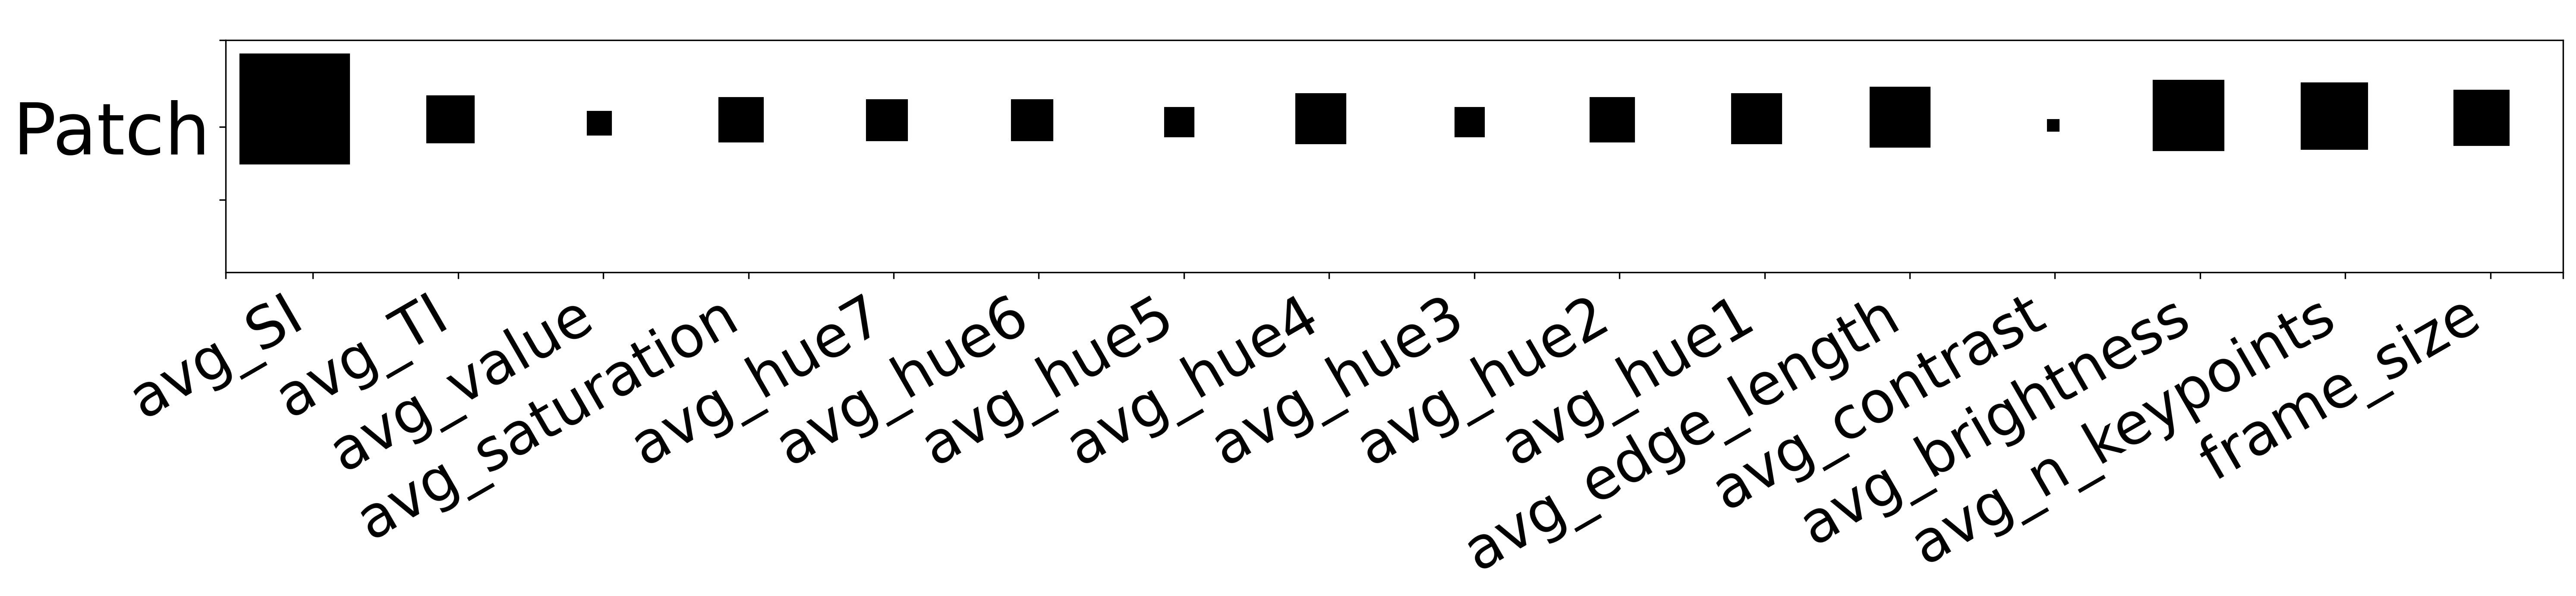

In [9]:
if __name__ == '__main__':  
    tdarray = [
        [0.8846520495710118,0.6091515729266025,0.7740705433746353,0.8379408960915151,
         0.8455672068636748,0.6768350810295554,0.7178265014299289,0.612011439466164,
         0.9914204003813153,0.7950428979980915,0.8493803622497614,0.01,
         1.0,0.7168732125834174,0.4518589132507157,0.8093422306958993],
        [0,0,0,0.6502651113467677,  1.0,  0.1319194061505835,  0.23647932131495175,
         0.01,  0.15546129374337048,  0.12555673382820787,  0.25790031813361547,
         0.3079533404029696,  0.3637327677624588,  0.2651113467656422,  0.136161187698833,
         0.07910922587486557,  0.17094379639448554,  0.3136797454931076,  0.10031813361611874],
        [0,0,0,1.0,  0.18181818015702267,  0.04545454503925572,  0.15909090916012336,
         0.13636363511776706,  0.13636363511776706,  0.0681818190816077,  0.20454545419937897,
         0.0681818190816077,  0.15909090916012336,  0.20454545419937897,  0.2954545442778903,
         0.01,  0.40909090839875806,  0.36363636335950233,  0.2499999992386347]
    ]
    
    tdarray2 = [
        [0.8846520495710118,0.6091515729266025,0.7740705433746353,0.8379408960915151,
         0.8455672068636748,0.6768350810295554,0.7178265014299289,0.612011439466164,
         0.9914204003813153,0.7950428979980915,0.8493803622497614,0.01,
         1.0,0.7168732125834174,0.4518589132507157,0.8093422306958993],
        [0,0,0,0.6502651113467677,  1.0,  0.1319194061505835,  0.23647932131495175,
         0.01,  0.15546129374337048,  0.12555673382820787,  0.25790031813361547,
         0.3079533404029696,  0.3637327677624588,  0.2651113467656422,  0.136161187698833,
         0.07910922587486557,  0.17094379639448554,  0.3136797454931076,  0.10031813361611874],
    ]
    
    tdarray3 = [
        [1.0,  0.18181818015702267,  0.04545454503925572,  0.15909090916012336,
         0.13636363511776706,  0.13636363511776706,  0.0681818190816077,  0.20454545419937897,
         0.0681818190816077,  0.15909090916012336,  0.20454545419937897,  0.2954545442778903,
         0.01,  0.40909090839875806,  0.36363636335950233,  0.2499999992386347]
    ]
        
    hinton(tdarray3)

    

### 

In [ ]:
[0,0,0,1.0,  0.18181818015702267,  0.04545454503925572,  0.15909090916012336,
         0.13636363511776706,  0.13636363511776706,  0.0681818190816077,  0.20454545419937897,
         0.0681818190816077,  0.15909090916012336,  0.20454545419937897,  0.2954545442778903,
         0.01,  0.40909090839875806,  0.36363636335950233,  0.2499999992386347]